In [2]:
%load_ext autoreload
%autoreload

import numpy as np

from pyxpcs.reader import IMMReader8ID
from pyxpcs.structs import PyXPCSArray
from pyxpcs.config import PyXPCSDict
from pyxpcs.utils import config_from_8idhdf5
from pyxpcs.viz import plot_pix_sum
from pyxpcs.algorithms import multitau

from pprint import pprint

In [3]:
IMM_FILE = "/home/faisal/Development/xpcs-eigen/data/pyxpcs/A002_MJ_PMA_47g61kDa_att2_160C_Lq0_001_00001-00512.imm"

HDF5_FILE = "/home/faisal/Development/xpcs-eigen/data/pyxpcs/A002_MJ_PMA_47g61kDa_att2_160C_Lq0_001_0002-0512.hdf"


In [4]:
config = config_from_8idhdf5(HDF5_FILE)
pprint(config)

<KeysViewHDF5 ['Version', 'analysis_type', 'avg_frames', 'avg_frames_burst', 'batches', 'blemish_enabled', 'compression', 'dark_begin', 'dark_begin_todo', 'dark_end', 'dark_end_todo', 'data_begin', 'data_begin_todo', 'data_end', 'data_end_todo', 'delays_per_level', 'delays_per_level_burst', 'dnophi', 'dnoq', 'dphilist', 'dphispan', 'dqlist', 'dqmap', 'dqspan', 'dynamic_mean_window_size', 'flatfield_enabled', 'input_file_local', 'input_file_remote', 'kinetics', 'lld', 'mask', 'normalization_method', 'normalize_by_framesum', 'normalize_by_smoothed_img', 'num_g2partials', 'output_data', 'output_file_local', 'output_file_remote', 'qmap_hdf5_filename', 'qphi_bin_to_process', 'sigma', 'smoothing_method', 'snophi', 'snoq', 'specfile', 'specscan_dark_number', 'specscan_data_number', 'sphilist', 'sphispan', 'sqlist', 'sqmap', 'sqspan', 'static_mean_window_size', 'stride_frames', 'stride_frames_burst', 'swbinX', 'swbinY', 'twotime2onetime_window_size']>
PyXPCSDict({'rows': 1556, 'cols': 516, 'pi

In [5]:
reader = IMMReader8ID(IMM_FILE, no_of_frames=config['frames'], skip_frames=config['frame_start_limit'])


509


In [6]:

data = reader.array()
type(data)

scipy.sparse.lil.lil_matrix

In [7]:
data.shape

(510, 802896)

In [7]:
pixel_sum = np.sum(data, axis=0)


In [8]:
pixsum = pixel_sum.reshape((config['cols'], config['rows']))

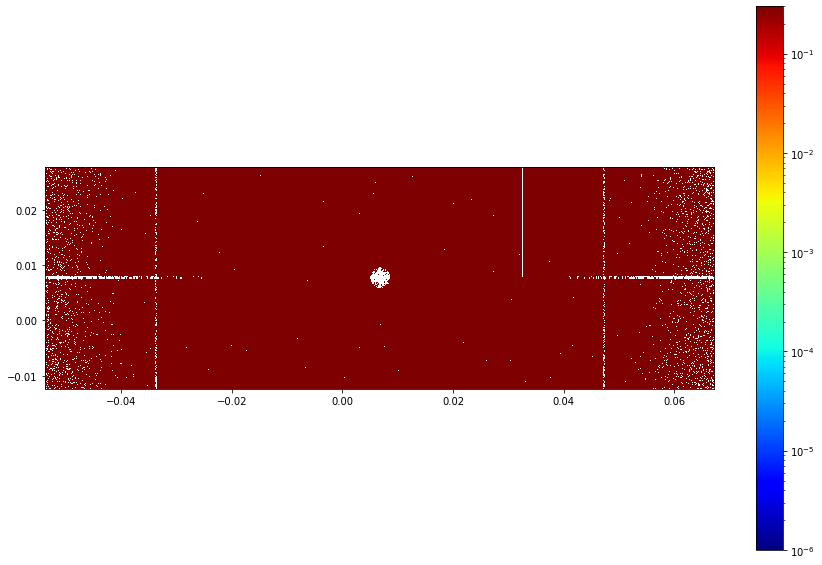

In [9]:
plot_pix_sum(pixsum, config)

In [42]:
data.rows.dtype

dtype('O')

In [10]:
data.rows[0][0]

189

In [11]:
data.data[0][0]

1.0

In [12]:
type(data.rows[0][0])

int

In [8]:
from libpyxpcs import multitau2

In [9]:
multitau2(data.rows[0])

TypeError: multitau2(): incompatible function arguments. The following argument types are supported:
    1. (arg0: numpy.ndarray) -> numpy.ndarray[numpy.float32]

Invoked with: [189, 241, 440, 452, 453, 467, 478, 488, 499, 504, 523, 530, 543, 547, 561, 562, 569, 571, 578, 582, 583, 586, 592, 597, 599, 605, 611, 619, 629, 631, 632, 634, 636, 639, 642, 649, 663, 669, 671, 678, 684, 687, 699, 703, 713, 715, 723, 729, 731, 736, 761, 767, 768, 773, 774, 778, 779, 780, 783, 785, 801, 805, 806, 810, 813, 815, 817, 827, 829, 830, 831, 839, 842, 844, 845, 855, 857, 863, 866, 867, 875, 878, 881, 889, 890, 891, 893, 896, 905, 906, 909, 913, 916, 920, 927, 928, 936, 938, 951, 953, 956, 976, 989, 991, 992, 1002, 1019, 1049, 1055, 1085, 1087, 1112, 1171, 1189, 1218, 1230, 1288, 1388, 1470, 1553, 1692, 1702, 1829, 1927, 1937, 1942, 1947, 1948, 2001, 2038, 2057, 2066, 2099, 2101, 2102, 2103, 2105, 2116, 2125, 2128, 2130, 2131, 2133, 2139, 2143, 2145, 2147, 2148, 2155, 2158, 2159, 2164, 2165, 2172, 2176, 2189, 2190, 2192, 2195, 2196, 2200, 2204, 2206, 2214, 2219, 2222, 2226, 2237, 2238, 2243, 2245, 2249, 2250, 2257, 2260, 2262, 2263, 2265, 2268, 2269, 2270, 2275, 2279, 2283, 2287, 2293, 2294, 2296, 2298, 2304, 2314, 2324, 2327, 2338, 2344, 2345, 2346, 2357, 2362, 2368, 2372, 2384, 2385, 2386, 2398, 2399, 2402, 2403, 2411, 2419, 2420, 2421, 2422, 2423, 2425, 2426, 2430, 2432, 2437, 2441, 2446, 2448, 2449, 2459, 2464, 2467, 2469, 2472, 2476, 2482, 2496, 2499, 2501, 2504, 2505, 2506, 2507, 2510, 2511, 2528, 2529, 2532, 2540, 2547, 2551, 2567, 2579, 2584, 2599, 2604, 2607, 2614, 2622, 2680, 2681, 2696, 2733, 2754, 2824, 2849, 2899, 2954, 3256, 3343, 3470, 3541, 3549, 3569, 3619, 3636, 3639, 3664, 3685, 3696, 3697, 3701, 3717, 3718, 3721, 3722, 3723, 3724, 3725, 3731, 3732, 3734, 3735, 3736, 3737, 3738, 3740, 3741, 3744, 3753, 3757, 3761, 3766, 3771, 3783, 3786, 3790, 3801, 3803, 3804, 3806, 3808, 3810, 3811, 3816, 3823, 3826, 3829, 3831, 3834, 3836, 3837, 3839, 3841, 3847, 3848, 3863, 3870, 3874, 3875, 3881, 3883, 3887, 3888, 3889, 3893, 3899, 3909, 3912, 3916, 3917, 3927, 3928, 3930, 3936, 3942, 3943, 3954, 3956, 3958, 3960, 3964, 3971, 3973, 3975, 3978, 3979, 3984, 3988, 3994, 3996, 4003, 4004, 4012, 4017, 4027, 4028, 4029, 4030, 4031, 4034, 4035, 4043, 4046, 4050, 4054, 4063, 4075, 4077, 4079, 4080, 4084, 4105, 4123, 4127, 4138, 4171, 4173, 4175, 4218, 4245, 4285, 4286, 4298, 4350, 4514, 4834, 4941, 4960, 5005, 5031, 5032, 5067, 5120, 5128, 5143, 5205, 5223, 5233, 5240, 5241, 5255, 5259, 5267, 5271, 5274, 5277, 5279, 5280, 5281, 5284, 5286, 5288, 5293, 5294, 5296, 5299, 5306, 5307, 5313, 5315, 5320, 5323, 5324, 5325, 5328, 5329, 5335, 5337, 5339, 5342, 5345, 5347, 5350, 5361, 5369, 5371, 5373, 5383, 5392, 5394, 5398, 5399, 5401, 5408, 5414, 5415, 5425, 5433, 5437, 5440, 5441, 5443, 5444, 5445, 5453, 5456, 5457, 5463, 5470, 5483, 5497, 5505, 5508, 5518, 5521, 5524, 5527, 5530, 5539, 5554, 5555, 5557, 5558, 5567, 5571, 5573, 5577, 5582, 5583, 5584, 5585, 5588, 5589, 5592, 5594, 5595, 5597, 5601, 5602, 5606, 5607, 5618, 5621, 5625, 5628, 5631, 5634, 5635, 5636, 5639, 5648, 5653, 5660, 5665, 5696, 5733, 5735, 5762, 5817, 5851, 5873, 5957, 6457, 6488, 6506, 6529, 6551, 6560, 6589, 6602, 6652, 6661, 6668, 6695, 6699, 6708, 6747, 6760, 6781, 6786, 6798, 6801, 6803, 6805, 6817, 6818, 6823, 6825, 6832, 6835, 6839, 6840, 6841, 6847, 6848, 6850, 6855, 6858, 6859, 6860, 6861, 6865, 6868, 6869, 6873, 6874, 6886, 6887, 6888, 6896, 6905, 6912, 6915, 6922, 6923, 6926, 6927, 6929, 6930, 6940, 6946, 6950, 6951, 6953, 6971, 6977, 6978, 6991, 6992, 6997, 7007, 7012, 7019, 7020, 7021, 7023, 7039, 7041, 7043, 7060, 7072, 7075, 7093, 7097, 7098, 7104, 7116, 7117, 7121, 7122, 7124, 7137, 7139, 7140, 7141, 7152, 7153, 7155, 7165, 7170, 7174, 7179, 7180, 7197, 7199, 7204, 7205, 7218, 7219, 7226, 7236, 7255, 7259, 7260, 7261, 7265, 7292, 7295, 7309, 7311, 7323, 7327, 7330, 7337, 7340, 7351, 7356, 7357, 7360, 7376, 7420, 7450, 7490, 7723, 8032, 8059, 8073, 8102, 8109, 8114, 8121, 8156, 8197, 8198, 8222, 8254, 8265, 8290, 8292, 8307, 8310, 8319, 8320, 8321, 8323, 8333, 8334, 8337, 8339, 8341, 8343, 8349, 8353, 8361, 8365, 8369, 8371, 8373, 8375, 8376, 8378, 8385, 8387, 8391, 8394, 8395, 8401, 8402, 8403, 8411, 8416, 8429, 8431, 8435, 8440, 8456, 8460, 8461, 8463, 8466, 8469, 8470, 8471, 8476, 8479, 8483, 8486, 8489, 8491, 8495, 8496, 8497, 8499, 8500, 8501, 8511, 8521, 8526, 8527, 8528, 8541, 8546, 8547, 8553, 8561, 8564, 8568, 8575, 8580, 8582, 8584, 8586, 8589, 8596, 8604, 8607, 8609, 8611, 8619, 8620, 8623, 8627, 8628, 8629, 8632, 8644, 8645, 8650, 8656, 8657, 8665, 8669, 8671, 8674, 8680, 8682, 8684, 8697, 8702, 8705, 8706, 8710, 8716, 8720, 8722, 8726, 8731, 8737, 8745, 8753, 8757, 8760, 8762, 8764, 8765, 8766, 8772, 8774, 8776, 8787, 8791, 8801, 8810, 8827, 8829, 8834, 8867, 8880, 8908, 8922, 8934, 8949, 8983, 8988, 9063, 9196, 9771, 9801, 9839, 9847, 9848, 9862, 9894, 9899, 9903, 9905, 9914, 9923, 9924, 9931, 9932, 9934, 9936, 9940, 9951, 9955, 9956, 9962, 9963, 9970, 9974, 9986, 9990, 9993, 9998, 10000, 10001, 10003, 10010, 10011, 10012, 10024, 10027, 10029, 10034, 10037, 10039, 10040, 10048, 10052, 10054, 10059, 10061, 10070, 10074, 10075, 10080, 10104, 10107, 10111, 10112, 10113, 10119, 10126, 10127, 10128, 10130, 10137, 10140, 10141, 10142, 10143, 10145, 10147, 10153, 10155, 10160, 10166, 10169, 10176, 10179, 10184, 10189, 10190, 10200, 10214, 10220, 10227, 10229, 10237, 10241, 10246, 10249, 10252, 10254, 10256, 10262, 10268, 10272, 10275, 10279, 10286, 10289, 10295, 10299, 10304, 10310, 10312, 10314, 10316, 10328, 10332, 10335, 10337, 10343, 10346, 10348, 10365, 10392, 10407, 10409, 10526, 10640, 11179, 11182, 11233, 11254, 11312, 11318, 11341, 11345, 11350, 11362, 11371, 11372, 11415, 11425, 11442, 11444, 11445, 11449, 11450, 11454, 11457, 11469, 11474, 11476, 11478, 11481, 11486, 11489, 11493, 11497, 11503, 11506, 11508, 11511, 11512, 11519, 11521, 11525, 11528, 11533, 11535, 11544, 11547, 11549, 11554, 11566, 11568, 11570, 11571, 11578, 11579, 11583, 11585, 11586, 11589, 11590, 11599, 11601, 11607, 11618, 11619, 11624, 11628, 11629, 11633, 11639, 11640, 11641, 11646, 11647, 11649, 11674, 11675, 11692, 11707, 11718, 11724, 11729, 11731, 11733, 11747, 11758, 11759, 11761, 11769, 11771, 11773, 11776, 11783, 11792, 11795, 11796, 11797, 11799, 11803, 11807, 11809, 11811, 11814, 11815, 11818, 11820, 11823, 11824, 11826, 11829, 11830, 11841, 11842, 11846, 11847, 11849, 11852, 11855, 11863, 11868, 11869, 11872, 11879, 11880, 11884, 11885, 11889, 11905, 11910, 11911, 11914, 11915, 11925, 11954, 11959, 11978, 11987, 11991, 12136, 12263, 12381, 12576, 12713, 12718, 12730, 12843, 12848, 12889, 12908, 12941, 12957, 12977, 12984, 12990, 13012, 13018, 13030, 13034, 13035, 13036, 13042, 13047, 13048, 13051, 13052, 13062, 13066, 13069, 13071, 13073, 13074, 13082, 13085, 13086, 13088, 13091, 13098, 13100, 13119, 13121, 13130, 13132, 13134, 13151, 13155, 13159, 13165, 13189, 13200, 13201, 13206, 13212, 13218, 13238, 13242, 13255, 13261, 13281, 13283, 13291, 13292, 13296, 13302, 13309, 13315, 13321, 13344, 13351, 13353, 13354, 13358, 13359, 13362, 13363, 13384, 13385, 13388, 13391, 13394, 13395, 13398, 13399, 13402, 13410, 13412, 13413, 13436, 13444, 13452, 13453, 13460, 13467, 13475, 13480, 13490, 13513, 13536, 13539, 13602, 13606, 13620, 13655, 13714, 13755, 13845, 14043, 14186, 14240, 14298, 14339, 14425, 14437, 14465, 14512, 14534, 14539, 14542, 14545, 14551, 14553, 14561, 14568, 14570, 14576, 14578, 14579, 14582, 14586, 14591, 14593, 14600, 14601, 14604, 14608, 14615, 14616, 14618, 14621, 14622, 14630, 14632, 14633, 14635, 14638, 14642, 14643, 14646, 14651, 14652, 14657, 14664, 14666, 14670, 14672, 14674, 14689, 14695, 14698, 14704, 14706, 14708, 14714, 14716, 14721, 14731, 14734, 14736, 14740, 14749, 14758, 14761, 14765, 14766, 14768, 14770, 14776, 14778, 14785, 14790, 14791, 14795, 14799, 14805, 14834, 14836, 14838, 14843, 14859, 14862, 14866, 14869, 14871, 14876, 14879, 14892, 14893, 14894, 14895, 14896, 14903, 14909, 14910, 14911, 14919, 14920, 14937, 14942, 14947, 14949, 14951, 14952, 14954, 14955, 14964, 14968, 14969, 14971, 14977, 14984, 14991, 14994, 15005, 15012, 15026, 15050, 15069, 15159, 15164, 15233, 15237, 15260, 15282, 15361, 15567, 15808, 15857, 15997, 16009, 16012, 16042, 16072, 16109, 16119, 16121, 16125, 16127, 16137, 16140, 16141, 16150, 16159, 16160, 16167, 16168, 16170, 16175, 16180, 16185, 16187, 16189, 16191, 16192, 16193, 16199, 16203, 16210, 16214, 16218, 16221, 16228, 16231, 16234, 16237, 16238, 16242, 16244, 16257, 16259, 16264, 16267, 16271, 16279, 16281, 16299, 16308, 16317, 16321, 16323, 16324, 16327, 16328, 16341, 16350, 16361, 16364, 16368, 16380, 16381, 16385, 16389, 16398, 16406, 16407, 16410, 16419, 16420, 16421, 16422, 16423, 16426, 16429, 16436, 16442, 16453, 16454, 16456, 16473, 16474, 16479, 16481, 16484, 16486, 16487, 16489, 16491, 16494, 16496, 16498, 16500, 16501, 16504, 16508, 16513, 16518, 16520, 16522, 16528, 16530, 16533, 16534, 16543, 16546, 16551, 16556, 16560, 16569, 16586, 16621, 16630, 16638, 16649, 16652, 16714, 16738, 16767, 16791, 16801, 16837, 17023, 17196, 17204, 17234, 17307, 17383, 17416, 17471, 17519, 17546, 17599, 17602, 17609, 17638, 17645, 17649, 17654, 17659, 17660, 17677, 17683, 17685, 17700, 17707, 17708, 17710, 17712, 17715, 17722, 17726, 17730, 17731, 17744, 17754, 17757, 17763, 17765, 17770, 17779, 17780, 17796, 17798, 17806, 17822, 17826, 17831, 17844, 17849, 17855, 17856, 17862, 17864, 17872, 17878, 17879, 17885, 17887, 17898, 17909, 17910, 17912, 17918, 17921, 17948, 17954, 17962, 17963, 17964, 17967, 17969, 17972, 17977, 17985, 17990, 17996, 17997, 18002, 18005, 18011, 18014, 18020, 18022, 18030, 18031, 18036, 18037, 18041, 18046, 18055, 18057, 18059, 18061, 18067, 18070, 18072, 18073, 18074, 18075, 18076, 18084, 18088, 18091, 18105, 18111, 18114, 18116, 18159, 18161, 18173, 18273, 18349, 18414, 18415, 18416, 18463, 18617, 18912, 18935, 19005, 19006, 19009, 19017, 19072, 19086, 19095, 19110, 19150, 19185, 19215, 19217, 19219, 19221, 19223, 19224, 19225, 19226, 19240, 19244, 19251, 19261, 19266, 19268, 19270, 19275, 19276, 19282, 19284, 19298, 19305, 19307, 19313, 19318, 19325, 19326, 19327, 19332, 19335, 19337, 19338, 19340, 19344, 19346, 19357, 19365, 19373, 19378, 19379, 19381, 19392, 19398, 19407, 19413, 19425, 19428, 19439, 19440, 19445, 19454, 19468, 19474, 19477, 19490, 19499, 19501, 19507, 19513, 19532, 19536, 19540, 19544, 19551, 19552, 19555, 19556, 19568, 19569, 19570, 19572, 19584, 19602, 19603, 19611, 19613, 19618, 19628, 19636, 19639, 19641, 19649, 19651, 19664, 19685, 19688, 19696, 19699, 19720, 19721, 19726, 19729, 19745, 19773, 19820, 19871, 19892, 19905, 19919, 19931, 19963, 19990, 20003, 20103, 20108, 20399, 20404, 20513, 20516, 20576, 20604, 20646, 20662, 20695, 20724, 20753, 20758, 20760, 20762, 20765, 20769, 20772, 20780, 20786, 20788, 20792, 20795, 20800, 20802, 20803, 20806, 20812, 20818, 20822, 20823, 20829, 20832, 20836, 20838, 20839, 20847, 20848, 20849, 20863, 20865, 20869, 20874, 20876, 20878, 20885, 20892, 20894, 20905, 20906, 20907, 20921, 20928, 20947, 20950, 20952, 20958, 20969, 20971, 20973, 20977, 20994, 20996, 20997, 21032, 21037, 21038, 21046, 21051, 21053, 21069, 21070, 21094, 21101, 21109, 21113, 21117, 21118, 21119, 21124, 21126, 21135, 21136, 21141, 21142, 21147, 21154, 21156, 21159, 21164, 21165, 21171, 21177, 21178, 21181, 21184, 21192, 21199, 21202, 21210, 21211, 21234, 21255, 21256, 21269, 21276, 21278, 21287, 21290, 21344, 21345, 21366, 21395, 21533, 22089, 22147, 22173, 22179, 22198, 22229, 22236, 22254, 22259, 22276, 22279, 22288, 22329, 22334, 22336, 22339, 22341, 22342, 22346, 22347, 22350, 22352, 22361, 22370, 22375, 22379, 22381, 22385, 22387, 22392, 22394, 22396, 22400, 22410, 22412, 22416, 22417, 22419, 22424, 22431, 22432, 22435, 22442, 22444, 22449, 22461, 22469, 22474, 22480, 22481, 22485, 22488, 22493, 22494, 22505, 22513, 22518, 22523, 22526, 22535, 22539, 22546, 22547, 22551, 22557, 22567, 22570, 22573, 22606, 22615, 22619, 22627, 22639, 22641, 22642, 22643, 22645, 22652, 22662, 22663, 22664, 22678, 22693, 22696, 22697, 22698, 22699, 22706, 22708, 22709, 22716, 22717, 22721, 22722, 22724, 22727, 22731, 22733, 22737, 22746, 22748, 22753, 22755, 22756, 22758, 22759, 22772, 22789, 22794, 22801, 22818, 22830, 22832, 22841, 22868, 22869, 22883, 22894, 22917, 22972, 23058, 23132, 23409, 23650, 23686, 23747, 23781, 23787, 23793, 23799, 23803, 23808, 23825, 23826, 23832, 23836, 23840, 23841, 23874, 23880, 23890, 23891, 23893, 23894, 23903, 23911, 23915, 23924, 23926, 23928, 23929, 23931, 23932, 23935, 23937, 23940, 23948, 23950, 23958, 23960, 23964, 23970, 23974, 23975, 23979, 23980, 23984, 23986, 23997, 23999, 24001, 24003, 24006, 24010, 24013, 24020, 24036, 24041, 24043, 24047, 24055, 24056, 24059, 24061, 24065, 24078, 24085, 24088, 24089, 24094, 24106, 24110, 24114, 24133, 24157, 24172, 24177, 24180, 24204, 24208, 24212, 24214, 24219, 24222, 24229, 24231, 24239, 24241, 24246, 24250, 24257, 24274, 24277, 24278, 24282, 24287, 24289, 24291, 24294, 24299, 24305, 24311, 24324, 24341, 24350, 24368, 24392, 24400, 24512, 24668, 24727, 24815, 25037, 25094, 25134, 25138, 25182, 25215, 25313, 25320, 25336, 25344, 25357, 25397, 25400, 25402, 25417, 25418, 25437, 25441, 25447, 25454, 25455, 25463, 25472, 25474, 25477, 25478, 25479, 25483, 25488, 25491, 25494, 25499, 25505, 25507, 25509, 25510, 25512, 25513, 25516, 25519, 25523, 25524, 25525, 25528, 25533, 25537, 25538, 25539, 25543, 25552, 25561, 25563, 25566, 25593, 25601, 25605, 25606, 25617, 25622, 25628, 25631, 25635, 25639, 25645, 25646, 25666, 25667, 25678, 25679, 25686, 25712, 25715, 25726, 25729, 25736, 25742, 25766, 25775, 25781, 25782, 25786, 25788, 25791, 25793, 25794, 25799, 25806, 25814, 25819, 25821, 25824, 25826, 25828, 25834, 25838, 25844, 25846, 25847, 25850, 25851, 25852, 25856, 25864, 25865, 25871, 25872, 25873, 25874, 25881, 25883, 25884, 25886, 25896, 25903, 25911, 25913, 25919, 25931, 25932, 25933, 25937, 25965, 25993, 26000, 26098, 26136, 26142, 26302, 26350, 26568, 26784, 26823, 26832, 26887, 26914, 26935, 26940, 26955, 26956, 26970, 26971, 26972, 26973, 26975, 26986, 26995, 26997, 27000, 27002, 27003, 27018, 27020, 27025, 27034, 27044, 27048, 27050, 27051, 27052, 27053, 27055, 27059, 27062, 27066, 27069, 27070, 27075, 27076, 27078, 27079, 27082, 27083, 27093, 27094, 27103, 27113, 27119, 27122, 27123, 27127, 27142, 27146, 27152, 27159, 27162, 27165, 27177, 27178, 27186, 27188, 27197, 27200, 27203, 27209, 27214, 27215, 27220, 27225, 27227, 27228, 27229, 27271, 27276, 27279, 27282, 27290, 27296, 27297, 27302, 27307, 27310, 27311, 27313, 27315, 27318, 27323, 27327, 27328, 27333, 27334, 27338, 27342, 27349, 27352, 27358, 27360, 27364, 27365, 27375, 27377, 27378, 27381, 27387, 27388, 27399, 27400, 27402, 27407, 27410, 27422, 27427, 27432, 27436, 27439, 27444, 27445, 27470, 27473, 27475, 27481, 27483, 27484, 27494, 27499, 27516, 27587, 27607, 27632, 28191, 28211, 28350, 28375, 28422, 28457, 28485, 28492, 28498, 28509, 28532, 28536, 28545, 28549, 28554, 28565, 28567, 28571, 28576, 28582, 28592, 28593, 28595, 28596, 28602, 28605, 28607, 28609, 28610, 28619, 28623, 28626, 28627, 28628, 28629, 28630, 28634, 28637, 28644, 28645, 28658, 28664, 28668, 28673, 28674, 28684, 28689, 28693, 28703, 28705, 28710, 28712, 28718, 28741, 28745, 28749, 28751, 28753, 28755, 28758, 28770, 28775, 28776, 28779, 28782, 28791, 28804, 28808, 28812, 28816, 28827, 28840, 28841, 28848, 28849, 28850, 28852, 28853, 28856, 28859, 28861, 28871, 28873, 28879, 28881, 28886, 28889, 28904, 28906, 28914, 28919, 28924, 28928, 28930, 28934, 28939, 28943, 28944, 28946, 28947, 28956, 28959, 28961, 28962, 28967, 28968, 28969, 28972, 28973, 28976, 28979, 28982, 28990, 28993, 28995, 28997, 28998, 29001, 29004, 29011, 29012, 29013, 29016, 29019, 29022, 29027, 29034, 29062, 29095, 29096, 29098, 29109, 29115, 29126, 29188, 29347, 29602, 29613, 29733, 29786, 29808, 29868, 29877, 29889, 29927, 29964, 29969, 29996, 30033, 30075, 30090, 30092, 30096, 30102, 30113, 30116, 30118, 30119, 30120, 30127, 30133, 30136, 30138, 30139, 30142, 30143, 30145, 30148, 30163, 30165, 30169, 30174, 30175, 30178, 30182, 30184, 30194, 30195, 30204, 30205, 30214, 30216, 30221, 30222, 30225, 30227, 30228, 30232, 30233, 30234, 30236, 30237, 30246, 30247, 30248, 30252, 30254, 30255, 30256, 30261, 30267, 30269, 30284, 30287, 30288, 30296, 30301, 30302, 30304, 30305, 30318, 30320, 30328, 30331, 30336, 30350, 30354, 30362, 30373, 30377, 30384, 30386, 30393, 30396, 30398, 30408, 30409, 30411, 30412, 30415, 30416, 30421, 30423, 30434, 30435, 30442, 30446, 30453, 30459, 30464, 30470, 30473, 30479, 30488, 30489, 30498, 30500, 30503, 30507, 30517, 30518, 30523, 30525, 30530, 30531, 30546, 30551, 30563, 30568, 30577, 30581, 30583, 30664, 30725, 30783, 30818, 31334, 31358, 31444, 31451, 31479, 31548, 31567, 31592, 31602, 31625, 31633, 31644, 31662, 31663, 31665, 31686, 31687, 31689, 31692, 31693, 31697, 31698, 31699, 31708, 31716, 31725, 31726, 31732, 31733, 31734, 31739, 31740, 31742, 31743, 31745, 31749, 31753, 31755, 31763, 31769, 31771, 31773, 31796, 31801, 31803, 31805, 31817, 31820, 31821, 31828, 31831, 31858, 31873, 31876, 31878, 31887, 31889, 31898, 31899, 31900, 31905, 31933, 31935, 31938, 31939, 31942, 31957, 31962, 31964, 31965, 31971, 31977, 31979, 31990, 31997, 32001, 32004, 32005, 32011, 32014, 32018, 32021, 32025, 32026, 32032, 32040, 32042, 32044, 32046, 32047, 32048, 32059, 32062, 32066, 32068, 32077, 32079, 32080, 32081, 32082, 32085, 32090, 32091, 32096, 32097, 32098, 32103, 32114, 32121, 32169, 32178, 32221, 32246, 32260, 32262, 32263, 32371, 32372, 32479, 32563, 33022, 33025, 33037, 33059, 33084, 33090, 33141, 33150, 33153, 33162, 33189, 33191, 33192, 33193, 33203, 33231, 33232, 33233, 33237, 33242, 33243, 33251, 33252, 33261, 33265, 33267, 33271, 33272, 33273, 33280, 33283, 33286, 33288, 33290, 33292, 33296, 33299, 33304, 33306, 33309, 33311, 33318, 33319, 33329, 33331, 33341, 33344, 33354, 33360, 33361, 33363, 33370, 33378, 33384, 33388, 33393, 33395, 33398, 33399, 33409, 33419, 33423, 33424, 33435, 33441, 33445, 33449, 33450, 33460, 33468, 33469, 33471, 33475, 33490, 33500, 33502, 33520, 33536, 33537, 33538, 33539, 33551, 33565, 33568, 33577, 33580, 33586, 33594, 33596, 33597, 33599, 33608, 33613, 33615, 33616, 33620, 33625, 33626, 33629, 33632, 33645, 33646, 33652, 33658, 33668, 33669, 33683, 33686, 33697, 33699, 33701, 33745, 33754, 33758, 33801, 33810, 33854, 33867, 33877, 33903, 33905, 33967, 33968, 34020, 34091, 34379, 34609, 34619, 34627, 34651, 34683, 34701, 34714, 34715, 34716, 34727, 34731, 34739, 34741, 34745, 34762, 34764, 34768, 34778, 34780, 34781, 34782, 34786, 34788, 34792, 34794, 34797, 34801, 34805, 34807, 34814, 34818, 34819, 34820, 34822, 34827, 34829, 34836, 34841, 34843, 34850, 34851, 34852, 34853, 34859, 34861, 34864, 34892, 34895, 34898, 34900, 34909, 34911, 34912, 34913, 34921, 34935, 34937, 34940, 34946, 34956, 34968, 34980, 34992, 34995, 35000, 35021, 35026, 35031, 35045, 35048, 35049, 35064, 35095, 35096, 35097, 35101, 35102, 35109, 35120, 35129, 35130, 35134, 35136, 35137, 35139, 35140, 35144, 35149, 35157, 35160, 35163, 35168, 35175, 35176, 35178, 35181, 35191, 35201, 35202, 35206, 35207, 35226, 35230, 35241, 35242, 35244, 35265, 35270, 35271, 35272, 35283, 35317, 35325, 35329, 35342, 35374, 35400, 35464, 35515, 35643, 35707, 35824, 35841, 36077, 36103, 36225, 36253, 36288, 36289, 36302, 36310, 36327, 36342, 36347, 36349, 36350, 36351, 36352, 36377, 36396, 36398, 36401, 36407, 36418, 36425, 36426, 36427, 36431, 36434, 36445, 36450, 36452, 36455, 36468, 36469, 36479, 36482, 36483, 36487, 36504, 36511, 36531, 36534, 36569, 36575, 36578, 36582, 36611, 36612, 36613, 36620, 36623, 36636, 36638, 36639, 36649, 36650, 36654, 36658, 36666, 36672, 36684, 36711, 36713, 36718, 36721, 36722, 36731, 36734, 36739, 36740, 36743, 36744, 36745, 36746, 36749, 36750, 36762, 36764, 36779, 36789, 36794, 36796, 36798, 36800, 36814, 36861, 37015, 37076, 37170, 37288, 37306, 37508, 37556, 37696, 37771, 37790, 37821, 37825, 37835, 37846, 37879, 37880, 37883, 37884, 37887, 37892, 37895, 37904, 37906, 37915, 37917, 37919, 37920, 37925, 37926, 37927, 37928, 37932, 37939, 37944, 37946, 37947, 37952, 37958, 37961, 37962, 37972, 37974, 37979, 37984, 37988, 37994, 37997, 37999, 38000, 38001, 38005, 38010, 38016, 38019, 38025, 38029, 38031, 38033, 38036, 38041, 38046, 38052, 38062, 38066, 38069, 38071, 38076, 38080, 38105, 38111, 38131, 38132, 38136, 38153, 38154, 38157, 38170, 38177, 38189, 38196, 38200, 38218, 38226, 38229, 38230, 38238, 38241, 38242, 38243, 38248, 38253, 38254, 38256, 38261, 38263, 38265, 38269, 38275, 38280, 38281, 38285, 38286, 38288, 38291, 38297, 38298, 38299, 38301, 38306, 38314, 38326, 38336, 38363, 38368, 38372, 38391, 38392, 38394, 38403, 38404, 38418, 38422, 38539, 38550, 38604, 38617, 38672, 38686, 38778, 39119, 39128, 39178, 39251, 39253, 39293, 39317, 39321, 39340, 39349, 39363, 39372, 39389, 39395, 39427, 39428, 39429, 39437, 39440, 39452, 39456, 39461, 39468, 39469, 39470, 39473, 39474, 39492, 39496, 39498, 39499, 39501, 39502, 39506, 39510, 39511, 39512, 39513, 39514, 39521, 39527, 39537, 39539, 39541, 39542, 39549, 39551, 39553, 39554, 39560, 39568, 39569, 39573, 39581, 39586, 39589, 39593, 39608, 39615, 39621, 39623, 39628, 39632, 39634, 39647, 39651, 39657, 39658, 39659, 39660, 39666, 39685, 39689, 39693, 39697, 39709, 39721, 39722, 39732, 39733, 39745, 39748, 39752, 39753, 39755, 39756, 39759, 39762, 39763, 39775, 39780, 39784, 39799, 39800, 39806, 39813, 39821, 39822, 39826, 39827, 39829, 39832, 39834, 39835, 39842, 39843, 39846, 39852, 39855, 39856, 39861, 39866, 39867, 39868, 39872, 39873, 39878, 39884, 39889, 39892, 39898, 39899, 39915, 39923, 39928, 39966, 39986, 40018, 40022, 40080, 40121, 40125, 40135, 40205, 40486, 40569, 40806, 40881, 40899, 40901, 40921, 40947, 40970, 40994, 40999, 41002, 41010, 41018, 41019, 41020, 41025, 41029, 41035, 41036, 41037, 41042, 41047, 41054, 41056, 41057, 41059, 41060, 41063, 41064, 41069, 41071, 41082, 41083, 41086, 41093, 41096, 41097, 41099, 41119, 41122, 41127, 41129, 41137, 41138, 41140, 41142, 41143, 41163, 41165, 41172, 41175, 41185, 41210, 41214, 41215, 41218, 41224, 41234, 41235, 41236, 41239, 41241, 41243, 41248, 41254, 41276, 41278, 41279, 41280, 41296, 41308, 41313, 41329, 41333, 41339, 41341, 41348, 41352, 41358, 41362, 41364, 41368, 41370, 41371, 41373, 41377, 41379, 41382, 41384, 41387, 41390, 41394, 41395, 41397, 41399, 41402, 41403, 41406, 41409, 41412, 41413, 41414, 41418, 41419, 41425, 41428, 41429, 41434, 41439, 41445, 41447, 41450, 41453, 41454, 41457, 41469, 41475, 41523, 41556, 41563, 41710, 41717, 41748, 41809, 42110, 42200, 42248, 42301, 42314, 42350, 42353, 42376, 42442, 42468, 42497, 42505, 42510, 42512, 42515, 42519, 42521, 42538, 42553, 42560, 42564, 42565, 42573, 42581, 42584, 42585, 42586, 42587, 42592, 42601, 42602, 42605, 42606, 42610, 42615, 42616, 42617, 42619, 42620, 42624, 42627, 42631, 42634, 42642, 42644, 42648, 42651, 42653, 42657, 42665, 42667, 42670, 42672, 42675, 42680, 42695, 42706, 42715, 42722, 42734, 42737, 42746, 42774, 42780, 42794, 42808, 42818, 42824, 42831, 42844, 42853, 42857, 42858, 42863, 42869, 42874, 42878, 42892, 42893, 42895, 42896, 42900, 42903, 42904, 42916, 42921, 42931, 42932, 42935, 42936, 42939, 42943, 42945, 42946, 42954, 42967, 42977, 42989, 43004, 43005, 43007, 43008, 43011, 43017, 43038, 43040, 43041, 43054, 43066, 43105, 43107, 43128, 43130, 43212, 43215, 43223, 43233, 43314, 43518, 43837, 43873, 43919, 43971, 43998, 44004, 44022, 44037, 44044, 44046, 44064, 44065, 44070, 44077, 44080, 44086, 44087, 44088, 44090, 44103, 44104, 44106, 44114, 44116, 44119, 44121, 44125, 44128, 44136, 44138, 44139, 44146, 44147, 44148, 44153, 44155, 44157, 44162, 44163, 44164, 44165, 44167, 44170, 44179, 44180, 44190, 44211, 44213, 44216, 44226, 44230, 44233, 44241, 44255, 44260, 44265, 44266, 44267, 44285, 44287, 44289, 44294, 44305, 44308, 44310, 44313, 44346, 44347, 44348, 44351, 44357, 44382, 44383, 44391, 44407, 44409, 44415, 44418, 44431, 44432, 44434, 44445, 44447, 44452, 44467, 44468, 44480, 44487, 44490, 44498, 44500, 44504, 44518, 44520, 44528, 44532, 44535, 44536, 44537, 44539, 44541, 44548, 44559, 44561, 44564, 44586, 44594, 44596, 44613, 44637, 44640, 44685, 44688, 44706, 44708, 44712, 44745, 44760, 44772, 44774, 44791, 44796, 44904, 45435, 45440, 45481, 45532, 45536, 45539, 45559, 45588, 45611, 45622, 45623, 45625, 45648, 45651, 45659, 45674, 45676, 45681, 45682, 45688, 45693, 45695, 45697, 45707, 45708, 45710, 45714, 45715, 45716, 45717, 45718, 45719, 45724, 45726, 45752, 45762, 45763, 45766, 45768, 45774, 45785, 45789, 45790, 45810, 45818, 45820, 45834, 45838, 45839, 45847, 45848, 45860, 45861, 45871, 45873, 45881, 45883, 45888, 45892, 45910, 45920, 45924, 45929, 45952, 45954, 45956, 45960, 45962, 45977, 45988, 45991, 46010, 46012, 46014, 46017, 46020, 46021, 46029, 46030, 46032, 46042, 46058, 46060, 46063, 46064, 46067, 46068, 46072, 46074, 46082, 46086, 46093, 46094, 46095, 46100, 46107, 46108, 46112, 46117, 46118, 46125, 46137, 46139, 46141, 46142, 46155, 46157, 46158, 46169, 46173, 46176, 46177, 46205, 46239, 46244, 46334, 46379, 46444, 46496, 46799, 46892, 46905, 46993, 47014, 47074, 47078, 47086, 47104, 47109, 47122, 47123, 47150, 47185, 47198, 47199, 47200, 47205, 47207, 47209, 47211, 47220, 47224, 47226, 47231, 47235, 47236, 47250, 47259, 47266, 47267, 47269, 47273, 47289, 47290, 47310, 47311, 47313, 47314, 47315, 47317, 47322, 47335, 47342, 47353, 47370, 47382, 47399, 47407, 47408, 47413, 47416, 47423, 47432, 47439, 47441, 47444, 47448, 47455, 47456, 47457, 47463, 47468, 47469, 47472, 47488, 47490, 47505, 47535, 47547, 47577, 47583, 47584, 47589, 47590, 47598, 47601, 47602, 47603, 47615, 47616, 47618, 47619, 47623, 47626, 47631, 47637, 47639, 47643, 47645, 47646, 47647, 47650, 47652, 47653, 47654, 47660, 47667, 47673, 47677, 47678, 47684, 47690, 47692, 47696, 47701, 47702, 47706, 47710, 47711, 47721, 47733, 47750, 47755, 47769, 47771, 47950, 48275, 48423, 48509, 48600, 48613, 48629, 48630, 48683, 48738, 48746, 48770, 48773, 48777, 48792, 48796, 48798, 48799, 48810, 48812, 48821, 48822, 48824, 48829, 48830, 48834, 48839, 48845, 48848, 48857, 48860, 48861, 48862, 48867, 48872, 48881, 48885, 48896, 48898, 48901, 48903, 48906, 48909, 48927, 48931, 48935, 48939, 48942, 48946, 48947, 48948, 48976, 48979, 48983, 48985, 48986, 48997, 49000, 49008, 49011, 49012, 49013, 49017, 49026, 49029, 49031, 49039, 49040, 49047, 49058, 49067, 49069, 49074, 49075, 49083, 49099, 49108, 49109, 49117, 49119, 49122, 49125, 49127, 49137, 49138, 49142, 49143, 49152, 49154, 49159, 49164, 49167, 49169, 49173, 49175, 49176, 49180, 49181, 49183, 49185, 49189, 49190, 49210, 49216, 49217, 49222, 49224, 49226, 49230, 49232, 49236, 49251, 49255, 49258, 49262, 49264, 49288, 49316, 49317, 49321, 49380, 49400, 49494, 49498, 49508, 49516, 50100, 50128, 50183, 50207, 50221, 50248, 50281, 50282, 50291, 50293, 50303, 50313, 50320, 50323, 50331, 50332, 50344, 50345, 50346, 50350, 50357, 50358, 50361, 50363, 50371, 50372, 50375, 50377, 50378, 50391, 50405, 50408, 50409, 50413, 50417, 50420, 50421, 50423, 50424, 50433, 50437, 50439, 50444, 50445, 50468, 50493, 50497, 50501, 50505, 50508, 50526, 50527, 50533, 50539, 50545, 50552, 50565, 50596, 50602, 50613, 50615, 50616, 50637, 50651, 50652, 50653, 50662, 50671, 50683, 50688, 50689, 50691, 50693, 50697, 50698, 50700, 50702, 50709, 50715, 50717, 50718, 50725, 50726, 50728, 50745, 50746, 50751, 50752, 50753, 50755, 50773, 50774, 50783, 50784, 50787, 50795, 50798, 50801, 50817, 50822, 50833, 50845, 50848, 50849, 50876, 50886, 50898, 50929, 50948, 51003, 51004, 51012, 51376, 51579, 51594, 51642, 51712, 51735, 51757, 51802, 51803, 51854, 51863, 51864, 51865, 51869, 51877, 51881, 51886, 51890, 51893, 51894, 51896, 51900, 51901, 51903, 51904, 51905, 51909, 51912, 51914, 51916, 51927, 51928, 51939, 51943, 51954, 51955, 51956, 51963, 51964, 51966, 51971, 51977, 51978, 51982, 51986, 51991, 51995, 52011, 52012, 52017, 52028, 52035, 52036, 52065, 52070, 52071, 52074, 52083, 52085, 52087, 52089, 52090, 52094, 52099, 52113, 52116, 52126, 52127, 52128, 52129, 52140, 52141, 52152, 52161, 52162, 52166, 52176, 52188, 52189, 52196, 52201, 52211, 52215, 52216, 52219, 52225, 52227, 52231, 52233, 52234, 52248, 52265, 52266, 52267, 52270, 52271, 52273, 52276, 52286, 52288, 52289, 52293, 52302, 52303, 52310, 52313, 52314, 52316, 52321, 52330, 52340, 52343, 52346, 52349, 52353, 52354, 52356, 52359, 52361, 52366, 52370, 52372, 52379, 52391, 52398, 52401, 52402, 52405, 52411, 52425, 52475, 52531, 52555, 52587, 52589, 52592, 52610, 52668, 53125, 53230, 53261, 53289, 53331, 53342, 53347, 53350, 53368, 53369, 53381, 53405, 53406, 53414, 53432, 53438, 53445, 53453, 53454, 53465, 53466, 53469, 53475, 53476, 53482, 53485, 53492, 53494, 53495, 53504, 53506, 53514, 53515, 53520, 53526, 53546, 53547, 53548, 53554, 53555, 53561, 53564, 53566, 53572, 53585, 53595, 53610, 53614, 53618, 53621, 53626, 53631, 53633, 53637, 53642, 53652, 53682, 53683, 53684, 53688, 53696, 53699, 53709, 53712, 53715, 53717, 53735, 53739, 53749, 53756, 53759, 53760, 53776, 53779, 53785, 53786, 53802, 53821, 53824, 53832, 53833, 53834, 53836, 53838, 53842, 53843, 53844, 53849, 53854, 53856, 53857, 53860, 53861, 53862, 53865, 53867, 53871, 53876, 53879, 53883, 53896, 53903, 53907, 53909, 53913, 53914, 53924, 53926, 53932, 53937, 53939, 53940, 53941, 53942, 53943, 53944, 53952, 53961, 53973, 53978, 53990, 54092, 54113, 54117, 54118, 54169, 54234, 54311, 54692, 54693, 54749, 54755, 54767, 54832, 54865, 54937, 54959, 54987, 54989, 54990, 54995, 54996, 55007, 55009, 55010, 55013, 55022, 55024, 55030, 55045, 55047, 55055, 55058, 55061, 55063, 55069, 55072, 55073, 55081, 55083, 55084, 55091, 55092, 55096, 55099, 55122, 55123, 55139, 55145, 55152, 55170, 55172, 55184, 55188, 55226, 55228, 55229, 55230, 55263, 55267, 55268, 55288, 55290, 55300, 55326, 55336, 55339, 55342, 55343, 55348, 55350, 55358, 55361, 55368, 55373, 55407, 55411, 55413, 55414, 55421, 55427, 55428, 55431, 55432, 55433, 55434, 55436, 55439, 55441, 55443, 55444, 55449, 55457, 55460, 55465, 55470, 55476, 55479, 55483, 55484, 55485, 55492, 55521, 55695, 55701, 55774, 55823, 55831, 55880, 56130, 56247, 56281, 56294, 56384, 56402, 56456, 56467, 56470, 56471, 56486, 56510, 56523, 56524, 56528, 56537, 56540, 56543, 56549, 56561, 56570, 56571, 56575, 56578, 56579, 56591, 56593, 56594, 56598, 56610, 56619, 56620, 56624, 56625, 56631, 56632, 56636, 56639, 56641, 56647, 56651, 56659, 56660, 56661, 56663, 56665, 56679, 56686, 56691, 56706, 56708, 56726, 56729, 56732, 56752, 56765, 56784, 56787, 56797, 56799, 56820, 56830, 56834, 56837, 56851, 56856, 56873, 56874, 56878, 56881, 56883, 56887, 56895, 56903, 56904, 56906, 56920, 56922, 56929, 56937, 56947, 56953, 56955, 56960, 56973, 56977, 56985, 56991, 56996, 57006, 57007, 57014, 57022, 57024, 57025, 57027, 57030, 57036, 57050, 57072, 57084, 57085, 57088, 57149, 57162, 57179, 57183, 57208, 57363, 57401, 57642, 57707, 57737, 57899, 57903, 57908, 57917, 57979, 57991, 58013, 58031, 58054, 58104, 58105, 58106, 58113, 58115, 58119, 58120, 58122, 58124, 58139, 58151, 58154, 58155, 58166, 58172, 58173, 58175, 58182, 58183, 58184, 58185, 58186, 58187, 58188, 58196, 58198, 58200, 58202, 58208, 58215, 58219, 58220, 58222, 58225, 58231, 58244, 58247, 58257, 58262, 58275, 58281, 58282, 58289, 58300, 58306, 58321, 58322, 58324, 58344, 58356, 58383, 58397, 58400, 58405, 58414, 58419, 58433, 58436, 58443, 58452, 58456, 58457, 58459, 58460, 58464, 58466, 58467, 58474, 58475, 58481, 58482, 58489, 58491, 58495, 58502, 58503, 58514, 58516, 58519, 58523, 58526, 58527, 58528, 58529, 58532, 58533, 58534, 58539, 58548, 58549, 58551, 58553, 58559, 58566, 58568, 58571, 58590, 58592, 58595, 58597, 58599, 58604, 58610, 58611, 58612, 58618, 58623, 58624, 58626, 58666, 58752, 58784, 58838, 58859, 59003, 59194, 59293, 59318, 59331, 59343, 59375, 59401, 59409, 59410, 59481, 59507, 59513, 59541, 59555, 59556, 59580, 59603, 59610, 59622, 59630, 59631, 59639, 59640, 59650, 59652, 59661, 59682, 59685, 59691, 59692, 59700, 59702, 59713, 59715, 59716, 59725, 59728, 59729, 59731, 59733, 59738, 59742, 59743, 59747, 59749, 59755, 59767, 59773, 59779, 59780, 59781, 59785, 59788, 59795, 59803, 59807, 59812, 59813, 59845, 59859, 59877, 59886, 59912, 59913, 59918, 59930, 59936, 59945, 59948, 59949, 59952, 59969, 59971, 59996, 59998, 60011, 60020, 60037, 60050, 60052, 60056, 60061, 60069, 60072, 60073, 60075, 60077, 60079, 60080, 60098, 60102, 60103, 60104, 60109, 60113, 60117, 60121, 60126, 60127, 60130, 60131, 60133, 60138, 60139, 60143, 60153, 60154, 60174, 60180, 60191, 60200, 60233, 60260, 60289, 60293, 60298, 60841, 60861, 60877, 60971, 60982, 61053, 61097, 61128, 61171, 61180, 61182, 61187, 61197, 61207, 61215, 61224, 61228, 61230, 61232, 61234, 61242, 61244, 61252, 61255, 61257, 61259, 61262, 61263, 61265, 61269, 61271, 61273, 61280, 61285, 61286, 61294, 61297, 61301, 61310, 61319, 61338, 61346, 61356, 61361, 61362, 61363, 61379, 61412, 61415, 61420, 61435, 61438, 61441, 61444, 61456, 61465, 61471, 61473, 61485, 61490, 61503, 61510, 61535, 61536, 61541, 61550, 61551, 61553, 61554, 61562, 61565, 61569, 61578, 61583, 61594, 61605, 61618, 61619, 61622, 61625, 61633, 61634, 61645, 61647, 61648, 61650, 61659, 61664, 61665, 61670, 61674, 61679, 61682, 61690, 61691, 61701, 61706, 61707, 61710, 61718, 61727, 61744, 61772, 61780, 61826, 61846, 61861, 61865, 61881, 61946, 61991, 62432, 62435, 62464, 62670, 62702, 62709, 62711, 62730, 62735, 62744, 62749, 62773, 62777, 62783, 62790, 62796, 62798, 62800, 62804, 62807, 62808, 62811, 62813, 62816, 62822, 62826, 62828, 62829, 62832, 62834, 62836, 62837, 62840, 62842, 62849, 62852, 62853, 62854, 62859, 62861, 62871, 62872, 62885, 62892, 62894, 62895, 62896, 62899, 62912, 62919, 62934, 62956, 62957, 62962, 62969, 62970, 62973, 62976, 62988, 62998, 63000, 63005, 63008, 63028, 63063, 63096, 63097, 63099, 63105, 63106, 63111, 63115, 63120, 63122, 63132, 63141, 63144, 63153, 63157, 63165, 63172, 63173, 63175, 63176, 63178, 63180, 63181, 63183, 63185, 63187, 63199, 63203, 63204, 63205, 63217, 63221, 63223, 63230, 63231, 63236, 63238, 63239, 63242, 63247, 63249, 63254, 63256, 63258, 63264, 63271, 63317, 63327, 63341, 63366, 63396, 63406, 63407, 63422, 63461, 63495, 63502, 63518, 63779, 64095, 64101, 64138, 64191, 64216, 64250, 64284, 64286, 64289, 64290, 64291, 64309, 64318, 64329, 64334, 64336, 64337, 64344, 64345, 64354, 64356, 64362, 64363, 64369, 64374, 64377, 64378, 64379, 64383, 64386, 64387, 64389, 64390, 64391, 64393, 64394, 64395, 64396, 64403, 64404, 64407, 64412, 64414, 64415, 64417, 64419, 64422, 64425, 64429, 64437, 64438, 64442, 64479, 64496, 64502, 64525, 64529, 64535, 64545, 64546, 64559, 64580, 64584, 64597, 64598, 64600, 64605, 64611, 64616, 64622, 64629, 64645, 64647, 64654, 64656, 64667, 64668, 64670, 64690, 64694, 64697, 64698, 64707, 64713, 64727, 64731, 64736, 64738, 64748, 64749, 64750, 64753, 64757, 64758, 64766, 64769, 64789, 64793, 64799, 64802, 64804, 64808, 64814, 64815, 64819, 64828, 64830, 64838, 64840, 64841, 64843, 64850, 64855, 64862, 64876, 64881, 64883, 64884, 64888, 64907, 64995, 65020, 65023, 65067, 65159, 65184, 65519, 65716, 65726, 65753, 65754, 65772, 65775, 65786, 65799, 65800, 65811, 65816, 65833, 65835, 65837, 65843, 65844, 65845, 65853, 65856, 65859, 65861, 65874, 65875, 65881, 65884, 65889, 65890, 65892, 65899, 65903, 65905, 65908, 65910, 65912, 65926, 65930, 65931, 65934, 65935, 65936, 65938, 65944, 65956, 65966, 65967, 65973, 65982, 65983, 65986, 65988, 65990, 66011, 66020, 66028, 66041, 66052, 66057, 66082, 66088, 66092, 66096, 66106, 66109, 66113, 66119, 66141, 66150, 66152, 66167, 66173, 66181, 66189, 66193, 66201, 66203, 66204, 66209, 66211, 66212, 66219, 66222, 66227, 66229, 66237, 66244, 66262, 66269, 66271, 66283, 66285, 66286, 66293, 66296, 66298, 66302, 66305, 66316, 66318, 66321, 66327, 66332, 66333, 66336, 66339, 66340, 66345, 66348, 66356, 66367, 66370, 66371, 66377, 66387, 66388, 66389, 66395, 66405, 66414, 66420, 66428, 66433, 66436, 66446, 66449, 66453, 66465, 66524, 66623, 66632, 66634, 66663, 66781, 66885, 66980, 67120, 67130, 67161, 67246, 67292, 67304, 67310, 67372, 67386, 67394, 67396, 67402, 67404, 67406, 67418, 67426, 67427, 67428, 67429, 67435, 67437, 67440, 67444, 67450, 67455, 67456, 67465, 67467, 67468, 67470, 67471, 67474, 67475, 67477, 67480, 67487, 67488, 67490, 67493, 67498, 67500, 67504, 67505, 67509, 67514, 67515, 67519, 67523, 67533, 67534, 67541, 67550, 67553, 67556, 67559, 67560, 67566, 67570, 67571, 67577, 67579, 67589, 67593, 67608, 67619, 67635, 67638, 67639, 67643, 67650, 67663, 67668, 67679, 67694, 67695, 67703, 67706, 67720, 67721, 67724, 67741, 67743, 67748, 67762, 67775, 67780, 67784, 67789, 67790, 67798, 67800, 67801, 67809, 67817, 67827, 67832, 67838, 67839, 67854, 67858, 67859, 67861, 67863, 67864, 67873, 67877, 67882, 67889, 67898, 67900, 67902, 67907, 67914, 67923, 67924, 67976, 67986, 68001, 68008, 68013, 68024, 68037, 68074, 68159, 68170, 68211, 68349, 68393, 68449, 68642, 68757, 68850, 68867, 68875, 68892, 68906, 68938, 68943, 68956, 68957, 68959, 68966, 68969, 68974, 68985, 69005, 69016, 69019, 69020, 69026, 69029, 69032, 69033, 69034, 69035, 69036, 69039, 69046, 69051, 69052, 69053, 69059, 69060, 69064, 69067, 69074, 69077, 69085, 69094, 69096, 69097, 69101, 69111, 69117, 69119, 69122, 69130, 69137, 69145, 69146, 69153, 69162, 69163, 69173, 69188, 69199, 69202, 69213, 69216, 69234, 69258, 69259, 69264, 69266, 69276, 69318, 69336, 69379, 69396, 69399, 69410, 69412, 69417, 69421, 69422, 69424, 69425, 69442, 69443, 69445, 69448, 69452, 69459, 69463, 69465, 69468, 69478, 69480, 69482, 69485, 69487, 69495, 69513, 69526, 69527, 69536, 69566, 69599, 69604, 69666, 69699, 69709, 69724, 69750, 69840, 70022, 70228, 70254, 70290, 70301, 70326, 70344, 70366, 70375, 70384, 70436, 70438, 70464, 70488, 70489, 70508, 70510, 70512, 70515, 70521, 70529, 70544, 70545, 70546, 70548, 70550, 70558, 70561, 70562, 70568, 70569, 70571, 70574, 70575, 70578, 70582, 70587, 70596, 70597, 70600, 70601, 70604, 70606, 70607, 70613, 70614, 70615, 70617, 70629, 70631, 70633, 70640, 70643, 70651, 70655, 70657, 70658, 70659, 70663, 70667, 70675, 70679, 70680, 70687, 70690, 70695, 70699, 70703, 70704, 70708, 70718, 70737, 70741, 70744, 70762, 70773, 70783, 70790, 70807, 70808, 70819, 70820, 70821, 70834, 70849, 70852, 70853, 70861, 70870, 70876, 70879, 70887, 70894, 70900, 70906, 70907, 70910, 70912, 70924, 70929, 70931, 70936, 70937, 70938, 70941, 70947, 70948, 70950, 70963, 70966, 70968, 70974, 70977, 70983, 70996, 70999, 71006, 71016, 71022, 71025, 71029, 71032, 71034, 71035, 71038, 71039, 71053, 71063, 71078, 71079, 71084, 71087, 71090, 71111, 71126, 71131, 71151, 71153, 71328, 71348, 71475, 71608, 71705, 71714, 71781, 71796, 71883, 71950, 71975, 71985, 71992, 71999, 72014, 72026, 72043, 72057, 72058, 72060, 72084, 72085, 72090, 72100, 72102, 72103, 72108, 72120, 72128, 72129, 72130, 72132, 72135, 72144, 72148, 72149, 72152, 72154, 72155, 72156, 72171, 72172, 72179, 72181, 72183, 72187, 72191, 72196, 72198, 72205, 72207, 72215, 72217, 72219, 72229, 72233, 72238, 72239, 72253, 72258, 72264, 72287, 72288, 72289, 72298, 72301, 72318, 72322, 72400, 72430, 72437, 72445, 72446, 72452, 72456, 72464, 72477, 72485, 72486, 72488, 72496, 72499, 72505, 72507, 72508, 72513, 72514, 72520, 72528, 72530, 72533, 72544, 72548, 72557, 72559, 72560, 72562, 72567, 72568, 72569, 72574, 72579, 72581, 72584, 72589, 72600, 72602, 72617, 72628, 72648, 72655, 72660, 72682, 72699, 72708, 72716, 72727, 72779, 72954, 73463, 73465, 73489, 73512, 73533, 73581, 73620, 73636, 73657, 73658, 73659, 73661, 73664, 73668, 73678, 73680, 73684, 73686, 73695, 73702, 73711, 73713, 73727, 73728, 73738, 73747, 73748, 73751, 73758, 73761, 73773, 73786, 73787, 73788, 73790, 73797, 73812, 73819, 73827, 73829, 73845, 73848, 73896, 73913, 73954, 73963, 73973, 73975, 73983, 73984, 73989, 73994, 73995, 73996, 74000, 74014, 74018, 74042, 74044, 74045, 74047, 74049, 74055, 74066, 74067, 74069, 74071, 74072, 74077, 74084, 74087, 74090, 74092, 74097, 74098, 74103, 74104, 74106, 74110, 74117, 74118, 74119, 74127, 74128, 74132, 74133, 74134, 74138, 74139, 74140, 74150, 74154, 74165, 74166, 74173, 74176, 74177, 74178, 74183, 74192, 74198, 74206, 74232, 74246, 74249, 74265, 74276, 74313, 74333, 74336, 74369, 74370, 74586, 74610, 74827, 74841, 74893, 74914, 74923, 74933, 74997, 75073, 75082, 75086, 75137, 75153, 75164, 75169, 75179, 75188, 75190, 75195, 75196, 75200, 75212, 75218, 75219, 75225, 75232, 75235, 75238, 75239, 75241, 75252, 75253, 75256, 75257, 75262, 75264, 75270, 75271, 75273, 75282, 75283, 75288, 75289, 75293, 75295, 75315, 75318, 75330, 75359, 75365, 75388, 75389, 75406, 75414, 75416, 75417, 75425, 75429, 75431, 75456, 75462, 75493, 75494, 75496, 75499, 75507, 75516, 75534, 75543, 75553, 75554, 75557, 75574, 75578, 75586, 75600, 75602, 75603, 75612, 75615, 75618, 75620, 75629, 75639, 75640, 75645, 75646, 75647, 75651, 75652, 75657, 75662, 75669, 75671, 75674, 75681, 75684, 75686, 75693, 75694, 75695, 75696, 75710, 75714, 75716, 75718, 75720, 75730, 75739, 75744, 75746, 75750, 75758, 75770, 75780, 75785, 75795, 75800, 75805, 75806, 75838, 75883, 75891, 75911, 75946, 75997, 76073, 76252, 76302, 76408, 76430, 76457, 76523, 76543, 76557, 76572, 76617, 76641, 76691, 76715, 76716, 76717, 76731, 76737, 76745, 76752, 76753, 76767, 76769, 76773, 76774, 76776, 76778, 76781, 76788, 76791, 76794, 76795, 76796, 76804, 76808, 76809, 76811, 76812, 76818, 76824, 76826, 76828, 76831, 76849, 76857, 76866, 76873, 76874, 76881, 76883, 76884, 76888, 76889, 76890, 76895, 76898, 76905, 76907, 76912, 76914, 76915, 76925, 76935, 76946, 76961, 77004, 77052, 77054, 77074, 77075, 77086, 77112, 77113, 77130, 77133, 77137, 77141, 77142, 77159, 77160, 77161, 77166, 77173, 77183, 77188, 77191, 77194, 77197, 77198, 77204, 77207, 77208, 77210, 77217, 77219, 77220, 77222, 77229, 77230, 77232, 77239, 77240, 77241, 77243, 77244, 77247, 77248, 77251, 77252, 77255, 77260, 77275, 77278, 77289, 77305, 77320, 77367, 77373, 77378, 77387, 77396, 77456, 77486, 77528, 77582, 77615, 77728, 77870, 77917, 78005, 78051, 78099, 78150, 78176, 78181, 78190, 78253, 78279, 78287, 78294, 78322, 78323, 78324, 78325, 78337, 78342, 78343, 78348, 78355, 78360, 78366, 78367, 78370, 78371, 78376, 78380, 78382, 78384, 78385, 78386, 78387, 78389, 78391, 78392, 78394, 78402, 78411, 78412, 78413, 78416, 78420, 78431, 78433, 78438, 78439, 78455, 78460, 78473, 78481, 78486, 78491, 78497, 78539, 78561, 78568, 78572, 78581, 78584, 78586, 78588, 78589, 78596, 78612, 78615, 78646, 78654, 78671, 78689, 78694, 78703, 78704, 78705, 78706, 78707, 78710, 78728, 78732, 78739, 78750, 78754, 78762, 78768, 78769, 78774, 78776, 78779, 78780, 78781, 78786, 78789, 78792, 78798, 78807, 78809, 78813, 78828, 78842, 78848, 78862, 78865, 78898, 78915, 78925, 78932, 78958, 78974, 78995, 79150, 79189, 79589, 79602, 79656, 79661, 79668, 79685, 79716, 79731, 79778, 79799, 79810, 79822, 79827, 79839, 79840, 79863, 79870, 79874, 79875, 79876, 79884, 79886, 79887, 79888, 79893, 79897, 79899, 79901, 79904, 79905, 79907, 79909, 79917, 79922, 79923, 79925, 79930, 79931, 79932, 79934, 79943, 79946, 79953, 79954, 79958, 79969, 79970, 79971, 79976, 79984, 79985, 79990, 79994, 80003, 80017, 80018, 80045, 80052, 80054, 80056, 80061, 80082, 80098, 80099, 80103, 80104, 80109, 80111, 80113, 80134, 80135, 80136, 80146, 80150, 80152, 80154, 80157, 80166, 80170, 80174, 80178, 80190, 80191, 80195, 80197, 80209, 80217, 80235, 80239, 80254, 80270, 80276, 80277, 80279, 80280, 80282, 80287, 80291, 80296, 80298, 80309, 80311, 80315, 80316, 80331, 80333, 80338, 80343, 80350, 80352, 80353, 80358, 80362, 80367, 80369, 80389, 80390, 80402, 80420, 80424, 80426, 80469, 80495, 80551, 80559, 80624, 80735, 80950, 81026, 81030, 81157, 81195, 81303, 81315, 81331, 81347, 81351, 81377, 81391, 81392, 81402, 81417, 81422, 81427, 81428, 81429, 81434, 81436, 81437, 81441, 81448, 81464, 81465, 81466, 81468, 81469, 81475, 81479, 81480, 81481, 81489, 81490, 81493, 81496, 81497, 81499, 81500, 81504, 81512, 81513, 81514, 81515, 81517, 81520, 81523, 81525, 81529, 81532, 81535, 81542, 81543, 81548, 81550, 81551, 81554, 81559, 81563, 81608, 81618, 81641, 81657, 81665, 81670, 81685, 81694, 81697, 81699, 81703, 81707, 81734, 81745, 81763, 81768, 81769, 81770, 81780, 81783, 81792, 81797, 81801, 81808, 81809, 81828, 81834, 81836, 81839, 81841, 81842, 81845, 81849, 81852, 81853, 81856, 81867, 81869, 81874, 81875, 81879, 81887, 81889, 81890, 81891, 81895, 81899, 81900, 81905, 81913, 81915, 81921, 81924, 81932, 81933, 81938, 81939, 81955, 81958, 81959, 81968, 81969, 81975, 81992, 81995, 81996, 82018, 82036, 82041, 82054, 82088, 82225, 82498, 82641, 82733, 82774, 82803, 82861, 82873, 82894, 82897, 82917, 82918, 82934, 82969, 82976, 82991, 82993, 82998, 82999, 83001, 83004, 83006, 83008, 83009, 83013, 83017, 83018, 83030, 83031, 83032, 83038, 83042, 83043, 83046, 83048, 83055, 83057, 83066, 83069, 83084, 83085, 83095, 83099, 83100, 83102, 83110, 83115, 83121, 83147, 83169, 83187, 83189, 83210, 83226, 83240, 83249, 83250, 83271, 83280, 83302, 83304, 83309, 83318, 83321, 83322, 83331, 83332, 83337, 83348, 83351, 83355, 83356, 83358, 83368, 83382, 83387, 83409, 83419, 83422, 83432, 83434, 83436, 83438, 83439, 83440, 83443, 83450, 83451, 83459, 83461, 83464, 83471, 83472, 83479, 83481, 83485, 83487, 83494, 83502, 83503, 83504, 83505, 83516, 83526, 83527, 83535, 83607, 83618, 83633, 83712, 83723, 83734, 84090, 84167, 84197, 84275, 84285, 84321, 84360, 84383, 84449, 84451, 84463, 84473, 84481, 84527, 84542, 84543, 84544, 84545, 84547, 84549, 84552, 84559, 84560, 84561, 84562, 84563, 84564, 84565, 84575, 84577, 84579, 84580, 84584, 84585, 84592, 84594, 84596, 84604, 84610, 84620, 84622, 84623, 84632, 84633, 84641, 84648, 84649, 84673, 84676, 84684, 84688, 84689, 84708, 84715, 84718, 84734, 84738, 84741, 84749, 84756, 84771, 84780, 84808, 84832, 84851, 84864, 84867, 84868, 84883, 84889, 84912, 84914, 84917, 84928, 84937, 84939, 84943, 84944, 84947, 84948, 84953, 84962, 84975, 84989, 84998, 85009, 85010, 85015, 85027, 85034, 85042, 85054, 85075, 85081, 85099, 85102, 85119, 85125, 85130, 85199, 85227, 85243, 85260, 85307, 85348, 85385, 85642, 85703, 85872, 85885, 85923, 86046, 86059, 86060, 86063, 86082, 86088, 86103, 86107, 86108, 86114, 86124, 86130, 86139, 86140, 86141, 86142, 86145, 86149, 86151, 86152, 86156, 86161, 86164, 86168, 86175, 86176, 86178, 86182, 86185, 86190, 86193, 86196, 86207, 86211, 86221, 86223, 86224, 86225, 86227, 86228, 86232, 86237, 86252, 86259, 86272, 86303, 86313, 86317, 86319, 86324, 86341, 86361, 86372, 86383, 86387, 86390, 86392, 86405, 86406, 86427, 86449, 86462, 86486, 86494, 86501, 86505, 86507, 86513, 86517, 86520, 86521, 86523, 86526, 86528, 86532, 86534, 86540, 86541, 86544, 86545, 86552, 86555, 86557, 86559, 86561, 86564, 86567, 86569, 86571, 86573, 86574, 86582, 86587, 86589, 86592, 86602, 86603, 86604, 86608, 86625, 86626, 86631, 86664, 86673, 86696, 86710, 86713, 86734, 86750, 86807, 87390, 87443, 87523, 87548, 87584, 87624, 87626, 87627, 87632, 87633, 87635, 87644, 87645, 87647, 87661, 87664, 87669, 87670, 87674, 87677, 87681, 87687, 87690, 87691, 87697, 87704, 87710, 87726, 87727, 87729, 87730, 87736, 87738, 87742, 87745, 87746, 87751, 87752, 87761, 87764, 87791, 87795, 87796, 87813, 87818, 87822, 87825, 87835, 87838, 87841, 87880, 87902, 87903, 87909, 87943, 87955, 87964, 87988, 87995, 88011, 88015, 88019, 88022, 88024, 88040, 88047, 88050, 88060, 88076, 88078, 88085, 88096, 88099, 88101, 88102, 88103, 88106, 88111, 88113, 88114, 88116, 88125, 88133, 88137, 88139, 88140, 88141, 88145, 88156, 88171, 88172, 88173, 88182, 88184, 88188, 88190, 88193, 88196, 88199, 88206, 88223, 88228, 88238, 88241, 88420, 88472, 88506, 88529, 88798, 88883, 88911, 88995, 89036, 89087, 89108, 89120, 89132, 89133, 89136, 89146, 89171, 89172, 89180, 89190, 89198, 89202, 89203, 89206, 89210, 89211, 89212, 89217, 89220, 89223, 89225, 89231, 89236, 89240, 89244, 89245, 89247, 89252, 89253, 89261, 89263, 89270, 89274, 89275, 89277, 89279, 89285, 89300, 89301, 89306, 89307, 89312, 89315, 89323, 89335, 89351, 89352, 89357, 89368, 89369, 89380, 89383, 89395, 89398, 89450, 89453, 89465, 89489, 89510, 89515, 89537, 89565, 89566, 89575, 89577, 89585, 89590, 89609, 89612, 89614, 89624, 89627, 89628, 89631, 89635, 89636, 89637, 89641, 89645, 89657, 89659, 89664, 89669, 89671, 89672, 89673, 89697, 89699, 89700, 89705, 89707, 89713, 89719, 89722, 89724, 89737, 89780, 89806, 89927, 89943, 90139, 90518, 90565, 90571, 90595, 90613, 90657, 90693, 90720, 90721, 90726, 90738, 90749, 90755, 90757, 90761, 90763, 90764, 90765, 90769, 90772, 90782, 90784, 90789, 90792, 90793, 90799, 90808, 90809, 90810, 90816, 90819, 90821, 90826, 90832, 90835, 90836, 90839, 90841, 90846, 90852, 90853, 90854, 90859, 90862, 90865, 90880, 90883, 90889, 90892, 90904, 90921, 90927, 90930, 90936, 90942, 90960, 90968, 90970, 90979, 90999, 91004, 91014, 91015, 91035, 91092, 91135, 91143, 91152, 91168, 91176, 91179, 91181, 91182, 91183, 91184, 91192, 91195, 91197, 91208, 91209, 91210, 91211, 91212, 91219, 91220, 91223, 91227, 91231, 91232, 91235, 91237, 91240, 91242, 91243, 91244, 91248, 91251, 91258, 91262, 91264, 91267, 91277, 91280, 91281, 91283, 91284, 91285, 91294, 91299, 91301, 91302, 91314, 91315, 91337, 91353, 91379, 91381, 91388, 91423, 91455, 91467, 91558, 91966, 92202, 92223, 92270, 92279, 92288, 92292, 92294, 92296, 92302, 92303, 92304, 92313, 92314, 92326, 92329, 92334, 92343, 92347, 92349, 92350, 92351, 92364, 92366, 92369, 92375, 92377, 92381, 92391, 92394, 92402, 92406, 92427, 92429, 92440, 92442, 92445, 92446, 92448, 92456, 92461, 92469, 92470, 92471, 92486, 92504, 92507, 92528, 92535, 92536, 92537, 92550, 92559, 92592, 92623, 92638, 92641, 92655, 92672, 92689, 92697, 92699, 92702, 92713, 92714, 92719, 92737, 92745, 92751, 92755, 92760, 92764, 92772, 92776, 92779, 92782, 92784, 92787, 92800, 92801, 92803, 92805, 92806, 92815, 92816, 92817, 92822, 92825, 92832, 92835, 92838, 92847, 92851, 92859, 92864, 92866, 92874, 92882, 92894, 92918, 92931, 92979, 92999, 93034, 93048, 93091, 93155, 93177, 93190, 93212, 93622, 93669, 93672, 93710, 93725, 93738, 93749, 93758, 93784, 93799, 93812, 93816, 93825, 93833, 93839, 93849, 93862, 93863, 93864, 93865, 93882, 93885, 93891, 93893, 93899, 93902, 93908, 93913, 93917, 93931, 93936, 93941, 93942, 93946, 93953, 93955, 93961, 93964, 93969, 93971, 93981, 93982, 93988, 93996, 93997, 94013, 94014, 94019, 94024, 94030, 94038, 94052, 94068, 94081, 94121, 94159, 94171, 94189, 94205, 94207, 94221, 94225, 94237, 94251, 94252, 94265, 94272, 94281, 94292, 94301, 94302, 94311, 94318, 94319, 94327, 94328, 94336, 94340, 94346, 94356, 94362, 94375, 94377, 94378, 94387, 94392, 94415, 94423, 94430, 94469, 94545, 94648, 94677, 94729, 94876, 95004, 95025, 95307, 95330, 95346, 95358, 95380, 95388, 95397, 95399, 95400, 95407, 95411, 95415, 95421, 95431, 95432, 95433, 95437, 95438, 95439, 95448, 95450, 95453, 95456, 95458, 95464, 95465, 95470, 95473, 95474, 95475, 95479, 95481, 95484, 95488, 95490, 95491, 95492, 95494, 95503, 95507, 95508, 95514, 95517, 95520, 95524, 95527, 95531, 95538, 95544, 95560, 95574, 95586, 95590, 95594, 95595, 95612, 95622, 95639, 95656, 95658, 95666, 95673, 95681, 95686, 95699, 95702, 95747, 95765, 95789, 95796, 95803, 95812, 95813, 95825, 95833, 95847, 95853, 95863, 95864, 95871, 95872, 95873, 95874, 95879, 95880, 95884, 95888, 95902, 95906, 95910, 95911, 95913, 95916, 95918, 95921, 95922, 95929, 95934, 95935, 95941, 95949, 95950, 95963, 95978, 95979, 95984, 95988, 96023, 96032, 96118, 96224, 96368, 96600, 96794, 96813, 96831, 96908, 96923, 96931, 96935, 96938, 96946, 96952, 96959, 96967, 96968, 96970, 96977, 96978, 96980, 96981, 97006, 97009, 97011, 97014, 97016, 97026, 97027, 97043, 97044, 97046, 97062, 97068, 97071, 97088, 97110, 97145, 97159, 97176, 97181, 97182, 97187, 97201, 97222, 97230, 97239, 97242, 97253, 97254, 97255, 97263, 97267, 97275, 97283, 97294, 97295, 97372, 97377, 97395, 97396, 97399, 97414, 97416, 97417, 97421, 97425, 97429, 97433, 97453, 97456, 97457, 97462, 97474, 97475, 97477, 97479, 97480, 97485, 97489, 97493, 97502, 97503, 97506, 97517, 97524, 97525, 97550, 97556, 97558, 97563, 97567, 97575, 97612, 97624, 97682, 97693, 97746, 97791, 97845, 98014, 98247, 98263, 98323, 98368, 98413, 98422, 98443, 98476, 98487, 98514, 98515, 98537, 98539, 98540, 98549, 98564, 98568, 98569, 98578, 98579, 98580, 98589, 98593, 98594, 98595, 98606, 98607, 98613, 98627, 98630, 98636, 98638, 98640, 98646, 98650, 98654, 98659, 98666, 98668, 98677, 98686, 98690, 98712, 98723, 98743, 98745, 98752, 98760, 98765, 98767, 98773, 98789, 98793, 98798, 98830, 98836, 98842, 98845, 98847, 98856, 98879, 98883, 98885, 98887, 98894, 98896, 98899, 98905, 98913, 98915, 98937, 98947, 98948, 98949, 98964, 98965, 98973, 98980, 98981, 98982, 98987, 98991, 98993, 98994, 98999, 99001, 99004, 99011, 99014, 99018, 99020, 99022, 99023, 99026, 99028, 99032, 99035, 99037, 99046, 99055, 99062, 99078, 99100, 99103, 99144, 99146, 99189, 99195, 99210, 99221, 99235, 99276, 99355, 99391, 99721, 99853, 99930, 99947, 99954, 99971, 100049, 100051, 100065, 100066, 100067, 100075, 100076, 100085, 100086, 100088, 100109, 100112, 100116, 100128, 100133, 100136, 100137, 100140, 100141, 100142, 100147, 100156, 100159, 100168, 100175, 100178, 100183, 100185, 100187, 100190, 100196, 100212, 100217, 100219, 100223, 100234, 100244, 100245, 100258, 100268, 100279, 100281, 100288, 100290, 100291, 100292, 100310, 100312, 100314, 100316, 100322, 100340, 100373, 100390, 100396, 100402, 100464, 100466, 100471, 100484, 100494, 100496, 100507, 100509, 100516, 100518, 100527, 100528, 100544, 100546, 100549, 100550, 100553, 100564, 100568, 100569, 100571, 100574, 100577, 100578, 100581, 100584, 100587, 100590, 100597, 100607, 100609, 100612, 100614, 100615, 100617, 100630, 100639, 100665, 100668, 100679, 100701, 100725, 100754, 100775, 100876, 101272, 101431, 101437, 101467, 101469, 101478, 101512, 101579, 101583, 101601, 101604, 101624, 101633, 101634, 101635, 101637, 101641, 101643, 101651, 101664, 101672, 101673, 101674, 101676, 101678, 101682, 101683, 101686, 101690, 101700, 101702, 101705, 101707, 101712, 101718, 101720, 101726, 101728, 101736, 101750, 101753, 101756, 101762, 101764, 101766, 101769, 101779, 101788, 101796, 101799, 101887, 101897, 101904, 101930, 101939, 101950, 101975, 101978, 101985, 101988, 101991, 101993, 101999, 102009, 102029, 102042, 102054, 102056, 102059, 102067, 102069, 102088, 102090, 102096, 102099, 102105, 102108, 102109, 102112, 102113, 102116, 102117, 102124, 102125, 102129, 102139, 102140, 102141, 102146, 102147, 102156, 102159, 102161, 102162, 102175, 102176, 102177, 102183, 102194, 102195, 102210, 102212, 102214, 102221, 102223, 102232, 102252, 102254, 102260, 102261, 102299, 102385, 102390, 102449, 102721, 102805, 102882, 103057, 103094, 103117, 103120, 103135, 103166, 103167, 103172, 103197, 103201, 103204, 103207, 103221, 103224, 103228, 103231, 103243, 103249, 103250, 103251, 103252, 103259, 103261, 103264, 103265, 103277, 103279, 103293, 103297, 103299, 103300, 103305, 103307, 103308, 103311, 103317, 103318, 103325, 103329, 103338, 103340, 103342, 103366, 103376, 103377, 103381, 103394, 103395, 103399, 103400, 103403, 103408, 103415, 103428, 103434, 103453, 103468, 103493, 103495, 103500, 103516, 103540, 103543, 103548, 103549, 103558, 103570, 103573, 103579, 103607, 103613, 103634, 103635, 103644, 103651, 103653, 103656, 103661, 103663, 103667, 103672, 103675, 103677, 103681, 103686, 103689, 103694, 103696, 103702, 103711, 103715, 103716, 103717, 103720, 103722, 103727, 103730, 103731, 103732, 103733, 103737, 103738, 103745, 103752, 103756, 103760, 103766, 103772, 103780, 103786, 103789, 103791, 103810, 103824, 103866, 103895, 103908, 103942, 104361, 104477, 104583, 104637, 104673, 104683, 104685, 104703, 104723, 104730, 104731, 104751, 104770, 104771, 104772, 104773, 104776, 104779, 104785, 104788, 104789, 104791, 104793, 104796, 104798, 104800, 104811, 104816, 104829, 104833, 104844, 104847, 104850, 104855, 104858, 104868, 104872, 104879, 104893, 104901, 104903, 104919, 104929, 104933, 104941, 104944, 104946, 104967, 104975, 104980, 104981, 105000, 105007, 105012, 105022, 105089, 105100, 105122, 105123, 105125, 105132, 105134, 105143, 105151, 105168, 105183, 105186, 105187, 105193, 105198, 105205, 105210, 105211, 105214, 105216, 105228, 105231, 105235, 105237, 105243, 105247, 105248, 105256, 105257, 105259, 105260, 105262, 105264, 105266, 105268, 105269, 105270, 105274, 105275, 105280, 105283, 105290, 105291, 105292, 105299, 105302, 105305, 105320, 105359, 105362, 105369, 105390, 105413, 105417, 105448, 105633, 105672, 105711, 105867, 105919, 106030, 106053, 106121, 106135, 106173, 106174, 106185, 106197, 106237, 106243, 106258, 106259, 106264, 106276, 106282, 106299, 106308, 106312, 106314, 106315, 106316, 106329, 106331, 106332, 106336, 106344, 106345, 106347, 106352, 106356, 106362, 106365, 106368, 106377, 106378, 106379, 106397, 106410, 106413, 106419, 106424, 106426, 106448, 106449, 106485, 106500, 106513, 106549, 106573, 106586, 106587, 106588, 106591, 106592, 106601, 106633, 106638, 106643, 106649, 106694, 106706, 106715, 106719, 106720, 106722, 106731, 106734, 106741, 106746, 106749, 106754, 106757, 106760, 106763, 106770, 106777, 106779, 106782, 106785, 106789, 106791, 106792, 106795, 106797, 106798, 106802, 106807, 106808, 106813, 106816, 106818, 106819, 106829, 106831, 106834, 106838, 106839, 106849, 106850, 106862, 106867, 106868, 106872, 106886, 106912, 106927, 106954, 106961, 106962, 106972, 107066, 107113, 107139, 107203, 107483, 107579, 107612, 107665, 107709, 107717, 107748, 107778, 107815, 107822, 107827, 107828, 107838, 107845, 107846, 107858, 107863, 107887, 107889, 107893, 107894, 107898, 107906, 107908, 107915, 107921, 107923, 107927, 107928, 107930, 107931, 107932, 107935, 107939, 107941, 107943, 107945, 107953, 107954, 107958, 107967, 107968, 107976, 107989, 107990, 108007, 108026, 108030, 108033, 108034, 108043, 108053, 108060, 108079, 108082, 108087, 108106, 108120, 108122, 108164, 108175, 108201, 108239, 108258, 108270, 108277, 108278, 108279, 108282, 108290, 108294, 108295, 108296, 108302, 108310, 108311, 108315, 108325, 108334, 108344, 108358, 108365, 108376, 108380, 108381, 108383, 108384, 108398, 108413, 108420, 108423, 108425, 108437, 108478, 108492, 108521, 108525, 108608, 108613, 108878, 109057, 109121, 109122, 109230, 109238, 109259, 109266, 109305, 109327, 109361, 109368, 109386, 109396, 109398, 109408, 109415, 109421, 109422, 109423, 109426, 109431, 109442, 109446, 109449, 109450, 109462, 109468, 109470, 109481, 109484, 109488, 109491, 109492, 109495, 109496, 109500, 109504, 109506, 109517, 109518, 109523, 109528, 109531, 109533, 109551, 109554, 109558, 109563, 109568, 109576, 109618, 109622, 109627, 109644, 109648, 109673, 109674, 109711, 109712, 109726, 109746, 109747, 109812, 109822, 109824, 109833, 109835, 109836, 109847, 109851, 109855, 109868, 109871, 109872, 109873, 109878, 109886, 109892, 109893, 109894, 109897, 109907, 109910, 109911, 109913, 109914, 109918, 109931, 109934, 109938, 109947, 109966, 109968, 109971, 109972, 109979, 109984, 109988, 109998, 109999, 110009, 110014, 110042, 110053, 110062, 110072, 110151, 110162, 110300, 110672, 110673, 110685, 110708, 110718, 110753, 110754, 110826, 110856, 110874, 110915, 110917, 110969, 110976, 110979, 110982, 110989, 110990, 110997, 110999, 111000, 111004, 111005, 111006, 111007, 111011, 111022, 111025, 111027, 111036, 111038, 111058, 111066, 111068, 111078, 111081, 111092, 111096, 111100, 111126, 111128, 111130, 111137, 111140, 111152, 111155, 111162, 111167, 111173, 111191, 111210, 111211, 111238, 111243, 111264, 111300, 111314, 111320, 111322, 111333, 111334, 111338, 111342, 111351, 111364, 111365, 111380, 111383, 111397, 111406, 111413, 111423, 111428, 111430, 111431, 111447, 111463, 111467, 111468, 111476, 111485, 111488, 111495, 111499, 111500, 111519, 111537, 111552, 111589, 111601, 111656, 111668, 111719, 111806, 111877, 112303, 112321, 112374, 112455, 112468, 112469, 112485, 112494, 112496, 112505, 112512, 112537, 112545, 112547, 112548, 112549, 112553, 112554, 112555, 112559, 112569, 112573, 112578, 112586, 112587, 112589, 112591, 112599, 112600, 112602, 112614, 112630, 112649, 112657, 112661, 112675, 112680, 112692, 112707, 112708, 112712, 112713, 112728, 112734, 112739, 112747, 112750, 112752, 112773, 112834, 112847, 112853, 112876, 112882, 112908, 112930, 112932, 112949, 112958, 112960, 112963, 112970, 112974, 112976, 112982, 112986, 112990, 112998, 113001, 113004, 113006, 113008, 113013, 113018, 113021, 113023, 113024, 113025, 113027, 113028, 113031, 113032, 113036, 113039, 113051, 113063, 113079, 113083, 113084, 113119, 113120, 113122, 113123, 113125, 113132, 113145, 113179, 113255, 113280, 113793, 113854, 113944, 113976, 113978, 113982, 113983, 113990, 113999, 114002, 114005, 114029, 114048, 114058, 114061, 114081, 114085, 114090, 114099, 114109, 114112, 114114, 114115, 114117, 114122, 114123, 114124, 114129, 114143, 114146, 114148, 114150, 114154, 114155, 114156, 114158, 114159, 114162, 114171, 114174, 114176, 114178, 114183, 114186, 114191, 114192, 114194, 114195, 114204, 114208, 114213, 114215, 114232, 114244, 114255, 114273, 114288, 114336, 114344, 114362, 114373, 114374, 114396, 114417, 114429, 114434, 114438, 114444, 114449, 114475, 114476, 114482, 114510, 114516, 114529, 114533, 114553, 114561, 114562, 114571, 114575, 114582, 114592, 114596, 114597, 114598, 114599, 114601, 114602, 114605, 114609, 114617, 114618, 114635, 114638, 114644, 114657, 114666, 114668, 114669, 114673, 114677, 114678, 114680, 114684, 114703, 114747, 114827, 114847, 114964, 115182, 115358, 115364, 115444, 115453, 115528, 115544, 115546, 115590, 115622, 115631, 115636, 115649, 115652, 115653, 115659, 115660, 115661, 115666, 115670, 115676, 115693, 115695, 115700, 115701, 115702, 115709, 115714, 115719, 115720, 115721, 115723, 115724, 115726, 115727, 115739, 115742, 115745, 115753, 115755, 115765, 115771, 115778, 115781, 115807, 115810, 115812, 115816, 115822, 115823, 115824, 115842, 115846, 115862, 115871, 115874, 115905, 115909, 115926, 115927, 115970, 115991, 115996, 116009, 116038, 116053, 116071, 116076, 116082, 116100, 116104, 116107, 116108, 116116, 116123, 116126, 116132, 116135, 116144, 116155, 116162, 116167, 116168, 116171, 116172, 116173, 116177, 116188, 116189, 116197, 116200, 116202, 116209, 116214, 116225, 116232, 116234, 116249, 116253, 116258, 116262, 116482, 116565, 116716, 116791, 116916, 116944, 116978, 116987, 117001, 117043, 117095, 117102, 117104, 117183, 117188, 117190, 117196, 117198, 117199, 117208, 117212, 117234, 117240, 117241, 117242, 117245, 117246, 117250, 117251, 117257, 117258, 117262, 117267, 117269, 117273, 117275, 117277, 117280, 117283, 117286, 117290, 117292, 117295, 117296, 117308, 117309, 117313, 117327, 117329, 117346, 117352, 117354, 117357, 117360, 117377, 117422, 117433, 117440, 117463, 117464, 117478, 117479, 117480, 117484, 117491, 117512, 117523, 117543, 117558, 117565, 117590, 117602, 117609, 117615, 117629, 117633, 117635, 117637, 117643, 117645, 117648, 117650, 117652, 117657, 117659, 117662, 117665, 117674, 117676, 117677, 117678, 117689, 117691, 117695, 117701, 117702, 117706, 117707, 117712, 117713, 117714, 117716, 117717, 117721, 117725, 117726, 117728, 117729, 117732, 117741, 117745, 117747, 117752, 117754, 117759, 117774, 117779, 117788, 117790, 117860, 117884, 117952, 117957, 117972, 118050, 118196, 118320, 118380, 118491, 118507, 118563, 118583, 118667, 118677, 118689, 118697, 118728, 118735, 118748, 118749, 118752, 118759, 118760, 118761, 118765, 118767, 118784, 118785, 118794, 118800, 118803, 118806, 118815, 118819, 118820, 118824, 118827, 118838, 118842, 118845, 118856, 118858, 118869, 118874, 118875, 118885, 118893, 118900, 118958, 118966, 118969, 118973, 118980, 118997, 119002, 119008, 119021, 119024, 119040, 119056, 119106, 119127, 119142, 119169, 119170, 119174, 119184, 119186, 119193, 119196, 119199, 119201, 119215, 119217, 119219, 119222, 119225, 119232, 119234, 119237, 119238, 119240, 119241, 119245, 119246, 119248, 119250, 119256, 119260, 119266, 119269, 119274, 119279, 119281, 119291, 119292, 119293, 119304, 119307, 119314, 119317, 119320, 119339, 119348, 119368, 119370, 119380, 119407, 119447, 119516, 119570, 119592, 119611, 119612, 119661, 119699, 119766, 119888, 119963, 119993, 120012, 120044, 120045, 120081, 120089, 120135, 120222, 120233, 120273, 120274, 120289, 120290, 120294, 120296, 120299, 120301, 120304, 120321, 120324, 120325, 120333, 120340, 120347, 120352, 120354, 120355, 120356, 120362, 120363, 120367, 120372, 120378, 120380, 120384, 120386, 120388, 120394, 120416, 120421, 120431, 120442, 120449, 120450, 120458, 120468, 120473, 120480, 120486, 120539, 120561, 120598, 120610, 120632, 120638, 120653, 120665, 120670, 120691, 120714, 120733, 120743, 120747, 120752, 120760, 120772, 120773, 120778, 120785, 120786, 120788, 120789, 120794, 120801, 120808, 120823, 120826, 120827, 120829, 120836, 120837, 120850, 120851, 120852, 120865, 120873, 120882, 120889, 120909, 120932, 120984, 121046, 121052, 121077, 121177, 121214, 121456, 121573, 121638, 121644, 121645, 121658, 121678, 121749, 121773, 121791, 121793, 121797, 121810, 121811, 121814, 121815, 121831, 121848, 121851, 121857, 121863, 121870, 121874, 121877, 121878, 121880, 121886, 121887, 121888, 121896, 121897, 121905, 121906, 121908, 121910, 121912, 121916, 121918, 121920, 121921, 121928, 121933, 121934, 121938, 121955, 121956, 121960, 121963, 121964, 121974, 121978, 121987, 121998, 121999, 122021, 122022, 122030, 122050, 122053, 122060, 122063, 122087, 122096, 122100, 122138, 122142, 122162, 122166, 122167, 122169, 122181, 122183, 122201, 122205, 122207, 122226, 122230, 122239, 122243, 122248, 122253, 122257, 122277, 122280, 122281, 122289, 122290, 122292, 122306, 122311, 122327, 122332, 122349, 122358, 122361, 122366, 122375, 122376, 122377, 122378, 122381, 122382, 122386, 122388, 122390, 122401, 122406, 122407, 122408, 122415, 122419, 122421, 122434, 122445, 122447, 122455, 122456, 122599, 122609, 122640, 122644, 122651, 122776, 122825, 123207, 123360, 123391, 123398, 123432, 123449, 123452, 123457, 123459, 123460, 123463, 123467, 123469, 123470, 123471, 123472, 123476, 123480, 123484, 123485, 123488, 123492, 123493, 123495, 123498, 123507, 123518, 123519, 123532, 123535, 123555, 123560, 123564, 123574, 123599, 123609, 123613, 123614, 123620, 123628, 123657, 123679, 123692, 123706, 123712, 123742, 123750, 123773, 123777, 123780, 123791, 123796, 123798, 123807, 123833, 123843, 123845, 123852, 123854, 123855, 123868, 123873, 123877, 123880, 123885, 123893, 123894, 123895, 123897, 123899, 123903, 123916, 123917, 123923, 123931, 123933, 123939, 123946, 123952, 123954, 123959, 123960, 123961, 123962, 123963, 123964, 123974, 123986, 123992, 124003, 124004, 124005, 124012, 124017, 124041, 124042, 124073, 124084, 124149, 124156, 124168, 124187, 124193, 124259, 124329, 124359, 124623, 124748, 124757, 124779, 124848, 124884, 124891, 124933, 124949, 124952, 124972, 124979, 124983, 124987, 124988, 124989, 124992, 124993, 124995, 124996, 124997, 125010, 125016, 125018, 125022, 125024, 125025, 125028, 125030, 125032, 125037, 125047, 125049, 125052, 125060, 125061, 125063, 125064, 125067, 125076, 125085, 125097, 125108, 125109, 125120, 125123, 125135, 125149, 125166, 125189, 125212, 125214, 125220, 125233, 125253, 125255, 125256, 125257, 125291, 125292, 125302, 125334, 125350, 125366, 125371, 125388, 125401, 125414, 125424, 125434, 125436, 125437, 125445, 125449, 125451, 125462, 125467, 125469, 125478, 125480, 125483, 125485, 125486, 125505, 125507, 125508, 125509, 125510, 125511, 125515, 125516, 125517, 125524, 125528, 125532, 125535, 125537, 125542, 125546, 125564, 125573, 125576, 125577, 125592, 125692, 126151, 126167, 126173, 126185, 126341, 126437, 126439, 126452, 126457, 126468, 126477, 126489, 126493, 126506, 126508, 126519, 126521, 126523, 126524, 126532, 126536, 126559, 126560, 126564, 126570, 126571, 126573, 126581, 126582, 126583, 126590, 126592, 126595, 126596, 126603, 126604, 126610, 126613, 126624, 126635, 126637, 126638, 126642, 126645, 126646, 126667, 126695, 126727, 126746, 126757, 126763, 126767, 126774, 126778, 126824, 126849, 126858, 126866, 126879, 126888, 126923, 126935, 126945, 126947, 126949, 126952, 126957, 126966, 126977, 126979, 126980, 126984, 126997, 127004, 127006, 127008, 127010, 127012, 127016, 127022, 127023, 127026, 127029, 127031, 127035, 127039, 127042, 127045, 127051, 127058, 127059, 127069, 127071, 127072, 127073, 127080, 127089, 127107, 127108, 127110, 127111, 127136, 127141, 127142, 127147, 127148, 127150, 127158, 127164, 127174, 127179, 127183, 127228, 127268, 127328, 127381, 127387, 127427, 127451, 127467, 127477, 127630, 127743, 127833, 127874, 127919, 127920, 127937, 127941, 127976, 127980, 128003, 128011, 128035, 128057, 128058, 128067, 128086, 128094, 128096, 128100, 128103, 128104, 128105, 128113, 128116, 128119, 128120, 128122, 128124, 128129, 128131, 128136, 128137, 128140, 128143, 128144, 128151, 128154, 128156, 128158, 128160, 128162, 128170, 128171, 128189, 128190, 128191, 128197, 128211, 128212, 128218, 128219, 128228, 128255, 128268, 128277, 128301, 128309, 128312, 128315, 128333, 128346, 128383, 128393, 128404, 128405, 128416, 128434, 128455, 128476, 128505, 128522, 128526, 128530, 128537, 128546, 128551, 128552, 128553, 128557, 128562, 128566, 128570, 128581, 128587, 128596, 128603, 128604, 128607, 128611, 128614, 128622, 128630, 128631, 128632, 128633, 128640, 128651, 128653, 128661, 128676, 128681, 128758, 128811, 128823, 128893, 128950, 128976, 129033, 129248, 129269, 129283, 129345, 129434, 129458, 129469, 129526, 129568, 129584, 129587, 129593, 129596, 129623, 129633, 129635, 129643, 129645, 129646, 129647, 129648, 129650, 129652, 129654, 129656, 129657, 129659, 129672, 129677, 129679, 129680, 129685, 129691, 129694, 129696, 129698, 129704, 129707, 129715, 129718, 129719, 129724, 129726, 129739, 129742, 129749, 129791, 129794, 129805, 129809, 129818, 129838, 129841, 129849, 129869, 129893, 129899, 129935, 129936, 129941, 129952, 129953, 129954, 129956, 129997, 130007, 130021, 130030, 130035, 130036, 130050, 130069, 130071, 130077, 130081, 130082, 130089, 130090, 130098, 130104, 130109, 130111, 130114, 130124, 130126, 130127, 130129, 130132, 130136, 130140, 130141, 130144, 130149, 130152, 130153, 130154, 130160, 130169, 130171, 130175, 130178, 130180, 130181, 130183, 130184, 130185, 130186, 130187, 130188, 130196, 130200, 130214, 130215, 130225, 130247, 130248, 130250, 130253, 130262, 130264, 130322, 130343, 130425, 130430, 130454, 130457, 130479, 130691, 130801, 130879, 130943, 131018, 131034, 131102, 131132, 131134, 131176, 131177, 131190, 131193, 131196, 131197, 131206, 131210, 131211, 131212, 131213, 131222, 131223, 131224, 131226, 131235, 131237, 131241, 131243, 131250, 131252, 131255, 131256, 131258, 131259, 131267, 131271, 131278, 131284, 131288, 131290, 131291, 131293, 131294, 131300, 131301, 131307, 131310, 131320, 131336, 131339, 131349, 131353, 131354, 131357, 131359, 131375, 131390, 131404, 131416, 131434, 131446, 131470, 131477, 131491, 131494, 131514, 131518, 131532, 131536, 131546, 131571, 131573, 131582, 131592, 131602, 131610, 131613, 131619, 131625, 131626, 131643, 131655, 131660, 131663, 131667, 131668, 131671, 131675, 131683, 131684, 131688, 131689, 131700, 131703, 131705, 131706, 131709, 131723, 131728, 131730, 131734, 131738, 131739, 131740, 131741, 131751, 131753, 131774, 131784, 131787, 131836, 131862, 131932, 131987, 132130, 132482, 132531, 132532, 132553, 132571, 132676, 132696, 132708, 132712, 132713, 132715, 132748, 132749, 132750, 132754, 132755, 132760, 132778, 132779, 132780, 132796, 132797, 132798, 132801, 132802, 132803, 132810, 132812, 132814, 132815, 132821, 132824, 132825, 132827, 132830, 132833, 132834, 132844, 132860, 132862, 132889, 132890, 132911, 132928, 132958, 132959, 132967, 132979, 132986, 132989, 132990, 133006, 133044, 133049, 133074, 133080, 133094, 133097, 133098, 133107, 133108, 133109, 133111, 133129, 133142, 133148, 133151, 133161, 133184, 133186, 133187, 133197, 133198, 133205, 133220, 133221, 133222, 133228, 133232, 133239, 133240, 133252, 133266, 133270, 133273, 133275, 133276, 133277, 133279, 133287, 133298, 133299, 133300, 133302, 133311, 133316, 133317, 133322, 133344, 133349, 133354, 133356, 133382, 133463, 133472, 133636, 134022, 134126, 134139, 134144, 134148, 134171, 134187, 134233, 134241, 134252, 134255, 134281, 134284, 134295, 134296, 134302, 134303, 134307, 134310, 134313, 134317, 134318, 134320, 134324, 134341, 134342, 134345, 134347, 134348, 134351, 134352, 134356, 134358, 134361, 134369, 134373, 134377, 134381, 134387, 134390, 134391, 134398, 134402, 134414, 134415, 134421, 134425, 134447, 134457, 134484, 134502, 134510, 134519, 134576, 134582, 134587, 134614, 134637, 134649, 134702, 134703, 134715, 134718, 134723, 134752, 134754, 134780, 134788, 134797, 134798, 134802, 134805, 134810, 134813, 134820, 134824, 134827, 134828, 134833, 134835, 134839, 134840, 134841, 134845, 134846, 134860, 134871, 134872, 134880, 134885, 134886, 134904, 134969, 134981, 135007, 135024, 135345, 135532, 135583, 135605, 135693, 135791, 135812, 135819, 135826, 135844, 135858, 135867, 135869, 135878, 135879, 135880, 135881, 135882, 135883, 135895, 135898, 135900, 135904, 135908, 135916, 135928, 135931, 135932, 135939, 135940, 135944, 135949, 135950, 135958, 135969, 135972, 135976, 135977, 135980, 135983, 135984, 135985, 135994, 136018, 136022, 136024, 136031, 136041, 136049, 136060, 136061, 136063, 136064, 136078, 136089, 136110, 136128, 136157, 136166, 136177, 136197, 136209, 136226, 136234, 136239, 136253, 136256, 136257, 136265, 136267, 136278, 136284, 136294, 136296, 136303, 136316, 136317, 136324, 136344, 136346, 136352, 136358, 136360, 136362, 136363, 136364, 136368, 136369, 136372, 136382, 136387, 136391, 136395, 136396, 136399, 136405, 136407, 136408, 136409, 136414, 136421, 136452, 136456, 136467, 136604, 136648, 136694, 136773, 136840, 136986, 137208, 137244, 137307, 137330, 137343, 137347, 137348, 137385, 137391, 137405, 137410, 137412, 137428, 137430, 137432, 137433, 137438, 137439, 137441, 137453, 137454, 137459, 137463, 137464, 137469, 137480, 137485, 137486, 137493, 137502, 137503, 137504, 137523, 137526, 137527, 137529, 137533, 137543, 137555, 137568, 137595, 137613, 137666, 137688, 137713, 137719, 137721, 137730, 137739, 137745, 137772, 137801, 137842, 137875, 137877, 137878, 137879, 137889, 137890, 137899, 137908, 137912, 137914, 137925, 137927, 137931, 137936, 137942, 137958, 137960, 137961, 137969, 137971, 137980, 137986, 137987, 137988, 137991, 137992, 137993, 137997, 138004, 138017, 138021, 138031, 138037, 138061, 138120, 138123, 138124, 138156, 138157, 138173, 138175, 138205, 138230, 138247, 138338, 138359, 138367, 138578, 138631, 138767, 138774, 138792, 138858, 138934, 138943, 138946, 138952, 138957, 138959, 138961, 138962, 138964, 138975, 138986, 139005, 139006, 139008, 139011, 139018, 139020, 139021, 139035, 139038, 139043, 139054, 139058, 139063, 139077, 139091, 139111, 139124, 139125, 139129, 139141, 139159, 139176, 139184, 139210, 139220, 139224, 139249, 139256, 139291, 139314, 139331, 139334, 139337, 139354, 139356, 139362, 139363, 139370, 139387, 139398, 139401, 139404, 139411, 139416, 139433, 139434, 139444, 139448, 139450, 139456, 139458, 139464, 139467, 139474, 139486, 139487, 139490, 139493, 139496, 139497, 139506, 139507, 139514, 139518, 139519, 139520, 139521, 139530, 139531, 139536, 139538, 139545, 139551, 139555, 139561, 139581, 139583, 139593, 139851, 140015, 140135, 140152, 140260, 140304, 140311, 140317, 140397, 140399, 140426, 140460, 140474, 140501, 140502, 140512, 140519, 140523, 140524, 140525, 140527, 140531, 140545, 140548, 140558, 140559, 140560, 140562, 140563, 140565, 140569, 140573, 140581, 140584, 140585, 140586, 140605, 140607, 140610, 140613, 140615, 140618, 140636, 140643, 140644, 140648, 140657, 140659, 140683, 140684, 140688, 140716, 140736, 140742, 140762, 140777, 140822, 140871, 140898, 140899, 140904, 140906, 140950, 140954, 140955, 140956, 140960, 140966, 140968, 140975, 140976, 140980, 140990, 140991, 140996, 140997, 140999, 141003, 141013, 141017, 141021, 141024, 141036, 141039, 141044, 141046, 141047, 141053, 141064, 141070, 141083, 141084, 141086, 141089, 141094, 141103, 141113, 141117, 141133, 141149, 141368, 141442, 141778, 141829, 141946, 141971, 141986, 142022, 142024, 142031, 142057, 142077, 142081, 142089, 142095, 142102, 142104, 142114, 142115, 142116, 142122, 142129, 142131, 142133, 142135, 142139, 142141, 142142, 142151, 142182, 142188, 142197, 142199, 142222, 142224, 142226, 142239, 142241, 142245, 142252, 142258, 142266, 142282, 142298, 142305, 142328, 142333, 142340, 142342, 142353, 142356, 142383, 142399, 142402, 142410, 142427, 142451, 142461, 142466, 142477, 142513, 142540, 142556, 142559, 142562, 142566, 142569, 142577, 142583, 142584, 142589, 142598, 142603, 142608, 142609, 142610, 142614, 142616, 142617, 142623, 142625, 142626, 142628, 142639, 142640, 142643, 142645, 142653, 142654, 142663, 142664, 142671, 142676, 142687, 142760, 142762, 142781, 142821, 142835, 142881, 142921, 143172, 143265, 143390, 143395, 143401, 143497, 143545, 143553, 143582, 143611, 143616, 143626, 143629, 143631, 143633, 143638, 143644, 143645, 143655, 143657, 143663, 143666, 143673, 143674, 143675, 143687, 143691, 143695, 143696, 143702, 143706, 143707, 143708, 143709, 143710, 143711, 143712, 143719, 143720, 143726, 143727, 143729, 143733, 143736, 143738, 143757, 143765, 143775, 143776, 143785, 143788, 143789, 143795, 143799, 143800, 143801, 143803, 143806, 143809, 143823, 143830, 143831, 143852, 143854, 143867, 143875, 143877, 143937, 143939, 143957, 143973, 143987, 143995, 144009, 144017, 144021, 144032, 144036, 144048, 144053, 144055, 144056, 144058, 144093, 144100, 144104, 144107, 144116, 144137, 144138, 144141, 144151, 144162, 144163, 144165, 144172, 144176, 144183, 144197, 144199, 144221, 144230, 144233, 144234, 144261, 144262, 144263, 144268, 144277, 144298, 144383, 144391, 144409, 144455, 144570, 144893, 144897, 144943, 144961, 144976, 144977, 145048, 145080, 145095, 145103, 145129, 145142, 145148, 145161, 145175, 145177, 145182, 145183, 145190, 145193, 145201, 145206, 145218, 145220, 145223, 145224, 145225, 145231, 145233, 145241, 145242, 145257, 145259, 145260, 145261, 145267, 145268, 145269, 145281, 145282, 145283, 145294, 145306, 145312, 145325, 145361, 145365, 145370, 145375, 145408, 145416, 145417, 145437, 145448, 145451, 145505, 145511, 145548, 145560, 145596, 145604, 145624, 145628, 145648, 145650, 145656, 145657, 145670, 145673, 145677, 145681, 145692, 145694, 145696, 145703, 145710, 145715, 145716, 145722, 145726, 145727, 145729, 145733, 145746, 145747, 145748, 145749, 145750, 145754, 145755, 145759, 145761, 145765, 145766, 145782, 145798, 145803, 145930, 145965, 146028, 146055, 146095, 146336, 146440, 146496, 146518, 146543, 146592, 146619, 146644, 146699, 146708, 146711, 146723, 146724, 146725, 146745, 146749, 146754, 146757, 146760, 146765, 146774, 146789, 146791, 146794, 146795, 146800, 146805, 146806, 146811, 146812, 146814, 146818, 146819, 146831, 146843, 146850, 146853, 146857, 146858, 146873, 146880, 146887, 146903, 146904, 146924, 146925, 146948, 146967, 146970, 146972, 146974, 146990, 146998, 147033, 147049, 147056, 147061, 147066, 147074, 147093, 147097, 147111, 147119, 147150, 147156, 147159, 147175, 147178, 147189, 147190, 147196, 147199, 147207, 147210, 147213, 147223, 147242, 147253, 147256, 147260, 147263, 147266, 147267, 147271, 147272, 147278, 147279, 147281, 147282, 147285, 147293, 147296, 147305, 147310, 147312, 147320, 147323, 147330, 147340, 147344, 147369, 147374, 147410, 147448, 147453, 147554, 147675, 147700, 147913, 148065, 148098, 148138, 148172, 148211, 148250, 148283, 148290, 148292, 148294, 148304, 148308, 148314, 148349, 148353, 148354, 148357, 148359, 148363, 148366, 148368, 148374, 148377, 148383, 148385, 148386, 148387, 148392, 148393, 148397, 148422, 148423, 148428, 148430, 148434, 148443, 148445, 148465, 148483, 148487, 148488, 148499, 148517, 148570, 148573, 148577, 148590, 148603, 148612, 148635, 148663, 148665, 148669, 148688, 148697, 148706, 148724, 148733, 148746, 148754, 148769, 148775, 148783, 148796, 148804, 148809, 148811, 148828, 148829, 148832, 148833, 148834, 148840, 148844, 148847, 148853, 148871, 148872, 148873, 148874, 148875, 148879, 148881, 148882, 148885, 148886, 148894, 148900, 148932, 148949, 149016, 149035, 149086, 149197, 149303, 149399, 149590, 149658, 149811, 149812, 149839, 149846, 149853, 149855, 149871, 149880, 149882, 149885, 149889, 149891, 149892, 149893, 149899, 149900, 149901, 149902, 149903, 149904, 149908, 149909, 149914, 149929, 149937, 149939, 149946, 149954, 149962, 149964, 149965, 149969, 149970, 149980, 149985, 149994, 150028, 150032, 150070, 150080, 150082, 150086, 150109, 150118, 150122, 150123, 150128, 150129, 150141, 150148, 150187, 150189, 150193, 150208, 150211, 150212, 150220, 150221, 150232, 150236, 150239, 150277, 150283, 150307, 150311, 150328, 150335, 150338, 150344, 150345, 150351, 150357, 150359, 150362, 150364, 150375, 150381, 150392, 150397, 150401, 150405, 150408, 150414, 150415, 150416, 150427, 150433, 150440, 150452, 150460, 150465, 150474, 150480, 150494, 150500, 150511, 150514, 150515, 150588, 150610, 150631, 150811, 150967, 151081, 151147, 151156, 151163, 151178, 151186, 151222, 151253, 151283, 151334, 151338, 151349, 151366, 151402, 151405, 151407, 151409, 151416, 151427, 151428, 151431, 151433, 151436, 151438, 151440, 151443, 151446, 151454, 151457, 151458, 151460, 151463, 151471, 151475, 151483, 151490, 151496, 151497, 151503, 151506, 151507, 151510, 151525, 151538, 151554, 151614, 151635, 151673, 151677, 151679, 151695, 151713, 151751, 151759, 151764, 151772, 151781, 151790, 151795, 151807, 151809, 151811, 151820, 151823, 151837, 151840, 151844, 151856, 151860, 151867, 151868, 151874, 151900, 151901, 151902, 151914, 151916, 151922, 151930, 151932, 151939, 151943, 151950, 151954, 151958, 151959, 151960, 151961, 151962, 151966, 151967, 151968, 151969, 151974, 151977, 151979, 151984, 151986, 151993, 152003, 152009, 152013, 152017, 152021, 152029, 152030, 152033, 152038, 152061, 152087, 152093, 152096, 152105, 152165, 152201, 152334, 152456, 152604, 152719, 152734, 152749, 152860, 152886, 152926, 152937, 152941, 152942, 152943, 152989, 152996, 152999, 153002, 153010, 153013, 153016, 153021, 153022, 153024, 153027, 153028, 153035, 153051, 153052, 153061, 153063, 153065, 153067, 153086, 153118, 153140, 153146, 153148, 153172, 153189, 153194, 153216, 153236, 153312, 153313, 153315, 153328, 153359, 153373, 153400, 153410, 153445, 153465, 153468, 153471, 153474, 153483, 153495, 153496, 153501, 153504, 153506, 153513, 153514, 153529, 153530, 153533, 153536, 153538, 153541, 153546, 153553, 153562, 153563, 153576, 153579, 153580, 153583, 153590, 153645, 153675, 153701, 153726, 153771, 153828, 154204, 154231, 154307, 154358, 154387, 154394, 154421, 154452, 154456, 154468, 154483, 154489, 154491, 154502, 154506, 154508, 154510, 154533, 154535, 154536, 154542, 154544, 154549, 154552, 154558, 154569, 154570, 154574, 154577, 154583, 154585, 154586, 154593, 154594, 154595, 154596, 154602, 154604, 154616, 154621, 154622, 154630, 154633, 154638, 154668, 154688, 154689, 154694, 154721, 154732, 154754, 154780, 154785, 154809, 154817, 154846, 154865, 154899, 154922, 154923, 154926, 154942, 154949, 154955, 154965, 154984, 154986, 155006, 155008, 155010, 155015, 155020, 155041, 155050, 155057, 155058, 155060, 155062, 155064, 155066, 155067, 155068, 155072, 155091, 155094, 155097, 155105, 155108, 155113, 155132, 155198, 155223, 155250, 155255, 155274, 155276, 155284, 155335, 155471, 155622, 155636, 155949, 155987, 156022, 156044, 156075, 156090, 156092, 156093, 156102, 156103, 156105, 156110, 156112, 156124, 156130, 156133, 156134, 156141, 156142, 156144, 156154, 156155, 156158, 156161, 156172, 156193, 156194, 156205, 156209, 156212, 156217, 156219, 156223, 156230, 156259, 156286, 156289, 156294, 156339, 156360, 156387, 156389, 156391, 156400, 156449, 156452, 156481, 156490, 156514, 156550, 156564, 156574, 156580, 156581, 156590, 156606, 156607, 156613, 156615, 156617, 156620, 156627, 156628, 156629, 156641, 156643, 156648, 156652, 156656, 156665, 156669, 156684, 156694, 156696, 156707, 156711, 156882, 156960, 157000, 157129, 157213, 157407, 157432, 157439, 157529, 157532, 157542, 157608, 157624, 157637, 157638, 157652, 157661, 157664, 157666, 157670, 157671, 157672, 157673, 157677, 157682, 157683, 157685, 157687, 157688, 157691, 157692, 157695, 157700, 157704, 157705, 157707, 157708, 157711, 157715, 157722, 157735, 157739, 157742, 157744, 157759, 157761, 157794, 157801, 157802, 157808, 157817, 157830, 157835, 157842, 157861, 157874, 157894, 157896, 157901, 157919, 157930, 157951, 157954, 157969, 157972, 157985, 157989, 158017, 158044, 158062, 158073, 158074, 158080, 158082, 158098, 158102, 158103, 158119, 158129, 158134, 158136, 158150, 158153, 158154, 158157, 158165, 158167, 158171, 158184, 158185, 158188, 158197, 158198, 158199, 158202, 158203, 158206, 158207, 158211, 158212, 158214, 158217, 158218, 158221, 158234, 158235, 158242, 158246, 158251, 158252, 158259, 158263, 158316, 158374, 158450, 158618, 158868, 158870, 158934, 159070, 159165, 159173, 159181, 159188, 159202, 159211, 159215, 159216, 159217, 159225, 159227, 159228, 159229, 159233, 159236, 159239, 159241, 159242, 159246, 159258, 159262, 159263, 159265, 159271, 159278, 159279, 159285, 159289, 159291, 159298, 159307, 159311, 159312, 159317, 159326, 159345, 159346, 159348, 159358, 159428, 159475, 159479, 159483, 159496, 159501, 159509, 159520, 159529, 159563, 159580, 159590, 159594, 159597, 159598, 159605, 159616, 159630, 159638, 159651, 159656, 159671, 159677, 159681, 159685, 159691, 159705, 159707, 159708, 159713, 159714, 159717, 159718, 159720, 159723, 159726, 159727, 159732, 159734, 159737, 159738, 159739, 159743, 159745, 159746, 159750, 159751, 159752, 159755, 159758, 159760, 159763, 159771, 159772, 159774, 159781, 159785, 159788, 159791, 159793, 159801, 159807, 159831, 159837, 159854, 159867, 159960, 160171, 160408, 160442, 160514, 160605, 160641, 160656, 160666, 160670, 160685, 160700, 160718, 160723, 160730, 160734, 160743, 160745, 160747, 160750, 160758, 160761, 160769, 160770, 160772, 160778, 160780, 160797, 160798, 160801, 160802, 160812, 160815, 160821, 160826, 160831, 160842, 160847, 160855, 160856, 160886, 160895, 160905, 160913, 160915, 160921, 160926, 160937, 160948, 160981, 160988, 160996, 161009, 161024, 161030, 161052, 161055, 161071, 161076, 161096, 161099, 161114, 161126, 161144, 161158, 161181, 161184, 161214, 161217, 161220, 161230, 161236, 161245, 161247, 161257, 161264, 161265, 161267, 161268, 161270, 161271, 161273, 161276, 161282, 161283, 161285, 161291, 161294, 161295, 161296, 161297, 161300, 161301, 161302, 161306, 161307, 161308, 161311, 161312, 161315, 161317, 161318, 161327, 161341, 161353, 161354, 161443, 161447, 161450, 161491, 161496, 161509, 161512, 161933, 161969, 162056, 162159, 162208, 162222, 162229, 162257, 162261, 162283, 162284, 162290, 162299, 162304, 162315, 162320, 162322, 162326, 162329, 162331, 162336, 162337, 162338, 162342, 162343, 162344, 162345, 162348, 162360, 162366, 162368, 162371, 162375, 162376, 162385, 162396, 162397, 162406, 162409, 162415, 162448, 162451, 162498, 162519, 162530, 162531, 162540, 162569, 162582, 162607, 162621, 162627, 162628, 162629, 162637, 162643, 162661, 162678, 162710, 162711, 162725, 162728, 162729, 162731, 162732, 162744, 162780, 162797, 162801, 162811, 162814, 162817, 162821, 162824, 162825, 162831, 162833, 162841, 162851, 162852, 162853, 162869, 162874, 162875, 162891, 162912, 162916, 162924, 162991, 163003, 163015, 163043, 163067, 163090, 163177, 163305, 163522, 163560, 163571, 163581, 163649, 163676, 163695, 163723, 163742, 163751, 163761, 163796, 163805, 163813, 163819, 163828, 163844, 163864, 163866, 163869, 163870, 163871, 163880, 163882, 163884, 163886, 163892, 163895, 163896, 163897, 163903, 163911, 163913, 163914, 163918, 163923, 163928, 163929, 163941, 163947, 163950, 163951, 163953, 163962, 163983, 163996, 164000, 164003, 164006, 164022, 164033, 164081, 164111, 164113, 164121, 164158, 164159, 164160, 164162, 164169, 164174, 164176, 164194, 164205, 164210, 164227, 164232, 164255, 164278, 164292, 164293, 164294, 164308, 164324, 164325, 164327, 164339, 164341, 164351, 164359, 164361, 164370, 164376, 164386, 164388, 164398, 164401, 164404, 164408, 164411, 164415, 164416, 164417, 164425, 164428, 164430, 164433, 164435, 164441, 164442, 164454, 164455, 164466, 164469, 164476, 164485, 164523, 164531, 164657, 164760, 164998, 165166, 165174, 165203, 165211, 165244, 165291, 165308, 165343, 165361, 165372, 165376, 165399, 165407, 165410, 165413, 165416, 165425, 165428, 165436, 165440, 165443, 165446, 165450, 165451, 165452, 165453, 165454, 165455, 165456, 165459, 165460, 165461, 165463, 165470, 165471, 165472, 165478, 165481, 165485, 165486, 165487, 165491, 165493, 165494, 165503, 165512, 165520, 165540, 165541, 165570, 165572, 165610, 165614, 165621, 165668, 165679, 165727, 165734, 165737, 165753, 165772, 165791, 165809, 165852, 165860, 165870, 165871, 165876, 165878, 165880, 165881, 165882, 165890, 165891, 165892, 165897, 165900, 165901, 165908, 165918, 165933, 165937, 165945, 165946, 165950, 165952, 165957, 165960, 165963, 165965, 165968, 165982, 165987, 165991, 165994, 165995, 166004, 166006, 166018, 166031, 166032, 166042, 166051, 166058, 166073, 166100, 166106, 166141, 166161, 166219, 166240, 166257, 166454, 166771, 166840, 166859, 166871, 166953, 166969, 166970, 166980, 166982, 166983, 166986, 167002, 167004, 167005, 167006, 167007, 167008, 167009, 167018, 167026, 167031, 167033, 167034, 167037, 167039, 167041, 167042, 167044, 167045, 167046, 167050, 167060, 167075, 167076, 167083, 167101, 167115, 167121, 167130, 167132, 167134, 167140, 167158, 167159, 167187, 167192, 167211, 167233, 167257, 167282, 167283, 167336, 167337, 167338, 167347, 167348, 167372, 167386, 167391, 167397, 167412, 167415, 167419, 167443, 167451, 167468, 167471, 167472, 167473, 167495, 167504, 167508, 167516, 167519, 167521, 167523, 167533, 167535, 167537, 167539, 167540, 167546, 167547, 167554, 167559, 167563, 167573, 167575, 167577, 167590, 167596, 167621, 167632, 167647, 167679, 167729, 167794, 167821, 167827, 167848, 167901, 167964, 167972, 168223, 168250, 168302, 168327, 168353, 168378, 168417, 168432, 168441, 168444, 168445, 168485, 168498, 168503, 168509, 168513, 168517, 168522, 168527, 168537, 168539, 168545, 168547, 168556, 168561, 168570, 168574, 168579, 168585, 168587, 168595, 168596, 168602, 168604, 168606, 168608, 168619, 168621, 168631, 168634, 168638, 168640, 168659, 168660, 168675, 168688, 168700, 168721, 168748, 168752, 168771, 168781, 168782, 168802, 168811, 168848, 168859, 168861, 168867, 168890, 168898, 168913, 168936, 168937, 168952, 168982, 168991, 169017, 169020, 169021, 169035, 169036, 169040, 169041, 169049, 169051, 169056, 169057, 169061, 169066, 169078, 169080, 169082, 169083, 169084, 169085, 169089, 169090, 169091, 169093, 169095, 169096, 169098, 169102, 169103, 169122, 169130, 169133, 169148, 169167, 169339, 169351, 169392, 169414, 169415, 169557, 169592, 169634, 169890, 169911, 169916, 169919, 169928, 169947, 170027, 170033, 170053, 170073, 170079, 170090, 170091, 170106, 170109, 170110, 170122, 170123, 170124, 170127, 170128, 170133, 170135, 170137, 170138, 170141, 170142, 170144, 170148, 170151, 170158, 170161, 170165, 170170, 170175, 170188, 170192, 170195, 170196, 170200, 170201, 170207, 170213, 170218, 170221, 170234, 170242, 170262, 170277, 170291, 170318, 170319, 170338, 170369, 170387, 170388, 170389, 170397, 170404, 170440, 170445, 170453, 170476, 170493, 170539, 170543, 170551, 170575, 170603, 170610, 170611, 170612, 170625, 170628, 170630, 170631, 170635, 170636, 170637, 170646, 170653, 170658, 170660, 170670, 170672, 170678, 170679, 170680, 170681, 170683, 170686, 170688, 170695, 170724, 170725, 170737, 170751, 170761, 170819, 170856, 170892, 170907, 171158, 171303, 171390, 171448, 171482, 171547, 171580, 171607, 171615, 171652, 171656, 171659, 171669, 171672, 171682, 171685, 171686, 171688, 171689, 171693, 171699, 171700, 171706, 171707, 171725, 171728, 171734, 171738, 171745, 171747, 171762, 171766, 171776, 171784, 171790, 171791, 171801, 171811, 171837, 171841, 171853, 171877, 171878, 171880, 171897, 171948, 171972, 172024, 172062, 172071, 172074, 172078, 172094, 172116, 172123, 172124, 172127, 172129, 172132, 172135, 172151, 172152, 172157, 172159, 172160, 172170, 172172, 172174, 172175, 172176, 172177, 172184, 172187, 172189, 172193, 172204, 172209, 172214, 172218, 172224, 172233, 172238, 172277, 172291, 172364, 172478, 172551, 172659, 172892, 172894, 172944, 172953, 173043, 173050, 173062, 173067, 173069, 173076, 173136, 173141, 173154, 173158, 173180, 173202, 173213, 173214, 173221, 173224, 173239, 173241, 173242, 173243, 173245, 173246, 173247, 173249, 173250, 173251, 173252, 173258, 173263, 173270, 173273, 173276, 173277, 173279, 173289, 173304, 173308, 173313, 173324, 173336, 173377, 173385, 173399, 173416, 173422, 173447, 173450, 173462, 173471, 173503, 173525, 173530, 173550, 173555, 173613, 173614, 173640, 173648, 173650, 173654, 173655, 173659, 173665, 173666, 173667, 173668, 173679, 173680, 173681, 173688, 173700, 173702, 173705, 173706, 173707, 173712, 173715, 173716, 173720, 173721, 173722, 173727, 173731, 173732, 173734, 173735, 173738, 173740, 173747, 173748, 173750, 173758, 173766, 173776, 173779, 173783, 173794, 173804, 173826, 173842, 173870, 173873, 173903, 173967, 174025, 174393, 174518, 174614, 174621, 174624, 174645, 174709, 174740, 174745, 174749, 174750, 174751, 174766, 174777, 174782, 174793, 174795, 174797, 174800, 174813, 174818, 174825, 174827, 174829, 174830, 174831, 174836, 174837, 174840, 174845, 174863, 174866, 174869, 174874, 174906, 174910, 174936, 174940, 174948, 174949, 174960, 174966, 174972, 174980, 174999, 175002, 175007, 175045, 175055, 175084, 175094, 175105, 175123, 175131, 175151, 175159, 175174, 175176, 175181, 175186, 175187, 175207, 175226, 175232, 175234, 175237, 175238, 175247, 175248, 175258, 175261, 175267, 175278, 175281, 175282, 175284, 175287, 175294, 175296, 175298, 175299, 175302, 175306, 175313, 175314, 175319, 175340, 175349, 175355, 175392, 175404, 175409, 175410, 175461, 175471, 175494, 175546, 175592, 175599, 175656, 175657, 175671, 175757, 175782, 176093, 176122, 176132, 176190, 176250, 176259, 176272, 176277, 176283, 176295, 176298, 176304, 176313, 176317, 176323, 176325, 176326, 176332, 176335, 176336, 176339, 176358, 176365, 176367, 176368, 176369, 176370, 176371, 176376, 176378, 176379, 176385, 176388, 176392, 176393, 176397, 176400, 176404, 176416, 176419, 176422, 176424, 176441, 176442, 176458, 176462, 176464, 176474, 176487, 176489, 176495, 176496, 176507, 176527, 176537, 176546, 176547, 176566, 176567, 176569, 176580, 176595, 176622, 176623, 176636, 176639, 176654, 176671, 176681, 176687, 176688, 176694, 176695, 176715, 176733, 176744, 176748, 176767, 176769, 176771, 176775, 176777, 176805, 176819, 176823, 176824, 176825, 176829, 176833, 176839, 176840, 176850, 176852, 176855, 176860, 176862, 176863, 176864, 176865, 176869, 176870, 176871, 176874, 176892, 176894, 176898, 176903, 176905, 176911, 176918, 176921, 176927, 176946, 176951, 176963, 176968, 176974, 176983, 177017, 177033, 177044, 177190, 177225, 177539, 177547, 177556, 177646, 177710, 177736, 177817, 177821, 177834, 177843, 177844, 177857, 177866, 177867, 177868, 177869, 177874, 177878, 177881, 177883, 177886, 177888, 177896, 177899, 177900, 177901, 177905, 177909, 177918, 177919, 177924, 177940, 177941, 177949, 177975, 177976, 177981, 177983, 178008, 178036, 178067, 178071, 178089, 178097, 178117, 178130, 178135, 178154, 178171, 178200, 178203, 178243, 178244, 178252, 178256, 178327, 178332, 178345, 178346, 178349, 178352, 178353, 178359, 178364, 178376, 178387, 178390, 178396, 178399, 178400, 178401, 178411, 178417, 178428, 178439, 178440, 178443, 178447, 178448, 178451, 178453, 178458, 178460, 178472, 178477, 178482, 178485, 178494, 178508, 178591, 178592, 178609, 178694, 178704, 178734, 178736, 178752, 179153, 179328, 179368, 179395, 179399, 179403, 179408, 179410, 179414, 179419, 179423, 179433, 179435, 179443, 179444, 179453, 179462, 179464, 179470, 179471, 179479, 179481, 179482, 179485, 179487, 179502, 179504, 179510, 179517, 179520, 179522, 179560, 179562, 179566, 179569, 179572, 179588, 179591, 179594, 179620, 179681, 179698, 179701, 179745, 179751, 179767, 179774, 179784, 179794, 179796, 179802, 179803, 179806, 179813, 179829, 179849, 179860, 179868, 179869, 179878, 179884, 179888, 179893, 179900, 179901, 179905, 179920, 179922, 179923, 179926, 179938, 179940, 179944, 179950, 179959, 179965, 179967, 179969, 179973, 179975, 179976, 179977, 179978, 179979, 179980, 179987, 179990, 179997, 180015, 180022, 180028, 180036, 180078, 180089, 180095, 180106, 180119, 180122, 180155, 180165, 180188, 180192, 180310, 180362, 180384, 180388, 180442, 180620, 180685, 180740, 180759, 180808, 180820, 180821, 180871, 180945, 180954, 180958, 180960, 180961, 180962, 180966, 180970, 180979, 180985, 180992, 180996, 180999, 181000, 181007, 181014, 181015, 181016, 181023, 181027, 181029, 181033, 181037, 181038, 181043, 181048, 181049, 181052, 181058, 181065, 181072, 181077, 181084, 181104, 181107, 181122, 181124, 181132, 181142, 181164, 181187, 181197, 181221, 181262, 181268, 181304, 181340, 181350, 181357, 181359, 181370, 181372, 181389, 181401, 181419, 181422, 181428, 181438, 181444, 181445, 181450, 181455, 181462, 181474, 181480, 181481, 181493, 181494, 181498, 181504, 181508, 181511, 181513, 181516, 181519, 181521, 181522, 181523, 181525, 181526, 181529, 181538, 181546, 181548, 181550, 181551, 181558, 181560, 181569, 181572, 181574, 181575, 181576, 181611, 181622, 181653, 181655, 181659, 181723, 181935, 182185, 182236, 182295, 182330, 182346, 182347, 182350, 182362, 182406, 182412, 182483, 182505, 182508, 182521, 182523, 182524, 182526, 182532, 182535, 182536, 182549, 182554, 182555, 182556, 182560, 182570, 182571, 182572, 182573, 182574, 182576, 182584, 182586, 182588, 182590, 182591, 182593, 182596, 182605, 182606, 182614, 182622, 182628, 182635, 182637, 182640, 182643, 182647, 182649, 182651, 182652, 182669, 182672, 182678, 182699, 182700, 182728, 182730, 182739, 182750, 182759, 182765, 182795, 182800, 182870, 182911, 182928, 182954, 182955, 182963, 182977, 182979, 182988, 182995, 183002, 183006, 183010, 183013, 183016, 183018, 183022, 183034, 183037, 183040, 183047, 183051, 183054, 183066, 183069, 183071, 183076, 183087, 183088, 183089, 183095, 183098, 183100, 183102, 183107, 183110, 183112, 183131, 183135, 183142, 183145, 183169, 183180, 183206, 183212, 183240, 183274, 183280, 183329, 183418, 183470, 183810, 183819, 183949, 183951, 183953, 183979, 183983, 183997, 184045, 184057, 184060, 184076, 184080, 184097, 184101, 184110, 184111, 184112, 184118, 184123, 184124, 184125, 184132, 184134, 184138, 184150, 184152, 184154, 184162, 184164, 184168, 184173, 184179, 184180, 184181, 184185, 184230, 184236, 184244, 184249, 184251, 184300, 184304, 184309, 184323, 184324, 184341, 184344, 184347, 184499, 184513, 184518, 184519, 184529, 184541, 184542, 184548, 184568, 184578, 184598, 184599, 184610, 184612, 184614, 184617, 184619, 184623, 184624, 184629, 184631, 184636, 184653, 184655, 184658, 184659, 184661, 184665, 184666, 184673, 184677, 184679, 184686, 184689, 184691, 184707, 184724, 184733, 184740, 184746, 184760, 184767, 184786, 184824, 184853, 184884, 184899, 184900, 184931, 184948, 185060, 185288, 185329, 185342, 185344, 185356, 185439, 185483, 185499, 185540, 185546, 185590, 185608, 185609, 185615, 185640, 185644, 185647, 185648, 185649, 185660, 185661, 185665, 185666, 185667, 185677, 185685, 185694, 185703, 185710, 185711, 185714, 185720, 185744, 185747, 185753, 185758, 185760, 185767, 185778, 185782, 185786, 185804, 185814, 185818, 185851, 185871, 185893, 185946, 185988, 186000, 186004, 186016, 186023, 186033, 186034, 186036, 186040, 186076, 186078, 186084, 186087, 186104, 186112, 186122, 186123, 186132, 186134, 186136, 186145, 186152, 186158, 186159, 186179, 186181, 186184, 186190, 186192, 186193, 186195, 186199, 186200, 186201, 186205, 186209, 186219, 186220, 186228, 186232, 186233, 186235, 186255, 186273, 186281, 186300, 186314, 186356, 186427, 186437, 186510, 186513, 186835, 186858, 186909, 187023, 187041, 187064, 187089, 187143, 187162, 187167, 187168, 187172, 187173, 187188, 187192, 187193, 187197, 187199, 187203, 187213, 187216, 187218, 187226, 187242, 187243, 187244, 187248, 187258, 187259, 187261, 187262, 187264, 187265, 187280, 187285, 187292, 187295, 187310, 187320, 187334, 187340, 187347, 187361, 187364, 187369, 187388, 187390, 187397, 187413, 187419, 187433, 187439, 187452, 187513, 187514, 187515, 187520, 187549, 187550, 187559, 187563, 187564, 187578, 187580, 187592, 187620, 187626, 187654, 187660, 187664, 187670, 187688, 187689, 187702, 187708, 187712, 187721, 187725, 187730, 187733, 187737, 187738, 187742, 187743, 187748, 187755, 187756, 187757, 187763, 187764, 187765, 187768, 187770, 187771, 187774, 187776, 187778, 187782, 187784, 187785, 187791, 187798, 187800, 187803, 187808, 187809, 187814, 187820, 187824, 187832, 187833, 187844, 187852, 187856, 187875, 187886, 187929, 187939, 187987, 188005, 188033, 188054, 188140, 188274, 188565, 188566, 188582, 188601, 188616, 188653, 188682, 188690, 188692, 188726, 188734, 188743, 188744, 188746, 188755, 188760, 188761, 188762, 188769, 188770, 188772, 188777, 188779, 188781, 188782, 188783, 188785, 188788, 188790, 188799, 188801, 188804, 188805, 188806, 188810, 188813, 188821, 188832, 188834, 188836, 188851, 188861, 188867, 188879, 188885, 188891, 188895, 188939, 188947, 188950, 188961, 188987, 188995, 189002, 189009, 189045, 189047, 189109, 189110, 189135, 189165, 189194, 189210, 189211, 189222, 189223, 189243, 189265, 189268, 189272, 189273, 189284, 189285, 189289, 189290, 189301, 189307, 189317, 189320, 189321, 189322, 189323, 189329, 189330, 189340, 189342, 189345, 189351, 189353, 189357, 189359, 189368, 189372, 189373, 189382, 189400, 189433, 189461, 189462, 189549, 189611, 189770, 189860, 189974, 190006, 190075, 190106, 190225, 190226, 190255, 190260, 190263, 190271, 190273, 190280, 190283, 190284, 190292, 190307, 190313, 190314, 190324, 190326, 190328, 190330, 190333, 190343, 190347, 190348, 190349, 190355, 190356, 190357, 190361, 190365, 190366, 190371, 190373, 190376, 190377, 190378, 190382, 190384, 190400, 190417, 190430, 190434, 190440, 190441, 190448, 190451, 190454, 190460, 190470, 190471, 190475, 190478, 190482, 190490, 190495, 190500, 190524, 190531, 190543, 190547, 190552, 190558, 190581, 190601, 190620, 190637, 190644, 190645, 190655, 190672, 190676, 190685, 190694, 190707, 190751, 190752, 190763, 190788, 190797, 190804, 190818, 190821, 190829, 190831, 190836, 190840, 190841, 190851, 190853, 190855, 190858, 190860, 190863, 190864, 190879, 190881, 190891, 190892, 190899, 190902, 190904, 190909, 190913, 190939, 190948, 190973, 190979, 190984, 191007, 191024, 191140, 191174, 191196, 191201, 191260, 191571, 191657, 191672, 191705, 191792, 191793, 191798, 191818, 191821, 191830, 191833, 191845, 191846, 191848, 191849, 191859, 191870, 191873, 191875, 191877, 191878, 191884, 191886, 191888, 191893, 191896, 191897, 191900, 191906, 191907, 191908, 191909, 191912, 191913, 191916, 191928, 191929, 191930, 191933, 191938, 191944, 191947, 191951, 191953, 191965, 191980, 191981, 192002, 192004, 192011, 192013, 192040, 192048, 192075, 192077, 192090, 192094, 192108, 192115, 192125, 192161, 192207, 192211, 192217, 192219, 192234, 192240, 192265, 192266, 192272, 192277, 192295, 192301, 192316, 192330, 192342, 192343, 192359, 192360, 192364, 192366, 192401, 192408, 192409, 192410, 192418, 192422, 192430, 192433, 192437, 192443, 192446, 192452, 192455, 192459, 192465, 192479, 192493, 192501, 192506, 192521, 192543, 192552, 192599, 192648, 192696, 192701, 192869, 193118, 193125, 193145, 193222, 193242, 193246, 193286, 193315, 193354, 193372, 193386, 193391, 193396, 193397, 193405, 193413, 193422, 193428, 193429, 193431, 193439, 193443, 193446, 193447, 193449, 193450, 193451, 193453, 193465, 193470, 193474, 193479, 193488, 193496, 193498, 193499, 193502, 193504, 193505, 193507, 193511, 193513, 193514, 193525, 193532, 193533, 193536, 193549, 193560, 193572, 193578, 193614, 193622, 193623, 193641, 193677, 193707, 193728, 193730, 193737, 193749, 193768, 193781, 193822, 193837, 193854, 193877, 193910, 193917, 193919, 193937, 193943, 193953, 193956, 193957, 193969, 193971, 193973, 193974, 193975, 193976, 193985, 193987, 193989, 193990, 193992, 194001, 194002, 194003, 194004, 194011, 194015, 194018, 194020, 194022, 194032, 194049, 194069, 194070, 194076, 194139, 194166, 194180, 194193, 194291, 194339, 194348, 194402, 194464, 194696, 194819, 194849, 194908, 194910, 194924, 194929, 194947, 194961, 194967, 194968, 194979, 194985, 194990, 194992, 194997, 195001, 195007, 195010, 195012, 195015, 195016, 195017, 195023, 195024, 195025, 195027, 195035, 195039, 195055, 195067, 195070, 195077, 195080, 195089, 195102, 195106, 195118, 195127, 195141, 195143, 195154, 195158, 195165, 195172, 195181, 195189, 195194, 195225, 195258, 195282, 195284, 195295, 195302, 195305, 195314, 195335, 195338, 195389, 195404, 195407, 195419, 195429, 195434, 195446, 195447, 195453, 195475, 195477, 195492, 195493, 195503, 195506, 195508, 195511, 195514, 195515, 195532, 195535, 195536, 195537, 195543, 195556, 195563, 195569, 195574, 195594, 195602, 195629, 195641, 195664, 195688, 195763, 195864, 196093, 196143, 196342, 196348, 196403, 196409, 196437, 196466, 196489, 196502, 196503, 196505, 196509, 196514, 196523, 196527, 196529, 196532, 196535, 196542, 196554, 196556, 196557, 196564, 196565, 196566, 196568, 196577, 196582, 196586, 196588, 196589, 196596, 196598, 196608, 196611, 196615, 196618, 196619, 196620, 196621, 196626, 196627, 196647, 196651, 196654, 196667, 196679, 196700, 196701, 196737, 196767, 196812, 196815, 196826, 196851, 196853, 196902, 196904, 196910, 196912, 196921, 196960, 196964, 196978, 196984, 196985, 197002, 197018, 197019, 197020, 197029, 197037, 197055, 197057, 197062, 197067, 197068, 197074, 197090, 197091, 197092, 197093, 197094, 197095, 197096, 197097, 197101, 197104, 197107, 197128, 197131, 197132, 197142, 197156, 197163, 197178, 197182, 197184, 197196, 197202, 197210, 197405, 197418, 197696, 197756, 197881, 197964, 197965, 197991, 198016, 198024, 198058, 198062, 198080, 198082, 198093, 198099, 198116, 198119, 198143, 198152, 198164, 198165, 198173, 198177, 198180, 198192, 198200, 198207, 198209, 198244, 198277, 198280, 198340, 198366, 198377, 198382, 198406, 198431, 198432, 198463, 198484, 198485, 198490, 198513, 198532, 198557, 198567, 198568, 198574, 198575, 198580, 198590, 198591, 198596, 198598, 198601, 198608, 198611, 198612, 198616, 198617, 198621, 198625, 198626, 198631, 198633, 198635, 198639, 198640, 198643, 198646, 198653, 198654, 198658, 198661, 198667, 198672, 198675, 198689, 198697, 198711, 198723, 198784, 198840, 198961, 199254, 199332, 199363, 199372, 199439, 199484, 199491, 199586, 199594, 199615, 199633, 199650, 199655, 199668, 199670, 199672, 199678, 199693, 199698, 199700, 199701, 199703, 199708, 199711, 199712, 199716, 199723, 199725, 199734, 199739, 199746, 199749, 199779, 199795, 199802, 199814, 199821, 199825, 199863, 199873, 199881, 199901, 199902, 199907, 199915, 199918, 199919, 199925, 199955, 199970, 199983, 199985, 199991, 200006, 200031, 200034, 200052, 200065, 200068, 200078, 200079, 200090, 200094, 200111, 200112, 200115, 200127, 200129, 200132, 200137, 200143, 200148, 200170, 200183, 200185, 200187, 200188, 200211, 200218, 200220, 200224, 200228, 200235, 200236, 200239, 200243, 200244, 200248, 200262, 200280, 200282, 200289, 200294, 200296, 200307, 200337, 200352, 200363, 200432, 200518, 200776, 200852, 200930, 200972, 200975, 200989, 201013, 201062, 201096, 201097, 201129, 201135, 201161, 201173, 201187, 201188, 201195, 201198, 201208, 201211, 201213, 201221, 201224, 201228, 201247, 201253, 201256, 201265, 201266, 201273, 201283, 201287, 201288, 201305, 201306, 201308, 201311, 201339, 201350, 201351, 201368, 201378, 201385, 201389, 201412, 201419, 201455, 201511, 201539, 201569, 201581, 201595, 201620, 201632, 201657, 201664, 201667, 201673, 201677, 201681, 201685, 201686, 201702, 201718, 201721, 201727, 201728, 201729, 201732, 201735, 201744, 201745, 201759, 201760, 201761, 201762, 201763, 201764, 201771, 201773, 201782, 201792, 201795, 201810, 201812, 201824, 201835, 201851, 201856, 201865, 201867, 201962, 201964, 201995, 202069, 202100, 202258, 202341, 202481, 202604, 202681, 202689, 202700, 202715, 202724, 202729, 202732, 202735, 202754, 202769, 202770, 202771, 202773, 202776, 202780, 202781, 202783, 202786, 202787, 202791, 202792, 202794, 202801, 202804, 202806, 202807, 202810, 202812, 202813, 202819, 202826, 202829, 202830, 202837, 202855, 202857, 202858, 202870, 202872, 202879, 202917, 202918, 202940, 202946, 202947, 202957, 202995, 203001, 203007, 203008, 203009, 203011, 203012, 203038, 203041, 203063, 203105, 203139, 203140, 203153, 203186, 203195, 203206, 203216, 203241, 203257, 203262, 203264, 203284, 203285, 203287, 203291, 203300, 203301, 203306, 203321, 203329, 203341, 203343, 203346, 203347, 203351, 203352, 203355, 203357, 203360, 203361, 203368, 203375, 203390, 203405, 203408, 203409, 203414, 203424, 203437, 203503, 203529, 203557, 203568, 203677, 203705, 204076, 204146, 204152, 204194, 204230, 204231, 204252, 204256, 204266, 204301, 204304, 204311, 204316, 204321, 204324, 204327, 204333, 204336, 204341, 204342, 204343, 204345, 204347, 204348, 204351, 204352, 204353, 204354, 204355, 204356, 204360, 204363, 204370, 204375, 204384, 204388, 204392, 204407, 204408, 204410, 204421, 204425, 204428, 204438, 204446, 204487, 204496, 204500, 204530, 204535, 204539, 204551, 204571, 204592, 204595, 204597, 204628, 204652, 204688, 204704, 204739, 204742, 204747, 204764, 204793, 204796, 204800, 204812, 204835, 204841, 204846, 204848, 204856, 204857, 204858, 204862, 204866, 204870, 204882, 204887, 204890, 204894, 204905, 204906, 204907, 204909, 204926, 204931, 204934, 204942, 204947, 204950, 204955, 204958, 204959, 204969, 204998, 204999, 205042, 205095, 205142, 205189, 205216, 205379, 205702, 205703, 205747, 205760, 205768, 205772, 205784, 205794, 205799, 205837, 205856, 205862, 205869, 205871, 205878, 205879, 205887, 205890, 205901, 205905, 205907, 205908, 205909, 205916, 205924, 205925, 205926, 205929, 205942, 205943, 205946, 205948, 205951, 205959, 205962, 205980, 205981, 205990, 205995, 205996, 205997, 206007, 206031, 206038, 206053, 206067, 206087, 206090, 206112, 206150, 206178, 206186, 206207, 206238, 206251, 206263, 206276, 206290, 206307, 206312, 206317, 206347, 206350, 206360, 206361, 206367, 206386, 206392, 206396, 206400, 206401, 206425, 206427, 206428, 206429, 206433, 206434, 206435, 206442, 206444, 206450, 206455, 206457, 206461, 206463, 206464, 206467, 206475, 206481, 206485, 206487, 206491, 206493, 206497, 206509, 206513, 206527, 206611, 206625, 207074, 207139, 207246, 207288, 207300, 207364, 207369, 207388, 207403, 207408, 207420, 207423, 207427, 207428, 207439, 207440, 207444, 207450, 207454, 207455, 207472, 207477, 207491, 207492, 207497, 207500, 207501, 207504, 207527, 207545, 207563, 207582, 207584, 207586, 207593, 207601, 207626, 207668, 207678, 207702, 207721, 207749, 207769, 207794, 207803, 207855, 207859, 207864, 207878, 207893, 207895, 207916, 207918, 207923, 207936, 207939, 207958, 207964, 207974, 207976, 207989, 207993, 207995, 207996, 207997, 207999, 208003, 208004, 208009, 208014, 208016, 208023, 208030, 208033, 208038, 208040, 208104, 208114, 208118, 208125, 208154, 208174, 208210, 208213, 208302, 208607, 208731, 208765, 208787, 208852, 208895, 208914, 208916, 208917, 208930, 208964, 208965, 208967, 208972, 208980, 208985, 208989, 208990, 208991, 208994, 208997, 208998, 208999, 209007, 209022, 209023, 209024, 209025, 209027, 209028, 209034, 209035, 209050, 209053, 209076, 209078, 209079, 209090, 209094, 209096, 209105, 209115, 209137, 209144, 209177, 209198, 209212, 209215, 209225, 209245, 209309, 209316, 209325, 209339, 209347, 209358, 209382, 209392, 209397, 209413, 209418, 209421, 209431, 209434, 209438, 209452, 209470, 209482, 209499, 209503, 209505, 209509, 209518, 209520, 209521, 209528, 209530, 209533, 209534, 209538, 209539, 209540, 209541, 209542, 209543, 209544, 209548, 209551, 209554, 209563, 209568, 209575, 209576, 209579, 209583, 209600, 209609, 209615, 209623, 209651, 209676, 209723, 209742, 209746, 209772, 209989, 209991, 210221, 210301, 210330, 210351, 210407, 210433, 210457, 210469, 210486, 210507, 210511, 210512, 210516, 210521, 210524, 210528, 210529, 210538, 210541, 210542, 210544, 210547, 210550, 210554, 210561, 210563, 210564, 210566, 210587, 210589, 210597, 210598, 210599, 210605, 210608, 210612, 210617, 210618, 210627, 210629, 210632, 210639, 210642, 210643, 210652, 210653, 210654, 210668, 210698, 210706, 210713, 210717, 210719, 210724, 210734, 210743, 210774, 210788, 210797, 210812, 210814, 210818, 210865, 210875, 210876, 210877, 210886, 210931, 210947, 210950, 210953, 211002, 211003, 211008, 211013, 211035, 211039, 211053, 211066, 211078, 211081, 211084, 211087, 211094, 211102, 211103, 211106, 211109, 211110, 211123, 211130, 211133, 211138, 211145, 211148, 211149, 211150, 211154, 211164, 211204, 211221, 211247, 211249, 211258, 211300, 211336, 211425, 211438, 211526, 211713, 211899, 211944, 211956, 211967, 211992, 211994, 212009, 212028, 212065, 212067, 212073, 212078, 212080, 212082, 212084, 212089, 212090, 212092, 212095, 212103, 212108, 212113, 212114, 212116, 212120, 212124, 212126, 212128, 212131, 212132, 212133, 212134, 212135, 212136, 212137, 212138, 212151, 212154, 212160, 212161, 212162, 212164, 212169, 212171, 212181, 212183, 212186, 212188, 212189, 212199, 212207, 212208, 212212, 212235, 212236, 212244, 212250, 212257, 212287, 212333, 212346, 212389, 212400, 212446, 212454, 212455, 212476, 212498, 212521, 212523, 212543, 212559, 212566, 212576, 212577, 212584, 212598, 212608, 212615, 212622, 212637, 212641, 212642, 212646, 212681, 212682, 212685, 212687, 212688, 212708, 212715, 212716, 212730, 212735, 212758, 212836, 212875, 212893, 212908, 212993, 213024, 213416, 213452, 213456, 213472, 213523, 213554, 213573, 213577, 213591, 213609, 213610, 213624, 213625, 213635, 213636, 213643, 213644, 213646, 213651, 213654, 213656, 213663, 213668, 213674, 213681, 213683, 213695, 213697, 213700, 213706, 213714, 213715, 213723, 213734, 213747, 213750, 213751, 213758, 213765, 213806, 213810, 213813, 213824, 213885, 213986, 214022, 214024, 214030, 214067, 214081, 214084, 214088, 214091, 214100, 214104, 214109, 214111, 214119, 214131, 214145, 214161, 214163, 214166, 214168, 214171, 214179, 214192, 214195, 214196, 214199, 214202, 214204, 214205, 214206, 214215, 214216, 214218, 214221, 214224, 214226, 214229, 214232, 214233, 214238, 214253, 214262, 214279, 214291, 214292, 214296, 214303, 214328, 214358, 214365, 214478, 214957, 215033, 215045, 215059, 215082, 215107, 215119, 215133, 215136, 215140, 215144, 215146, 215178, 215179, 215181, 215192, 215195, 215200, 215205, 215207, 215223, 215233, 215238, 215239, 215250, 215252, 215255, 215256, 215258, 215260, 215261, 215264, 215271, 215283, 215286, 215291, 215331, 215346, 215347, 215373, 215394, 215403, 215424, 215432, 215434, 215451, 215452, 215481, 215489, 215493, 215499, 215529, 215538, 215567, 215569, 215582, 215587, 215618, 215621, 215643, 215644, 215647, 215661, 215669, 215671, 215677, 215704, 215705, 215708, 215717, 215721, 215726, 215728, 215735, 215737, 215744, 215747, 215753, 215757, 215762, 215771, 215780, 215782, 215793, 215800, 215806, 215810, 215812, 215818, 215885, 215928, 215938, 215962, 216009, 216064, 216078, 216079, 216086, 216087, 216310, 216368, 216393, 216481, 216510, 216594, 216630, 216693, 216694, 216697, 216716, 216720, 216735, 216738, 216754, 216755, 216757, 216758, 216759, 216762, 216775, 216777, 216785, 216788, 216792, 216795, 216797, 216798, 216806, 216809, 216813, 216814, 216815, 216818, 216820, 216823, 216828, 216829, 216830, 216858, 216866, 216874, 216895, 216909, 216937, 216985, 216990, 217016, 217030, 217034, 217096, 217145, 217180, 217186, 217202, 217203, 217221, 217231, 217238, 217250, 217254, 217274, 217280, 217287, 217297, 217299, 217301, 217304, 217305, 217307, 217309, 217310, 217312, 217325, 217326, 217332, 217337, 217340, 217342, 217353, 217366, 217376, 217377, 217378, 217385, 217390, 217400, 217406, 217420, 217424, 217436, 217452, 217459, 217468, 217483, 217494, 217589, 217594, 217649, 217924, 217954, 218006, 218162, 218186, 218192, 218229, 218247, 218285, 218289, 218293, 218294, 218300, 218304, 218312, 218315, 218326, 218331, 218333, 218334, 218339, 218343, 218353, 218354, 218355, 218356, 218357, 218362, 218364, 218371, 218372, 218375, 218380, 218381, 218391, 218393, 218396, 218421, 218428, 218450, 218483, 218492, 218505, 218516, 218603, 218608, 218634, 218638, 218658, 218681, 218710, 218720, 218729, 218750, 218773, 218778, 218780, 218781, 218805, 218807, 218824, 218833, 218839, 218843, 218853, 218859, 218860, 218865, 218868, 218875, 218876, 218877, 218882, 218883, 218887, 218890, 218903, 218907, 218908, 218918, 218919, 218924, 218965, 218995, 219010, 219072, 219087, 219113, 219115, 219678, 219706, 219717, 219745, 219791, 219801, 219805, 219832, 219841, 219852, 219874, 219880, 219886, 219887, 219897, 219898, 219900, 219906, 219907, 219920, 219936, 219941, 219942, 219943, 219947, 219948, 219951, 219965, 219966, 219972, 219982, 219988, 219992, 219994, 220000, 220020, 220029, 220034, 220040, 220046, 220067, 220070, 220074, 220084, 220102, 220115, 220121, 220156, 220164, 220215, 220224, 220234, 220237, 220248, 220254, 220264, 220268, 220287, 220292, 220298, 220305, 220349, 220369, 220370, 220376, 220385, 220391, 220396, 220404, 220405, 220412, 220418, 220420, 220423, 220425, 220434, 220435, 220436, 220438, 220443, 220447, 220448, 220450, 220456, 220457, 220460, 220462, 220474, 220519, 220520, 220555, 220567, 220579, 220583, 220592, 220622, 220668, 220673, 220722, 220843, 220875, 221019, 221104, 221169, 221173, 221204, 221234, 221299, 221345, 221375, 221378, 221399, 221401, 221406, 221412, 221418, 221426, 221428, 221432, 221436, 221437, 221438, 221440, 221443, 221444, 221445, 221449, 221452, 221454, 221455, 221457, 221459, 221463, 221473, 221478, 221479, 221480, 221496, 221505, 221507, 221511, 221515, 221520, 221521, 221522, 221526, 221531, 221543, 221571, 221578, 221595, 221603, 221619, 221691, 221704, 221764, 221786, 221845, 221851, 221852, 221875, 221896, 221902, 221909, 221923, 221926, 221933, 221939, 221940, 221947, 221954, 221955, 221958, 221964, 221965, 221966, 221967, 221968, 221971, 221978, 221979, 221990, 221991, 221992, 221996, 222000, 222001, 222004, 222008, 222010, 222011, 222017, 222032, 222043, 222046, 222047, 222127, 222163, 222182, 222215, 222219, 222242, 222245, 222302, 222325, 222331, 222392, 222615, 222725, 222829, 222868, 222882, 222945, 222955, 222971, 222983, 222984, 222998, 223001, 223006, 223007, 223012, 223017, 223018, 223023, 223024, 223025, 223030, 223036, 223039, 223042, 223043, 223048, 223050, 223063, 223065, 223068, 223074, 223081, 223084, 223090, 223095, 223105, 223106, 223115, 223122, 223159, 223161, 223168, 223170, 223185, 223188, 223193, 223207, 223235, 223256, 223271, 223279, 223298, 223309, 223310, 223313, 223330, 223354, 223376, 223390, 223391, 223468, 223477, 223480, 223481, 223483, 223495, 223497, 223499, 223500, 223503, 223506, 223507, 223519, 223524, 223530, 223531, 223534, 223553, 223554, 223562, 223566, 223570, 223585, 223595, 223624, 223631, 223639, 223644, 223671, 223685, 223692, 223694, 223705, 223733, 223739, 223775, 223777, 224154, 224259, 224365, 224395, 224451, 224468, 224481, 224504, 224512, 224517, 224534, 224544, 224546, 224549, 224557, 224559, 224564, 224565, 224566, 224568, 224570, 224571, 224574, 224577, 224578, 224582, 224583, 224584, 224587, 224596, 224598, 224600, 224606, 224609, 224610, 224612, 224615, 224621, 224622, 224628, 224659, 224660, 224661, 224667, 224672, 224710, 224720, 224771, 224778, 224784, 224828, 224900, 224910, 224932, 224940, 224962, 224964, 224971, 224983, 224985, 225023, 225043, 225044, 225049, 225051, 225058, 225059, 225060, 225061, 225071, 225086, 225087, 225091, 225092, 225099, 225100, 225101, 225102, 225103, 225104, 225108, 225114, 225115, 225116, 225117, 225118, 225119, 225121, 225124, 225126, 225127, 225138, 225164, 225171, 225174, 225175, 225182, 225192, 225222, 225234, 225235, 225262, 225298, 225332, 225344, 225403, 225440, 225443, 225463, 225603, 225693, 225715, 225834, 225884, 225900, 225915, 225946, 225956, 225961, 225989, 225998, 226037, 226039, 226059, 226062, 226075, 226083, 226087, 226089, 226092, 226099, 226109, 226114, 226116, 226121, 226125, 226134, 226141, 226143, 226144, 226147, 226148, 226149, 226153, 226154, 226162, 226166, 226178, 226183, 226184, 226185, 226186, 226190, 226232, 226245, 226271, 226280, 226305, 226358, 226368, 226389, 226465, 226470, 226478, 226479, 226490, 226496, 226497, 226499, 226503, 226510, 226517, 226535, 226558, 226561, 226566, 226568, 226569, 226591, 226595, 226601, 226607, 226623, 226633, 226639, 226648, 226655, 226656, 226657, 226668, 226684, 226686, 226691, 226694, 226698, 226699, 226707, 226711, 226712, 226721, 226726, 226727, 226741, 226745, 226749, 226752, 226753, 226755, 226759, 226775, 226779, 226825, 226827, 226833, 226839, 226898, 226960, 227014, 227374, 227421, 227448, 227490, 227495, 227554, 227589, 227597, 227601, 227606, 227610, 227612, 227615, 227621, 227625, 227630, 227635, 227646, 227649, 227654, 227661, 227666, 227669, 227671, 227673, 227678, 227679, 227680, 227684, 227686, 227687, 227689, 227698, 227699, 227704, 227705, 227706, 227709, 227713, 227715, 227721, 227726, 227727, 227753, 227761, 227780, 227782, 227784, 227821, 227824, 227830, 227857, 227858, 227867, 227898, 227947, 227960, 227996, 228026, 228036, 228064, 228118, 228123, 228135, 228141, 228143, 228151, 228153, 228157, 228165, 228168, 228177, 228181, 228186, 228196, 228197, 228198, 228199, 228204, 228222, 228232, 228243, 228245, 228248, 228262, 228264, 228266, 228273, 228287, 228290, 228382, 228419, 228434, 228435, 228437, 228487, 228787, 228890, 228945, 228970, 229027, 229078, 229085, 229167, 229172, 229180, 229186, 229192, 229203, 229206, 229209, 229221, 229223, 229226, 229227, 229231, 229236, 229237, 229238, 229241, 229246, 229250, 229251, 229252, 229259, 229266, 229274, 229276, 229286, 229290, 229294, 229312, 229325, 229333, 229338, 229353, 229359, 229360, 229363, 229365, 229374, 229382, 229391, 229398, 229427, 229430, 229459, 229465, 229485, 229489, 229504, 229513, 229551, 229560, 229606, 229614, 229700, 229705, 229724, 229726, 229747, 229751, 229753, 229766, 229767, 229768, 229769, 229773, 229775, 229778, 229781, 229786, 229787, 229788, 229790, 229791, 229792, 229797, 229802, 229803, 229807, 229809, 229811, 229816, 229820, 229828, 229833, 229849, 229864, 229867, 229911, 229943, 229956, 229964, 229970, 230175, 230218, 230298, 230392, 230455, 230622, 230628, 230683, 230700, 230714, 230716, 230721, 230732, 230738, 230747, 230749, 230762, 230772, 230779, 230782, 230783, 230784, 230810, 230826, 230829, 230831, 230837, 230846, 230847, 230864, 230889, 230936, 230947, 230957, 231008, 231011, 231017, 231025, 231055, 231078, 231084, 231101, 231153, 231180, 231196, 231199, 231228, 231239, 231241, 231267, 231271, 231272, 231280, 231282, 231284, 231286, 231292, 231299, 231300, 231301, 231302, 231310, 231312, 231314, 231316, 231318, 231319, 231321, 231331, 231332, 231334, 231354, 231357, 231362, 231369, 231370, 231371, 231373, 231383, 231388, 231418, 231427, 231445, 231446, 231483, 231498, 231551, 231558, 231603, 231655, 232083, 232096, 232108, 232117, 232178, 232180, 232204, 232211, 232263, 232266, 232270, 232277, 232280, 232286, 232301, 232311, 232312, 232314, 232318, 232319, 232322, 232331, 232336, 232337, 232341, 232344, 232352, 232356, 232366, 232367, 232378, 232387, 232392, 232416, 232423, 232427, 232449, 232452, 232486, 232488, 232494, 232504, 232519, 232520, 232565, 232587, 232638, 232660, 232674, 232699, 232704, 232709, 232741, 232777, 232778, 232787, 232804, 232807, 232810, 232814, 232816, 232817, 232824, 232832, 232836, 232840, 232859, 232863, 232866, 232867, 232870, 232873, 232882, 232883, 232884, 232891, 232901, 232902, 232904, 232906, 232907, 232908, 232909, 232910, 232916, 232917, 232919, 232921, 232924, 232925, 232930, 232931, 232938, 232947, 232962, 232969, 232980, 233027, 233029, 233035, 233081, 233108, 233550, 233572, 233719, 233727, 233732, 233750, 233775, 233795, 233813, 233829, 233834, 233836, 233847, 233861, 233867, 233869, 233878, 233879, 233881, 233884, 233885, 233889, 233893, 233894, 233902, 233907, 233913, 233918, 233919, 233920, 233922, 233924, 233935, 233939, 233948, 233950, 233952, 233959, 233962, 233963, 233967, 233983, 233986, 233995, 234002, 234004, 234008, 234010, 234020, 234029, 234030, 234035, 234043, 234046, 234047, 234049, 234055, 234061, 234082, 234085, 234108, 234113, 234157, 234160, 234165, 234171, 234186, 234224, 234265, 234289, 234293, 234294, 234303, 234348, 234368, 234384, 234408, 234410, 234417, 234429, 234430, 234432, 234434, 234438, 234439, 234440, 234442, 234450, 234458, 234461, 234467, 234468, 234469, 234471, 234475, 234480, 234481, 234484, 234486, 234494, 234497, 234513, 234516, 234519, 234535, 234541, 234553, 234626, 234671, 234709, 234770, 234958, 235190, 235206, 235249, 235281, 235304, 235317, 235341, 235371, 235375, 235383, 235395, 235397, 235398, 235400, 235408, 235411, 235413, 235414, 235416, 235427, 235429, 235433, 235434, 235435, 235438, 235443, 235444, 235449, 235452, 235454, 235456, 235460, 235477, 235488, 235494, 235498, 235500, 235501, 235503, 235515, 235519, 235528, 235531, 235540, 235543, 235547, 235548, 235556, 235566, 235569, 235577, 235582, 235589, 235602, 235608, 235609, 235621, 235650, 235658, 235673, 235691, 235724, 235744, 235782, 235793, 235810, 235814, 235824, 235831, 235860, 235881, 235903, 235905, 235910, 235934, 235954, 235958, 235959, 235963, 235965, 235971, 235972, 235978, 235988, 235990, 235991, 235992, 235993, 235999, 236000, 236009, 236011, 236016, 236022, 236026, 236027, 236040, 236051, 236052, 236055, 236058, 236074, 236084, 236087, 236092, 236098, 236100, 236116, 236129, 236136, 236144, 236154, 236186, 236237, 236334, 236359, 236669, 236738, 236794, 236804, 236815, 236904, 236928, 236945, 236951, 236952, 236953, 236960, 236962, 236975, 236978, 236990, 236999, 237007, 237016, 237021, 237034, 237036, 237037, 237039, 237045, 237046, 237048, 237051, 237053, 237056, 237065, 237071, 237074, 237077, 237081, 237089, 237090, 237092, 237102, 237138, 237142, 237147, 237150, 237166, 237181, 237191, 237278, 237283, 237284, 237293, 237308, 237334, 237347, 237353, 237357, 237378, 237408, 237435, 237451, 237452, 237466, 237467, 237471, 237472, 237476, 237478, 237479, 237496, 237501, 237509, 237512, 237515, 237535, 237546, 237554, 237556, 237560, 237561, 237566, 237571, 237573, 237576, 237577, 237578, 237580, 237596, 237615, 237623, 237645, 237675, 237679, 237699, 237708, 237759, 237775, 237798, 237826, 237872, 237877, 237886, 237924, 237988, 238137, 238223, 238375, 238441, 238456, 238466, 238467, 238473, 238496, 238500, 238508, 238520, 238523, 238524, 238528, 238530, 238531, 238541, 238543, 238545, 238555, 238560, 238565, 238571, 238579, 238582, 238589, 238596, 238600, 238601, 238602, 238603, 238609, 238616, 238639, 238644, 238659, 238693, 238749, 238753, 238781, 238785, 238791, 238817, 238861, 238876, 238892, 238897, 238899, 238914, 238962, 238983, 238996, 239001, 239005, 239007, 239016, 239028, 239029, 239046, 239049, 239068, 239075, 239083, 239092, 239099, 239102, 239106, 239107, 239108, 239115, 239124, 239125, 239127, 239130, 239138, 239144, 239147, 239155, 239159, 239166, 239167, 239199, 239236, 239243, 239304, 239324, 239400, 239462, 239824, 239890, 239901, 239957, 240049, 240050, 240075, 240080, 240087, 240089, 240093, 240096, 240105, 240107, 240110, 240112, 240113, 240114, 240118, 240119, 240124, 240127, 240132, 240148, 240149, 240158, 240160, 240162, 240170, 240173, 240174, 240178, 240180, 240188, 240192, 240194, 240215, 240217, 240220, 240221, 240230, 240271, 240273, 240274, 240279, 240285, 240304, 240307, 240325, 240327, 240337, 240340, 240357, 240374, 240377, 240387, 240389, 240396, 240428, 240434, 240448, 240456, 240457, 240462, 240479, 240480, 240486, 240506, 240509, 240515, 240552, 240579, 240590, 240602, 240605, 240606, 240615, 240620, 240627, 240638, 240640, 240646, 240648, 240653, 240662, 240663, 240664, 240667, 240670, 240684, 240693, 240697, 240702, 240705, 240712, 240714, 240715, 240727, 240735, 240744, 240750, 240783, 240859, 240918, 241033, 241453, 241483, 241497, 241515, 241544, 241548, 241552, 241553, 241557, 241565, 241584, 241595, 241596, 241617, 241624, 241625, 241626, 241628, 241635, 241642, 241648, 241649, 241650, 241656, 241659, 241666, 241668, 241673, 241674, 241675, 241677, 241684, 241691, 241693, 241703, 241708, 241723, 241731, 241742, 241747, 241755, 241759, 241771, 241772, 241775, 241777, 241789, 241811, 241855, 241873, 241874, 241888, 241894, 241925, 241939, 241942, 241962, 241976, 242058, 242088, 242091, 242101, 242114, 242116, 242126, 242130, 242133, 242136, 242152, 242153, 242157, 242159, 242164, 242166, 242167, 242170, 242178, 242183, 242195, 242196, 242207, 242213, 242222, 242230, 242237, 242244, 242246, 242249, 242250, 242252, 242253, 242255, 242256, 242260, 242262, 242265, 242276, 242283, 242295, 242299, 242303, 242309, 242313, 242318, 242331, 242396, 242468, 242540, 242800, 242963, 242970, 242976, 243000, 243073, 243111, 243157, 243175, 243179, 243183, 243187, 243190, 243193, 243195, 243200, 243202, 243214, 243215, 243220, 243222, 243224, 243225, 243235, 243236, 243245, 243247, 243248, 243254, 243255, 243256, 243259, 243260, 243270, 243273, 243274, 243278, 243290, 243303, 243314, 243319, 243321, 243345, 243355, 243374, 243375, 243389, 243402, 243411, 243442, 243446, 243494, 243547, 243559, 243606, 243619, 243637, 243640, 243659, 243663, 243684, 243689, 243691, 243706, 243737, 243752, 243757, 243758, 243764, 243765, 243777, 243779, 243781, 243790, 243796, 243798, 243808, 243819, 243821, 243823, 243824, 243826, 243827, 243828, 243831, 243839, 243843, 243845, 243858, 243899, 243900, 243923, 243936, 243963, 243984, 243990, 244074, 244129, 244141, 244176, 244196, 244299, 244557, 244564, 244594, 244617, 244622, 244625, 244629, 244632, 244694, 244728, 244729, 244731, 244735, 244749, 244753, 244756, 244757, 244759, 244763, 244766, 244768, 244769, 244770, 244781, 244782, 244788, 244792, 244793, 244795, 244798, 244810, 244811, 244812, 244815, 244816, 244820, 244821, 244823, 244827, 244834, 244857, 244867, 244875, 244887, 244890, 244923, 244961, 244965, 244980, 244981, 245018, 245030, 245040, 245043, 245064, 245082, 245091, 245109, 245115, 245124, 245165, 245177, 245182, 245184, 245190, 245216, 245243, 245252, 245268, 245270, 245271, 245280, 245292, 245295, 245297, 245299, 245303, 245305, 245308, 245309, 245313, 245320, 245324, 245326, 245333, 245339, 245340, 245344, 245346, 245347, 245350, 245351, 245352, 245353, 245355, 245356, 245359, 245363, 245364, 245365, 245369, 245370, 245389, 245404, 245409, 245413, 245415, 245425, 245436, 245448, 245453, 245537, 245567, 245568, 245642, 245781, 246001, 246070, 246174, 246176, 246191, 246237, 246254, 246281, 246287, 246290, 246294, 246302, 246303, 246317, 246322, 246325, 246329, 246330, 246332, 246335, 246338, 246343, 246347, 246349, 246358, 246361, 246362, 246363, 246364, 246365, 246376, 246379, 246388, 246396, 246401, 246437, 246449, 246483, 246484, 246488, 246507, 246521, 246528, 246532, 246550, 246552, 246564, 246587, 246594, 246611, 246621, 246634, 246640, 246664, 246719, 246721, 246758, 246762, 246764, 246771, 246792, 246807, 246821, 246823, 246829, 246850, 246852, 246856, 246863, 246866, 246873, 246879, 246894, 246897, 246900, 246909, 246910, 246912, 246922, 246927, 246929, 246931, 246934, 246936, 246937, 246946, 246955, 246969, 246976, 246996, 247034, 247064, 247097, 247109, 247123, 247137, 247140, 247141, 247365, 247598, 247646, 247690, 247786, 247790, 247804, 247820, 247841, 247845, 247848, 247854, 247857, 247861, 247870, 247886, 247894, 247896, 247900, 247903, 247905, 247906, 247907, 247912, 247914, 247917, 247918, 247938, 247951, 247962, 247963, 247965, 247982, 248001, 248003, 248024, 248048, 248055, 248077, 248084, 248091, 248126, 248173, 248215, 248230, 248301, 248315, 248323, 248324, 248334, 248339, 248353, 248357, 248368, 248373, 248377, 248387, 248403, 248405, 248409, 248414, 248418, 248422, 248432, 248438, 248442, 248443, 248444, 248451, 248453, 248456, 248457, 248465, 248470, 248476, 248478, 248481, 248499, 248502, 248503, 248521, 248527, 248541, 248544, 248594, 248602, 248607, 248631, 248686, 248867, 249024, 249058, 249152, 249225, 249231, 249261, 249315, 249338, 249342, 249362, 249378, 249404, 249406, 249407, 249408, 249414, 249416, 249438, 249442, 249445, 249447, 249448, 249450, 249451, 249458, 249459, 249463, 249464, 249472, 249474, 249482, 249484, 249487, 249489, 249494, 249497, 249502, 249522, 249526, 249539, 249552, 249554, 249568, 249569, 249600, 249676, 249689, 249699, 249759, 249771, 249772, 249784, 249793, 249796, 249814, 249819, 249845, 249880, 249881, 249893, 249947, 249964, 249966, 249970, 249973, 249976, 249977, 249980, 249984, 249987, 249988, 250001, 250002, 250007, 250009, 250011, 250013, 250017, 250019, 250023, 250025, 250026, 250030, 250034, 250039, 250040, 250045, 250073, 250080, 250082, 250084, 250093, 250111, 250133, 250172, 250173, 250194, 250198, 250199, 250224, 250307, 250338, 250396, 250585, 250642, 250785, 250886, 250889, 250927, 250938, 250940, 250945, 250947, 250951, 250965, 250969, 250972, 250973, 250980, 250982, 250988, 250996, 250999, 251001, 251006, 251008, 251010, 251015, 251016, 251022, 251023, 251024, 251026, 251029, 251031, 251032, 251033, 251037, 251040, 251041, 251050, 251051, 251055, 251069, 251084, 251093, 251094, 251096, 251102, 251112, 251143, 251144, 251154, 251156, 251227, 251250, 251253, 251255, 251278, 251280, 251287, 251307, 251336, 251343, 251346, 251352, 251367, 251393, 251405, 251473, 251476, 251489, 251499, 251506, 251510, 251513, 251537, 251539, 251547, 251550, 251551, 251552, 251553, 251557, 251558, 251561, 251564, 251567, 251585, 251586, 251587, 251588, 251592, 251596, 251601, 251607, 251615, 251618, 251621, 251634, 251641, 251645, 251647, 251653, 251670, 251672, 251682, 251689, 251710, 251731, 251748, 251800, 251960, 252126, 252131, 252320, 252355, 252405, 252407, 252411, 252412, 252461, 252492, 252496, 252503, 252526, 252531, 252535, 252536, 252539, 252540, 252541, 252545, 252554, 252555, 252564, 252567, 252569, 252573, 252584, 252586, 252590, 252591, 252592, 252594, 252596, 252597, 252599, 252601, 252604, 252608, 252612, 252614, 252616, 252622, 252628, 252633, 252636, 252668, 252683, 252686, 252692, 252697, 252712, 252721, 252805, 252813, 252889, 252896, 252900, 252910, 252912, 252917, 252945, 252972, 252979, 252987, 252997, 253013, 253014, 253018, 253025, 253040, 253048, 253049, 253053, 253077, 253088, 253100, 253106, 253107, 253108, 253109, 253116, 253117, 253122, 253123, 253133, 253135, 253141, 253143, 253146, 253147, 253148, 253149, 253157, 253161, 253167, 253169, 253171, 253176, 253177, 253179, 253188, 253195, 253205, 253217, 253219, 253224, 253230, 253236, 253291, 253351, 253357, 253385, 253494, 253640, 253648, 253741, 253781, 253876, 253910, 253969, 253984, 253997, 254000, 254008, 254011, 254018, 254037, 254062, 254076, 254077, 254086, 254092, 254095, 254100, 254105, 254108, 254115, 254125, 254129, 254132, 254133, 254135, 254136, 254137, 254140, 254141, 254162, 254163, 254167, 254182, 254184, 254186, 254194, 254200, 254202, 254235, 254280, 254287, 254302, 254305, 254313, 254317, 254337, 254349, 254368, 254397, 254436, 254454, 254464, 254479, 254482, 254511, 254521, 254525, 254538, 254578, 254590, 254599, 254612, 254628, 254634, 254640, 254641, 254648, 254653, 254657, 254658, 254659, 254669, 254670, 254673, 254674, 254679, 254681, 254683, 254690, 254704, 254707, 254716, 254721, 254726, 254730, 254732, 254733, 254742, 254765, 254788, 254793, 254851, 254867, 255003, 255035, 255317, 255377, 255594, 255597, 255629, 255636, 255639, 255640, 255646, 255647, 255650, 255651, 255652, 255653, 255654, 255655, 255659, 255666, 255672, 255674, 255676, 255680, 255690, 255691, 255706, 255707, 255710, 255712, 255721, 255724, 255726, 255729, 255751, 255759, 255768, 255780, 255785, 255791, 255818, 255821, 255836, 255857, 255870, 255877, 255879, 255881, 255893, 255906, 255914, 255962, 255963, 255964, 255971, 255985, 255987, 255995, 256002, 256021, 256032, 256034, 256039, 256063, 256078, 256082, 256083, 256094, 256149, 256150, 256157, 256172, 256175, 256181, 256194, 256195, 256199, 256202, 256206, 256207, 256216, 256217, 256222, 256223, 256224, 256225, 256226, 256227, 256231, 256248, 256249, 256252, 256258, 256260, 256263, 256271, 256279, 256288, 256296, 256307, 256321, 256324, 256352, 256354, 256358, 256455, 256514, 256575, 256685, 256837, 256955, 257032, 257036, 257086, 257129, 257141, 257144, 257193, 257194, 257201, 257204, 257209, 257210, 257212, 257214, 257227, 257228, 257231, 257235, 257239, 257246, 257252, 257263, 257265, 257266, 257271, 257272, 257276, 257280, 257282, 257285, 257286, 257287, 257300, 257305, 257316, 257317, 257323, 257336, 257340, 257356, 257367, 257391, 257441, 257463, 257485, 257501, 257503, 257532, 257535, 257545, 257566, 257583, 257592, 257595, 257596, 257597, 257612, 257623, 257624, 257656, 257659, 257669, 257716, 257728, 257729, 257731, 257741, 257743, 257747, 257749, 257760, 257763, 257764, 257767, 257768, 257773, 257775, 257776, 257777, 257778, 257779, 257780, 257783, 257784, 257785, 257794, 257799, 257803, 257809, 257811, 257832, 257837, 257838, 257855, 257881, 257894, 257909, 257936, 257938, 257954, 257980, 258044, 258058, 258251, 258400, 258546, 258547, 258622, 258682, 258691, 258714, 258715, 258745, 258751, 258754, 258755, 258756, 258759, 258764, 258773, 258776, 258777, 258778, 258787, 258793, 258795, 258805, 258811, 258812, 258813, 258827, 258836, 258839, 258847, 258856, 258860, 258862, 258863, 258864, 258866, 258888, 258893, 258895, 258946, 258949, 258958, 258982, 259005, 259038, 259041, 259046, 259065, 259090, 259091, 259101, 259120, 259123, 259124, 259131, 259132, 259149, 259152, 259159, 259160, 259167, 259200, 259209, 259221, 259229, 259232, 259239, 259264, 259267, 259268, 259271, 259285, 259291, 259292, 259293, 259295, 259296, 259303, 259306, 259317, 259318, 259326, 259329, 259330, 259339, 259341, 259342, 259344, 259348, 259349, 259372, 259398, 259399, 259406, 259427, 259442, 259445, 259462, 259524, 259529, 259727, 260028, 260031, 260066, 260113, 260150, 260193, 260195, 260222, 260227, 260232, 260285, 260295, 260301, 260303, 260305, 260306, 260311, 260318, 260336, 260337, 260340, 260345, 260346, 260349, 260354, 260358, 260359, 260360, 260361, 260364, 260367, 260368, 260369, 260376, 260380, 260385, 260389, 260394, 260400, 260404, 260435, 260436, 260456, 260459, 260503, 260513, 260524, 260545, 260548, 260561, 260590, 260604, 260620, 260627, 260628, 260629, 260654, 260661, 260704, 260710, 260739, 260744, 260755, 260766, 260774, 260790, 260798, 260813, 260814, 260829, 260837, 260851, 260863, 260866, 260868, 260871, 260884, 260900, 260901, 260902, 260903, 260910, 260912, 260918, 260922, 260926, 260928, 260934, 260941, 260943, 260946, 260951, 260961, 260962, 260963, 260971, 260982, 260983, 261060, 261061, 261130, 261310, 261357, 261378, 261457, 261605, 261657, 261696, 261743, 261771, 261790, 261804, 261859, 261861, 261862, 261863, 261869, 261877, 261878, 261880, 261882, 261888, 261897, 261900, 261906, 261912, 261913, 261915, 261916, 261918, 261920, 261931, 261932, 261943, 261945, 261947, 261954, 261955, 261959, 261967, 261986, 261988, 261992, 262022, 262023, 262042, 262078, 262093, 262095, 262123, 262125, 262166, 262181, 262199, 262224, 262225, 262241, 262270, 262295, 262302, 262308, 262337, 262339, 262361, 262377, 262394, 262395, 262396, 262400, 262407, 262413, 262414, 262415, 262416, 262427, 262430, 262431, 262432, 262439, 262441, 262450, 262451, 262452, 262454, 262457, 262462, 262468, 262471, 262478, 262482, 262493, 262496, 262501, 262502, 262507, 262515, 262519, 262520, 262524, 262528, 262560, 262568, 262571, 262580, 262595, 262599, 262618, 262647, 262670, 262684, 262735, 262755, 262804, 263082, 263190, 263197, 263209, 263214, 263218, 263273, 263303, 263307, 263309, 263334, 263348, 263379, 263387, 263394, 263396, 263404, 263410, 263415, 263416, 263419, 263424, 263425, 263435, 263436, 263442, 263444, 263447, 263453, 263454, 263457, 263465, 263466, 263467, 263469, 263470, 263471, 263491, 263499, 263503, 263506, 263516, 263524, 263548, 263550, 263551, 263566, 263643, 263653, 263663, 263691, 263693, 263698, 263724, 263746, 263750, 263765, 263808, 263813, 263865, 263894, 263903, 263908, 263919, 263920, 263949, 263966, 263975, 263980, 263982, 263986, 263988, 263991, 263997, 263998, 264007, 264008, 264017, 264020, 264022, 264023, 264026, 264028, 264029, 264034, 264036, 264047, 264052, 264060, 264066, 264080, 264095, 264096, 264097, 264098, 264105, 264107, 264119, 264142, 264147, 264210, 264215, 264297, 264303, 264627, 264680, 264735, 264814, 264815, 264825, 264862, 264885, 264920, 264943, 264951, 264956, 264957, 264960, 264964, 264978, 264982, 264983, 264986, 264993, 265002, 265008, 265010, 265015, 265016, 265018, 265021, 265024, 265025, 265026, 265032, 265043, 265054, 265067, 265080, 265084, 265085, 265094, 265098, 265116, 265151, 265170, 265184, 265190, 265228, 265229, 265254, 265312, 265326, 265328, 265333, 265403, 265406, 265446, 265510, 265514, 265542, 265561, 265563, 265567, 265579, 265595, 265600, 265603, 265608, 265609, 265610, 265618, 265621, 265623, 265630, 265637, 265642, 265647, 265656, 265685, 265693, 265717, 265750, 265861, 265902, 266110, 266246, 266247, 266295, 266305, 266342, 266348, 266441, 266479, 266484, 266512, 266514, 266515, 266522, 266524, 266531, 266538, 266541, 266542, 266545, 266548, 266553, 266557, 266564, 266566, 266569, 266572, 266582, 266590, 266591, 266592, 266593, 266597, 266598, 266601, 266606, 266609, 266611, 266615, 266634, 266637, 266638, 266645, 266653, 266661, 266671, 266679, 266709, 266711, 266746, 266760, 266761, 266785, 266798, 266823, 266828, 266839, 266863, 266864, 266879, 266884, 266890, 266914, 266943, 266951, 266958, 266989, 267005, 267008, 267036, 267059, 267069, 267070, 267076, 267077, 267079, 267080, 267083, 267087, 267089, 267095, 267101, 267105, 267109, 267111, 267112, 267113, 267114, 267115, 267116, 267117, 267122, 267132, 267134, 267135, 267137, 267138, 267141, 267144, 267149, 267150, 267152, 267172, 267183, 267209, 267239, 267261, 267347, 267571, 267991, 267992, 267994, 268000, 268053, 268054, 268090, 268096, 268098, 268102, 268103, 268108, 268115, 268118, 268122, 268127, 268128, 268130, 268131, 268132, 268136, 268137, 268144, 268156, 268157, 268158, 268164, 268165, 268168, 268173, 268178, 268181, 268182, 268186, 268191, 268192, 268211, 268214, 268215, 268216, 268228, 268233, 268242, 268281, 268296, 268303, 268304, 268317, 268321, 268391, 268405, 268451, 268454, 268462, 268475, 268518, 268519, 268520, 268545, 268574, 268582, 268585, 268593, 268629, 268632, 268633, 268636, 268637, 268647, 268648, 268660, 268666, 268667, 268668, 268669, 268673, 268675, 268676, 268679, 268684, 268686, 268696, 268699, 268701, 268704, 268711, 268714, 268715, 268718, 268719, 268721, 268722, 268723, 268725, 268727, 268744, 268748, 268757, 268815, 268843, 268882, 268888, 268955, 268981, 269003, 269276, 269428, 269449, 269459, 269464, 269571, 269588, 269606, 269620, 269625, 269631, 269665, 269668, 269674, 269681, 269682, 269683, 269695, 269697, 269702, 269703, 269704, 269705, 269710, 269713, 269714, 269718, 269728, 269732, 269739, 269742, 269757, 269827, 269835, 269852, 269896, 269905, 269908, 269937, 269944, 269954, 269959, 269961, 269966, 269967, 269968, 269973, 270001, 270030, 270117, 270124, 270127, 270139, 270160, 270171, 270181, 270189, 270197, 270199, 270200, 270214, 270215, 270216, 270217, 270220, 270221, 270230, 270231, 270232, 270233, 270239, 270240, 270247, 270250, 270251, 270258, 270259, 270261, 270274, 270279, 270285, 270300, 270310, 270313, 270314, 270320, 270321, 270402, 270417, 270451, 270458, 270712, 270919, 270937, 271067, 271148, 271151, 271165, 271168, 271189, 271194, 271195, 271197, 271201, 271204, 271208, 271216, 271218, 271219, 271221, 271226, 271229, 271231, 271235, 271238, 271244, 271251, 271252, 271272, 271284, 271297, 271301, 271305, 271306, 271370, 271386, 271401, 271413, 271421, 271431, 271479, 271484, 271492, 271493, 271517, 271562, 271572, 271579, 271581, 271608, 271627, 271653, 271676, 271711, 271716, 271720, 271725, 271737, 271738, 271745, 271773, 271790, 271793, 271797, 271798, 271802, 271804, 271806, 271808, 271809, 271812, 271813, 271817, 271818, 271820, 271828, 271830, 271833, 271837, 271842, 271847, 271859, 271862, 271873, 271882, 271894, 271900, 271922, 271926, 272065, 272161, 272174, 272209, 272326, 272344, 272573, 272617, 272630, 272663, 272664, 272666, 272706, 272714, 272717, 272728, 272743, 272748, 272752, 272753, 272757, 272760, 272765, 272766, 272770, 272772, 272778, 272780, 272781, 272782, 272783, 272785, 272787, 272790, 272791, 272794, 272798, 272801, 272804, 272809, 272811, 272814, 272825, 272833, 272835, 272838, 272859, 272877, 272895, 272898, 272903, 272904, 272906, 272915, 272935, 272944, 272951, 272969, 272974, 272986, 273004, 273008, 273011, 273012, 273013, 273026, 273040, 273051, 273084, 273086, 273088, 273117, 273127, 273178, 273187, 273222, 273228, 273232, 273234, 273237, 273246, 273256, 273263, 273269, 273274, 273286, 273292, 273303, 273325, 273332, 273338, 273339, 273340, 273347, 273354, 273355, 273358, 273367, 273370, 273372, 273373, 273377, 273383, 273386, 273396, 273399, 273406, 273407, 273426, 273433, 273450, 273483, 273500, 273511, 273578, 273607, 274129, 274131, 274211, 274213, 274254, 274290, 274293, 274297, 274300, 274315, 274316, 274317, 274323, 274326, 274334, 274336, 274341, 274345, 274346, 274347, 274348, 274349, 274351, 274353, 274354, 274360, 274362, 274363, 274369, 274377, 274382, 274393, 274395, 274396, 274404, 274408, 274412, 274462, 274528, 274543, 274548, 274557, 274566, 274576, 274608, 274609, 274629, 274630, 274631, 274632, 274633, 274641, 274647, 274656, 274711, 274713, 274716, 274742, 274761, 274770, 274773, 274787, 274810, 274824, 274862, 274869, 274872, 274880, 274886, 274888, 274899, 274900, 274909, 274910, 274911, 274918, 274920, 274921, 274927, 274931, 274933, 274938, 274945, 274946, 274949, 274951, 274955, 274993, 275034, 275043, 275049, 275054, 275064, 275094, 275098, 275123, 275222, 275249, 275560, 275601, 275606, 275623, 275752, 275792, 275806, 275822, 275845, 275853, 275873, 275874, 275876, 275879, 275882, 275885, 275886, 275895, 275904, 275911, 275913, 275919, 275920, 275922, 275935, 275936, 275939, 275961, 275968, 275969, 275972, 275983, 275985, 275986, 275993, 276001, 276026, 276036, 276037, 276042, 276100, 276115, 276116, 276146, 276147, 276148, 276178, 276187, 276188, 276189, 276200, 276205, 276214, 276224, 276262, 276273, 276276, 276299, 276317, 276336, 276390, 276394, 276397, 276427, 276439, 276441, 276442, 276455, 276461, 276464, 276471, 276472, 276479, 276483, 276486, 276490, 276491, 276495, 276500, 276501, 276504, 276510, 276530, 276546, 276561, 276620, 276719, 276803, 277021, 277159, 277207, 277216, 277248, 277252, 277307, 277331, 277346, 277352, 277360, 277373, 277385, 277406, 277415, 277419, 277420, 277421, 277424, 277429, 277433, 277436, 277437, 277438, 277442, 277450, 277458, 277461, 277463, 277464, 277475, 277476, 277479, 277493, 277496, 277500, 277501, 277505, 277513, 277520, 277523, 277525, 277526, 277528, 277532, 277607, 277640, 277656, 277670, 277680, 277703, 277705, 277715, 277740, 277781, 277801, 277854, 277867, 277882, 277904, 277918, 277940, 277944, 277959, 277973, 277976, 277979, 277983, 277985, 277989, 277994, 277996, 277997, 278016, 278020, 278022, 278026, 278033, 278037, 278039, 278042, 278047, 278064, 278067, 278074, 278088, 278089, 278092, 278103, 278120, 278121, 278124, 278156, 278186, 278190, 278224, 278227, 278257, 278260, 278282, 278595, 278606, 278814, 278888, 278904, 278907, 278909, 278920, 278947, 278962, 278971, 278972, 278979, 278985, 278992, 278995, 279004, 279017, 279021, 279023, 279027, 279028, 279032, 279033, 279035, 279037, 279049, 279058, 279064, 279078, 279082, 279109, 279111, 279115, 279117, 279133, 279173, 279202, 279221, 279224, 279241, 279246, 279253, 279279, 279318, 279326, 279330, 279355, 279357, 279398, 279422, 279435, 279438, 279458, 279468, 279506, 279510, 279513, 279521, 279522, 279527, 279531, 279534, 279535, 279536, 279540, 279544, 279556, 279567, 279568, 279570, 279576, 279577, 279578, 279580, 279583, 279588, 279589, 279596, 279608, 279609, 279611, 279618, 279622, 279629, 279633, 279635, 279642, 279652, 279665, 279667, 279700, 279712, 279793, 279903, 279917, 280399, 280405, 280411, 280436, 280446, 280447, 280487, 280496, 280547, 280548, 280549, 280552, 280554, 280560, 280561, 280562, 280566, 280573, 280575, 280577, 280583, 280587, 280589, 280593, 280605, 280606, 280609, 280616, 280636, 280656, 280684, 280692, 280698, 280740, 280744, 280754, 280766, 280773, 280785, 280799, 280805, 280825, 280836, 280850, 280905, 280924, 280940, 280958, 280969, 280982, 280997, 281009, 281021, 281040, 281047, 281058, 281063, 281068, 281073, 281092, 281095, 281096, 281099, 281121, 281125, 281129, 281140, 281149, 281152, 281154, 281155, 281157, 281162, 281166, 281167, 281170, 281174, 281175, 281179, 281183, 281185, 281193, 281199, 281208, 281212, 281237, 281255, 281261, 281268, 281287, 281361, 281409, 281494, 281552, 281829, 281908, 281962, 281990, 282030, 282056, 282061, 282072, 282091, 282094, 282096, 282099, 282108, 282111, 282115, 282117, 282120, 282123, 282129, 282131, 282135, 282138, 282140, 282145, 282158, 282194, 282202, 282206, 282221, 282222, 282223, 282283, 282284, 282307, 282311, 282313, 282316, 282325, 282361, 282387, 282398, 282423, 282455, 282467, 282472, 282496, 282501, 282553, 282589, 282599, 282604, 282609, 282619, 282621, 282625, 282628, 282629, 282634, 282645, 282646, 282649, 282651, 282652, 282653, 282667, 282679, 282683, 282686, 282687, 282689, 282693, 282696, 282703, 282704, 282708, 282710, 282715, 282718, 282719, 282725, 282727, 282730, 282772, 282787, 282789, 282837, 282861, 282888, 282905, 283043, 283179, 283356, 283426, 283515, 283529, 283535, 283538, 283577, 283582, 283592, 283611, 283623, 283626, 283629, 283630, 283641, 283647, 283652, 283653, 283661, 283664, 283666, 283667, 283671, 283672, 283676, 283678, 283680, 283681, 283682, 283687, 283695, 283698, 283703, 283718, 283724, 283738, 283740, 283745, 283768, 283778, 283799, 283809, 283814, 283861, 283893, 283897, 283900, 283911, 283922, 283953, 283965, 283997, 284005, 284040, 284074, 284078, 284082, 284122, 284131, 284163, 284165, 284175, 284187, 284200, 284206, 284208, 284214, 284216, 284218, 284221, 284224, 284233, 284236, 284238, 284243, 284244, 284246, 284252, 284254, 284255, 284257, 284272, 284273, 284274, 284279, 284281, 284282, 284285, 284287, 284292, 284296, 284306, 284328, 284347, 284365, 284421, 284629, 284833, 284842, 284904, 284926, 284934, 284970, 285049, 285082, 285085, 285123, 285146, 285147, 285157, 285170, 285172, 285198, 285200, 285202, 285209, 285210, 285214, 285219, 285221, 285231, 285232, 285235, 285237, 285239, 285240, 285241, 285245, 285255, 285258, 285266, 285267, 285268, 285270, 285272, 285280, 285285, 285289, 285290, 285294, 285310, 285329, 285331, 285343, 285364, 285366, 285377, 285379, 285396, 285458, 285461, 285468, 285480, 285484, 285496, 285503, 285543, 285549, 285567, 285575, 285620, 285631, 285640, 285645, 285651, 285670, 285683, 285702, 285730, 285742, 285747, 285754, 285757, 285758, 285760, 285764, 285765, 285767, 285772, 285775, 285777, 285782, 285790, 285793, 285798, 285805, 285807, 285808, 285810, 285822, 285828, 285836, 285837, 285844, 285847, 285852, 285868, 285873, 285883, 285896, 285901, 285921, 285947, 285965, 286090, 286094, 286183, 286219, 286232, 286346, 286484, 286660, 286662, 286712, 286733, 286735, 286742, 286743, 286755, 286759, 286760, 286770, 286772, 286773, 286776, 286784, 286785, 286788, 286791, 286795, 286796, 286797, 286802, 286805, 286806, 286810, 286832, 286846, 286847, 286850, 286851, 286858, 286876, 286894, 286909, 286974, 286983, 286988, 287009, 287027, 287036, 287038, 287060, 287077, 287094, 287130, 287149, 287151, 287156, 287164, 287168, 287176, 287179, 287181, 287194, 287211, 287220, 287235, 287254, 287258, 287259, 287266, 287277, 287279, 287284, 287285, 287296, 287301, 287312, 287328, 287329, 287330, 287336, 287346, 287347, 287352, 287353, 287355, 287362, 287369, 287373, 287379, 287380, 287393, 287404, 287407, 287414, 287430, 287459, 287473, 287525, 287534, 287565, 287609, 287613, 287619, 287684, 287732, 288082, 288100, 288127, 288216, 288226, 288249, 288267, 288283, 288287, 288293, 288297, 288305, 288307, 288309, 288313, 288314, 288322, 288326, 288328, 288330, 288334, 288335, 288340, 288344, 288353, 288358, 288359, 288362, 288372, 288381, 288383, 288406, 288412, 288416, 288433, 288445, 288514, 288627, 288642, 288653, 288659, 288662, 288693, 288714, 288750, 288758, 288776, 288785, 288789, 288807, 288810, 288829, 288853, 288857, 288860, 288862, 288879, 288881, 288893, 288904, 288907, 288908, 288913, 288915, 288919, 288923, 288924, 288927, 288934, 288936, 288937, 288939, 288945, 288957, 288963, 288965, 288993, 289007, 289027, 289498, 289526, 289534, 289590, 289603, 289610, 289611, 289629, 289751, 289759, 289777, 289790, 289797, 289807, 289813, 289830, 289841, 289850, 289861, 289885, 289889, 289893, 289896, 289897, 289905, 289906, 289907, 289910, 289917, 289934, 289935, 289936, 289937, 289949, 289954, 289962, 289985, 289993, 290077, 290086, 290105, 290107, 290120, 290139, 290141, 290143, 290145, 290152, 290171, 290178, 290181, 290225, 290227, 290243, 290277, 290292, 290296, 290297, 290319, 290325, 290332, 290333, 290364, 290376, 290379, 290381, 290388, 290402, 290404, 290409, 290410, 290418, 290422, 290431, 290432, 290444, 290447, 290457, 290460, 290463, 290468, 290471, 290472, 290483, 290488, 290491, 290493, 290502, 290509, 290512, 290513, 290514, 290516, 290530, 290553, 290568, 290610, 290640, 290734, 290738, 290761, 290905, 290912, 290919, 291054, 291154, 291193, 291241, 291325, 291329, 291357, 291375, 291411, 291419, 291421, 291433, 291449, 291451, 291452, 291457, 291460, 291463, 291468, 291471, 291472, 291478, 291516, 291519, 291521, 291531, 291538, 291544, 291568, 291579, 291595, 291615, 291618, 291620, 291653, 291673, 291700, 291711, 291758, 291777, 291779, 291792, 291796, 291802, 291809, 291827, 291848, 291857, 291894, 291911, 291929, 291935, 291946, 291957, 291966, 291969, 291984, 291986, 291992, 291996, 292002, 292004, 292006, 292016, 292020, 292023, 292031, 292041, 292043, 292045, 292046, 292049, 292059, 292060, 292070, 292076, 292092, 292115, 292135, 292210, 292224, 292237, 292250, 292262, 292350, 292420, 292679, 292701, 292765, 292826, 292830, 292888, 292910, 292918, 292927, 292930, 292941, 292958, 292987, 292997, 292998, 293003, 293007, 293008, 293009, 293010, 293012, 293013, 293014, 293015, 293030, 293032, 293036, 293037, 293043, 293044, 293045, 293051, 293055, 293065, 293068, 293070, 293072, 293081, 293094, 293113, 293125, 293126, 293222, 293229, 293245, 293248, 293262, 293269, 293274, 293301, 293327, 293380, 293427, 293441, 293453, 293480, 293481, 293487, 293492, 293503, 293506, 293515, 293527, 293529, 293530, 293539, 293544, 293550, 293551, 293552, 293553, 293555, 293556, 293561, 293566, 293567, 293568, 293570, 293576, 293577, 293578, 293583, 293584, 293585, 293586, 293589, 293594, 293596, 293605, 293612, 293620, 293621, 293637, 293644, 293658, 293679, 293688, 293723, 293762, 293791, 293792, 293798, 293881, 293882, 294202, 294224, 294245, 294335, 294403, 294416, 294438, 294447, 294460, 294468, 294469, 294481, 294482, 294504, 294505, 294511, 294512, 294526, 294541, 294569, 294570, 294574, 294577, 294580, 294582, 294585, 294593, 294594, 294595, 294596, 294597, 294621, 294630, 294650, 294660, 294716, 294717, 294730, 294766, 294789, 294797, 294811, 294816, 294822, 294829, 294838, 294858, 294880, 294884, 294894, 294915, 294916, 294930, 294941, 294944, 294950, 294963, 294980, 294999, 295014, 295025, 295045, 295050, 295053, 295064, 295074, 295078, 295090, 295099, 295102, 295106, 295114, 295116, 295125, 295129, 295130, 295131, 295139, 295141, 295142, 295143, 295156, 295159, 295160, 295166, 295167, 295170, 295173, 295176, 295177, 295183, 295187, 295188, 295190, 295200, 295207, 295213, 295225, 295238, 295242, 295248, 295284, 295295, 295321, 295364, 295374, 295400, 295478, 295554, 295750, 295778, 296012, 296049, 296051, 296055, 296067, 296086, 296090, 296096, 296098, 296099, 296100, 296106, 296107, 296110, 296115, 296116, 296131, 296133, 296136, 296140, 296141, 296148, 296167, 296170, 296172, 296173, 296178, 296183, 296188, 296199, 296200, 296216, 296218, 296231, 296277, 296284, 296311, 296325, 296328, 296357, 296367, 296391, 296395, 296397, 296425, 296428, 296439, 296444, 296453, 296467, 296476, 296479, 296491, 296571, 296591, 296600, 296601, 296602, 296616, 296633, 296640, 296643, 296668, 296669, 296671, 296681, 296688, 296701, 296702, 296704, 296713, 296714, 296716, 296719, 296721, 296724, 296725, 296726, 296727, 296730, 296744, 296749, 296750, 296751, 296774, 296778, 296780, 296790, 296791, 296886, 296918, 296928, 296929, 296952, 297295, 297305, 297323, 297397, 297427, 297436, 297476, 297498, 297533, 297546, 297552, 297564, 297592, 297606, 297612, 297621, 297623, 297624, 297629, 297635, 297637, 297638, 297642, 297650, 297652, 297679, 297681, 297683, 297687, 297691, 297694, 297699, 297708, 297709, 297714, 297715, 297716, 297717, 297725, 297728, 297729, 297737, 297738, 297790, 297811, 297839, 297845, 297848, 297857, 297890, 297895, 297958, 297960, 297961, 297965, 297966, 297979, 297982, 297992, 298000, 298006, 298007, 298019, 298032, 298034, 298061, 298086, 298101, 298104, 298125, 298129, 298145, 298152, 298177, 298180, 298182, 298186, 298188, 298193, 298200, 298202, 298208, 298218, 298220, 298227, 298239, 298240, 298244, 298246, 298247, 298249, 298250, 298253, 298257, 298262, 298264, 298268, 298269, 298270, 298274, 298284, 298286, 298296, 298300, 298303, 298309, 298310, 298318, 298332, 298333, 298417, 298476, 298529, 298542, 298557, 298718, 298883, 298924, 298940, 299018, 299074, 299146, 299167, 299187, 299189, 299197, 299202, 299210, 299214, 299221, 299226, 299227, 299228, 299229, 299248, 299249, 299262, 299263, 299264, 299266, 299280, 299281, 299285, 299302, 299306, 299327, 299398, 299421, 299428, 299430, 299432, 299440, 299481, 299485, 299498, 299499, 299502, 299523, 299535, 299553, 299591, 299599, 299608, 299615, 299617, 299621, 299638, 299645, 299673, 299690, 299714, 299735, 299744, 299749, 299750, 299756, 299760, 299761, 299769, 299770, 299773, 299775, 299776, 299780, 299782, 299795, 299797, 299798, 299804, 299812, 299814, 299825, 299846, 299862, 299863, 299866, 299897, 299901, 299910, 299912, 299926, 299927, 299959, 299977, 299979, 300078, 300214, 300270, 300595, 300614, 300622, 300639, 300698, 300709, 300733, 300738, 300744, 300754, 300766, 300770, 300773, 300780, 300794, 300796, 300798, 300800, 300801, 300802, 300810, 300813, 300817, 300821, 300826, 300827, 300828, 300836, 300845, 300849, 300852, 300854, 300861, 300897, 300900, 300922, 300929, 301041, 301051, 301054, 301064, 301071, 301093, 301098, 301103, 301104, 301108, 301130, 301136, 301148, 301167, 301173, 301195, 301216, 301222, 301226, 301231, 301234, 301246, 301249, 301257, 301268, 301283, 301285, 301288, 301303, 301310, 301311, 301313, 301320, 301321, 301332, 301335, 301343, 301344, 301345, 301346, 301347, 301348, 301352, 301360, 301363, 301364, 301366, 301369, 301371, 301375, 301378, 301381, 301382, 301385, 301386, 301387, 301390, 301392, 301406, 301411, 301426, 301434, 301442, 301447, 301453, 301454, 301506, 301556, 301625, 301678, 301732, 301786, 302131, 302194, 302259, 302262, 302286, 302300, 302302, 302316, 302319, 302321, 302331, 302333, 302337, 302340, 302351, 302356, 302359, 302360, 302364, 302371, 302374, 302377, 302378, 302379, 302380, 302381, 302385, 302398, 302406, 302420, 302422, 302424, 302431, 302447, 302453, 302472, 302474, 302479, 302497, 302534, 302536, 302541, 302543, 302546, 302548, 302550, 302564, 302584, 302612, 302616, 302645, 302665, 302670, 302675, 302695, 302761, 302764, 302775, 302777, 302778, 302780, 302786, 302789, 302797, 302821, 302833, 302839, 302840, 302857, 302865, 302876, 302877, 302879, 302890, 302897, 302905, 302911, 302920, 302921, 302922, 302923, 302927, 302941, 302950, 302971, 303043, 303077, 303113, 303188, 303232, 303287, 303607, 303717, 303792, 303833, 303837, 303864, 303866, 303869, 303881, 303885, 303887, 303890, 303894, 303899, 303902, 303907, 303908, 303915, 303917, 303925, 303927, 303932, 303948, 303950, 303984, 303990, 304004, 304006, 304026, 304054, 304062, 304085, 304087, 304098, 304100, 304102, 304119, 304122, 304135, 304152, 304156, 304166, 304177, 304178, 304183, 304240, 304244, 304249, 304260, 304266, 304271, 304285, 304298, 304309, 304312, 304346, 304365, 304385, 304394, 304408, 304415, 304421, 304426, 304431, 304450, 304451, 304452, 304453, 304465, 304470, 304476, 304477, 304479, 304485, 304490, 304491, 304496, 304499, 304504, 304511, 304512, 304515, 304522, 304536, 304617, 304640, 304673, 304687, 304693, 304695, 304696, 304713, 304718, 304719, 304720, 304721, 304731, 304742, 304778, 304850, 304907, 304929, 305117, 305199, 305214, 305281, 305327, 305333, 305338, 305368, 305391, 305401, 305405, 305411, 305430, 305436, 305445, 305449, 305452, 305453, 305455, 305456, 305464, 305469, 305470, 305473, 305477, 305480, 305483, 305487, 305497, 305498, 305499, 305511, 305513, 305514, 305528, 305538, 305542, 305578, 305583, 305586, 305601, 305620, 305630, 305637, 305647, 305690, 305694, 305696, 305726, 305734, 305735, 305737, 305749, 305757, 305775, 305777, 305778, 305796, 305816, 305824, 305837, 305871, 305890, 305909, 305919, 305920, 305928, 305932, 305934, 305953, 305955, 305959, 305979, 305992, 305998, 306006, 306022, 306023, 306028, 306032, 306039, 306044, 306045, 306046, 306052, 306057, 306070, 306078, 306086, 306099, 306125, 306139, 306188, 306254, 306258, 306290, 306810, 306879, 306888, 306889, 306935, 306955, 306961, 306963, 306972, 306978, 306979, 306995, 306996, 307001, 307008, 307009, 307010, 307020, 307021, 307023, 307029, 307032, 307039, 307041, 307042, 307046, 307071, 307074, 307082, 307113, 307154, 307171, 307179, 307231, 307235, 307246, 307260, 307284, 307285, 307287, 307293, 307305, 307314, 307322, 307324, 307342, 307345, 307378, 307440, 307465, 307487, 307497, 307505, 307508, 307511, 307512, 307529, 307531, 307549, 307551, 307575, 307579, 307589, 307591, 307592, 307593, 307596, 307598, 307600, 307605, 307606, 307607, 307608, 307614, 307624, 307634, 307703, 307722, 307755, 307774, 307777, 307891, 307966, 308182, 308253, 308417, 308430, 308454, 308464, 308514, 308521, 308528, 308537, 308545, 308557, 308558, 308561, 308564, 308566, 308567, 308568, 308569, 308574, 308576, 308577, 308580, 308585, 308588, 308593, 308618, 308637, 308657, 308667, 308670, 308676, 308697, 308703, 308732, 308737, 308748, 308749, 308753, 308759, 308767, 308816, 308818, 308828, 308833, 308840, 308862, 308873, 308877, 308881, 308893, 308901, 308906, 308919, 308929, 308951, 308978, 308982, 309004, 309016, 309019, 309022, 309049, 309059, 309067, 309076, 309080, 309086, 309089, 309092, 309096, 309098, 309101, 309107, 309108, 309110, 309113, 309117, 309123, 309124, 309125, 309130, 309135, 309136, 309137, 309138, 309140, 309142, 309145, 309147, 309150, 309160, 309162, 309167, 309170, 309175, 309195, 309213, 309227, 309232, 309234, 309246, 309256, 309276, 309407, 309443, 309517, 309585, 309594, 309872, 310050, 310060, 310082, 310090, 310091, 310097, 310108, 310114, 310116, 310119, 310120, 310135, 310136, 310140, 310142, 310145, 310149, 310153, 310167, 310172, 310177, 310182, 310183, 310187, 310189, 310198, 310226, 310245, 310246, 310248, 310270, 310276, 310278, 310290, 310296, 310298, 310299, 310330, 310350, 310376, 310384, 310391, 310393, 310402, 310406, 310408, 310410, 310432, 310437, 310438, 310469, 310487, 310518, 310544, 310553, 310559, 310583, 310626, 310632, 310635, 310642, 310648, 310660, 310662, 310664, 310665, 310673, 310677, 310698, 310702, 310703, 310708, 310709, 310714, 310721, 310728, 310734, 310736, 310740, 310761, 310764, 310774, 310778, 310832, 310846, 310896, 310951, 311000, 311006, 311153, 311213, 311256, 311382, 311393, 311402, 311408, 311475, 311551, 311570, 311573, 311593, 311594, 311596, 311609, 311616, 311618, 311620, 311637, 311646, 311647, 311656, 311662, 311665, 311672, 311678, 311682, 311686, 311687, 311689, 311690, 311697, 311711, 311724, 311743, 311759, 311760, 311768, 311770, 311773, 311779, 311870, 311909, 311922, 311927, 311930, 311938, 311950, 311963, 311984, 311986, 312010, 312017, 312019, 312022, 312041, 312054, 312064, 312073, 312127, 312158, 312177, 312178, 312182, 312190, 312213, 312220, 312223, 312241, 312245, 312246, 312249, 312253, 312255, 312264, 312267, 312273, 312274, 312275, 312284, 312288, 312289, 312293, 312298, 312312, 312322, 312323, 312324, 312332, 312356, 312386, 312438, 312466, 312479, 312614, 312626, 312837, 312900, 312946, 312977, 313028, 313036, 313074, 313085, 313103, 313132, 313166, 313174, 313182, 313183, 313195, 313196, 313207, 313216, 313223, 313226, 313234, 313241, 313242, 313247, 313249, 313256, 313261, 313262, 313268, 313283, 313284, 313293, 313294, 313308, 313328, 313354, 313357, 313366, 313409, 313438, 313473, 313489, 313494, 313521, 313523, 313525, 313526, 313527, 313538, 313547, 313559, 313560, 313562, 313565, 313568, 313576, 313607, 313612, 313615, 313648, 313672, 313675, 313684, 313690, 313694, 313710, 313723, 313731, 313732, 313734, 313739, 313743, 313751, 313757, 313773, 313777, 313782, 313786, 313798, 313809, 313820, 313821, 313822, 313826, 313831, 313839, 313842, 313844, 313846, 313854, 313870, 313890, 313905, 313920, 313933, 313943, 313944, 313970, 314064, 314113, 314357, 314397, 314464, 314488, 314512, 314532, 314556, 314565, 314640, 314655, 314666, 314709, 314751, 314766, 314784, 314785, 314793, 314796, 314806, 314809, 314813, 314819, 314821, 314825, 314839, 314841, 314866, 314867, 314871, 314882, 314890, 314894, 314928, 314930, 314937, 314970, 315027, 315042, 315058, 315061, 315094, 315095, 315106, 315109, 315112, 315133, 315161, 315185, 315243, 315245, 315273, 315278, 315289, 315307, 315320, 315327, 315329, 315333, 315334, 315343, 315356, 315357, 315380, 315381, 315384, 315388, 315395, 315400, 315407, 315415, 315430, 315496, 315525, 315530, 315538, 315549, 315575, 315583, 315654, 315658, 315723, 316084, 316189, 316223, 316244, 316247, 316248, 316266, 316268, 316300, 316304, 316315, 316317, 316326, 316332, 316334, 316345, 316346, 316347, 316348, 316359, 316363, 316365, 316368, 316376, 316380, 316395, 316399, 316429, 316432, 316436, 316438, 316440, 316443, 316447, 316489, 316497, 316499, 316590, 316612, 316615, 316633, 316636, 316637, 316643, 316644, 316645, 316667, 316682, 316686, 316696, 316720, 316735, 316756, 316776, 316802, 316807, 316819, 316836, 316839, 316851, 316854, 316874, 316877, 316883, 316884, 316885, 316888, 316890, 316901, 316902, 316911, 316913, 316915, 316916, 316923, 316927, 316931, 316933, 316934, 316936, 316942, 316945, 316950, 316954, 316955, 316957, 316959, 316961, 316969, 316973, 316985, 316994, 316998, 317015, 317025, 317094, 317127, 317153, 317174, 317338, 317645, 317750, 317763, 317797, 317825, 317826, 317827, 317845, 317849, 317854, 317858, 317860, 317869, 317874, 317881, 317885, 317887, 317893, 317894, 317895, 317899, 317900, 317904, 317909, 317912, 317915, 317916, 317918, 317920, 317925, 317930, 317932, 317939, 317940, 317941, 317950, 317956, 317962, 317969, 317977, 317979, 317997, 317998, 318004, 318024, 318035, 318039, 318061, 318070, 318099, 318113, 318120, 318136, 318142, 318168, 318174, 318176, 318187, 318198, 318208, 318213, 318216, 318217, 318234, 318248, 318260, 318263, 318290, 318312, 318357, 318361, 318388, 318391, 318392, 318393, 318397, 318411, 318432, 318448, 318450, 318454, 318466, 318467, 318476, 318482, 318495, 318498, 318500, 318513, 318516, 318523, 318526, 318527, 318528, 318534, 318536, 318547, 318552, 318554, 318599, 318653, 318659, 318685, 318740, 318889, 319004, 319156, 319186, 319251, 319290, 319334, 319355, 319386, 319403, 319415, 319418, 319435, 319437, 319443, 319456, 319457, 319458, 319460, 319461, 319464, 319466, 319469, 319470, 319477, 319479, 319488, 319492, 319493, 319498, 319499, 319500, 319504, 319509, 319515, 319520, 319523, 319525, 319526, 319536, 319574, 319582, 319586, 319591, 319595, 319597, 319605, 319648, 319668, 319673, 319686, 319690, 319692, 319701, 319704, 319705, 319711, 319717, 319727, 319733, 319743, 319758, 319759, 319760, 319762, 319771, 319772, 319786, 319800, 319838, 319863, 319866, 319920, 319946, 319960, 319982, 319986, 319988, 319992, 319995, 319999, 320004, 320026, 320027, 320031, 320033, 320039, 320040, 320041, 320043, 320048, 320049, 320051, 320052, 320053, 320054, 320055, 320056, 320066, 320068, 320071, 320073, 320083, 320084, 320085, 320090, 320092, 320093, 320099, 320107, 320111, 320122, 320199, 320302, 320316, 320443, 320488, 320641, 320712, 320809, 320821, 320922, 320928, 320951, 320964, 320978, 320980, 320990, 321004, 321005, 321010, 321011, 321012, 321014, 321015, 321022, 321023, 321025, 321034, 321035, 321036, 321037, 321042, 321047, 321049, 321057, 321058, 321066, 321070, 321071, 321073, 321079, 321088, 321107, 321114, 321117, 321118, 321200, 321230, 321234, 321256, 321259, 321262, 321267, 321279, 321281, 321288, 321293, 321295, 321299, 321304, 321308, 321310, 321322, 321331, 321340, 321366, 321369, 321384, 321387, 321406, 321442, 321460, 321465, 321471, 321479, 321494, 321505, 321518, 321519, 321529, 321536, 321539, 321547, 321548, 321551, 321557, 321565, 321566, 321568, 321574, 321575, 321576, 321588, 321601, 321605, 321609, 321610, 321611, 321617, 321623, 321627, 321630, 321634, 321649, 321651, 321660, 321663, 321669, 321687, 321723, 321741, 321785, 321798, 321838, 321854, 321905, 322048, 322171, 322225, 322378, 322379, 322413, 322476, 322492, 322516, 322525, 322526, 322528, 322530, 322535, 322536, 322538, 322539, 322542, 322545, 322548, 322553, 322559, 322562, 322566, 322567, 322568, 322570, 322576, 322577, 322580, 322581, 322584, 322587, 322594, 322595, 322602, 322606, 322613, 322621, 322626, 322627, 322637, 322638, 322645, 322648, 322671, 322698, 322712, 322718, 322751, 322763, 322777, 322784, 322805, 322806, 322825, 322827, 322830, 322838, 322845, 322847, 322850, 322860, 322878, 322881, 322913, 322947, 322962, 322994, 323067, 323076, 323083, 323089, 323090, 323093, 323105, 323116, 323118, 323125, 323130, 323131, 323132, 323138, 323141, 323144, 323148, 323150, 323155, 323158, 323170, 323173, 323174, 323180, 323188, 323195, 323218, 323220, 323286, 323333, 323356, 323396, 323475, 323762, 323765, 323770, 323799, 323867, 323892, 323894, 323935, 323952, 323953, 323992, 323997, 324017, 324044, 324058, 324061, 324068, 324079, 324085, 324091, 324092, 324096, 324098, 324112, 324122, 324123, 324127, 324133, 324137, 324141, 324142, 324143, 324148, 324149, 324152, 324156, 324158, 324160, 324171, 324178, 324184, 324185, 324187, 324195, 324196, 324203, 324209, 324210, 324224, 324236, 324250, 324252, 324321, 324322, 324334, 324363, 324365, 324376, 324377, 324384, 324404, 324406, 324407, 324417, 324418, 324419, 324433, 324449, 324451, 324464, 324482, 324500, 324519, 324531, 324542, 324561, 324597, 324600, 324623, 324640, 324694, 324695, 324698, 324706, 324714, 324716, 324725, 324727, 324740, 324745, 324748, 324754, 324757, 324773, 324802, 324814, 324830, 324851, 324878, 324897, 325229, 325382, 325391, 325465, 325474, 325477, 325526, 325533, 325556, 325559, 325601, 325605, 325613, 325624, 325625, 325630, 325637, 325639, 325655, 325678, 325679, 325683, 325685, 325688, 325693, 325697, 325703, 325704, 325705, 325706, 325707, 325709, 325714, 325715, 325719, 325720, 325721, 325726, 325731, 325736, 325743, 325744, 325745, 325748, 325757, 325763, 325769, 325799, 325804, 325841, 325853, 325857, 325864, 325873, 325887, 325893, 325910, 325932, 325937, 325944, 325954, 325970, 325971, 325973, 325991, 326010, 326012, 326017, 326018, 326033, 326038, 326049, 326051, 326105, 326109, 326117, 326134, 326140, 326155, 326160, 326168, 326189, 326199, 326204, 326217, 326221, 326222, 326225, 326226, 326229, 326231, 326232, 326242, 326243, 326244, 326245, 326249, 326254, 326257, 326260, 326263, 326270, 326275, 326281, 326289, 326290, 326291, 326292, 326295, 326299, 326300, 326306, 326307, 326309, 326313, 326317, 326327, 326347, 326364, 326373, 326404, 326456, 326517, 326520, 326575, 326617, 326618, 326795, 327076, 327081, 327187, 327202, 327204, 327212, 327213, 327215, 327222, 327223, 327226, 327247, 327248, 327250, 327251, 327252, 327259, 327262, 327263, 327264, 327272, 327275, 327276, 327277, 327281, 327288, 327291, 327295, 327297, 327301, 327314, 327329, 327344, 327361, 327376, 327386, 327401, 327423, 327424, 327454, 327474, 327482, 327484, 327491, 327506, 327510, 327515, 327518, 327520, 327526, 327527, 327544, 327567, 327576, 327581, 327608, 327616, 327621, 327632, 327654, 327670, 327673, 327691, 327706, 327710, 327728, 327743, 327754, 327759, 327764, 327802, 327807, 327809, 327812, 327817, 327824, 327827, 327830, 327831, 327833, 327835, 327837, 327844, 327854, 327859, 327878, 327964, 327992, 328034, 328144, 328172, 328189, 328403, 328629, 328674, 328682, 328710, 328718, 328725, 328726, 328728, 328738, 328745, 328753, 328756, 328758, 328760, 328762, 328763, 328764, 328765, 328769, 328774, 328779, 328780, 328781, 328786, 328787, 328794, 328796, 328797, 328802, 328807, 328808, 328814, 328816, 328818, 328822, 328827, 328837, 328844, 328847, 328852, 328853, 328855, 328857, 328876, 328879, 328899, 328910, 328920, 328923, 328949, 328970, 328982, 329012, 329040, 329042, 329057, 329060, 329061, 329067, 329073, 329077, 329079, 329080, 329086, 329088, 329097, 329103, 329105, 329108, 329109, 329114, 329115, 329117, 329123, 329130, 329138, 329140, 329166, 329167, 329168, 329195, 329199, 329222, 329223, 329233, 329267, 329281, 329284, 329288, 329292, 329295, 329298, 329308, 329320, 329321, 329322, 329325, 329329, 329338, 329346, 329351, 329352, 329353, 329358, 329360, 329363, 329365, 329366, 329369, 329371, 329373, 329377, 329381, 329388, 329389, 329390, 329391, 329398, 329400, 329407, 329415, 329417, 329428, 329437, 329458, 329469, 329480, 329483, 329554, 329567, 329647, 329914, 330040, 330113, 330196, 330199, 330222, 330271, 330272, 330297, 330303, 330304, 330308, 330311, 330329, 330334, 330337, 330339, 330341, 330346, 330347, 330353, 330354, 330358, 330365, 330366, 330368, 330371, 330375, 330395, 330405, 330412, 330431, 330439, 330458, 330461, 330469, 330498, 330508, 330560, 330580, 330590, 330591, 330593, 330601, 330603, 330612, 330627, 330635, 330644, 330646, 330647, 330648, 330649, 330654, 330657, 330664, 330683, 330691, 330702, 330719, 330726, 330735, 330739, 330742, 330744, 330753, 330787, 330812, 330822, 330829, 330835, 330843, 330849, 330862, 330868, 330875, 330878, 330879, 330881, 330888, 330889, 330893, 330894, 330896, 330897, 330904, 330907, 330908, 330909, 330918, 330920, 330921, 330922, 330923, 330924, 330925, 330926, 330927, 330929, 330930, 330936, 330938, 330939, 330944, 330952, 330953, 330958, 330959, 330963, 330972, 330973, 330993, 330994, 331017, 331038, 331044, 331077, 331081, 331179, 331236, 331249, 331284, 331342, 331694, 331752, 331755, 331790, 331798, 331850, 331866, 331868, 331874, 331885, 331888, 331891, 331898, 331902, 331906, 331916, 331918, 331921, 331925, 331933, 331941, 331942, 331954, 331955, 331962, 331964, 331965, 331966, 331971, 331972, 331974, 331976, 331977, 331980, 331983, 331993, 331995, 332007, 332015, 332081, 332091, 332094, 332136, 332138, 332158, 332160, 332163, 332166, 332175, 332176, 332177, 332181, 332188, 332189, 332192, 332214, 332215, 332220, 332224, 332233, 332235, 332236, 332246, 332256, 332262, 332286, 332304, 332368, 332371, 332390, 332391, 332401, 332426, 332436, 332438, 332440, 332444, 332452, 332461, 332466, 332467, 332468, 332475, 332476, 332480, 332481, 332483, 332489, 332494, 332495, 332499, 332501, 332503, 332505, 332506, 332508, 332509, 332513, 332514, 332517, 332523, 332526, 332538, 332539, 332555, 332561, 332563, 332606, 332617, 332625, 332627, 332688, 332774, 332900, 333115, 333169, 333258, 333300, 333319, 333326, 333358, 333370, 333395, 333398, 333399, 333403, 333405, 333410, 333414, 333419, 333421, 333423, 333435, 333440, 333441, 333443, 333446, 333448, 333451, 333458, 333459, 333460, 333462, 333466, 333469, 333472, 333474, 333475, 333483, 333486, 333489, 333505, 333511, 333512, 333513, 333519, 333530, 333535, 333543, 333556, 333559, 333563, 333569, 333586, 333591, 333612, 333625, 333642, 333667, 333673, 333681, 333698, 333702, 333705, 333709, 333717, 333719, 333723, 333732, 333733, 333734, 333743, 333749, 333750, 333752, 333753, 333765, 333771, 333772, 333774, 333777, 333793, 333795, 333796, 333802, 333803, 333810, 333841, 333853, 333856, 333869, 333956, 333974, 333988, 333991, 333992, 333995, 334002, 334008, 334026, 334028, 334039, 334044, 334046, 334048, 334051, 334061, 334063, 334066, 334068, 334069, 334074, 334089, 334091, 334097, 334099, 334101, 334118, 334123, 334162, 334203, 334220, 334240, 334278, 334290, 334301, 334306, 334390, 334399, 334441, 334455, 334755, 334884, 334904, 334923, 334943, 334953, 334956, 334961, 334968, 334977, 334989, 334990, 334991, 334992, 334993, 334999, 335012, 335014, 335015, 335020, 335021, 335025, 335026, 335029, 335033, 335034, 335035, 335036, 335038, 335055, 335056, 335057, 335065, 335069, 335078, 335091, 335092, 335105, 335131, 335145, 335161, 335240, 335245, 335259, 335264, 335270, 335277, 335278, 335280, 335292, 335307, 335310, 335312, 335314, 335322, 335328, 335330, 335338, 335340, 335348, 335352, 335358, 335370, 335397, 335398, 335412, 335422, 335453, 335471, 335484, 335517, 335518, 335532, 335538, 335555, 335563, 335565, 335568, 335570, 335578, 335579, 335580, 335584, 335587, 335592, 335601, 335604, 335625, 335627, 335628, 335629, 335635, 335639, 335642, 335645, 335647, 335650, 335665, 335682, 335687, 335712, 335715, 335813, 335834, 335863, 335870, 336098, 336223, 336226, 336259, 336273, 336274, 336281, 336425, 336468, 336477, 336491, 336502, 336505, 336510, 336513, 336516, 336518, 336527, 336530, 336539, 336545, 336547, 336555, 336572, 336575, 336576, 336577, 336582, 336586, 336587, 336590, 336591, 336595, 336596, 336597, 336600, 336602, 336603, 336614, 336615, 336616, 336618, 336619, 336621, 336627, 336629, 336635, 336639, 336646, 336670, 336681, 336684, 336688, 336729, 336730, 336791, 336793, 336803, 336815, 336816, 336817, 336821, 336823, 336826, 336829, 336837, 336845, 336848, 336856, 336860, 336861, 336865, 336870, 336871, 336872, 336873, 336874, 336875, 336876, 336880, 336882, 336884, 336885, 336893, 336896, 336897, 336900, 336902, 336907, 336918, 336926, 336930, 336933, 336938, 336947, 336950, 336981, 336994, 336999, 337003, 337027, 337038, 337048, 337049, 337051, 337058, 337066, 337074, 337088, 337095, 337098, 337104, 337117, 337122, 337124, 337126, 337127, 337131, 337132, 337133, 337146, 337148, 337153, 337154, 337156, 337160, 337161, 337162, 337169, 337170, 337183, 337187, 337189, 337191, 337193, 337194, 337201, 337218, 337221, 337222, 337243, 337251, 337310, 337360, 337489, 337558, 337560, 337575, 337629, 337725, 337762, 337929, 337930, 337947, 337957, 337962, 337990, 337998, 338000, 338043, 338069, 338089, 338091, 338095, 338098, 338103, 338113, 338117, 338123, 338133, 338135, 338138, 338140, 338142, 338143, 338151, 338152, 338158, 338161, 338173, 338175, 338177, 338178, 338184, 338201, 338224, 338230, 338239, 338248, 338277, 338286, 338293, 338297, 338302, 338310, 338337, 338340, 338358, 338364, 338371, 338378, 338382, 338388, 338389, 338395, 338403, 338404, 338410, 338415, 338419, 338420, 338422, 338425, 338426, 338430, 338431, 338432, 338435, 338437, 338444, 338450, 338473, 338484, 338552, 338575, 338576, 338579, 338587, 338596, 338597, 338602, 338608, 338616, 338618, 338621, 338624, 338643, 338666, 338667, 338670, 338671, 338677, 338696, 338700, 338706, 338710, 338723, 338724, 338731, 338732, 338737, 338738, 338740, 338744, 338745, 338748, 338753, 338782, 338785, 338791, 338795, 338802, 338824, 338850, 338855, 338889, 338939, 339105, 339318, 339400, 339558, 339623, 339626, 339627, 339628, 339629, 339645, 339648, 339656, 339659, 339667, 339670, 339672, 339673, 339675, 339676, 339677, 339680, 339688, 339690, 339692, 339693, 339700, 339701, 339706, 339711, 339712, 339717, 339718, 339730, 339732, 339757, 339765, 339773, 339785, 339826, 339830, 339834, 339896, 339900, 339901, 339935, 339936, 339947, 339948, 339950, 339953, 339955, 339973, 339975, 339981, 339982, 339983, 339984, 339985, 339986, 339987, 339988, 339998, 340002, 340009, 340012, 340013, 340015, 340019, 340025, 340026, 340054, 340058, 340126, 340135, 340137, 340149, 340151, 340175, 340185, 340195, 340214, 340225, 340234, 340235, 340255, 340271, 340273, 340275, 340279, 340281, 340286, 340287, 340301, 340302, 340311, 340314, 340315, 340318, 340319, 340322, 340325, 340327, 340414, 340520, 340525, 340580, 340644, 340868, 340886, 340925, 340942, 340985, 340991, 341017, 341044, 341123, 341128, 341149, 341162, 341167, 341184, 341190, 341206, 341212, 341219, 341234, 341235, 341236, 341240, 341242, 341246, 341250, 341251, 341259, 341262, 341268, 341270, 341271, 341274, 341286, 341291, 341292, 341295, 341303, 341304, 341309, 341333, 341335, 341337, 341346, 341353, 341358, 341361, 341370, 341376, 341438, 341455, 341464, 341472, 341482, 341487, 341504, 341505, 341506, 341507, 341508, 341511, 341512, 341517, 341520, 341527, 341529, 341530, 341537, 341547, 341557, 341560, 341563, 341564, 341566, 341567, 341568, 341569, 341578, 341598, 341600, 341622, 341649, 341663, 341705, 341736, 341741, 341752, 341753, 341764, 341767, 341770, 341779, 341783, 341799, 341800, 341801, 341802, 341803, 341804, 341808, 341809, 341810, 341815, 341816, 341823, 341826, 341839, 341842, 341846, 341853, 341860, 341864, 341865, 341874, 341882, 341919, 341923, 341930, 341992, 342067, 342119, 342240, 342280, 342549, 342556, 342583, 342600, 342644, 342679, 342709, 342716, 342722, 342725, 342741, 342764, 342769, 342770, 342772, 342773, 342775, 342780, 342785, 342786, 342799, 342800, 342801, 342802, 342811, 342813, 342819, 342820, 342827, 342828, 342841, 342854, 342862, 342863, 342867, 342881, 342898, 342901, 342905, 342908, 342980, 343013, 343020, 343031, 343036, 343050, 343055, 343056, 343065, 343069, 343071, 343076, 343077, 343086, 343091, 343095, 343096, 343097, 343098, 343099, 343100, 343101, 343103, 343104, 343112, 343115, 343129, 343137, 343145, 343159, 343162, 343203, 343221, 343234, 343266, 343268, 343282, 343283, 343288, 343306, 343318, 343320, 343321, 343325, 343335, 343339, 343345, 343346, 343364, 343365, 343368, 343369, 343377, 343379, 343383, 343384, 343385, 343388, 343390, 343393, 343395, 343397, 343408, 343418, 343420, 343423, 343440, 343442, 343453, 343466, 343495, 343500, 343530, 343538, 343592, 343624, 343643, 343729, 343798, 344047, 344152, 344158, 344205, 344233, 344262, 344264, 344286, 344291, 344298, 344305, 344312, 344317, 344318, 344333, 344334, 344336, 344342, 344345, 344346, 344351, 344352, 344363, 344366, 344367, 344371, 344372, 344373, 344375, 344381, 344382, 344390, 344410, 344413, 344416, 344420, 344423, 344428, 344430, 344437, 344439, 344450, 344453, 344463, 344477, 344480, 344488, 344492, 344503, 344510, 344535, 344553, 344583, 344592, 344599, 344601, 344607, 344614, 344619, 344621, 344622, 344625, 344628, 344638, 344643, 344644, 344645, 344646, 344649, 344650, 344654, 344655, 344656, 344660, 344662, 344667, 344670, 344675, 344678, 344679, 344680, 344682, 344683, 344685, 344687, 344690, 344696, 344703, 344705, 344707, 344716, 344718, 344737, 344755, 344757, 344782, 344795, 344804, 344818, 344836, 344861, 344865, 344901, 344907, 344925, 344929, 344931, 344937, 344939, 344945, 344947, 344954, 344955, 344956, 344961, 344962, 344967, 344969, 344976, 344980, 344986, 344992, 345001, 345008, 345019, 345032, 345055, 345098, 345104, 345116, 345197, 345340, 345391, 345531, 345581, 345596, 345628, 345753, 345754, 345757, 345796, 345817, 345829, 345833, 345836, 345847, 345852, 345863, 345865, 345873, 345877, 345884, 345889, 345894, 345896, 345900, 345903, 345905, 345907, 345909, 345910, 345918, 345920, 345922, 345924, 345935, 345936, 345947, 345948, 345949, 345990, 345991, 345996, 345997, 346031, 346035, 346057, 346059, 346080, 346137, 346139, 346142, 346149, 346154, 346159, 346163, 346170, 346174, 346177, 346180, 346184, 346188, 346191, 346192, 346195, 346203, 346205, 346210, 346211, 346212, 346213, 346214, 346218, 346220, 346228, 346235, 346245, 346248, 346260, 346262, 346265, 346292, 346298, 346301, 346309, 346311, 346324, 346326, 346381, 346387, 346401, 346410, 346424, 346431, 346438, 346442, 346452, 346453, 346466, 346482, 346485, 346486, 346492, 346493, 346494, 346496, 346498, 346501, 346504, 346509, 346531, 346538, 346559, 346561, 346564, 346565, 346616, 346660, 346718, 346785, 346796, 346862, 346894, 347186, 347332, 347349, 347375, 347399, 347412, 347423, 347435, 347438, 347441, 347453, 347465, 347476, 347477, 347483, 347490, 347496, 347509, 347510, 347511, 347521, 347523, 347524, 347532, 347540, 347542, 347543, 347571, 347575, 347619, 347626, 347629, 347636, 347641, 347652, 347656, 347657, 347680, 347693, 347701, 347707, 347710, 347711, 347714, 347721, 347725, 347730, 347733, 347738, 347747, 347750, 347751, 347753, 347755, 347757, 347759, 347761, 347762, 347763, 347764, 347765, 347766, 347767, 347768, 347769, 347771, 347773, 347776, 347778, 347783, 347786, 347788, 347789, 347793, 347800, 347807, 347808, 347815, 347822, 347823, 347892, 347926, 347934, 347938, 347940, 347941, 347965, 347999, 348001, 348008, 348016, 348023, 348024, 348025, 348036, 348039, 348043, 348048, 348051, 348052, 348054, 348062, 348068, 348069, 348071, 348072, 348081, 348086, 348110, 348117, 348138, 348151, 348155, 348165, 348224, 348247, 348248, 348283, 348284, 348285, 348309, 348434, 348634, 348663, 348774, 348818, 348849, 348861, 348889, 348936, 348938, 348955, 348958, 348961, 348968, 348976, 348978, 348981, 348986, 348987, 348990, 348996, 349005, 349006, 349011, 349013, 349018, 349020, 349022, 349025, 349027, 349028, 349029, 349042, 349043, 349045, 349056, 349057, 349062, 349063, 349064, 349072, 349077, 349095, 349102, 349118, 349174, 349179, 349189, 349212, 349230, 349232, 349233, 349240, 349242, 349270, 349279, 349284, 349286, 349288, 349291, 349292, 349293, 349294, 349297, 349300, 349303, 349305, 349306, 349313, 349315, 349316, 349317, 349326, 349327, 349329, 349332, 349333, 349338, 349344, 349345, 349351, 349353, 349371, 349390, 349392, 349400, 349405, 349410, 349453, 349505, 349508, 349519, 349533, 349554, 349564, 349565, 349569, 349572, 349574, 349595, 349599, 349605, 349606, 349611, 349613, 349624, 349625, 349626, 349627, 349633, 349640, 349647, 349651, 349653, 349663, 349679, 349704, 349707, 349740, 349742, 349798, 349799, 350017, 350126, 350139, 350345, 350404, 350406, 350410, 350430, 350436, 350438, 350517, 350522, 350527, 350536, 350538, 350543, 350544, 350548, 350551, 350554, 350555, 350558, 350568, 350572, 350573, 350574, 350576, 350583, 350585, 350590, 350597, 350599, 350603, 350606, 350648, 350657, 350659, 350678, 350684, 350779, 350787, 350788, 350804, 350809, 350812, 350817, 350825, 350837, 350838, 350842, 350844, 350849, 350852, 350855, 350856, 350858, 350860, 350862, 350867, 350869, 350870, 350871, 350878, 350879, 350880, 350881, 350884, 350886, 350889, 350895, 350899, 350900, 350903, 350910, 350912, 350916, 350928, 350967, 351016, 351017, 351020, 351022, 351034, 351054, 351060, 351062, 351075, 351087, 351090, 351091, 351117, 351121, 351125, 351128, 351133, 351135, 351136, 351137, 351138, 351139, 351140, 351142, 351145, 351148, 351152, 351154, 351161, 351166, 351169, 351176, 351177, 351179, 351180, 351186, 351194, 351195, 351199, 351200, 351201, 351204, 351216, 351219, 351229, 351242, 351263, 351264, 351437, 351442, 351569, 351746, 351939, 351997, 352022, 352039, 352061, 352076, 352085, 352094, 352107, 352108, 352112, 352113, 352118, 352119, 352123, 352124, 352127, 352130, 352133, 352134, 352135, 352147, 352149, 352160, 352164, 352167, 352189, 352190, 352192, 352198, 352230, 352254, 352257, 352270, 352271, 352286, 352296, 352316, 352317, 352363, 352368, 352371, 352374, 352381, 352384, 352390, 352392, 352394, 352395, 352396, 352397, 352400, 352410, 352411, 352416, 352417, 352419, 352420, 352423, 352424, 352425, 352427, 352428, 352429, 352430, 352431, 352432, 352433, 352434, 352435, 352436, 352437, 352438, 352439, 352440, 352442, 352446, 352448, 352449, 352450, 352452, 352456, 352462, 352467, 352493, 352496, 352514, 352531, 352535, 352556, 352571, 352614, 352615, 352631, 352637, 352641, 352649, 352653, 352655, 352660, 352666, 352668, 352671, 352673, 352678, 352685, 352688, 352699, 352708, 352710, 352714, 352716, 352717, 352722, 352724, 352725, 352726, 352728, 352731, 352734, 352738, 352739, 352744, 352747, 352749, 352751, 352752, 352753, 352757, 352758, 352759, 352773, 352774, 352781, 352788, 352791, 352834, 352884, 352894, 352904, 352988, 353068, 353147, 353195, 353227, 353334, 353346, 353416, 353437, 353478, 353505, 353515, 353530, 353563, 353622, 353641, 353648, 353663, 353664, 353666, 353667, 353670, 353672, 353673, 353676, 353678, 353683, 353688, 353692, 353695, 353701, 353706, 353712, 353716, 353717, 353718, 353719, 353721, 353740, 353746, 353752, 353755, 353790, 353797, 353814, 353822, 353828, 353889, 353918, 353923, 353924, 353930, 353931, 353933, 353935, 353940, 353941, 353947, 353949, 353950, 353951, 353954, 353955, 353958, 353960, 353963, 353964, 353965, 353967, 353969, 353971, 353972, 353974, 353975, 353976, 353978, 353979, 353981, 353982, 353983, 353984, 353986, 353987, 353988, 353989, 353990, 353991, 353992, 353995, 353996, 353998, 353999, 354001, 354002, 354010, 354014, 354029, 354068, 354075, 354083, 354091, 354095, 354180, 354201, 354212, 354217, 354218, 354236, 354239, 354253, 354260, 354265, 354268, 354275, 354281, 354282, 354284, 354290, 354292, 354299, 354302, 354317, 354327, 354336, 354338, 354341, 354349, 354351, 354359, 354364, 354378, 354505, 354513, 354754, 354920, 354974, 355019, 355032, 355087, 355107, 355137, 355170, 355184, 355194, 355205, 355208, 355216, 355218, 355219, 355223, 355226, 355230, 355232, 355234, 355235, 355238, 355247, 355252, 355253, 355255, 355257, 355258, 355262, 355265, 355266, 355268, 355270, 355271, 355302, 355303, 355304, 355332, 355333, 355342, 355351, 355354, 355370, 355419, 355437, 355490, 355499, 355500, 355506, 355510, 355517, 355520, 355525, 355526, 355527, 355528, 355530, 355531, 355532, 355533, 355534, 355535, 355536, 355538, 355540, 355541, 355542, 355543, 355544, 355545, 355546, 355547, 355548, 355549, 355550, 355552, 355556, 355557, 355559, 355561, 355562, 355565, 355569, 355571, 355574, 355579, 355592, 355616, 355625, 355635, 355645, 355670, 355689, 355716, 355733, 355747, 355753, 355756, 355764, 355771, 355772, 355775, 355777, 355779, 355780, 355782, 355786, 355815, 355818, 355821, 355826, 355831, 355834, 355835, 355837, 355840, 355866, 355868, 355880, 355884, 355885, 355889, 355911, 355933, 355940, 355986, 356002, 356007, 356046, 356249, 356483, 356588, 356639, 356655, 356664, 356685, 356727, 356745, 356754, 356755, 356759, 356767, 356769, 356770, 356771, 356780, 356781, 356782, 356785, 356789, 356792, 356799, 356808, 356809, 356811, 356816, 356818, 356823, 356829, 356830, 356834, 356836, 356851, 356852, 356873, 356875, 356877, 356883, 356900, 356912, 356916, 356942, 356960, 356975, 356989, 356991, 356998, 357011, 357016, 357018, 357038, 357044, 357049, 357061, 357062, 357064, 357066, 357067, 357069, 357070, 357072, 357073, 357074, 357075, 357077, 357078, 357080, 357083, 357084, 357086, 357090, 357091, 357093, 357094, 357095, 357098, 357102, 357103, 357104, 357108, 357109, 357111, 357114, 357116, 357117, 357118, 357120, 357123, 357125, 357126, 357128, 357137, 357149, 357154, 357161, 357177, 357216, 357239, 357244, 357253, 357255, 357278, 357305, 357321, 357322, 357325, 357332, 357340, 357342, 357350, 357365, 357377, 357379, 357384, 357394, 357397, 357400, 357406, 357407, 357420, 357437, 357440, 357444, 357451, 357456, 357504, 357515, 357541, 357544, 357572, 357610, 357611, 357720, 357993, 358057, 358093, 358104, 358126, 358214, 358261, 358306, 358314, 358321, 358322, 358333, 358335, 358336, 358339, 358341, 358353, 358358, 358362, 358363, 358370, 358373, 358375, 358382, 358384, 358386, 358392, 358395, 358396, 358397, 358402, 358410, 358419, 358431, 358435, 358443, 358444, 358475, 358484, 358496, 358517, 358534, 358553, 358555, 358575, 358585, 358588, 358610, 358612, 358621, 358623, 358624, 358627, 358629, 358631, 358632, 358633, 358637, 358641, 358645, 358646, 358648, 358650, 358651, 358652, 358653, 358654, 358655, 358656, 358657, 358658, 358659, 358660, 358662, 358664, 358665, 358666, 358667, 358670, 358673, 358674, 358676, 358681, 358688, 358689, 358701, 358704, 358712, 358726, 358739, 358793, 358807, 358812, 358828, 358842, 358843, 358861, 358873, 358874, 358876, 358887, 358890, 358898, 358899, 358913, 358918, 358919, 358920, 358921, 358926, 358947, 358948, 358950, 358957, 358965, 358966, 358969, 358970, 358974, 358976, 358977, 358978, 358981, 358998, 359011, 359013, 359020, 359031, 359047, 359048, 359065, 359088, 359101, 359154, 359173, 359209, 359312, 359601, 359608, 359743, 359746, 359771, 359803, 359809, 359810, 359824, 359825, 359839, 359841, 359865, 359890, 359894, 359899, 359901, 359903, 359906, 359911, 359912, 359914, 359918, 359927, 359929, 359930, 359934, 359936, 359946, 359967, 359969, 359994, 359997, 360101, 360108, 360141, 360145, 360154, 360155, 360158, 360162, 360163, 360171, 360172, 360175, 360179, 360180, 360181, 360182, 360183, 360185, 360186, 360187, 360188, 360189, 360191, 360193, 360195, 360197, 360204, 360205, 360206, 360207, 360208, 360210, 360211, 360212, 360213, 360214, 360215, 360216, 360217, 360223, 360224, 360225, 360226, 360228, 360238, 360239, 360243, 360250, 360278, 360297, 360331, 360332, 360344, 360350, 360363, 360405, 360437, 360439, 360441, 360443, 360444, 360456, 360457, 360458, 360469, 360470, 360482, 360484, 360485, 360488, 360492, 360495, 360496, 360498, 360499, 360501, 360505, 360508, 360514, 360523, 360528, 360530, 360537, 360543, 360547, 360549, 360554, 360584, 360591, 360621, 360629, 360686, 360700, 360708, 360770, 360790, 360817, 361070, 361090, 361288, 361295, 361314, 361360, 361361, 361369, 361400, 361413, 361415, 361428, 361431, 361432, 361434, 361438, 361439, 361442, 361450, 361452, 361453, 361456, 361467, 361472, 361474, 361480, 361486, 361489, 361499, 361502, 361505, 361510, 361511, 361512, 361513, 361514, 361535, 361545, 361549, 361557, 361584, 361599, 361641, 361664, 361682, 361689, 361704, 361710, 361714, 361718, 361722, 361724, 361729, 361730, 361733, 361734, 361737, 361738, 361739, 361740, 361743, 361744, 361745, 361747, 361748, 361749, 361750, 361751, 361752, 361753, 361754, 361755, 361756, 361757, 361758, 361759, 361760, 361761, 361762, 361764, 361765, 361767, 361768, 361769, 361770, 361771, 361772, 361775, 361776, 361777, 361778, 361779, 361780, 361781, 361782, 361785, 361794, 361795, 361797, 361799, 361800, 361801, 361802, 361804, 361805, 361809, 361816, 361837, 361838, 361845, 361846, 361847, 361855, 361859, 361870, 361886, 361893, 361895, 361916, 361936, 361956, 361957, 361963, 361977, 361990, 361992, 361995, 361996, 361999, 362003, 362016, 362025, 362026, 362035, 362038, 362053, 362058, 362063, 362064, 362065, 362066, 362071, 362073, 362074, 362076, 362082, 362084, 362094, 362097, 362111, 362112, 362123, 362124, 362127, 362154, 362196, 362210, 362224, 362230, 362243, 362327, 362338, 362404, 362787, 362815, 362845, 362875, 362908, 362915, 362938, 362947, 362949, 362972, 362973, 362976, 362993, 363000, 363003, 363008, 363009, 363010, 363016, 363017, 363026, 363027, 363028, 363029, 363031, 363037, 363040, 363042, 363043, 363046, 363051, 363054, 363056, 363057, 363061, 363069, 363071, 363075, 363079, 363082, 363083, 363084, 363091, 363123, 363128, 363137, 363151, 363196, 363198, 363201, 363261, 363267, 363272, 363273, 363276, 363277, 363280, 363284, 363287, 363293, 363299, 363300, 363301, 363302, 363304, 363305, 363307, 363308, 363309, 363310, 363311, 363312, 363314, 363315, 363316, 363318, 363319, 363326, 363327, 363328, 363329, 363332, 363333, 363335, 363336, 363337, 363338, 363339, 363340, 363341, 363343, 363344, 363345, 363346, 363348, 363350, 363351, 363354, 363356, 363363, 363366, 363371, 363373, 363381, 363413, 363425, 363432, 363450, 363496, 363509, 363540, 363554, 363558, 363561, 363562, 363574, 363577, 363591, 363594, 363596, 363601, 363602, 363605, 363614, 363616, 363620, 363624, 363628, 363630, 363632, 363633, 363654, 363657, 363659, 363661, 363664, 363665, 363669, 363725, 363748, 363749, 363753, 363757, 363782, 363792, 363796, 363830, 363926, 364012, 364256, 364276, 364303, 364480, 364484, 364486, 364493, 364513, 364520, 364532, 364541, 364543, 364548, 364556, 364560, 364561, 364562, 364569, 364571, 364575, 364584, 364587, 364598, 364602, 364605, 364612, 364637, 364638, 364641, 364656, 364685, 364708, 364709, 364713, 364733, 364750, 364783, 364810, 364820, 364826, 364841, 364843, 364845, 364849, 364850, 364851, 364852, 364853, 364854, 364855, 364856, 364857, 364858, 364860, 364861, 364862, 364863, 364864, 364865, 364866, 364867, 364868, 364869, 364870, 364872, 364873, 364875, 364876, 364886, 364887, 364888, 364889, 364892, 364893, 364894, 364895, 364896, 364900, 364901, 364903, 364904, 364906, 364908, 364909, 364912, 364914, 364915, 364918, 364926, 364938, 364947, 364951, 364969, 364983, 364991, 365009, 365029, 365035, 365042, 365045, 365050, 365066, 365074, 365085, 365098, 365102, 365104, 365105, 365116, 365117, 365124, 365125, 365134, 365135, 365150, 365159, 365160, 365162, 365166, 365169, 365171, 365174, 365178, 365180, 365181, 365184, 365189, 365196, 365198, 365204, 365208, 365210, 365215, 365238, 365246, 365250, 365255, 365278, 365315, 365366, 365518, 365847, 365924, 365980, 366020, 366023, 366029, 366039, 366058, 366080, 366100, 366105, 366113, 366115, 366120, 366121, 366122, 366134, 366135, 366137, 366139, 366142, 366146, 366147, 366152, 366158, 366161, 366162, 366166, 366167, 366168, 366172, 366190, 366194, 366195, 366197, 366199, 366211, 366219, 366235, 366251, 366252, 366271, 366283, 366324, 366371, 366372, 366380, 366381, 366386, 366389, 366390, 366402, 366406, 366407, 366408, 366409, 366410, 366411, 366413, 366414, 366416, 366419, 366421, 366424, 366425, 366426, 366427, 366428, 366429, 366446, 366447, 366448, 366449, 366451, 366452, 366453, 366455, 366456, 366461, 366463, 366465, 366466, 366468, 366470, 366471, 366476, 366482, 366491, 366499, 366521, 366524, 366533, 366544, 366551, 366565, 366590, 366605, 366606, 366612, 366623, 366627, 366631, 366632, 366634, 366635, 366638, 366645, 366646, 366648, 366654, 366661, 366662, 366667, 366678, 366687, 366690, 366691, 366694, 366698, 366699, 366700, 366702, 366704, 366707, 366708, 366717, 366722, 366723, 366724, 366726, 366729, 366738, 366740, 366755, 366759, 366761, 366766, 366778, 366788, 366803, 366810, 366820, 366837, 366867, 366878, 366891, 366899, 366926, 366941, 366943, 367092, 367235, 367547, 367558, 367581, 367594, 367602, 367615, 367620, 367634, 367637, 367655, 367667, 367674, 367677, 367679, 367682, 367684, 367686, 367693, 367694, 367698, 367702, 367715, 367718, 367720, 367726, 367729, 367738, 367741, 367743, 367747, 367779, 367782, 367784, 367787, 367821, 367823, 367875, 367888, 367898, 367916, 367923, 367945, 367948, 367958, 367959, 367960, 367961, 367963, 367964, 367967, 367969, 367970, 367971, 367972, 367973, 367975, 367976, 367978, 367979, 367980, 367981, 367982, 368004, 368006, 368008, 368009, 368012, 368013, 368016, 368020, 368035, 368036, 368037, 368039, 368040, 368043, 368046, 368050, 368052, 368067, 368068, 368069, 368081, 368130, 368137, 368154, 368160, 368183, 368187, 368196, 368197, 368205, 368209, 368215, 368242, 368244, 368249, 368261, 368263, 368264, 368267, 368269, 368271, 368274, 368278, 368282, 368286, 368292, 368294, 368310, 368311, 368321, 368322, 368328, 368360, 368361, 368374, 368398, 368418, 368425, 368426, 368470, 368543, 368558, 368718, 368818, 368907, 369033, 369044, 369047, 369097, 369157, 369166, 369181, 369202, 369204, 369213, 369215, 369220, 369221, 369224, 369228, 369231, 369232, 369234, 369237, 369238, 369242, 369245, 369248, 369249, 369252, 369253, 369255, 369271, 369273, 369277, 369283, 369285, 369290, 369291, 369292, 369295, 369306, 369309, 369322, 369364, 369371, 369382, 369391, 369397, 369410, 369470, 369505, 369512, 369513, 369516, 369518, 369519, 369520, 369521, 369523, 369525, 369526, 369528, 369529, 369530, 369532, 369533, 369534, 369535, 369536, 369563, 369565, 369567, 369568, 369572, 369573, 369576, 369578, 369579, 369581, 369585, 369588, 369590, 369658, 369661, 369686, 369697, 369707, 369729, 369740, 369757, 369764, 369771, 369777, 369787, 369791, 369798, 369800, 369806, 369810, 369811, 369812, 369815, 369829, 369831, 369834, 369840, 369842, 369844, 369851, 369852, 369854, 369856, 369859, 369862, 369869, 369875, 369884, 369898, 369907, 369936, 370029, 370063, 370107, 370188, 370225, 370320, 370548, 370576, 370626, 370703, 370726, 370727, 370728, 370732, 370737, 370744, 370749, 370765, 370766, 370778, 370786, 370789, 370791, 370796, 370803, 370810, 370822, 370826, 370828, 370832, 370836, 370839, 370851, 370857, 370860, 370871, 370872, 370875, 370880, 370887, 370890, 370894, 370895, 370913, 370948, 370965, 370981, 370989, 370994, 371028, 371046, 371061, 371062, 371064, 371070, 371073, 371075, 371077, 371078, 371079, 371080, 371081, 371082, 371083, 371084, 371086, 371087, 371088, 371089, 371090, 371091, 371120, 371123, 371125, 371126, 371128, 371129, 371130, 371131, 371133, 371134, 371135, 371142, 371145, 371146, 371150, 371151, 371153, 371171, 371175, 371177, 371186, 371189, 371220, 371240, 371245, 371249, 371303, 371307, 371314, 371323, 371329, 371347, 371354, 371355, 371356, 371358, 371363, 371364, 371365, 371370, 371375, 371376, 371379, 371381, 371389, 371402, 371403, 371409, 371417, 371425, 371430, 371432, 371439, 371441, 371446, 371448, 371450, 371459, 371482, 371483, 371518, 371593, 371663, 371676, 371931, 371946, 371973, 372059, 372066, 372079, 372150, 372172, 372251, 372286, 372290, 372291, 372309, 372311, 372326, 372327, 372329, 372341, 372342, 372351, 372354, 372358, 372362, 372363, 372366, 372367, 372378, 372381, 372388, 372391, 372394, 372411, 372417, 372418, 372442, 372443, 372449, 372465, 372473, 372475, 372487, 372513, 372522, 372544, 372547, 372555, 372571, 372574, 372577, 372580, 372604, 372606, 372612, 372613, 372621, 372625, 372627, 372628, 372629, 372630, 372631, 372632, 372633, 372634, 372635, 372636, 372637, 372638, 372639, 372640, 372641, 372642, 372643, 372644, 372645, 372647, 372677, 372678, 372679, 372680, 372682, 372683, 372685, 372687, 372688, 372695, 372723, 372727, 372742, 372761, 372782, 372788, 372799, 372812, 372840, 372856, 372860, 372870, 372883, 372895, 372898, 372899, 372907, 372908, 372911, 372913, 372925, 372928, 372932, 372933, 372942, 372944, 372945, 372946, 372947, 372948, 372954, 372955, 372957, 372961, 372962, 372963, 372970, 372972, 372974, 372976, 372993, 373006, 373007, 373022, 373032, 373043, 373056, 373058, 373069, 373100, 373142, 373173, 373244, 373267, 373310, 373472, 373536, 373725, 373740, 373767, 373774, 373818, 373829, 373835, 373851, 373855, 373862, 373867, 373890, 373895, 373896, 373897, 373910, 373914, 373915, 373916, 373918, 373919, 373923, 373924, 373925, 373933, 373939, 373945, 373953, 373955, 373956, 373957, 373965, 373975, 373981, 373987, 373994, 373996, 374005, 374011, 374033, 374053, 374062, 374121, 374145, 374166, 374172, 374174, 374177, 374178, 374183, 374186, 374187, 374188, 374189, 374191, 374192, 374193, 374194, 374195, 374196, 374197, 374198, 374199, 374200, 374201, 374235, 374236, 374238, 374239, 374241, 374247, 374250, 374252, 374255, 374292, 374297, 374298, 374303, 374309, 374317, 374341, 374350, 374358, 374362, 374369, 374381, 374429, 374433, 374443, 374445, 374452, 374458, 374459, 374468, 374485, 374486, 374489, 374501, 374504, 374505, 374506, 374507, 374508, 374521, 374528, 374532, 374536, 374546, 374578, 374579, 374604, 374750, 374766, 374802, 374897, 375161, 375203, 375240, 375263, 375264, 375319, 375380, 375410, 375429, 375431, 375433, 375435, 375442, 375444, 375445, 375448, 375455, 375457, 375458, 375463, 375479, 375482, 375485, 375486, 375487, 375492, 375497, 375498, 375499, 375520, 375523, 375528, 375531, 375532, 375556, 375560, 375585, 375598, 375610, 375624, 375695, 375709, 375725, 375727, 375728, 375732, 375735, 375736, 375737, 375738, 375739, 375743, 375744, 375745, 375746, 375747, 375748, 375749, 375750, 375751, 375752, 375753, 375754, 375755, 375793, 375795, 375796, 375798, 375802, 375805, 375807, 375811, 375814, 375815, 375818, 375819, 375820, 375836, 375838, 375842, 375843, 375855, 375871, 375893, 375899, 375901, 375927, 375930, 375932, 375939, 375943, 375947, 375959, 375969, 375977, 375979, 375999, 376005, 376024, 376028, 376041, 376043, 376045, 376046, 376050, 376051, 376060, 376061, 376065, 376073, 376074, 376076, 376078, 376079, 376080, 376083, 376087, 376090, 376092, 376101, 376105, 376108, 376115, 376140, 376143, 376167, 376183, 376237, 376266, 376274, 376322, 376333, 376387, 376425, 376575, 376750, 376766, 376800, 376836, 376853, 376869, 376888, 376897, 376909, 376946, 376949, 376950, 376965, 376970, 376980, 376995, 377002, 377007, 377009, 377010, 377022, 377023, 377027, 377028, 377029, 377033, 377042, 377044, 377051, 377053, 377054, 377061, 377063, 377067, 377068, 377069, 377090, 377114, 377128, 377138, 377166, 377171, 377176, 377180, 377194, 377197, 377240, 377271, 377275, 377276, 377277, 377284, 377289, 377292, 377293, 377294, 377296, 377297, 377300, 377301, 377302, 377303, 377305, 377306, 377307, 377308, 377309, 377310, 377350, 377351, 377353, 377370, 377373, 377382, 377383, 377384, 377390, 377402, 377404, 377423, 377450, 377455, 377467, 377492, 377568, 377571, 377573, 377579, 377584, 377590, 377591, 377592, 377596, 377605, 377607, 377611, 377616, 377617, 377619, 377626, 377627, 377628, 377634, 377636, 377638, 377653, 377659, 377670, 377672, 377701, 377712, 377745, 377759, 377773, 377803, 378093, 378214, 378397, 378433, 378481, 378522, 378526, 378531, 378543, 378555, 378564, 378567, 378570, 378576, 378579, 378591, 378592, 378593, 378599, 378600, 378605, 378607, 378613, 378615, 378619, 378639, 378640, 378654, 378656, 378684, 378708, 378711, 378727, 378738, 378791, 378805, 378830, 378839, 378844, 378845, 378849, 378850, 378851, 378852, 378853, 378854, 378855, 378857, 378858, 378859, 378860, 378861, 378862, 378863, 378864, 378865, 378905, 378906, 378907, 378908, 378910, 378911, 378913, 378916, 378918, 378919, 378920, 378921, 378923, 378927, 378928, 378932, 378934, 378936, 378937, 378943, 378947, 378950, 378951, 378965, 378986, 379002, 379043, 379082, 379097, 379112, 379121, 379130, 379136, 379146, 379147, 379148, 379149, 379150, 379157, 379159, 379168, 379173, 379174, 379175, 379176, 379177, 379180, 379181, 379188, 379194, 379195, 379209, 379218, 379221, 379224, 379247, 379295, 379340, 379358, 379385, 379416, 379512, 379545, 379908, 379983, 379987, 380027, 380037, 380056, 380080, 380083, 380101, 380102, 380103, 380117, 380125, 380126, 380140, 380142, 380150, 380153, 380154, 380156, 380159, 380171, 380174, 380198, 380210, 380212, 380214, 380215, 380223, 380232, 380246, 380247, 380253, 380258, 380261, 380265, 380282, 380285, 380287, 380313, 380336, 380350, 380362, 380364, 380385, 380386, 380387, 380395, 380398, 380400, 380404, 380406, 380407, 380408, 380411, 380412, 380413, 380414, 380415, 380416, 380417, 380418, 380420, 380421, 380462, 380463, 380464, 380466, 380468, 380471, 380479, 380483, 380484, 380492, 380500, 380511, 380512, 380559, 380563, 380569, 380575, 380581, 380615, 380627, 380642, 380644, 380654, 380671, 380675, 380676, 380685, 380686, 380688, 380693, 380695, 380699, 380700, 380701, 380707, 380710, 380712, 380715, 380716, 380717, 380727, 380728, 380730, 380734, 380736, 380738, 380739, 380740, 380748, 380760, 380771, 380773, 380775, 380776, 380802, 380813, 380833, 380939, 380974, 381168, 381209, 381493, 381520, 381521, 381525, 381567, 381579, 381607, 381619, 381622, 381651, 381653, 381658, 381667, 381668, 381682, 381683, 381686, 381690, 381695, 381699, 381702, 381703, 381704, 381706, 381707, 381709, 381711, 381718, 381719, 381722, 381723, 381725, 381726, 381727, 381733, 381745, 381751, 381752, 381767, 381787, 381795, 381799, 381807, 381813, 381847, 381852, 381873, 381881, 381893, 381937, 381952, 381955, 381959, 381960, 381961, 381964, 381966, 381967, 381968, 381969, 381970, 381971, 381972, 381973, 381974, 381975, 381976, 382019, 382021, 382023, 382025, 382026, 382030, 382031, 382032, 382039, 382068, 382072, 382079, 382090, 382116, 382132, 382137, 382144, 382156, 382163, 382165, 382183, 382205, 382209, 382254, 382261, 382263, 382265, 382266, 382273, 382288, 382291, 382297, 382298, 382300, 382307, 382308, 382310, 382320, 382323, 382325, 382334, 382347, 382351, 382375, 382388, 382396, 382412, 382480, 382544, 382752, 382931, 383067, 383072, 383085, 383173, 383187, 383210, 383227, 383230, 383235, 383240, 383242, 383244, 383249, 383250, 383256, 383259, 383260, 383265, 383266, 383281, 383284, 383286, 383298, 383299, 383307, 383315, 383328, 383329, 383337, 383338, 383347, 383348, 383369, 383425, 383441, 383465, 383498, 383500, 383507, 383509, 383512, 383518, 383519, 383520, 383523, 383524, 383525, 383526, 383527, 383528, 383529, 383530, 383531, 383532, 383575, 383576, 383577, 383578, 383580, 383583, 383585, 383588, 383601, 383604, 383609, 383660, 383688, 383708, 383721, 383757, 383776, 383785, 383794, 383797, 383798, 383806, 383809, 383819, 383824, 383825, 383828, 383829, 383830, 383835, 383840, 383844, 383845, 383846, 383847, 383849, 383850, 383856, 383858, 383859, 383863, 383866, 383873, 383878, 383883, 383885, 383887, 383919, 383954, 383977, 384007, 384009, 384064, 384078, 384254, 384426, 384457, 384522, 384618, 384649, 384669, 384724, 384733, 384738, 384739, 384755, 384759, 384763, 384764, 384769, 384773, 384776, 384785, 384788, 384790, 384793, 384794, 384801, 384804, 384806, 384811, 384813, 384818, 384827, 384828, 384837, 384839, 384857, 384862, 384875, 384887, 384896, 384908, 384939, 384943, 385011, 385021, 385027, 385039, 385043, 385052, 385063, 385064, 385065, 385069, 385070, 385072, 385074, 385075, 385076, 385079, 385080, 385081, 385082, 385083, 385084, 385085, 385130, 385132, 385134, 385135, 385136, 385138, 385139, 385140, 385168, 385180, 385190, 385236, 385263, 385276, 385319, 385323, 385325, 385331, 385346, 385349, 385355, 385358, 385361, 385367, 385368, 385369, 385374, 385377, 385379, 385381, 385386, 385390, 385401, 385402, 385406, 385409, 385413, 385418, 385421, 385423, 385424, 385430, 385442, 385444, 385453, 385455, 385462, 385472, 385481, 385490, 385498, 385535, 385544, 385555, 385583, 385585, 385589, 386057, 386079, 386106, 386112, 386119, 386180, 386195, 386205, 386215, 386252, 386260, 386283, 386296, 386308, 386317, 386328, 386330, 386336, 386338, 386341, 386343, 386344, 386346, 386351, 386352, 386360, 386361, 386366, 386369, 386371, 386374, 386383, 386391, 386397, 386399, 386402, 386403, 386404, 386405, 386409, 386415, 386420, 386433, 386435, 386443, 386452, 386454, 386459, 386461, 386467, 386469, 386484, 386523, 386572, 386584, 386601, 386614, 386615, 386621, 386624, 386625, 386626, 386628, 386630, 386633, 386634, 386636, 386637, 386638, 386639, 386640, 386641, 386642, 386643, 386688, 386691, 386694, 386695, 386698, 386699, 386701, 386711, 386716, 386717, 386718, 386719, 386720, 386730, 386749, 386758, 386770, 386821, 386842, 386859, 386869, 386881, 386884, 386891, 386899, 386919, 386937, 386940, 386944, 386946, 386949, 386955, 386956, 386961, 386963, 386967, 386974, 386980, 386981, 386982, 386985, 386990, 387002, 387009, 387011, 387020, 387024, 387031, 387094, 387169, 387294, 387310, 387313, 387317, 387539, 387568, 387572, 387679, 387761, 387807, 387819, 387836, 387837, 387843, 387868, 387878, 387880, 387889, 387893, 387895, 387896, 387899, 387900, 387908, 387912, 387922, 387926, 387934, 387947, 387948, 387949, 387958, 387972, 387980, 387986, 387998, 387999, 388003, 388005, 388009, 388011, 388026, 388060, 388087, 388100, 388124, 388139, 388174, 388175, 388178, 388182, 388183, 388186, 388187, 388188, 388189, 388190, 388191, 388193, 388194, 388195, 388196, 388197, 388198, 388245, 388246, 388247, 388248, 388252, 388253, 388268, 388273, 388274, 388276, 388277, 388278, 388283, 388285, 388292, 388308, 388351, 388408, 388421, 388429, 388442, 388454, 388457, 388469, 388488, 388492, 388494, 388509, 388510, 388511, 388513, 388518, 388519, 388520, 388539, 388542, 388553, 388555, 388556, 388560, 388562, 388563, 388564, 388576, 388578, 388588, 388595, 388599, 388790, 389079, 389082, 389240, 389330, 389357, 389402, 389426, 389427, 389428, 389439, 389444, 389445, 389446, 389448, 389456, 389459, 389460, 389464, 389467, 389468, 389475, 389477, 389479, 389483, 389484, 389488, 389491, 389492, 389498, 389500, 389510, 389522, 389538, 389557, 389575, 389586, 389619, 389629, 389637, 389645, 389652, 389677, 389717, 389730, 389735, 389743, 389744, 389745, 389747, 389749, 389750, 389751, 389753, 389754, 389801, 389802, 389804, 389805, 389807, 389808, 389810, 389811, 389813, 389815, 389818, 389820, 389840, 389871, 389894, 389964, 389967, 389988, 389990, 389991, 389996, 389997, 390001, 390007, 390024, 390025, 390041, 390043, 390045, 390048, 390053, 390056, 390057, 390072, 390074, 390077, 390079, 390080, 390081, 390084, 390090, 390094, 390096, 390106, 390127, 390131, 390135, 390176, 390247, 390269, 390319, 390340, 390426, 390522, 390740, 390753, 390791, 390882, 390884, 390897, 390910, 390911, 390947, 390959, 390964, 390965, 390968, 390976, 390981, 390987, 390997, 391002, 391005, 391027, 391030, 391036, 391038, 391043, 391047, 391052, 391053, 391058, 391059, 391060, 391063, 391064, 391071, 391072, 391073, 391078, 391094, 391095, 391110, 391120, 391127, 391130, 391139, 391146, 391147, 391151, 391216, 391218, 391219, 391221, 391231, 391239, 391242, 391248, 391274, 391286, 391291, 391294, 391296, 391298, 391299, 391301, 391303, 391304, 391305, 391306, 391307, 391308, 391309, 391359, 391360, 391361, 391363, 391364, 391366, 391370, 391371, 391372, 391375, 391400, 391415, 391416, 391422, 391447, 391448, 391453, 391478, 391480, 391496, 391497, 391525, 391539, 391572, 391576, 391579, 391581, 391583, 391597, 391599, 391611, 391619, 391622, 391624, 391626, 391627, 391628, 391630, 391634, 391639, 391645, 391649, 391652, 391658, 391660, 391661, 391666, 391670, 391691, 391700, 391702, 391718, 391732, 391752, 391756, 391784, 391817, 391835, 391957, 392199, 392251, 392356, 392358, 392390, 392397, 392409, 392464, 392467, 392489, 392490, 392497, 392502, 392530, 392531, 392532, 392534, 392539, 392543, 392545, 392547, 392548, 392556, 392562, 392568, 392570, 392583, 392585, 392587, 392588, 392590, 392592, 392593, 392597, 392603, 392606, 392608, 392609, 392625, 392638, 392640, 392646, 392665, 392675, 392681, 392696, 392727, 392728, 392732, 392745, 392763, 392764, 392774, 392794, 392817, 392825, 392829, 392831, 392832, 392839, 392843, 392847, 392848, 392850, 392851, 392853, 392855, 392857, 392858, 392859, 392860, 392862, 392863, 392864, 392865, 392914, 392917, 392918, 392920, 392921, 392934, 392936, 392938, 392941, 392967, 392984, 392986, 392988, 393008, 393024, 393028, 393029, 393032, 393034, 393041, 393075, 393079, 393085, 393093, 393103, 393120, 393122, 393140, 393145, 393167, 393169, 393170, 393171, 393173, 393174, 393175, 393179, 393187, 393188, 393195, 393196, 393198, 393207, 393209, 393210, 393213, 393214, 393219, 393225, 393260, 393261, 393270, 393348, 393357, 393395, 393417, 393776, 393897, 393978, 393980, 394067, 394082, 394096, 394108, 394114, 394123, 394129, 394132, 394134, 394135, 394140, 394142, 394144, 394147, 394151, 394152, 394157, 394174, 394178, 394179, 394190, 394215, 394228, 394244, 394250, 394261, 394263, 394269, 394278, 394328, 394339, 394361, 394364, 394379, 394381, 394394, 394404, 394407, 394408, 394410, 394411, 394414, 394416, 394417, 394419, 394421, 394470, 394472, 394474, 394479, 394480, 394483, 394489, 394492, 394495, 394497, 394498, 394500, 394502, 394542, 394547, 394592, 394597, 394632, 394639, 394640, 394641, 394643, 394648, 394660, 394701, 394710, 394712, 394721, 394727, 394730, 394731, 394732, 394734, 394750, 394751, 394752, 394753, 394755, 394760, 394765, 394778, 394795, 394801, 394817, 394844, 394939, 394950, 394959, 394978, 395093, 395369, 395417, 395530, 395562, 395607, 395613, 395626, 395644, 395653, 395660, 395661, 395664, 395669, 395670, 395671, 395672, 395675, 395686, 395693, 395695, 395699, 395700, 395702, 395704, 395705, 395706, 395709, 395711, 395712, 395713, 395717, 395719, 395726, 395734, 395736, 395738, 395746, 395751, 395762, 395763, 395768, 395815, 395818, 395821, 395848, 395922, 395924, 395926, 395950, 395951, 395957, 395962, 395963, 395964, 395966, 395970, 395972, 395973, 395975, 395976, 396027, 396028, 396029, 396031, 396032, 396033, 396040, 396043, 396044, 396051, 396065, 396073, 396090, 396099, 396108, 396112, 396117, 396134, 396135, 396154, 396194, 396197, 396205, 396211, 396222, 396228, 396229, 396233, 396241, 396245, 396249, 396251, 396252, 396256, 396262, 396263, 396264, 396268, 396269, 396276, 396277, 396279, 396280, 396284, 396285, 396296, 396297, 396298, 396303, 396310, 396313, 396316, 396345, 396369, 396378, 396388, 396431, 396460, 396498, 396552, 396586, 396688, 396715, 397147, 397160, 397177, 397224, 397228, 397232, 397239, 397240, 397249, 397252, 397254, 397255, 397256, 397259, 397261, 397269, 397270, 397272, 397274, 397278, 397283, 397285, 397293, 397295, 397296, 397297, 397316, 397323, 397357, 397378, 397386, 397496, 397507, 397508, 397510, 397514, 397516, 397517, 397519, 397520, 397522, 397524, 397525, 397526, 397528, 397529, 397530, 397531, 397532, 397582, 397583, 397584, 397585, 397586, 397588, 397590, 397592, 397594, 397597, 397598, 397602, 397612, 397726, 397739, 397763, 397772, 397790, 397818, 397819, 397820, 397829, 397832, 397833, 397835, 397836, 397837, 397839, 397843, 397844, 397848, 397857, 397859, 397861, 397862, 397867, 397880, 397885, 397886, 397913, 397920, 397985, 398703, 398716, 398733, 398780, 398784, 398788, 398795, 398796, 398805, 398808, 398810, 398811, 398812, 398815, 398817, 398825, 398826, 398828, 398830, 398834, 398839, 398841, 398849, 398851, 398852, 398853, 398872, 398879, 398913, 398934, 398942, 399052, 399063, 399064, 399066, 399070, 399072, 399073, 399075, 399076, 399078, 399080, 399081, 399082, 399084, 399085, 399086, 399087, 399088, 399138, 399139, 399140, 399141, 399142, 399144, 399146, 399148, 399150, 399153, 399154, 399158, 399168, 399282, 399295, 399319, 399328, 399346, 399374, 399375, 399376, 399385, 399388, 399389, 399391, 399392, 399393, 399395, 399399, 399400, 399404, 399413, 399415, 399417, 399418, 399423, 399436, 399441, 399442, 399469, 399476, 399541, 400259, 400272, 400289, 400336, 400340, 400344, 400351, 400352, 400361, 400364, 400366, 400367, 400368, 400371, 400373, 400381, 400382, 400384, 400386, 400390, 400395, 400397, 400405, 400407, 400408, 400409, 400428, 400435, 400469, 400490, 400498, 400608, 400619, 400620, 400622, 400626, 400628, 400629, 400631, 400632, 400634, 400636, 400637, 400638, 400640, 400641, 400642, 400643, 400644, 400694, 400695, 400696, 400697, 400698, 400700, 400702, 400704, 400706, 400709, 400710, 400714, 400724, 400838, 400851, 400875, 400884, 400902, 400930, 400931, 400932, 400941, 400944, 400945, 400947, 400948, 400949, 400951, 400955, 400956, 400960, 400969, 400971, 400973, 400974, 400979, 400992, 400997, 400998, 401025, 401032, 401097, 401892, 401901, 401904, 401907, 401908, 401910, 401911, 401919, 401920, 401921, 401925, 401935, 401936, 401940, 401955, 401961, 401969, 401973, 401982, 401995, 402007, 402019, 402022, 402029, 402030, 402084, 402112, 402157, 402162, 402180, 402182, 402186, 402190, 402191, 402194, 402195, 402196, 402197, 402198, 402199, 402200, 402252, 402253, 402254, 402255, 402256, 402257, 402258, 402261, 402264, 402265, 402266, 402273, 402334, 402490, 402491, 402494, 402495, 402500, 402504, 402506, 402510, 402516, 402517, 402532, 402533, 402534, 402536, 402537, 402538, 402539, 402541, 402542, 402544, 402551, 402554, 402578, 402581, 402615, 403448, 403457, 403460, 403463, 403464, 403466, 403467, 403475, 403476, 403477, 403481, 403491, 403492, 403496, 403511, 403517, 403525, 403529, 403538, 403551, 403563, 403575, 403578, 403585, 403586, 403640, 403668, 403713, 403718, 403736, 403738, 403742, 403746, 403747, 403750, 403751, 403752, 403753, 403754, 403755, 403756, 403808, 403809, 403810, 403811, 403812, 403813, 403814, 403817, 403820, 403821, 403822, 403829, 403890, 404046, 404047, 404050, 404051, 404056, 404060, 404062, 404066, 404072, 404073, 404088, 404089, 404090, 404092, 404093, 404094, 404095, 404097, 404098, 404100, 404107, 404110, 404134, 404137, 404171, 405004, 405013, 405016, 405019, 405020, 405022, 405023, 405031, 405032, 405033, 405037, 405047, 405048, 405052, 405067, 405073, 405081, 405085, 405094, 405107, 405119, 405131, 405134, 405141, 405142, 405196, 405224, 405269, 405274, 405292, 405294, 405298, 405302, 405303, 405306, 405307, 405308, 405309, 405310, 405311, 405312, 405364, 405365, 405366, 405367, 405368, 405369, 405370, 405373, 405376, 405377, 405378, 405385, 405446, 405602, 405603, 405606, 405607, 405612, 405616, 405618, 405622, 405628, 405629, 405644, 405645, 405646, 405648, 405649, 405650, 405651, 405653, 405654, 405656, 405663, 405666, 405690, 405693, 405727, 406172, 406220, 406361, 406451, 406482, 406487, 406495, 406503, 406506, 406514, 406526, 406540, 406541, 406549, 406550, 406551, 406557, 406566, 406568, 406572, 406574, 406585, 406592, 406594, 406599, 406608, 406621, 406623, 406626, 406628, 406639, 406640, 406667, 406682, 406688, 406689, 406692, 406699, 406706, 406734, 406745, 406748, 406759, 406765, 406808, 406837, 406845, 406852, 406857, 406859, 406860, 406862, 406863, 406864, 406865, 406866, 406867, 406919, 406920, 406921, 406922, 406923, 406925, 406930, 406933, 406935, 406937, 406938, 406944, 406946, 406948, 406965, 406973, 406974, 406978, 406985, 406989, 407021, 407062, 407075, 407078, 407083, 407085, 407088, 407099, 407109, 407123, 407127, 407129, 407131, 407137, 407142, 407143, 407151, 407152, 407153, 407164, 407169, 407178, 407180, 407185, 407191, 407194, 407205, 407220, 407224, 407233, 407241, 407244, 407245, 407309, 407367, 407385, 407387, 407563, 407576, 407746, 407838, 407892, 407920, 407952, 407978, 407984, 408006, 408047, 408072, 408084, 408097, 408107, 408111, 408119, 408124, 408129, 408132, 408138, 408140, 408148, 408152, 408153, 408157, 408161, 408163, 408165, 408168, 408202, 408205, 408215, 408216, 408217, 408243, 408263, 408274, 408298, 408310, 408314, 408336, 408348, 408355, 408374, 408375, 408379, 408393, 408399, 408403, 408408, 408415, 408416, 408418, 408419, 408421, 408422, 408423, 408424, 408425, 408475, 408476, 408477, 408480, 408484, 408494, 408515, 408520, 408575, 408582, 408590, 408593, 408595, 408610, 408640, 408643, 408657, 408680, 408692, 408707, 408708, 408709, 408710, 408711, 408712, 408722, 408723, 408724, 408726, 408731, 408734, 408738, 408742, 408743, 408744, 408752, 408753, 408758, 408760, 408766, 408768, 408770, 408771, 408774, 408777, 408787, 408790, 408796, 408797, 408806, 408878, 408905, 408940, 408956, 408978, 409150, 409367, 409448, 409545, 409590, 409597, 409620, 409632, 409646, 409658, 409660, 409665, 409668, 409678, 409681, 409682, 409683, 409688, 409693, 409694, 409701, 409703, 409704, 409707, 409717, 409721, 409723, 409726, 409729, 409732, 409734, 409735, 409760, 409770, 409772, 409798, 409811, 409848, 409887, 409925, 409928, 409936, 409940, 409950, 409957, 409962, 409963, 409966, 409970, 409971, 409973, 409974, 409976, 409978, 409979, 409980, 409981, 410030, 410031, 410032, 410033, 410034, 410035, 410036, 410037, 410039, 410040, 410041, 410043, 410053, 410057, 410099, 410100, 410105, 410118, 410154, 410178, 410188, 410190, 410197, 410230, 410232, 410235, 410239, 410247, 410248, 410254, 410256, 410257, 410260, 410269, 410279, 410280, 410282, 410284, 410293, 410294, 410300, 410303, 410304, 410307, 410314, 410315, 410317, 410326, 410327, 410333, 410344, 410347, 410348, 410350, 410365, 410376, 410413, 410426, 410470, 410472, 410535, 410714, 411037, 411079, 411099, 411170, 411171, 411176, 411180, 411200, 411201, 411212, 411214, 411229, 411234, 411235, 411236, 411237, 411238, 411243, 411246, 411250, 411256, 411258, 411259, 411263, 411267, 411272, 411277, 411282, 411284, 411289, 411292, 411293, 411297, 411309, 411318, 411329, 411357, 411358, 411359, 411401, 411404, 411430, 411457, 411465, 411478, 411495, 411509, 411513, 411515, 411517, 411518, 411519, 411520, 411521, 411522, 411523, 411526, 411528, 411529, 411532, 411533, 411534, 411535, 411536, 411537, 411587, 411588, 411589, 411593, 411595, 411596, 411598, 411599, 411600, 411602, 411603, 411611, 411613, 411614, 411621, 411630, 411652, 411658, 411708, 411719, 411721, 411731, 411740, 411741, 411763, 411767, 411784, 411791, 411796, 411797, 411802, 411809, 411831, 411835, 411839, 411842, 411843, 411844, 411845, 411848, 411850, 411859, 411861, 411865, 411873, 411883, 411884, 411885, 411886, 411890, 411894, 411900, 411920, 411926, 411927, 411942, 411950, 411993, 412023, 412075, 412175, 412226, 412239, 412332, 412510, 412549, 412611, 412640, 412642, 412671, 412695, 412707, 412731, 412750, 412761, 412763, 412764, 412767, 412769, 412781, 412786, 412791, 412795, 412799, 412800, 412803, 412806, 412807, 412808, 412811, 412812, 412813, 412816, 412818, 412819, 412823, 412824, 412828, 412853, 412862, 412864, 412867, 412876, 412890, 412896, 412910, 412915, 412917, 412918, 412926, 412952, 412962, 412974, 413009, 413053, 413057, 413061, 413064, 413068, 413075, 413084, 413086, 413088, 413090, 413091, 413092, 413093, 413140, 413142, 413143, 413144, 413146, 413147, 413148, 413150, 413157, 413159, 413160, 413163, 413164, 413168, 413170, 413175, 413179, 413185, 413190, 413195, 413202, 413214, 413220, 413243, 413282, 413291, 413298, 413301, 413307, 413319, 413321, 413322, 413324, 413325, 413329, 413332, 413341, 413345, 413367, 413370, 413375, 413376, 413377, 413382, 413383, 413385, 413390, 413391, 413392, 413396, 413398, 413400, 413401, 413405, 413407, 413408, 413411, 413413, 413414, 413418, 413427, 413431, 413436, 413452, 413472, 413478, 413485, 413501, 413522, 413527, 413578, 413579, 413587, 413589, 413603, 413623, 413685, 413704, 413826, 413877, 413890, 413894, 414016, 414169, 414209, 414307, 414308, 414318, 414324, 414325, 414328, 414336, 414340, 414346, 414353, 414361, 414363, 414375, 414380, 414383, 414391, 414395, 414396, 414397, 414401, 414404, 414431, 414437, 414440, 414452, 414460, 414464, 414471, 414489, 414493, 414495, 414496, 414533, 414539, 414578, 414595, 414607, 414608, 414613, 414619, 414621, 414627, 414629, 414631, 414639, 414642, 414643, 414646, 414647, 414649, 414697, 414698, 414700, 414706, 414712, 414713, 414716, 414724, 414727, 414728, 414752, 414754, 414779, 414787, 414795, 414814, 414815, 414844, 414854, 414870, 414877, 414880, 414899, 414912, 414917, 414923, 414929, 414940, 414948, 414951, 414952, 414953, 414958, 414959, 414960, 414963, 414966, 414967, 414968, 414970, 414972, 414974, 414990, 414991, 414993, 415000, 415010, 415022, 415028, 415031, 415035, 415052, 415061, 415064, 415065, 415079, 415095, 415108, 415157, 415176, 415210, 415729, 415750, 415756, 415766, 415782, 415783, 415862, 415870, 415885, 415893, 415896, 415897, 415898, 415903, 415924, 415928, 415935, 415936, 415940, 415941, 415942, 415943, 415944, 415946, 415948, 415957, 415958, 415960, 415982, 415992, 415993, 416010, 416022, 416023, 416025, 416029, 416043, 416062, 416063, 416069, 416131, 416139, 416140, 416145, 416156, 416166, 416172, 416175, 416178, 416183, 416188, 416189, 416197, 416198, 416199, 416202, 416203, 416204, 416205, 416253, 416254, 416256, 416257, 416258, 416259, 416260, 416262, 416264, 416268, 416269, 416271, 416272, 416290, 416300, 416301, 416327, 416328, 416331, 416356, 416367, 416386, 416401, 416403, 416417, 416421, 416423, 416427, 416441, 416479, 416483, 416499, 416500, 416502, 416503, 416507, 416508, 416510, 416513, 416515, 416517, 416520, 416523, 416524, 416529, 416530, 416531, 416535, 416537, 416538, 416543, 416544, 416546, 416549, 416556, 416558, 416570, 416594, 416627, 416628, 416638, 416677, 416739, 416740, 416783, 416857, 417037, 417206, 417305, 417320, 417324, 417352, 417390, 417403, 417410, 417412, 417415, 417421, 417429, 417442, 417459, 417461, 417465, 417474, 417476, 417478, 417482, 417495, 417499, 417500, 417502, 417503, 417504, 417508, 417510, 417516, 417526, 417527, 417528, 417532, 417541, 417554, 417559, 417563, 417573, 417576, 417583, 417594, 417608, 417624, 417651, 417672, 417676, 417698, 417700, 417719, 417720, 417742, 417746, 417747, 417750, 417751, 417752, 417753, 417754, 417755, 417756, 417757, 417758, 417759, 417760, 417762, 417763, 417811, 417812, 417813, 417815, 417816, 417817, 417819, 417820, 417821, 417822, 417827, 417829, 417841, 417868, 417902, 417911, 417982, 417984, 417990, 418004, 418030, 418036, 418041, 418051, 418052, 418053, 418054, 418059, 418060, 418064, 418065, 418070, 418071, 418074, 418075, 418077, 418080, 418083, 418086, 418088, 418089, 418090, 418092, 418096, 418106, 418107, 418108, 418110, 418111, 418117, 418134, 418135, 418189, 418211, 418246, 418258, 418276, 418385, 418409, 418432, 418650, 418790, 418810, 418829, 418846, 418848, 418905, 418918, 418926, 418955, 418956, 418985, 418989, 418992, 419000, 419002, 419003, 419007, 419016, 419018, 419025, 419028, 419036, 419037, 419039, 419044, 419062, 419072, 419073, 419075, 419091, 419100, 419114, 419120, 419123, 419129, 419156, 419158, 419174, 419189, 419227, 419228, 419233, 419234, 419239, 419241, 419243, 419261, 419263, 419265, 419267, 419270, 419272, 419282, 419286, 419292, 419296, 419302, 419307, 419310, 419311, 419312, 419313, 419314, 419315, 419316, 419318, 419364, 419365, 419367, 419368, 419369, 419371, 419373, 419375, 419377, 419378, 419389, 419400, 419413, 419419, 419476, 419484, 419486, 419490, 419517, 419522, 419523, 419544, 419553, 419556, 419559, 419562, 419565, 419566, 419574, 419585, 419589, 419590, 419591, 419607, 419615, 419618, 419619, 419620, 419628, 419630, 419631, 419635, 419636, 419637, 419640, 419644, 419646, 419649, 419663, 419666, 419672, 419676, 419693, 419727, 419758, 419840, 419877, 419907, 420386, 420450, 420464, 420515, 420530, 420531, 420533, 420548, 420571, 420581, 420583, 420584, 420586, 420587, 420599, 420600, 420605, 420612, 420615, 420616, 420621, 420622, 420625, 420626, 420627, 420628, 420630, 420632, 420641, 420642, 420643, 420649, 420650, 420658, 420659, 420663, 420669, 420702, 420728, 420748, 420765, 420783, 420794, 420818, 420846, 420847, 420849, 420852, 420853, 420856, 420857, 420858, 420860, 420861, 420863, 420866, 420867, 420871, 420873, 420874, 420875, 420920, 420921, 420922, 420923, 420925, 420928, 420933, 420935, 420938, 420939, 420943, 420945, 420947, 420948, 420952, 420972, 420973, 420988, 421018, 421034, 421080, 421085, 421101, 421112, 421123, 421124, 421125, 421135, 421139, 421141, 421147, 421149, 421152, 421163, 421169, 421176, 421177, 421189, 421190, 421193, 421195, 421197, 421199, 421207, 421209, 421215, 421218, 421224, 421227, 421236, 421238, 421239, 421240, 421252, 421258, 421268, 421271, 421303, 421376, 421496, 421998, 422024, 422074, 422083, 422087, 422092, 422102, 422107, 422110, 422115, 422116, 422118, 422127, 422132, 422137, 422142, 422146, 422148, 422151, 422155, 422160, 422164, 422165, 422170, 422172, 422173, 422174, 422183, 422186, 422188, 422190, 422197, 422200, 422201, 422211, 422215, 422228, 422233, 422247, 422279, 422303, 422367, 422371, 422376, 422382, 422385, 422391, 422397, 422406, 422408, 422410, 422413, 422414, 422416, 422419, 422420, 422422, 422423, 422424, 422425, 422427, 422428, 422429, 422430, 422475, 422476, 422477, 422479, 422481, 422484, 422485, 422486, 422490, 422493, 422494, 422496, 422513, 422541, 422548, 422559, 422580, 422629, 422639, 422654, 422661, 422674, 422682, 422685, 422687, 422694, 422699, 422704, 422705, 422710, 422721, 422727, 422731, 422735, 422737, 422739, 422740, 422744, 422746, 422755, 422758, 422760, 422761, 422762, 422769, 422783, 422813, 422822, 422835, 422852, 422853, 422860, 422865, 422886, 422909, 422989, 423046, 423127, 423153, 423292, 423435, 423551, 423562, 423596, 423598, 423610, 423634, 423674, 423678, 423681, 423690, 423693, 423695, 423699, 423701, 423704, 423705, 423706, 423714, 423717, 423720, 423721, 423722, 423724, 423731, 423735, 423738, 423739, 423754, 423755, 423756, 423767, 423776, 423793, 423806, 423869, 423879, 423928, 423931, 423932, 423950, 423953, 423965, 423967, 423975, 423976, 423978, 423979, 423980, 423981, 423982, 423983, 423985, 423986, 423987, 423988, 424031, 424033, 424034, 424036, 424038, 424039, 424040, 424041, 424042, 424045, 424046, 424047, 424049, 424052, 424054, 424056, 424087, 424088, 424089, 424153, 424158, 424164, 424201, 424202, 424225, 424228, 424242, 424244, 424246, 424247, 424249, 424262, 424281, 424284, 424296, 424297, 424298, 424304, 424305, 424306, 424307, 424312, 424314, 424317, 424320, 424334, 424339, 424343, 424361, 424362, 424398, 424425, 424435, 424453, 424478, 424483, 424575, 424632, 424766, 424899, 424941, 425026, 425041, 425095, 425120, 425190, 425228, 425237, 425241, 425243, 425249, 425253, 425254, 425265, 425266, 425269, 425270, 425272, 425278, 425281, 425282, 425283, 425289, 425294, 425309, 425314, 425323, 425329, 425341, 425346, 425367, 425374, 425386, 425484, 425491, 425509, 425518, 425522, 425527, 425532, 425536, 425538, 425539, 425541, 425542, 425543, 425544, 425545, 425587, 425589, 425590, 425591, 425592, 425593, 425597, 425599, 425601, 425605, 425606, 425609, 425610, 425612, 425614, 425631, 425639, 425645, 425646, 425651, 425654, 425657, 425667, 425689, 425691, 425790, 425792, 425802, 425803, 425830, 425837, 425841, 425843, 425846, 425848, 425854, 425855, 425858, 425862, 425866, 425869, 425875, 425883, 425888, 425898, 425906, 425908, 425937, 425943, 425961, 425992, 426002, 426019, 426043, 426063, 426107, 426155, 426435, 426624, 426745, 426752, 426760, 426767, 426777, 426780, 426783, 426790, 426793, 426795, 426797, 426805, 426806, 426810, 426813, 426815, 426820, 426823, 426833, 426838, 426839, 426843, 426846, 426850, 426857, 426858, 426859, 426860, 426861, 426865, 426871, 426872, 426877, 426878, 426882, 426890, 426904, 426908, 426918, 426923, 426947, 426952, 426953, 426977, 426998, 427007, 427016, 427051, 427057, 427062, 427076, 427077, 427078, 427080, 427085, 427086, 427088, 427092, 427093, 427095, 427096, 427097, 427098, 427099, 427100, 427101, 427102, 427141, 427142, 427144, 427145, 427149, 427150, 427153, 427156, 427157, 427163, 427164, 427171, 427182, 427185, 427186, 427187, 427195, 427233, 427240, 427242, 427250, 427259, 427285, 427292, 427303, 427311, 427316, 427318, 427321, 427322, 427326, 427337, 427338, 427342, 427347, 427357, 427361, 427363, 427366, 427398, 427402, 427403, 427412, 427413, 427415, 427417, 427420, 427422, 427427, 427431, 427440, 427441, 427442, 427445, 427463, 427465, 427472, 427474, 427535, 427564, 427599, 427604, 428040, 428185, 428239, 428253, 428268, 428283, 428294, 428296, 428304, 428319, 428326, 428330, 428333, 428337, 428353, 428358, 428359, 428360, 428364, 428371, 428379, 428385, 428389, 428391, 428397, 428405, 428406, 428407, 428414, 428422, 428426, 428428, 428429, 428433, 428434, 428437, 428440, 428446, 428455, 428459, 428484, 428497, 428500, 428507, 428516, 428549, 428550, 428551, 428556, 428557, 428569, 428578, 428618, 428620, 428622, 428628, 428629, 428630, 428634, 428639, 428641, 428642, 428643, 428648, 428650, 428651, 428653, 428654, 428655, 428656, 428657, 428658, 428697, 428698, 428699, 428700, 428701, 428702, 428703, 428704, 428705, 428706, 428709, 428715, 428716, 428722, 428726, 428728, 428735, 428741, 428756, 428760, 428773, 428788, 428810, 428868, 428870, 428871, 428885, 428886, 428890, 428893, 428900, 428907, 428918, 428919, 428927, 428928, 428934, 428938, 428939, 428940, 428962, 428964, 428967, 428969, 428972, 428974, 428975, 428981, 428982, 428984, 428989, 428992, 428993, 428995, 429003, 429004, 429018, 429024, 429036, 429057, 429116, 429285, 429502, 429572, 429653, 429669, 429697, 429722, 429734, 429868, 429872, 429874, 429881, 429885, 429888, 429910, 429921, 429930, 429949, 429950, 429952, 429954, 429955, 429961, 429965, 429987, 430016, 430018, 430026, 430041, 430049, 430075, 430092, 430098, 430165, 430169, 430177, 430182, 430190, 430197, 430205, 430207, 430209, 430210, 430212, 430213, 430214, 430215, 430216, 430251, 430252, 430253, 430254, 430255, 430256, 430260, 430261, 430268, 430277, 430279, 430284, 430304, 430335, 430342, 430344, 430365, 430399, 430431, 430447, 430479, 430481, 430485, 430488, 430494, 430495, 430496, 430498, 430500, 430509, 430511, 430522, 430529, 430531, 430535, 430536, 430537, 430545, 430546, 430548, 430554, 430556, 430557, 430576, 430609, 430621, 430657, 430661, 430670, 430685, 430697, 430761, 430805, 430829, 431038, 431340, 431407, 431443, 431453, 431457, 431458, 431462, 431469, 431473, 431474, 431476, 431479, 431491, 431497, 431498, 431502, 431511, 431513, 431514, 431519, 431536, 431537, 431542, 431543, 431544, 431545, 431554, 431560, 431572, 431580, 431589, 431593, 431605, 431632, 431633, 431636, 431639, 431659, 431734, 431738, 431742, 431751, 431753, 431754, 431756, 431757, 431760, 431761, 431762, 431763, 431766, 431768, 431769, 431771, 431772, 431773, 431806, 431807, 431808, 431809, 431810, 431811, 431812, 431813, 431814, 431818, 431819, 431820, 431821, 431826, 431827, 431830, 431843, 431845, 431853, 431922, 431925, 431932, 431934, 431937, 431939, 431947, 431981, 431983, 431992, 432009, 432016, 432017, 432018, 432023, 432033, 432034, 432038, 432044, 432045, 432047, 432048, 432049, 432055, 432059, 432065, 432069, 432074, 432076, 432078, 432079, 432080, 432083, 432089, 432093, 432099, 432101, 432106, 432108, 432113, 432128, 432130, 432133, 432141, 432155, 432180, 432209, 432222, 432441, 432731, 432910, 432930, 432975, 432983, 432986, 432998, 433001, 433002, 433007, 433009, 433012, 433013, 433020, 433021, 433025, 433027, 433032, 433038, 433041, 433042, 433050, 433053, 433054, 433059, 433060, 433063, 433068, 433072, 433074, 433083, 433084, 433085, 433092, 433094, 433102, 433110, 433115, 433119, 433125, 433131, 433135, 433136, 433140, 433156, 433159, 433214, 433218, 433236, 433245, 433269, 433272, 433276, 433285, 433298, 433301, 433302, 433303, 433304, 433310, 433313, 433314, 433317, 433318, 433319, 433320, 433321, 433322, 433323, 433324, 433325, 433326, 433328, 433329, 433330, 433361, 433362, 433363, 433364, 433365, 433367, 433368, 433371, 433372, 433375, 433376, 433379, 433381, 433382, 433384, 433386, 433390, 433397, 433401, 433403, 433409, 433422, 433430, 433433, 433436, 433447, 433465, 433499, 433510, 433532, 433557, 433577, 433582, 433595, 433600, 433603, 433604, 433605, 433613, 433622, 433625, 433626, 433629, 433630, 433632, 433640, 433641, 433655, 433658, 433661, 433662, 433663, 433667, 433691, 433705, 433725, 433774, 433801, 433903, 433932, 434226, 434280, 434374, 434407, 434434, 434452, 434478, 434510, 434531, 434534, 434537, 434538, 434543, 434544, 434558, 434567, 434569, 434570, 434577, 434587, 434598, 434603, 434605, 434610, 434617, 434618, 434625, 434632, 434634, 434635, 434637, 434650, 434651, 434653, 434659, 434665, 434672, 434685, 434687, 434693, 434696, 434697, 434738, 434755, 434761, 434764, 434788, 434807, 434823, 434844, 434850, 434854, 434856, 434860, 434865, 434866, 434870, 434871, 434872, 434875, 434876, 434878, 434880, 434882, 434883, 434884, 434885, 434887, 434888, 434915, 434916, 434917, 434918, 434919, 434920, 434921, 434922, 434923, 434925, 434926, 434929, 434932, 434935, 434936, 434938, 434942, 434980, 434984, 434990, 435005, 435039, 435083, 435095, 435100, 435122, 435124, 435151, 435154, 435155, 435157, 435158, 435162, 435163, 435164, 435169, 435171, 435177, 435179, 435184, 435188, 435189, 435192, 435194, 435200, 435204, 435205, 435212, 435214, 435225, 435228, 435236, 435238, 435246, 435259, 435330, 435361, 435404, 435473, 435480, 435512, 435653, 435759, 435875, 435878, 435906, 435929, 435966, 436081, 436103, 436109, 436115, 436126, 436129, 436135, 436139, 436148, 436149, 436154, 436161, 436174, 436177, 436182, 436186, 436188, 436190, 436210, 436214, 436220, 436234, 436239, 436242, 436243, 436245, 436247, 436268, 436269, 436288, 436296, 436353, 436371, 436396, 436413, 436415, 436416, 436424, 436431, 436432, 436437, 436439, 436441, 436442, 436443, 436444, 436445, 436470, 436471, 436472, 436473, 436474, 436475, 436476, 436477, 436478, 436479, 436480, 436481, 436482, 436484, 436487, 436488, 436489, 436493, 436495, 436498, 436501, 436507, 436516, 436522, 436535, 436537, 436543, 436620, 436624, 436626, 436640, 436642, 436664, 436665, 436690, 436715, 436716, 436717, 436722, 436723, 436725, 436726, 436727, 436728, 436730, 436734, 436737, 436743, 436752, 436753, 436754, 436759, 436763, 436765, 436770, 436773, 436783, 436784, 436796, 436798, 436804, 436809, 436814, 436815, 436816, 436820, 436822, 436834, 436853, 436890, 436906, 436995, 437000, 437017, 437051, 437432, 437577, 437632, 437647, 437650, 437675, 437679, 437681, 437695, 437697, 437699, 437700, 437704, 437710, 437719, 437720, 437729, 437731, 437732, 437733, 437742, 437745, 437759, 437765, 437790, 437792, 437798, 437833, 437850, 437925, 437943, 437959, 437969, 437976, 437979, 437984, 437985, 437988, 437990, 437993, 437994, 437995, 437997, 437999, 438000, 438001, 438002, 438003, 438023, 438024, 438025, 438027, 438028, 438029, 438030, 438031, 438032, 438033, 438034, 438035, 438036, 438037, 438038, 438039, 438040, 438041, 438043, 438044, 438046, 438047, 438048, 438049, 438050, 438053, 438059, 438060, 438072, 438078, 438082, 438101, 438111, 438124, 438126, 438132, 438134, 438151, 438165, 438187, 438189, 438194, 438202, 438206, 438240, 438241, 438257, 438265, 438271, 438272, 438273, 438274, 438275, 438276, 438280, 438289, 438292, 438293, 438295, 438300, 438302, 438307, 438310, 438312, 438314, 438318, 438319, 438321, 438323, 438329, 438335, 438339, 438340, 438342, 438346, 438352, 438355, 438359, 438366, 438371, 438377, 438382, 438395, 438396, 438447, 438479, 438594, 438598, 438641, 438689, 438922, 439096, 439103, 439106, 439107, 439153, 439170, 439189, 439196, 439197, 439212, 439223, 439233, 439246, 439259, 439260, 439262, 439269, 439276, 439277, 439279, 439281, 439283, 439286, 439288, 439289, 439292, 439294, 439298, 439303, 439307, 439308, 439309, 439318, 439332, 439337, 439351, 439352, 439361, 439375, 439392, 439395, 439405, 439415, 439436, 439441, 439469, 439472, 439491, 439494, 439516, 439520, 439525, 439528, 439534, 439537, 439540, 439543, 439545, 439548, 439549, 439551, 439552, 439554, 439555, 439556, 439557, 439558, 439559, 439560, 439561, 439577, 439578, 439579, 439580, 439581, 439582, 439583, 439585, 439586, 439587, 439588, 439589, 439590, 439591, 439592, 439593, 439596, 439597, 439599, 439600, 439601, 439602, 439603, 439604, 439608, 439609, 439613, 439615, 439622, 439623, 439671, 439686, 439703, 439706, 439716, 439733, 439737, 439747, 439758, 439763, 439768, 439780, 439785, 439786, 439801, 439802, 439804, 439810, 439819, 439820, 439837, 439845, 439852, 439854, 439861, 439864, 439867, 439868, 439875, 439880, 439882, 439883, 439893, 439896, 439898, 439900, 439901, 439906, 439913, 439916, 439917, 439921, 439927, 439938, 439973, 439984, 440000, 440028, 440033, 440124, 440476, 440537, 440542, 440610, 440638, 440711, 440738, 440742, 440755, 440762, 440766, 440775, 440781, 440798, 440801, 440811, 440817, 440823, 440825, 440828, 440832, 440836, 440837, 440838, 440844, 440848, 440855, 440858, 440877, 440878, 440895, 440899, 440902, 440912, 440913, 440916, 440953, 440962, 440977, 440998, 441000, 441006, 441008, 441087, 441088, 441089, 441090, 441092, 441094, 441098, 441103, 441105, 441106, 441107, 441108, 441109, 441111, 441112, 441113, 441114, 441116, 441117, 441118, 441119, 441120, 441121, 441126, 441127, 441128, 441129, 441130, 441132, 441134, 441135, 441136, 441137, 441138, 441139, 441140, 441141, 441142, 441144, 441145, 441146, 441147, 441148, 441149, 441150, 441151, 441153, 441155, 441156, 441162, 441163, 441164, 441168, 441208, 441230, 441266, 441272, 441320, 441348, 441357, 441366, 441377, 441386, 441387, 441388, 441391, 441392, 441394, 441400, 441402, 441403, 441406, 441414, 441416, 441417, 441418, 441419, 441421, 441423, 441428, 441432, 441434, 441439, 441447, 441451, 441455, 441492, 441493, 441516, 441520, 441527, 441529, 441572, 441624, 441670, 441702, 441781, 441806, 442185, 442219, 442242, 442251, 442280, 442290, 442310, 442313, 442315, 442317, 442320, 442331, 442338, 442343, 442346, 442369, 442373, 442376, 442391, 442395, 442402, 442403, 442406, 442414, 442416, 442429, 442431, 442432, 442443, 442455, 442466, 442510, 442544, 442588, 442616, 442625, 442626, 442632, 442646, 442648, 442650, 442654, 442655, 442657, 442659, 442660, 442661, 442663, 442665, 442666, 442669, 442670, 442671, 442672, 442673, 442674, 442675, 442676, 442677, 442679, 442680, 442681, 442682, 442683, 442684, 442685, 442691, 442692, 442693, 442694, 442696, 442698, 442699, 442700, 442701, 442703, 442704, 442705, 442706, 442707, 442708, 442712, 442714, 442717, 442733, 442753, 442757, 442772, 442777, 442779, 442787, 442818, 442833, 442855, 442861, 442874, 442879, 442891, 442908, 442916, 442920, 442923, 442929, 442937, 442942, 442943, 442944, 442945, 442949, 442950, 442958, 442959, 442966, 442968, 442969, 442973, 442977, 442981, 442986, 442992, 442994, 442996, 442997, 443004, 443006, 443008, 443009, 443013, 443045, 443048, 443062, 443101, 443142, 443158, 443190, 443216, 443222, 443260, 443482, 443670, 443713, 443740, 443786, 443799, 443802, 443816, 443835, 443848, 443850, 443857, 443865, 443874, 443891, 443893, 443897, 443899, 443907, 443908, 443925, 443934, 443937, 443946, 443949, 443951, 443954, 443970, 443973, 443974, 443975, 443976, 443977, 443984, 444001, 444012, 444017, 444020, 444024, 444043, 444051, 444053, 444066, 444070, 444072, 444091, 444100, 444107, 444110, 444116, 444132, 444176, 444189, 444190, 444202, 444205, 444208, 444210, 444211, 444214, 444216, 444217, 444218, 444219, 444222, 444223, 444224, 444227, 444228, 444229, 444230, 444231, 444232, 444234, 444235, 444236, 444237, 444242, 444244, 444245, 444246, 444247, 444249, 444250, 444251, 444253, 444254, 444256, 444257, 444258, 444259, 444260, 444261, 444262, 444263, 444264, 444265, 444266, 444267, 444268, 444275, 444277, 444280, 444289, 444296, 444301, 444304, 444319, 444323, 444326, 444330, 444347, 444351, 444359, 444387, 444401, 444406, 444427, 444449, 444472, 444490, 444491, 444492, 444502, 444504, 444508, 444510, 444512, 444515, 444522, 444526, 444527, 444528, 444529, 444536, 444547, 444557, 444561, 444562, 444566, 444573, 444575, 444576, 444596, 444608, 444616, 444652, 444671, 444692, 444751, 444763, 444886, 445083, 445108, 445181, 445218, 445254, 445286, 445367, 445382, 445400, 445413, 445417, 445426, 445444, 445448, 445451, 445464, 445472, 445479, 445480, 445481, 445483, 445484, 445486, 445487, 445490, 445493, 445495, 445497, 445500, 445501, 445502, 445506, 445510, 445513, 445517, 445521, 445527, 445529, 445537, 445545, 445556, 445560, 445571, 445581, 445583, 445590, 445608, 445625, 445627, 445628, 445638, 445642, 445645, 445690, 445708, 445746, 445748, 445753, 445755, 445766, 445770, 445771, 445772, 445773, 445778, 445779, 445780, 445781, 445785, 445786, 445787, 445788, 445791, 445792, 445793, 445794, 445795, 445796, 445797, 445798, 445801, 445802, 445803, 445804, 445805, 445807, 445810, 445813, 445814, 445815, 445816, 445817, 445818, 445819, 445820, 445821, 445822, 445823, 445824, 445825, 445827, 445830, 445832, 445844, 445854, 445878, 445894, 445896, 445908, 445942, 445951, 445952, 445959, 445981, 445987, 446001, 446045, 446072, 446075, 446079, 446085, 446088, 446089, 446092, 446096, 446097, 446107, 446114, 446116, 446120, 446138, 446146, 446197, 446276, 446818, 446839, 446896, 446930, 446954, 446958, 446988, 447001, 447003, 447010, 447033, 447034, 447035, 447041, 447051, 447057, 447073, 447074, 447081, 447082, 447083, 447093, 447097, 447112, 447130, 447139, 447154, 447159, 447175, 447176, 447177, 447190, 447250, 447260, 447274, 447275, 447276, 447277, 447288, 447303, 447310, 447313, 447316, 447317, 447324, 447327, 447329, 447333, 447334, 447338, 447339, 447340, 447342, 447346, 447347, 447348, 447349, 447353, 447354, 447355, 447357, 447358, 447359, 447360, 447363, 447365, 447368, 447369, 447370, 447371, 447373, 447374, 447375, 447376, 447377, 447382, 447385, 447391, 447393, 447394, 447403, 447416, 447460, 447494, 447501, 447505, 447518, 447527, 447559, 447564, 447589, 447592, 447593, 447594, 447607, 447608, 447609, 447617, 447623, 447625, 447626, 447635, 447636, 447638, 447639, 447645, 447651, 447655, 447661, 447666, 447675, 447679, 447682, 447684, 447691, 447692, 447694, 447721, 447812, 447824, 447903, 447930, 448218, 448413, 448414, 448416, 448427, 448477, 448499, 448506, 448523, 448549, 448558, 448564, 448566, 448567, 448575, 448581, 448589, 448591, 448592, 448593, 448595, 448598, 448601, 448602, 448608, 448609, 448612, 448615, 448616, 448618, 448624, 448625, 448631, 448635, 448652, 448661, 448670, 448671, 448678, 448681, 448691, 448698, 448700, 448716, 448718, 448809, 448837, 448841, 448843, 448856, 448859, 448863, 448870, 448871, 448877, 448879, 448880, 448881, 448882, 448883, 448884, 448886, 448891, 448895, 448897, 448898, 448900, 448901, 448902, 448903, 448904, 448905, 448906, 448907, 448908, 448909, 448911, 448912, 448914, 448915, 448916, 448917, 448919, 448920, 448922, 448924, 448925, 448926, 448929, 448931, 448932, 448933, 448934, 448935, 448937, 448943, 448952, 448961, 448962, 448975, 448977, 448981, 449000, 449001, 449017, 449050, 449057, 449079, 449084, 449088, 449090, 449099, 449102, 449120, 449128, 449131, 449139, 449146, 449148, 449155, 449157, 449170, 449171, 449172, 449173, 449175, 449177, 449178, 449179, 449185, 449186, 449188, 449194, 449202, 449207, 449210, 449211, 449216, 449218, 449229, 449241, 449242, 449252, 449253, 449260, 449274, 449275, 449294, 449297, 449317, 449337, 449350, 449353, 449356, 449418, 449813, 449847, 449973, 450000, 450082, 450083, 450094, 450099, 450104, 450105, 450118, 450128, 450137, 450143, 450146, 450148, 450149, 450152, 450153, 450154, 450158, 450163, 450173, 450175, 450177, 450187, 450191, 450193, 450207, 450210, 450221, 450238, 450246, 450252, 450257, 450259, 450263, 450276, 450292, 450297, 450308, 450316, 450338, 450350, 450370, 450387, 450393, 450400, 450401, 450404, 450409, 450424, 450433, 450440, 450441, 450445, 450446, 450450, 450453, 450454, 450455, 450456, 450457, 450458, 450462, 450463, 450464, 450465, 450466, 450468, 450472, 450473, 450476, 450479, 450482, 450483, 450484, 450485, 450486, 450487, 450488, 450489, 450490, 450491, 450492, 450493, 450496, 450501, 450510, 450533, 450541, 450543, 450547, 450548, 450563, 450614, 450616, 450637, 450645, 450648, 450656, 450693, 450694, 450695, 450701, 450706, 450726, 450727, 450728, 450733, 450737, 450738, 450739, 450745, 450748, 450751, 450753, 450754, 450767, 450769, 450771, 450773, 450774, 450776, 450785, 450787, 450789, 450794, 450796, 450819, 450829, 450839, 450888, 450889, 450954, 451017, 451247, 451278, 451453, 451454, 451516, 451637, 451653, 451657, 451661, 451664, 451668, 451670, 451678, 451687, 451689, 451696, 451702, 451704, 451709, 451710, 451720, 451722, 451726, 451731, 451736, 451745, 451750, 451762, 451770, 451814, 451835, 451844, 451854, 451865, 451877, 451931, 451961, 451966, 451979, 451984, 451986, 451989, 451991, 451994, 451999, 452001, 452003, 452006, 452007, 452008, 452009, 452011, 452015, 452016, 452017, 452018, 452019, 452020, 452021, 452022, 452023, 452026, 452027, 452028, 452031, 452033, 452035, 452037, 452038, 452039, 452043, 452045, 452046, 452047, 452048, 452050, 452053, 452054, 452059, 452073, 452082, 452088, 452151, 452156, 452171, 452179, 452208, 452241, 452248, 452251, 452256, 452258, 452259, 452292, 452294, 452302, 452306, 452307, 452311, 452314, 452316, 452321, 452325, 452330, 452338, 452344, 452360, 452361, 452363, 452396, 452398, 452428, 452439, 452475, 452483, 452498, 452518, 452552, 452612, 452617, 452837, 452985, 452995, 453021, 453035, 453081, 453098, 453105, 453106, 453115, 453172, 453175, 453193, 453196, 453220, 453228, 453232, 453258, 453262, 453265, 453268, 453280, 453281, 453284, 453286, 453287, 453294, 453301, 453302, 453305, 453307, 453309, 453323, 453326, 453346, 453365, 453384, 453391, 453421, 453453, 453511, 453537, 453547, 453549, 453551, 453553, 453554, 453555, 453556, 453558, 453559, 453560, 453565, 453566, 453568, 453574, 453575, 453576, 453577, 453578, 453581, 453586, 453593, 453596, 453598, 453599, 453601, 453602, 453603, 453605, 453606, 453607, 453609, 453611, 453612, 453613, 453617, 453627, 453632, 453645, 453659, 453666, 453719, 453727, 453743, 453749, 453759, 453765, 453774, 453775, 453780, 453782, 453789, 453790, 453793, 453796, 453801, 453803, 453806, 453808, 453826, 453842, 453850, 453852, 453861, 453863, 453870, 453877, 453878, 453888, 453891, 453908, 453910, 453915, 453918, 453920, 453930, 453951, 453966, 454016, 454024, 454028, 454172, 454183, 454195, 454225, 454614, 454622, 454640, 454643, 454670, 454690, 454711, 454719, 454747, 454751, 454766, 454778, 454788, 454798, 454802, 454809, 454817, 454819, 454820, 454828, 454830, 454832, 454836, 454839, 454845, 454847, 454859, 454893, 454917, 454919, 454922, 454926, 454941, 454942, 454943, 454988, 454998, 455017, 455031, 455032, 455041, 455043, 455058, 455066, 455070, 455079, 455081, 455085, 455094, 455100, 455102, 455104, 455105, 455106, 455107, 455109, 455111, 455115, 455122, 455123, 455124, 455127, 455128, 455129, 455130, 455131, 455132, 455136, 455138, 455141, 455142, 455143, 455145, 455146, 455148, 455152, 455153, 455155, 455156, 455159, 455160, 455161, 455163, 455165, 455166, 455168, 455169, 455184, 455189, 455193, 455202, 455281, 455285, 455290, 455311, 455334, 455351, 455355, 455358, 455361, 455366, 455373, 455395, 455398, 455407, 455412, 455419, 455422, 455423, 455425, 455427, 455429, 455431, 455434, 455443, 455447, 455448, 455449, 455451, 455452, 455453, 455455, 455463, 455474, 455521, 455527, 455556, 455575, 456094, 456103, 456129, 456175, 456221, 456227, 456308, 456317, 456347, 456348, 456364, 456369, 456370, 456376, 456379, 456384, 456386, 456391, 456395, 456397, 456398, 456402, 456403, 456409, 456410, 456414, 456417, 456422, 456430, 456431, 456444, 456445, 456450, 456451, 456460, 456478, 456488, 456516, 456534, 456535, 456581, 456612, 456637, 456638, 456642, 456643, 456655, 456656, 456657, 456658, 456661, 456662, 456668, 456669, 456670, 456674, 456676, 456677, 456691, 456692, 456693, 456694, 456695, 456697, 456700, 456705, 456706, 456707, 456711, 456714, 456719, 456720, 456722, 456724, 456727, 456733, 456738, 456757, 456775, 456817, 456830, 456840, 456846, 456915, 456925, 456932, 456955, 456962, 456965, 456966, 456971, 456980, 456983, 456989, 456995, 456996, 457001, 457005, 457008, 457024, 457031, 457055, 457104, 457127, 457129, 457179, 457636, 457687, 457858, 457865, 457881, 457900, 457908, 457925, 457926, 457929, 457932, 457935, 457937, 457943, 457945, 457948, 457958, 457963, 457964, 457972, 457974, 457978, 457979, 457980, 457981, 457987, 457992, 458004, 458005, 458007, 458018, 458021, 458039, 458044, 458074, 458116, 458132, 458162, 458168, 458183, 458193, 458196, 458197, 458204, 458205, 458207, 458211, 458216, 458217, 458221, 458223, 458225, 458230, 458233, 458235, 458237, 458242, 458243, 458244, 458246, 458249, 458252, 458254, 458256, 458257, 458258, 458264, 458273, 458274, 458275, 458276, 458278, 458279, 458286, 458289, 458291, 458293, 458304, 458317, 458332, 458335, 458347, 458350, 458373, 458390, 458416, 458418, 458444, 458461, 458462, 458469, 458474, 458476, 458487, 458489, 458494, 458496, 458506, 458508, 458509, 458514, 458515, 458517, 458518, 458519, 458523, 458533, 458536, 458537, 458539, 458549, 458554, 458555, 458563, 458569, 458574, 458602, 458613, 458619, 458634, 458668, 458867, 458881, 459041, 459201, 459232, 459270, 459301, 459334, 459389, 459417, 459435, 459437, 459440, 459442, 459467, 459468, 459482, 459489, 459497, 459498, 459502, 459512, 459515, 459520, 459532, 459545, 459547, 459550, 459578, 459596, 459597, 459600, 459604, 459605, 459611, 459618, 459627, 459635, 459666, 459717, 459729, 459748, 459751, 459776, 459781, 459782, 459783, 459802, 459803, 459804, 459805, 459812, 459814, 459815, 459816, 459828, 459832, 459833, 459837, 459841, 459846, 459848, 459851, 459917, 459921, 459928, 459943, 459956, 459997, 460001, 460009, 460025, 460031, 460033, 460034, 460035, 460043, 460045, 460052, 460072, 460084, 460086, 460091, 460092, 460096, 460100, 460101, 460103, 460112, 460113, 460114, 460118, 460119, 460120, 460123, 460128, 460129, 460131, 460132, 460153, 460155, 460167, 460213, 460257, 460290, 460330, 460474, 460707, 460710, 460905, 460911, 460943, 460957, 460973, 460980, 460982, 460994, 461002, 461003, 461010, 461012, 461014, 461015, 461016, 461031, 461034, 461039, 461044, 461047, 461049, 461050, 461055, 461057, 461058, 461060, 461073, 461079, 461086, 461088, 461098, 461105, 461113, 461121, 461124, 461127, 461136, 461145, 461159, 461214, 461216, 461224, 461237, 461260, 461286, 461307, 461314, 461324, 461334, 461335, 461354, 461355, 461356, 461357, 461366, 461367, 461376, 461380, 461381, 461386, 461388, 461389, 461390, 461394, 461399, 461403, 461405, 461413, 461418, 461430, 461432, 461433, 461450, 461454, 461460, 461503, 461532, 461545, 461574, 461587, 461592, 461602, 461603, 461611, 461612, 461613, 461617, 461622, 461623, 461625, 461626, 461628, 461631, 461632, 461636, 461637, 461640, 461644, 461645, 461647, 461649, 461654, 461660, 461674, 461676, 461685, 461688, 461689, 461690, 461692, 461695, 461699, 461705, 461707, 461719, 461731, 461733, 461743, 461754, 461760, 461798, 461801, 461807, 461923, 461979, 462021, 462111, 462234, 462256, 462426, 462436, 462481, 462542, 462551, 462556, 462560, 462561, 462562, 462579, 462587, 462589, 462590, 462595, 462596, 462604, 462605, 462617, 462621, 462622, 462623, 462627, 462630, 462631, 462638, 462641, 462653, 462656, 462663, 462666, 462672, 462675, 462676, 462677, 462678, 462689, 462695, 462712, 462713, 462726, 462735, 462765, 462800, 462819, 462826, 462832, 462846, 462859, 462874, 462885, 462891, 462892, 462893, 462898, 462900, 462901, 462903, 462905, 462917, 462921, 462923, 462924, 462934, 462936, 462937, 462945, 462947, 462948, 462950, 462953, 463014, 463018, 463019, 463054, 463068, 463072, 463104, 463112, 463121, 463173, 463179, 463195, 463198, 463200, 463201, 463206, 463212, 463215, 463219, 463229, 463234, 463246, 463254, 463286, 463326, 463330, 463383, 463412, 463435, 463450, 463592, 463609, 463676, 463884, 463974, 463993, 464009, 464017, 464027, 464034, 464068, 464090, 464095, 464100, 464107, 464112, 464121, 464140, 464144, 464145, 464149, 464151, 464156, 464168, 464171, 464173, 464175, 464182, 464189, 464193, 464194, 464196, 464198, 464199, 464200, 464203, 464204, 464205, 464212, 464216, 464222, 464242, 464252, 464253, 464258, 464273, 464286, 464296, 464297, 464299, 464325, 464331, 464345, 464359, 464369, 464388, 464402, 464407, 464423, 464432, 464435, 464440, 464447, 464456, 464459, 464461, 464463, 464464, 464465, 464474, 464475, 464477, 464478, 464481, 464494, 464496, 464499, 464501, 464503, 464504, 464516, 464521, 464524, 464527, 464529, 464541, 464579, 464602, 464634, 464640, 464647, 464665, 464667, 464678, 464679, 464693, 464699, 464700, 464702, 464706, 464723, 464724, 464725, 464729, 464748, 464750, 464758, 464760, 464761, 464766, 464772, 464773, 464776, 464777, 464784, 464799, 464802, 464803, 464822, 464830, 464841, 464862, 464866, 464870, 464873, 464923, 465354, 465419, 465492, 465539, 465566, 465658, 465671, 465680, 465686, 465689, 465691, 465693, 465696, 465699, 465700, 465701, 465704, 465717, 465720, 465721, 465723, 465726, 465728, 465729, 465730, 465731, 465736, 465737, 465738, 465742, 465746, 465749, 465752, 465768, 465770, 465786, 465792, 465793, 465794, 465799, 465808, 465816, 465825, 465829, 465832, 465847, 465880, 465882, 465884, 465890, 465912, 465913, 465924, 465928, 465951, 465958, 465965, 465979, 465980, 465983, 465989, 466002, 466007, 466008, 466009, 466013, 466014, 466022, 466023, 466024, 466027, 466034, 466036, 466040, 466041, 466046, 466050, 466052, 466053, 466054, 466056, 466060, 466061, 466062, 466072, 466075, 466097, 466109, 466110, 466112, 466142, 466143, 466154, 466159, 466200, 466213, 466224, 466240, 466242, 466250, 466253, 466275, 466285, 466290, 466291, 466295, 466296, 466308, 466309, 466310, 466312, 466314, 466321, 466322, 466328, 466333, 466340, 466341, 466344, 466347, 466348, 466352, 466353, 466354, 466361, 466363, 466383, 466410, 466447, 466477, 466515, 466523, 466553, 466720, 466798, 466943, 467194, 467206, 467219, 467223, 467235, 467246, 467248, 467249, 467259, 467260, 467261, 467264, 467265, 467270, 467273, 467277, 467284, 467294, 467295, 467302, 467305, 467309, 467318, 467319, 467320, 467322, 467332, 467334, 467336, 467343, 467345, 467347, 467349, 467361, 467365, 467385, 467392, 467403, 467409, 467426, 467430, 467449, 467451, 467471, 467478, 467504, 467519, 467541, 467550, 467551, 467553, 467560, 467565, 467568, 467569, 467570, 467571, 467572, 467573, 467582, 467586, 467589, 467591, 467593, 467596, 467609, 467613, 467614, 467616, 467617, 467619, 467622, 467624, 467626, 467631, 467643, 467660, 467665, 467669, 467685, 467686, 467693, 467710, 467712, 467725, 467735, 467758, 467767, 467769, 467777, 467786, 467800, 467801, 467805, 467816, 467820, 467821, 467825, 467834, 467846, 467850, 467851, 467854, 467862, 467867, 467870, 467889, 467895, 467909, 467917, 467918, 467922, 467948, 467953, 467955, 467979, 467986, 468003, 468010, 468019, 468024, 468037, 468127, 468146, 468164, 468487, 468505, 468588, 468670, 468684, 468720, 468758, 468786, 468787, 468797, 468802, 468808, 468810, 468811, 468814, 468818, 468820, 468821, 468823, 468824, 468834, 468835, 468836, 468838, 468851, 468868, 468879, 468884, 468897, 468903, 468908, 468913, 468918, 468920, 468944, 468947, 468948, 468960, 468974, 468980, 469002, 469019, 469047, 469061, 469071, 469095, 469107, 469108, 469117, 469124, 469126, 469128, 469134, 469135, 469136, 469141, 469148, 469153, 469154, 469155, 469156, 469166, 469171, 469172, 469173, 469174, 469175, 469178, 469184, 469190, 469199, 469201, 469212, 469244, 469250, 469252, 469254, 469271, 469284, 469295, 469321, 469331, 469336, 469346, 469348, 469366, 469371, 469377, 469379, 469383, 469387, 469406, 469408, 469410, 469416, 469420, 469424, 469425, 469426, 469437, 469438, 469441, 469442, 469443, 469451, 469462, 469467, 469474, 469476, 469512, 469556, 469572, 469599, 470039, 470202, 470218, 470229, 470253, 470256, 470276, 470280, 470336, 470337, 470340, 470343, 470349, 470354, 470356, 470371, 470379, 470380, 470381, 470385, 470388, 470389, 470390, 470412, 470417, 470418, 470419, 470420, 470422, 470423, 470425, 470436, 470438, 470442, 470445, 470447, 470449, 470454, 470457, 470462, 470469, 470470, 470478, 470481, 470492, 470493, 470514, 470520, 470531, 470544, 470549, 470553, 470607, 470637, 470638, 470662, 470663, 470664, 470667, 470671, 470681, 470683, 470685, 470695, 470702, 470706, 470713, 470721, 470728, 470731, 470732, 470734, 470738, 470740, 470773, 470814, 470823, 470847, 470855, 470925, 470929, 470937, 470939, 470943, 470953, 470954, 470957, 470962, 470968, 470971, 470977, 470979, 470980, 470981, 470983, 470984, 470985, 470987, 470991, 471007, 471008, 471016, 471021, 471027, 471046, 471054, 471078, 471087, 471091, 471120, 471165, 471223, 471268, 471276, 471325, 471345, 471439, 471603, 471802, 471831, 471864, 471867, 471872, 471894, 471903, 471905, 471912, 471919, 471921, 471928, 471930, 471937, 471939, 471941, 471942, 471943, 471944, 471946, 471947, 471948, 471952, 471954, 471958, 471969, 471973, 471975, 471979, 471982, 471983, 471984, 471985, 471989, 471991, 471994, 472010, 472020, 472025, 472030, 472070, 472083, 472085, 472090, 472097, 472112, 472125, 472172, 472206, 472208, 472211, 472221, 472222, 472228, 472231, 472243, 472244, 472245, 472249, 472253, 472265, 472270, 472271, 472273, 472276, 472281, 472282, 472286, 472298, 472300, 472301, 472303, 472331, 472337, 472338, 472350, 472382, 472385, 472388, 472394, 472418, 472422, 472431, 472438, 472442, 472452, 472464, 472467, 472473, 472481, 472483, 472484, 472493, 472498, 472500, 472513, 472514, 472515, 472517, 472518, 472521, 472523, 472524, 472527, 472530, 472536, 472537, 472543, 472544, 472550, 472557, 472562, 472569, 472570, 472575, 472580, 472583, 472591, 472592, 472598, 472599, 472602, 472604, 472637, 472720, 472732, 472747, 472769, 472805, 472806, 473050, 473247, 473268, 473304, 473315, 473389, 473391, 473399, 473414, 473446, 473454, 473466, 473472, 473476, 473483, 473486, 473487, 473495, 473497, 473499, 473505, 473506, 473515, 473519, 473521, 473524, 473526, 473536, 473542, 473543, 473544, 473550, 473562, 473577, 473581, 473582, 473586, 473590, 473602, 473608, 473628, 473629, 473650, 473657, 473660, 473669, 473706, 473746, 473758, 473760, 473762, 473770, 473788, 473790, 473794, 473798, 473799, 473800, 473801, 473806, 473824, 473837, 473845, 473849, 473861, 473865, 473875, 473876, 473894, 473896, 473899, 473932, 473944, 473946, 473948, 473950, 473973, 473988, 474000, 474002, 474014, 474023, 474024, 474042, 474049, 474051, 474054, 474057, 474068, 474079, 474083, 474085, 474086, 474090, 474093, 474094, 474098, 474106, 474107, 474116, 474118, 474119, 474121, 474124, 474128, 474130, 474134, 474150, 474157, 474164, 474175, 474207, 474239, 474284, 474303, 474353, 474375, 474394, 474470, 474485, 474679, 474691, 474792, 474930, 474934, 474966, 474978, 474980, 474983, 474992, 475013, 475025, 475026, 475030, 475039, 475044, 475048, 475050, 475060, 475061, 475062, 475063, 475067, 475069, 475074, 475082, 475087, 475089, 475092, 475094, 475095, 475096, 475097, 475103, 475117, 475136, 475147, 475153, 475183, 475186, 475192, 475194, 475197, 475206, 475276, 475281, 475290, 475300, 475303, 475304, 475306, 475307, 475327, 475331, 475335, 475337, 475338, 475363, 475367, 475372, 475374, 475381, 475382, 475396, 475411, 475431, 475437, 475440, 475446, 475452, 475460, 475462, 475496, 475502, 475518, 475524, 475537, 475547, 475548, 475557, 475558, 475575, 475576, 475581, 475584, 475598, 475603, 475607, 475610, 475612, 475613, 475614, 475621, 475622, 475623, 475624, 475627, 475630, 475636, 475638, 475639, 475640, 475654, 475657, 475658, 475669, 475672, 475673, 475679, 475681, 475684, 475686, 475689, 475690, 475691, 475692, 475693, 475698, 475702, 475709, 475723, 475771, 475799, 475841, 475850, 475935, 475955, 476011, 476036, 476104, 476123, 476208, 476236, 476371, 476377, 476379, 476409, 476410, 476448, 476483, 476510, 476534, 476553, 476558, 476566, 476576, 476577, 476587, 476588, 476596, 476597, 476603, 476605, 476608, 476609, 476611, 476617, 476618, 476619, 476621, 476631, 476632, 476633, 476636, 476662, 476667, 476677, 476682, 476684, 476692, 476701, 476707, 476712, 476715, 476760, 476766, 476781, 476795, 476808, 476818, 476838, 476841, 476847, 476855, 476860, 476875, 476885, 476887, 476888, 476889, 476894, 476901, 476905, 476908, 476917, 476919, 476925, 476926, 476929, 476935, 476957, 476959, 476965, 476970, 476987, 476998, 477016, 477050, 477057, 477071, 477083, 477099, 477117, 477121, 477126, 477130, 477134, 477146, 477152, 477163, 477171, 477172, 477173, 477177, 477178, 477183, 477185, 477189, 477192, 477193, 477195, 477198, 477204, 477207, 477210, 477219, 477220, 477236, 477237, 477242, 477251, 477262, 477274, 477279, 477286, 477345, 477354, 477361, 477368, 477377, 477415, 477417, 477464, 477486, 477625, 477963, 477973, 478042, 478064, 478076, 478093, 478117, 478121, 478125, 478126, 478136, 478137, 478143, 478150, 478151, 478156, 478162, 478163, 478173, 478176, 478186, 478190, 478191, 478194, 478196, 478199, 478204, 478214, 478231, 478239, 478249, 478262, 478266, 478270, 478277, 478279, 478288, 478292, 478320, 478328, 478383, 478390, 478432, 478437, 478439, 478450, 478455, 478457, 478463, 478473, 478475, 478478, 478482, 478483, 478490, 478497, 478498, 478503, 478505, 478514, 478515, 478525, 478534, 478537, 478545, 478558, 478560, 478584, 478591, 478626, 478650, 478675, 478692, 478699, 478701, 478704, 478705, 478716, 478719, 478730, 478731, 478732, 478733, 478743, 478744, 478749, 478757, 478768, 478770, 478771, 478772, 478775, 478780, 478782, 478784, 478788, 478796, 478804, 478809, 478828, 478830, 478845, 478856, 478861, 478864, 478877, 478909, 478917, 478945, 478947, 479065, 479466, 479490, 479580, 479616, 479620, 479656, 479666, 479680, 479686, 479697, 479699, 479700, 479703, 479706, 479711, 479713, 479722, 479728, 479729, 479731, 479735, 479738, 479742, 479743, 479744, 479746, 479747, 479751, 479753, 479756, 479759, 479769, 479773, 479795, 479797, 479828, 479833, 479858, 479896, 479902, 479905, 479911, 479946, 479966, 479969, 479990, 480015, 480022, 480033, 480038, 480045, 480046, 480047, 480060, 480065, 480073, 480074, 480076, 480090, 480106, 480117, 480118, 480145, 480173, 480187, 480190, 480214, 480215, 480235, 480264, 480273, 480275, 480280, 480281, 480292, 480296, 480297, 480298, 480307, 480317, 480325, 480330, 480332, 480337, 480346, 480368, 480384, 480390, 480449, 480455, 480478, 480503, 480509, 480556, 480609, 480780, 480922, 480992, 481081, 481111, 481120, 481123, 481149, 481164, 481217, 481219, 481223, 481235, 481237, 481242, 481247, 481251, 481257, 481260, 481264, 481265, 481267, 481270, 481276, 481279, 481283, 481286, 481289, 481294, 481295, 481303, 481305, 481310, 481317, 481325, 481326, 481329, 481330, 481331, 481339, 481342, 481344, 481350, 481352, 481354, 481356, 481360, 481378, 481395, 481413, 481433, 481439, 481444, 481471, 481474, 481485, 481509, 481512, 481519, 481523, 481533, 481537, 481545, 481550, 481552, 481558, 481562, 481564, 481569, 481578, 481591, 481593, 481596, 481598, 481606, 481616, 481618, 481627, 481628, 481632, 481634, 481638, 481673, 481707, 481766, 481770, 481774, 481777, 481781, 481783, 481792, 481794, 481812, 481814, 481821, 481824, 481832, 481848, 481849, 481850, 481853, 481862, 481865, 481873, 481877, 481878, 481881, 481884, 481887, 481892, 481895, 481898, 481907, 481908, 481911, 481912, 481913, 481918, 481927, 481930, 481938, 481939, 481953, 481956, 481980, 481997, 482010, 482026, 482185, 482387, 482467, 482506, 482625, 482748, 482787, 482812, 482814, 482816, 482829, 482838, 482842, 482847, 482855, 482856, 482859, 482861, 482867, 482873, 482875, 482876, 482877, 482882, 482883, 482893, 482898, 482923, 482928, 482929, 482933, 482941, 482944, 482955, 482957, 482958, 482970, 482974, 482981, 482992, 483073, 483078, 483098, 483101, 483120, 483127, 483130, 483146, 483157, 483172, 483175, 483184, 483191, 483197, 483208, 483223, 483230, 483251, 483256, 483257, 483270, 483286, 483301, 483316, 483326, 483331, 483351, 483356, 483360, 483379, 483383, 483406, 483412, 483414, 483415, 483416, 483417, 483419, 483425, 483427, 483430, 483431, 483432, 483433, 483452, 483454, 483455, 483459, 483461, 483471, 483482, 483494, 483496, 483525, 483558, 483588, 483605, 483805, 483916, 484017, 484143, 484164, 484205, 484208, 484238, 484307, 484308, 484316, 484342, 484345, 484351, 484363, 484378, 484379, 484387, 484391, 484399, 484400, 484401, 484403, 484407, 484408, 484410, 484411, 484414, 484415, 484416, 484417, 484425, 484426, 484429, 484450, 484461, 484473, 484478, 484510, 484546, 484552, 484566, 484585, 484591, 484600, 484627, 484635, 484645, 484646, 484661, 484666, 484678, 484684, 484689, 484705, 484707, 484715, 484730, 484736, 484744, 484758, 484765, 484774, 484778, 484783, 484791, 484825, 484866, 484873, 484884, 484915, 484921, 484938, 484939, 484940, 484942, 484945, 484950, 484957, 484959, 484966, 484967, 484975, 484976, 484978, 484982, 484983, 484984, 484986, 484988, 484989, 484991, 484997, 485002, 485012, 485015, 485018, 485047, 485060, 485153, 485196, 485325, 485645, 485753, 485788, 485836, 485860, 485861, 485870, 485896, 485899, 485918, 485920, 485922, 485935, 485937, 485940, 485946, 485954, 485958, 485963, 485964, 485969, 485972, 485975, 485986, 485987, 485988, 485989, 485993, 485994, 486016, 486020, 486021, 486023, 486032, 486036, 486038, 486039, 486048, 486079, 486080, 486088, 486090, 486095, 486096, 486103, 486120, 486121, 486143, 486148, 486164, 486168, 486178, 486191, 486221, 486242, 486262, 486272, 486274, 486276, 486277, 486281, 486294, 486301, 486302, 486312, 486313, 486354, 486355, 486387, 486400, 486411, 486415, 486416, 486417, 486427, 486442, 486459, 486460, 486484, 486485, 486486, 486493, 486497, 486510, 486511, 486512, 486520, 486526, 486541, 486544, 486548, 486554, 486557, 486558, 486560, 486582, 486585, 486594, 486602, 486604, 486614, 486646, 486733, 486800, 487113, 487205, 487232, 487307, 487310, 487413, 487426, 487437, 487443, 487444, 487451, 487454, 487468, 487469, 487470, 487475, 487482, 487484, 487493, 487497, 487499, 487500, 487501, 487502, 487503, 487504, 487506, 487507, 487511, 487512, 487519, 487520, 487524, 487525, 487526, 487530, 487538, 487539, 487553, 487555, 487559, 487564, 487571, 487576, 487577, 487584, 487600, 487620, 487647, 487709, 487710, 487732, 487758, 487791, 487798, 487818, 487826, 487828, 487836, 487858, 487864, 487875, 487876, 487877, 487886, 487895, 487910, 487913, 487969, 487972, 487979, 488001, 488019, 488040, 488044, 488045, 488046, 488055, 488058, 488059, 488071, 488084, 488093, 488095, 488096, 488098, 488099, 488101, 488103, 488104, 488105, 488106, 488109, 488114, 488142, 488153, 488214, 488362, 488375, 488384, 488462, 488481, 488506, 488801, 488813, 488888, 488905, 488939, 488952, 488990, 489012, 489029, 489031, 489033, 489055, 489057, 489067, 489069, 489072, 489075, 489077, 489078, 489083, 489087, 489088, 489097, 489098, 489102, 489103, 489104, 489106, 489107, 489124, 489126, 489137, 489146, 489171, 489179, 489201, 489211, 489213, 489230, 489253, 489257, 489280, 489302, 489311, 489323, 489330, 489337, 489338, 489343, 489348, 489353, 489368, 489381, 489389, 489394, 489398, 489406, 489410, 489417, 489428, 489433, 489437, 489443, 489457, 489486, 489488, 489492, 489510, 489512, 489525, 489526, 489527, 489532, 489537, 489558, 489564, 489575, 489580, 489582, 489604, 489616, 489622, 489623, 489624, 489629, 489632, 489634, 489642, 489643, 489645, 489653, 489658, 489659, 489661, 489663, 489669, 489670, 489673, 489682, 489697, 489702, 489730, 489749, 489783, 489825, 489863, 489865, 489874, 489957, 489986, 490076, 490184, 490384, 490510, 490530, 490532, 490548, 490553, 490563, 490579, 490594, 490595, 490598, 490599, 490601, 490608, 490609, 490610, 490614, 490615, 490621, 490626, 490629, 490632, 490636, 490637, 490642, 490651, 490652, 490655, 490656, 490657, 490661, 490666, 490670, 490686, 490715, 490718, 490733, 490743, 490747, 490767, 490813, 490818, 490829, 490840, 490869, 490895, 490903, 490904, 490905, 490910, 490914, 490922, 490923, 490945, 490953, 490959, 490964, 490973, 490979, 491000, 491012, 491024, 491047, 491048, 491073, 491086, 491088, 491089, 491105, 491112, 491114, 491120, 491140, 491143, 491145, 491147, 491158, 491163, 491164, 491172, 491173, 491174, 491175, 491176, 491177, 491182, 491185, 491189, 491190, 491192, 491195, 491199, 491200, 491203, 491207, 491213, 491215, 491221, 491224, 491226, 491230, 491231, 491234, 491241, 491247, 491249, 491256, 491261, 491271, 491275, 491299, 491378, 491404, 491458, 491466, 491538, 491941, 491946, 492028, 492031, 492042, 492049, 492053, 492056, 492060, 492094, 492099, 492100, 492102, 492128, 492138, 492139, 492141, 492143, 492145, 492148, 492155, 492156, 492163, 492167, 492170, 492174, 492176, 492179, 492180, 492182, 492184, 492187, 492191, 492192, 492194, 492198, 492201, 492204, 492205, 492208, 492211, 492212, 492213, 492217, 492220, 492221, 492234, 492252, 492259, 492261, 492320, 492334, 492370, 492423, 492428, 492429, 492454, 492456, 492459, 492467, 492485, 492489, 492506, 492525, 492536, 492557, 492559, 492575, 492591, 492616, 492625, 492630, 492636, 492639, 492648, 492652, 492656, 492657, 492681, 492685, 492693, 492694, 492697, 492708, 492713, 492719, 492722, 492726, 492727, 492737, 492738, 492739, 492744, 492749, 492758, 492761, 492763, 492772, 492773, 492779, 492781, 492787, 492806, 492808, 492818, 492826, 492834, 492900, 492947, 493015, 493071, 493293, 493430, 493469, 493530, 493565, 493582, 493617, 493656, 493660, 493664, 493684, 493702, 493717, 493718, 493723, 493724, 493729, 493732, 493733, 493739, 493741, 493742, 493743, 493751, 493755, 493759, 493778, 493779, 493802, 493805, 493838, 493848, 493849, 493855, 493867, 493876, 493885, 493964, 494000, 494012, 494016, 494017, 494022, 494035, 494042, 494058, 494060, 494071, 494076, 494088, 494101, 494124, 494155, 494185, 494188, 494198, 494212, 494227, 494244, 494250, 494257, 494261, 494266, 494269, 494270, 494275, 494277, 494278, 494295, 494296, 494300, 494302, 494306, 494309, 494311, 494315, 494320, 494322, 494324, 494326, 494332, 494333, 494335, 494338, 494339, 494347, 494349, 494358, 494359, 494363, 494375, 494381, 494419, 494443, 494450, 494481, 494486, 494503, 494524, 494675, 494721, 495093, 495128, 495138, 495191, 495209, 495245, 495246, 495249, 495255, 495260, 495264, 495267, 495274, 495277, 495282, 495286, 495296, 495297, 495300, 495301, 495305, 495323, 495324, 495325, 495331, 495332, 495343, 495345, 495346, 495349, 495350, 495361, 495363, 495366, 495380, 495433, 495469, 495479, 495491, 495539, 495541, 495549, 495552, 495567, 495572, 495573, 495601, 495606, 495622, 495629, 495639, 495646, 495665, 495679, 495680, 495725, 495754, 495770, 495793, 495798, 495809, 495823, 495830, 495837, 495843, 495844, 495845, 495850, 495851, 495853, 495854, 495855, 495856, 495861, 495864, 495865, 495869, 495872, 495883, 495895, 495897, 495902, 495905, 495909, 495910, 495911, 495913, 495917, 495960, 495997, 496020, 496037, 496048, 496070, 496361, 496579, 496692, 496786, 496796, 496798, 496807, 496812, 496813, 496814, 496815, 496821, 496822, 496826, 496830, 496839, 496841, 496846, 496852, 496854, 496860, 496861, 496863, 496866, 496868, 496874, 496885, 496892, 496897, 496904, 496910, 496913, 496917, 496923, 496937, 496961, 496966, 496968, 496975, 497003, 497035, 497036, 497048, 497056, 497061, 497066, 497087, 497089, 497099, 497100, 497103, 497110, 497114, 497116, 497124, 497154, 497165, 497182, 497191, 497192, 497199, 497205, 497241, 497254, 497296, 497329, 497330, 497335, 497349, 497358, 497359, 497370, 497377, 497382, 497385, 497386, 497391, 497393, 497405, 497407, 497408, 497409, 497411, 497414, 497416, 497418, 497419, 497421, 497422, 497423, 497424, 497426, 497430, 497434, 497438, 497443, 497450, 497456, 497462, 497471, 497474, 497480, 497482, 497490, 497496, 497502, 497503, 497515, 497519, 497529, 497551, 497560, 497582, 497731, 497751, 497786, 497968, 498069, 498083, 498101, 498268, 498294, 498308, 498328, 498346, 498348, 498359, 498367, 498368, 498375, 498376, 498379, 498388, 498389, 498392, 498394, 498396, 498403, 498412, 498413, 498417, 498426, 498427, 498432, 498442, 498446, 498473, 498517, 498546, 498593, 498632, 498663, 498685, 498686, 498687, 498689, 498702, 498713, 498723, 498726, 498727, 498731, 498737, 498756, 498758, 498760, 498831, 498880, 498898, 498901, 498918, 498923, 498924, 498925, 498939, 498949, 498961, 498972, 498974, 498975, 498991, 498996, 498999, 499000, 499001, 499010, 499011, 499012, 499020, 499022, 499042, 499046, 499053, 499082, 499122, 499131, 499234, 499272, 499366, 499636, 499688, 499721, 499785, 499800, 499821, 499824, 499855, 499863, 499866, 499901, 499904, 499919, 499921, 499927, 499931, 499939, 499941, 499943, 499950, 499952, 499954, 499956, 499958, 499959, 499960, 499963, 499969, 499974, 499975, 499976, 499977, 499980, 499987, 500001, 500003, 500006, 500007, 500008, 500015, 500020, 500029, 500033, 500064, 500069, 500091, 500116, 500199, 500207, 500209, 500210, 500216, 500221, 500242, 500271, 500273, 500303, 500304, 500314, 500329, 500342, 500359, 500383, 500390, 500392, 500426, 500440, 500451, 500474, 500478, 500507, 500518, 500523, 500526, 500528, 500531, 500536, 500537, 500540, 500541, 500543, 500548, 500552, 500555, 500562, 500563, 500571, 500572, 500574, 500580, 500589, 500609, 500632, 500638, 500656, 500677, 500693, 500715, 500723, 500833, 500888, 500894, 501033, 501145, 501175, 501193, 501325, 501349, 501379, 501426, 501467, 501473, 501479, 501481, 501482, 501486, 501490, 501495, 501497, 501498, 501500, 501501, 501504, 501506, 501507, 501511, 501517, 501537, 501538, 501544, 501561, 501563, 501566, 501575, 501579, 501586, 501595, 501609, 501614, 501628, 501633, 501647, 501689, 501695, 501716, 501725, 501745, 501754, 501775, 501777, 501783, 501818, 501827, 501829, 501839, 501843, 501845, 501850, 501851, 501859, 501881, 501921, 501931, 501937, 501959, 501978, 501983, 502008, 502020, 502025, 502039, 502046, 502060, 502062, 502066, 502073, 502074, 502077, 502078, 502080, 502082, 502083, 502084, 502085, 502089, 502090, 502094, 502096, 502097, 502110, 502111, 502120, 502123, 502125, 502127, 502130, 502141, 502144, 502145, 502147, 502155, 502215, 502240, 502383, 502405, 502444, 502485, 502753, 502793, 502823, 502860, 502877, 502920, 502946, 502951, 502953, 502955, 502971, 502998, 503006, 503013, 503027, 503029, 503032, 503042, 503057, 503059, 503061, 503062, 503063, 503064, 503067, 503071, 503072, 503076, 503078, 503084, 503091, 503096, 503098, 503099, 503110, 503111, 503113, 503114, 503118, 503132, 503137, 503139, 503147, 503150, 503170, 503184, 503187, 503214, 503242, 503246, 503255, 503262, 503293, 503295, 503305, 503339, 503342, 503357, 503366, 503367, 503368, 503369, 503376, 503377, 503390, 503415, 503420, 503421, 503441, 503449, 503470, 503482, 503486, 503511, 503524, 503543, 503548, 503563, 503570, 503577, 503582, 503584, 503596, 503601, 503610, 503613, 503614, 503618, 503619, 503623, 503624, 503625, 503629, 503630, 503637, 503638, 503644, 503648, 503656, 503658, 503659, 503661, 503664, 503665, 503670, 503676, 503687, 503696, 503705, 503713, 503724, 503741, 503764, 503823, 503936, 504392, 504424, 504434, 504494, 504521, 504524, 504536, 504580, 504582, 504597, 504599, 504600, 504601, 504603, 504604, 504607, 504609, 504612, 504622, 504625, 504628, 504629, 504631, 504637, 504639, 504640, 504642, 504646, 504648, 504650, 504653, 504662, 504663, 504664, 504672, 504676, 504679, 504691, 504706, 504707, 504720, 504722, 504741, 504743, 504761, 504782, 504795, 504805, 504877, 504879, 504892, 504897, 504898, 504908, 504911, 504913, 504950, 504958, 504971, 504986, 504989, 505023, 505026, 505040, 505053, 505062, 505091, 505131, 505139, 505144, 505156, 505157, 505164, 505168, 505175, 505177, 505178, 505187, 505190, 505191, 505192, 505193, 505196, 505201, 505206, 505209, 505210, 505212, 505213, 505214, 505216, 505217, 505220, 505223, 505230, 505231, 505234, 505239, 505255, 505258, 505260, 505266, 505267, 505286, 505289, 505297, 505314, 505320, 505340, 505374, 505422, 505429, 505480, 505507, 505537, 505756, 505840, 505884, 506004, 506026, 506064, 506066, 506104, 506128, 506138, 506139, 506143, 506157, 506159, 506160, 506164, 506171, 506172, 506174, 506185, 506186, 506189, 506192, 506197, 506205, 506211, 506214, 506225, 506228, 506235, 506242, 506245, 506248, 506249, 506253, 506255, 506261, 506262, 506263, 506269, 506286, 506344, 506368, 506380, 506401, 506440, 506460, 506474, 506507, 506513, 506518, 506523, 506528, 506531, 506542, 506565, 506581, 506585, 506606, 506681, 506696, 506711, 506714, 506730, 506733, 506746, 506750, 506753, 506756, 506757, 506762, 506765, 506767, 506768, 506769, 506775, 506782, 506798, 506799, 506805, 506819, 506829, 506869, 506874, 506893, 506928, 506969, 507004, 507200, 507277, 507323, 507358, 507369, 507412, 507420, 507484, 507495, 507553, 507578, 507624, 507637, 507677, 507693, 507708, 507712, 507714, 507715, 507720, 507722, 507725, 507726, 507729, 507732, 507743, 507746, 507747, 507750, 507756, 507757, 507759, 507762, 507768, 507774, 507775, 507776, 507778, 507789, 507806, 507816, 507818, 507834, 507868, 507876, 507895, 507902, 507932, 507955, 507962, 507963, 507972, 507978, 507995, 508015, 508017, 508028, 508029, 508049, 508112, 508157, 508159, 508161, 508192, 508199, 508243, 508250, 508252, 508262, 508265, 508273, 508274, 508277, 508285, 508291, 508292, 508293, 508297, 508301, 508312, 508313, 508336, 508339, 508347, 508356, 508371, 508384, 508396, 508407, 508433, 508440, 508477, 508486, 508687, 508793, 508823, 508848, 508903, 508961, 509075, 509097, 509118, 509119, 509140, 509192, 509214, 509218, 509222, 509240, 509247, 509253, 509254, 509268, 509273, 509274, 509277, 509279, 509282, 509283, 509292, 509295, 509296, 509299, 509307, 509311, 509315, 509316, 509320, 509323, 509325, 509330, 509331, 509332, 509334, 509338, 509351, 509384, 509420, 509426, 509430, 509436, 509441, 509475, 509480, 509494, 509520, 509538, 509560, 509563, 509566, 509567, 509600, 509611, 509614, 509645, 509651, 509652, 509676, 509678, 509688, 509689, 509700, 509707, 509729, 509748, 509755, 509769, 509797, 509799, 509815, 509819, 509826, 509828, 509842, 509846, 509853, 509855, 509861, 509862, 509863, 509864, 509868, 509876, 509881, 509884, 509891, 509907, 509908, 509917, 509919, 509922, 509930, 509950, 509956, 509962, 509981, 510029, 510061, 510076, 510078, 510098, 510224, 510236, 510339, 510481, 510573, 510635, 510692, 510703, 510779, 510780, 510811, 510820, 510823, 510830, 510831, 510848, 510854, 510859, 510861, 510864, 510866, 510868, 510869, 510870, 510871, 510878, 510880, 510891, 510892, 510895, 510898, 510899, 510903, 510909, 510911, 510915, 510917, 510920, 510955, 510957, 510964, 510983, 511005, 511019, 511026, 511079, 511081, 511082, 511089, 511114, 511120, 511123, 511164, 511166, 511173, 511176, 511190, 511192, 511206, 511208, 511219, 511237, 511256, 511264, 511283, 511314, 511316, 511322, 511323, 511327, 511328, 511332, 511334, 511335, 511352, 511356, 511359, 511361, 511371, 511376, 511381, 511384, 511391, 511395, 511397, 511403, 511404, 511405, 511413, 511414, 511417, 511418, 511419, 511422, 511423, 511424, 511425, 511434, 511435, 511443, 511446, 511453, 511456, 511463, 511474, 511475, 511476, 511477, 511485, 511492, 511504, 511518, 511529, 511563, 511578, 511608, 511636, 511674, 511681, 511712, 511736, 511748, 511834, 512143, 512144, 512162, 512269, 512290, 512317, 512324, 512342, 512356, 512373, 512375, 512385, 512389, 512392, 512399, 512402, 512403, 512406, 512412, 512414, 512415, 512418, 512419, 512428, 512429, 512430, 512435, 512450, 512453, 512468, 512472, 512479, 512539, 512543, 512547, 512601, 512608, 512638, 512640, 512642, 512667, 512681, 512695, 512726, 512760, 512797, 512823, 512852, 512856, 512881, 512889, 512897, 512901, 512905, 512915, 512920, 512923, 512925, 512931, 512935, 512937, 512943, 512944, 512945, 512952, 512954, 512955, 512956, 512959, 512960, 512961, 512965, 512969, 512970, 512973, 512974, 512986, 512988, 512989, 512990, 512991, 512997, 513002, 513005, 513010, 513011, 513022, 513026, 513027, 513033, 513042, 513048, 513049, 513051, 513063, 513065, 513077, 513078, 513089, 513093, 513110, 513191, 513319, 513373, 513410, 513609, 513719, 513750, 513770, 513812, 513867, 513883, 513928, 513940, 513941, 513949, 513950, 513954, 513960, 513961, 513968, 513969, 513972, 513975, 513977, 513980, 513982, 513986, 513987, 513992, 514010, 514019, 514021, 514034, 514043, 514045, 514063, 514071, 514084, 514118, 514149, 514177, 514219, 514224, 514233, 514236, 514237, 514243, 514261, 514264, 514278, 514284, 514291, 514298, 514307, 514327, 514425, 514436, 514440, 514454, 514456, 514472, 514477, 514482, 514484, 514490, 514491, 514492, 514494, 514495, 514507, 514512, 514521, 514525, 514526, 514531, 514539, 514545, 514551, 514553, 514556, 514561, 514583, 514584, 514585, 514589, 514620, 514721, 514733, 514785, 515128, 515222, 515230, 515252, 515260, 515426, 515427, 515436, 515439, 515450, 515457, 515460, 515470, 515471, 515478, 515482, 515495, 515498, 515499, 515501, 515517, 515521, 515522, 515523, 515525, 515527, 515529, 515534, 515543, 515550, 515551, 515552, 515553, 515557, 515567, 515576, 515584, 515597, 515605, 515624, 515670, 515674, 515711, 515732, 515767, 515769, 515773, 515800, 515803, 515832, 515835, 515845, 515852, 515870, 515880, 515887, 515890, 515892, 515917, 515919, 515939, 515942, 515955, 515964, 515995, 516007, 516017, 516018, 516029, 516034, 516054, 516055, 516069, 516071, 516072, 516073, 516082, 516089, 516090, 516096, 516099, 516100, 516101, 516106, 516112, 516115, 516118, 516147, 516148, 516158, 516166, 516181, 516190, 516191, 516224, 516225, 516259, 516327, 516349, 516358, 516363, 516424, 516438, 516513, 516638, 516668, 516717, 516743, 516817, 516899, 516963, 516975, 516981, 516986, 517000, 517028, 517029, 517048, 517049, 517055, 517056, 517061, 517064, 517066, 517070, 517074, 517079, 517089, 517092, 517100, 517114, 517122, 517129, 517134, 517136, 517138, 517144, 517145, 517147, 517159, 517170, 517194, 517233, 517238, 517247, 517252, 517262, 517276, 517288, 517312, 517313, 517340, 517353, 517362, 517380, 517389, 517396, 517417, 517456, 517458, 517463, 517494, 517499, 517524, 517526, 517528, 517529, 517533, 517535, 517558, 517586, 517589, 517594, 517598, 517615, 517621, 517627, 517628, 517629, 517630, 517631, 517632, 517639, 517647, 517649, 517650, 517652, 517654, 517655, 517657, 517658, 517660, 517665, 517666, 517668, 517683, 517695, 517713, 517717, 517725, 517738, 517749, 517763, 517771, 517793, 517798, 517840, 517855, 517858, 517969, 517981, 518032, 518269, 518417, 518424, 518432, 518436, 518437, 518525, 518531, 518538, 518544, 518556, 518562, 518568, 518592, 518596, 518611, 518617, 518619, 518623, 518640, 518642, 518643, 518655, 518657, 518660, 518677, 518678, 518679, 518680, 518685, 518754, 518763, 518847, 518853, 518893, 518902, 518915, 518930, 518938, 518944, 518960, 518976, 518980, 519006, 519019, 519046, 519057, 519069, 519090, 519098, 519124, 519126, 519129, 519133, 519134, 519151, 519195, 519196, 519205, 519207, 519210, 519212, 519214, 519215, 519219, 519223, 519228, 519237, 519238, 519239, 519241, 519242, 519247, 519252, 519253, 519272, 519274, 519401, 519801, 519817, 519927, 520002, 520034, 520046, 520058, 520068, 520085, 520087, 520091, 520109, 520110, 520114, 520123, 520140, 520142, 520144, 520146, 520152, 520156, 520165, 520166, 520171, 520176, 520187, 520188, 520195, 520199, 520203, 520205, 520210, 520212, 520217, 520235, 520238, 520239, 520243, 520246, 520248, 520256, 520259, 520267, 520278, 520279, 520301, 520305, 520311, 520312, 520325, 520335, 520339, 520361, 520373, 520398, 520404, 520419, 520487, 520503, 520509, 520540, 520546, 520551, 520563, 520578, 520579, 520593, 520604, 520612, 520626, 520646, 520675, 520703, 520712, 520723, 520725, 520727, 520728, 520730, 520731, 520742, 520743, 520744, 520755, 520757, 520758, 520759, 520762, 520764, 520766, 520767, 520770, 520771, 520772, 520776, 520780, 520787, 520793, 520795, 520800, 520807, 520831, 520835, 520837, 520843, 520868, 520891, 521033, 521278, 521437, 521474, 521476, 521545, 521621, 521635, 521664, 521694, 521697, 521702, 521704, 521711, 521712, 521722, 521728, 521730, 521733, 521739, 521742, 521754, 521756, 521757, 521762, 521765, 521768, 521772, 521773, 521774, 521781, 521786, 521792, 521796, 521798, 521799, 521804, 521837, 521841, 521850, 521852, 521856, 521866, 521867, 521877, 521889, 521890, 521903, 521917, 521950, 521959, 521993, 522028, 522038, 522039, 522040, 522043, 522044, 522050, 522051, 522065, 522072, 522091, 522109, 522114, 522139, 522146, 522147, 522163, 522204, 522209, 522221, 522223, 522233, 522241, 522244, 522250, 522269, 522276, 522277, 522283, 522295, 522296, 522297, 522302, 522303, 522305, 522306, 522308, 522309, 522310, 522312, 522315, 522318, 522319, 522322, 522324, 522325, 522329, 522334, 522336, 522341, 522358, 522363, 522366, 522374, 522387, 522424, 522429, 522458, 522473, 522495, 522496, 522962, 522994, 523085, 523145, 523190, 523221, 523223, 523226, 523232, 523237, 523238, 523242, 523245, 523270, 523274, 523276, 523279, 523281, 523292, 523295, 523304, 523310, 523311, 523321, 523326, 523328, 523329, 523338, 523357, 523369, 523376, 523380, 523404, 523422, 523423, 523484, 523497, 523551, 523563, 523585, 523614, 523623, 523649, 523671, 523672, 523686, 523711, 523733, 523735, 523737, 523767, 523768, 523777, 523784, 523800, 523803, 523812, 523828, 523834, 523839, 523848, 523857, 523876, 523877, 523880, 523883, 523889, 523890, 523893, 523896, 523897, 523901, 523948, 523959, 523996, 524028, 524033, 524061, 524063, 524082, 524187, 524579, 524580, 524608, 524635, 524656, 524738, 524748, 524758, 524773, 524777, 524783, 524790, 524798, 524809, 524818, 524828, 524830, 524831, 524832, 524835, 524838, 524849, 524850, 524856, 524860, 524862, 524863, 524868, 524875, 524876, 524878, 524881, 524884, 524902, 524925, 524929, 524943, 524945, 524961, 524964, 524977, 524979, 525042, 525051, 525112, 525120, 525121, 525172, 525174, 525211, 525234, 525251, 525266, 525270, 525283, 525284, 525300, 525312, 525313, 525347, 525351, 525363, 525377, 525384, 525397, 525398, 525419, 525420, 525423, 525426, 525430, 525433, 525434, 525438, 525439, 525455, 525458, 525459, 525462, 525472, 525484, 525486, 525511, 525516, 525545, 525554, 525612, 525635, 525689, 525707, 525757, 525759, 526006, 526019, 526028, 526074, 526317, 526331, 526354, 526359, 526384, 526388, 526393, 526394, 526396, 526397, 526399, 526403, 526408, 526417, 526418, 526426, 526428, 526432, 526433, 526434, 526449, 526456, 526458, 526459, 526460, 526463, 526468, 526494, 526497, 526515, 526531, 526533, 526546, 526547, 526555, 526557, 526607, 526657, 526658, 526679, 526681, 526687, 526688, 526720, 526741, 526746, 526754, 526766, 526778, 526792, 526842, 526853, 526857, 526876, 526894, 526901, 526908, 526910, 526912, 526921, 526924, 526929, 526934, 526936, 526938, 526946, 526947, 526952, 526953, 526963, 526964, 526965, 526966, 526967, 526968, 526969, 526977, 526979, 526983, 526993, 526996, 526999, 527000, 527006, 527007, 527016, 527017, 527018, 527019, 527035, 527036, 527038, 527059, 527073, 527088, 527198, 527229, 527232, 527295, 527498, 527601, 527692, 527737, 527878, 527886, 527903, 527905, 527922, 527927, 527932, 527944, 527947, 527948, 527950, 527951, 527955, 527958, 527959, 527963, 527964, 527965, 527970, 527975, 527978, 527980, 527982, 527986, 527987, 527989, 527991, 527994, 527998, 528007, 528010, 528018, 528028, 528035, 528040, 528043, 528045, 528050, 528062, 528070, 528072, 528084, 528098, 528103, 528111, 528114, 528170, 528172, 528184, 528192, 528194, 528200, 528203, 528206, 528207, 528214, 528217, 528235, 528248, 528250, 528269, 528271, 528275, 528284, 528287, 528290, 528332, 528347, 528356, 528358, 528361, 528385, 528422, 528426, 528430, 528461, 528464, 528480, 528481, 528502, 528504, 528532, 528535, 528537, 528538, 528542, 528544, 528551, 528555, 528559, 528571, 528574, 528582, 528643, 528688, 528743, 528749, 528836, 528847, 528851, 529197, 529328, 529336, 529430, 529436, 529454, 529483, 529500, 529502, 529505, 529511, 529518, 529520, 529523, 529526, 529527, 529528, 529535, 529543, 529546, 529549, 529550, 529567, 529569, 529579, 529583, 529592, 529595, 529601, 529628, 529663, 529671, 529674, 529693, 529741, 529754, 529763, 529776, 529781, 529787, 529824, 529838, 529844, 529845, 529848, 529864, 529869, 529872, 529873, 529880, 529884, 529907, 529927, 529935, 529967, 529981, 529983, 529988, 530004, 530005, 530013, 530025, 530044, 530055, 530060, 530061, 530068, 530071, 530078, 530079, 530080, 530082, 530083, 530085, 530093, 530098, 530099, 530101, 530104, 530105, 530115, 530117, 530118, 530121, 530122, 530132, 530133, 530141, 530149, 530152, 530198, 530349, 530356, 530480, 530683, 530758, 530769, 530945, 531010, 531028, 531034, 531035, 531050, 531055, 531063, 531065, 531068, 531078, 531082, 531087, 531093, 531095, 531097, 531103, 531106, 531108, 531109, 531111, 531112, 531113, 531123, 531125, 531131, 531151, 531161, 531166, 531267, 531273, 531297, 531311, 531314, 531332, 531334, 531349, 531364, 531366, 531402, 531421, 531456, 531457, 531553, 531558, 531584, 531585, 531601, 531610, 531614, 531625, 531626, 531628, 531629, 531647, 531649, 531652, 531655, 531656, 531657, 531658, 531660, 531665, 531670, 531673, 531678, 531682, 531688, 531693, 531699, 531702, 531713, 531715, 531724, 531745, 531746, 531750, 531754, 531757, 531787, 531789, 531801, 531807, 531816, 531828, 531844, 531874, 531903, 532269, 532315, 532339, 532487, 532497, 532518, 532519, 532566, 532577, 532607, 532609, 532610, 532612, 532617, 532619, 532623, 532626, 532627, 532629, 532637, 532639, 532646, 532654, 532656, 532657, 532659, 532662, 532663, 532674, 532679, 532680, 532685, 532687, 532690, 532698, 532702, 532716, 532725, 532748, 532771, 532773, 532792, 532806, 532812, 532828, 532862, 532867, 532879, 532887, 532920, 532957, 532962, 532974, 532985, 533047, 533055, 533071, 533120, 533128, 533129, 533130, 533136, 533139, 533146, 533158, 533183, 533190, 533191, 533192, 533193, 533195, 533196, 533198, 533201, 533202, 533207, 533210, 533216, 533217, 533218, 533221, 533224, 533227, 533233, 533240, 533241, 533250, 533252, 533267, 533270, 533277, 533280, 533292, 533308, 533347, 533353, 533415, 533519, 533608, 533746, 533870, 533942, 533956, 533989, 534090, 534118, 534129, 534147, 534164, 534174, 534175, 534182, 534192, 534195, 534196, 534197, 534198, 534199, 534200, 534201, 534205, 534208, 534216, 534217, 534221, 534223, 534224, 534225, 534230, 534237, 534244, 534249, 534260, 534274, 534276, 534295, 534298, 534309, 534313, 534320, 534324, 534345, 534357, 534375, 534382, 534394, 534400, 534402, 534404, 534407, 534421, 534428, 534450, 534471, 534477, 534491, 534509, 534514, 534533, 534552, 534594, 534633, 534649, 534665, 534699, 534701, 534718, 534719, 534722, 534724, 534728, 534731, 534736, 534737, 534751, 534753, 534756, 534759, 534760, 534763, 534771, 534772, 534779, 534786, 534787, 534794, 534797, 534809, 534820, 534823, 534835, 534872, 534918, 534920, 535014, 535036, 535049, 535471, 535496, 535593, 535599, 535645, 535647, 535658, 535664, 535676, 535699, 535709, 535717, 535719, 535720, 535721, 535727, 535730, 535731, 535745, 535746, 535749, 535759, 535763, 535764, 535769, 535773, 535787, 535791, 535797, 535806, 535807, 535808, 535809, 535814, 535815, 535818, 535844, 535845, 535846, 535856, 535871, 535882, 535890, 535895, 535909, 535926, 535928, 535931, 535945, 535954, 535977, 535987, 535993, 535995, 536005, 536008, 536009, 536019, 536110, 536130, 536137, 536174, 536184, 536186, 536189, 536216, 536219, 536233, 536234, 536237, 536252, 536261, 536264, 536275, 536296, 536308, 536312, 536313, 536314, 536319, 536322, 536325, 536326, 536328, 536334, 536335, 536345, 536346, 536356, 536364, 536365, 536366, 536368, 536375, 536388, 536414, 536420, 536437, 536440, 536471, 536535, 536568, 536723, 536936, 536991, 537160, 537166, 537234, 537243, 537250, 537263, 537267, 537268, 537278, 537279, 537286, 537290, 537294, 537296, 537298, 537300, 537307, 537308, 537315, 537316, 537318, 537324, 537326, 537332, 537334, 537344, 537345, 537347, 537350, 537357, 537365, 537369, 537380, 537386, 537387, 537393, 537410, 537421, 537437, 537455, 537459, 537478, 537484, 537496, 537510, 537521, 537576, 537591, 537623, 537641, 537642, 537648, 537663, 537682, 537695, 537708, 537751, 537752, 537756, 537757, 537762, 537771, 537778, 537783, 537798, 537803, 537806, 537808, 537810, 537811, 537815, 537822, 537827, 537828, 537840, 537842, 537845, 537847, 537854, 537868, 537871, 537874, 537878, 537882, 537884, 537886, 537888, 537897, 537898, 537926, 537948, 537951, 537953, 537968, 537984, 537987, 537989, 538001, 538008, 538012, 538024, 538065, 538167, 538524, 538581, 538606, 538657, 538693, 538769, 538786, 538797, 538807, 538811, 538815, 538823, 538824, 538826, 538829, 538833, 538840, 538845, 538848, 538854, 538855, 538859, 538864, 538866, 538877, 538878, 538880, 538882, 538884, 538885, 538886, 538887, 538894, 538895, 538896, 538897, 538898, 538901, 538905, 538909, 538910, 538914, 538933, 538962, 538976, 538979, 538982, 538990, 539016, 539031, 539040, 539047, 539072, 539074, 539090, 539101, 539126, 539133, 539134, 539144, 539147, 539164, 539196, 539227, 539228, 539259, 539271, 539320, 539323, 539331, 539333, 539336, 539338, 539345, 539387, 539391, 539394, 539403, 539406, 539410, 539423, 539435, 539438, 539443, 539447, 539449, 539451, 539458, 539459, 539462, 539463, 539471, 539472, 539489, 539493, 539502, 539507, 539517, 539600, 539602, 539610, 539620, 539665, 539688, 539718, 540202, 540204, 540205, 540309, 540331, 540352, 540353, 540359, 540369, 540377, 540378, 540389, 540397, 540409, 540412, 540413, 540422, 540424, 540426, 540430, 540431, 540437, 540442, 540443, 540450, 540451, 540452, 540456, 540457, 540459, 540464, 540469, 540476, 540478, 540494, 540511, 540519, 540527, 540529, 540539, 540540, 540583, 540592, 540602, 540666, 540673, 540679, 540683, 540727, 540728, 540760, 540767, 540787, 540795, 540819, 540825, 540830, 540853, 540854, 540867, 540871, 540872, 540899, 540908, 540911, 540913, 540919, 540924, 540928, 540933, 540936, 540939, 540945, 540958, 540964, 540973, 540976, 540981, 540982, 540984, 540991, 540992, 540995, 541001, 541004, 541006, 541015, 541018, 541020, 541029, 541030, 541037, 541044, 541049, 541068, 541197, 541202, 541212, 541214, 541342, 541612, 541815, 541886, 541901, 541908, 541916, 541921, 541924, 541930, 541937, 541942, 541971, 541972, 541973, 541975, 541976, 541978, 541982, 541987, 541990, 541991, 541999, 542006, 542007, 542008, 542017, 542019, 542029, 542030, 542031, 542042, 542052, 542054, 542060, 542084, 542136, 542152, 542155, 542168, 542176, 542178, 542195, 542276, 542286, 542325, 542333, 542343, 542357, 542372, 542379, 542380, 542384, 542406, 542407, 542422, 542426, 542436, 542439, 542450, 542464, 542466, 542467, 542489, 542493, 542497, 542503, 542505, 542512, 542513, 542516, 542523, 542524, 542525, 542532, 542535, 542538, 542541, 542553, 542555, 542557, 542569, 542578, 542581, 542595, 542603, 542635, 542673, 542681, 542696, 542711, 542722, 542742, 542771, 542793, 542851, 542953, 543187, 543287, 543334, 543335, 543380, 543394, 543479, 543503, 543505, 543509, 543512, 543522, 543526, 543528, 543530, 543533, 543536, 543538, 543542, 543544, 543547, 543549, 543555, 543559, 543560, 543561, 543568, 543574, 543575, 543582, 543588, 543593, 543608, 543634, 543644, 543645, 543670, 543688, 543702, 543703, 543735, 543747, 543784, 543831, 543854, 543881, 543886, 543893, 543930, 543933, 543983, 543984, 543987, 543996, 544003, 544007, 544008, 544020, 544021, 544023, 544036, 544037, 544049, 544050, 544051, 544052, 544054, 544070, 544073, 544074, 544076, 544086, 544088, 544091, 544094, 544095, 544096, 544097, 544099, 544117, 544119, 544123, 544125, 544128, 544136, 544137, 544152, 544157, 544162, 544164, 544167, 544182, 544187, 544208, 544279, 544326, 544339, 544340, 544341, 544756, 544801, 544841, 544891, 544912, 544938, 544939, 544999, 545012, 545019, 545020, 545051, 545060, 545061, 545065, 545069, 545074, 545079, 545081, 545091, 545102, 545105, 545107, 545111, 545113, 545134, 545135, 545155, 545165, 545171, 545181, 545183, 545194, 545203, 545208, 545221, 545224, 545236, 545279, 545288, 545300, 545303, 545310, 545357, 545367, 545409, 545412, 545413, 545422, 545423, 545426, 545432, 545455, 545460, 545486, 545492, 545519, 545547, 545566, 545567, 545570, 545584, 545585, 545596, 545600, 545608, 545612, 545615, 545617, 545618, 545623, 545631, 545634, 545643, 545644, 545651, 545655, 545657, 545658, 545659, 545661, 545662, 545666, 545669, 545673, 545682, 545685, 545690, 545691, 545692, 545700, 545705, 545708, 545710, 545713, 545722, 545729, 545772, 545787, 545790, 545795, 545824, 545827, 545882, 545958, 546281, 546375, 546379, 546428, 546447, 546458, 546484, 546501, 546512, 546570, 546606, 546607, 546617, 546626, 546632, 546635, 546637, 546640, 546650, 546653, 546658, 546683, 546684, 546686, 546690, 546698, 546715, 546722, 546723, 546733, 546742, 546751, 546810, 546824, 546827, 546844, 546845, 546900, 546940, 546950, 546975, 546978, 546979, 546994, 547016, 547030, 547043, 547080, 547085, 547094, 547098, 547100, 547110, 547112, 547155, 547160, 547162, 547163, 547186, 547191, 547192, 547193, 547194, 547195, 547196, 547197, 547201, 547203, 547210, 547213, 547217, 547226, 547230, 547231, 547233, 547237, 547238, 547239, 547243, 547244, 547245, 547263, 547268, 547284, 547306, 547382, 547441, 547444, 547474, 547475, 547728, 547808, 547845, 547982, 547989, 548041, 548114, 548122, 548146, 548170, 548172, 548173, 548194, 548195, 548196, 548199, 548202, 548205, 548208, 548211, 548216, 548220, 548222, 548226, 548233, 548245, 548246, 548248, 548250, 548251, 548264, 548275, 548290, 548314, 548329, 548377, 548379, 548409, 548428, 548456, 548480, 548483, 548490, 548491, 548492, 548496, 548539, 548551, 548554, 548609, 548628, 548631, 548641, 548644, 548653, 548661, 548669, 548675, 548679, 548696, 548721, 548735, 548737, 548740, 548744, 548746, 548750, 548751, 548752, 548754, 548769, 548773, 548781, 548789, 548795, 548796, 548798, 548799, 548808, 548841, 548914, 548950, 548965, 549035, 549058, 549178, 549439, 549440, 549516, 549613, 549630, 549655, 549683, 549688, 549697, 549708, 549709, 549713, 549714, 549719, 549725, 549732, 549734, 549750, 549755, 549757, 549766, 549772, 549777, 549781, 549786, 549787, 549788, 549791, 549803, 549812, 549820, 549828, 549848, 549849, 549854, 549896, 549925, 550060, 550065, 550072, 550082, 550108, 550109, 550152, 550189, 550200, 550205, 550224, 550227, 550230, 550232, 550253, 550254, 550263, 550272, 550278, 550283, 550298, 550301, 550302, 550303, 550304, 550305, 550306, 550307, 550308, 550313, 550314, 550317, 550322, 550323, 550326, 550327, 550328, 550336, 550337, 550344, 550362, 550371, 550376, 550390, 550396, 550405, 550410, 550414, 550423, 550441, 550478, 550480, 550558, 550856, 550896, 550954, 551032, 551104, 551119, 551201, 551220, 551269, 551278, 551281, 551284, 551287, 551293, 551295, 551301, 551304, 551306, 551309, 551311, 551329, 551332, 551336, 551337, 551339, 551340, 551341, 551357, 551364, 551365, 551377, 551379, 551382, 551387, 551390, 551400, 551412, 551428, 551438, 551440, 551461, 551464, 551485, 551505, 551557, 551622, 551683, 551700, 551701, 551705, 551707, 551780, 551782, 551799, 551801, 551802, 551803, 551804, 551809, 551816, 551817, 551824, 551825, 551826, 551833, 551835, 551838, 551840, 551849, 551850, 551851, 551854, 551872, 551876, 551880, 551882, 551883, 551886, 551888, 551889, 551891, 551895, 551897, 551903, 551906, 551907, 551911, 551912, 551913, 551919, 551924, 551928, 551930, 551932, 551936, 551940, 551945, 551956, 551962, 551990, 552000, 552001, 552028, 552084, 552088, 552146, 552158, 552332, 552615, 552698, 552714, 552737, 552769, 552796, 552797, 552803, 552824, 552828, 552833, 552834, 552840, 552859, 552875, 552877, 552881, 552883, 552884, 552886, 552890, 552894, 552903, 552910, 552915, 552917, 552918, 552923, 552929, 552936, 552956, 552958, 552971, 552975, 552987, 553004, 553020, 553074, 553104, 553111, 553142, 553143, 553164, 553166, 553170, 553203, 553216, 553229, 553247, 553252, 553286, 553303, 553306, 553307, 553314, 553323, 553347, 553370, 553382, 553383, 553386, 553394, 553399, 553405, 553406, 553414, 553415, 553416, 553417, 553421, 553424, 553425, 553430, 553431, 553438, 553441, 553443, 553446, 553447, 553448, 553458, 553460, 553462, 553464, 553466, 553467, 553471, 553485, 553488, 553494, 553504, 553517, 553524, 553528, 553532, 553562, 553569, 553573, 553671, 553693, 553706, 553753, 553874, 553935, 553989, 554124, 554221, 554267, 554287, 554298, 554315, 554335, 554340, 554378, 554387, 554391, 554398, 554401, 554403, 554405, 554408, 554410, 554415, 554417, 554418, 554419, 554420, 554423, 554428, 554431, 554432, 554434, 554444, 554446, 554454, 554455, 554456, 554458, 554476, 554486, 554492, 554498, 554505, 554510, 554526, 554536, 554542, 554578, 554585, 554588, 554654, 554678, 554746, 554755, 554770, 554834, 554847, 554854, 554867, 554886, 554890, 554914, 554928, 554930, 554932, 554938, 554939, 554945, 554952, 554956, 554958, 554965, 554968, 554982, 554986, 554989, 554990, 554992, 554993, 554999, 555000, 555003, 555005, 555011, 555012, 555019, 555022, 555023, 555028, 555037, 555046, 555073, 555190, 555221, 555223, 555225, 555318, 555320, 555328, 555651, 555670, 555812, 555825, 555847, 555877, 555898, 555906, 555915, 555948, 555952, 555955, 555960, 555964, 555970, 555986, 555987, 555995, 556000, 556016, 556019, 556025, 556040, 556044, 556055, 556060, 556086, 556088, 556092, 556093, 556099, 556121, 556123, 556230, 556260, 556283, 556314, 556328, 556335, 556343, 556354, 556391, 556399, 556407, 556409, 556412, 556419, 556468, 556471, 556476, 556480, 556483, 556504, 556510, 556511, 556516, 556523, 556524, 556526, 556534, 556535, 556537, 556540, 556544, 556547, 556562, 556563, 556564, 556567, 556575, 556580, 556601, 556604, 556605, 556607, 556621, 556623, 556628, 556634, 556639, 556647, 556662, 556668, 556807, 556917, 557028, 557142, 557289, 557309, 557342, 557343, 557450, 557451, 557453, 557463, 557489, 557493, 557500, 557508, 557515, 557519, 557522, 557527, 557529, 557531, 557536, 557547, 557574, 557576, 557590, 557594, 557609, 557616, 557621, 557623, 557642, 557652, 557690, 557710, 557719, 557738, 557752, 557767, 557769, 557784, 557831, 557832, 557838, 557888, 557891, 557892, 557898, 557913, 557918, 557930, 557938, 557947, 557951, 557963, 557966, 557987, 558045, 558047, 558052, 558058, 558059, 558063, 558067, 558069, 558071, 558074, 558083, 558084, 558085, 558086, 558087, 558088, 558090, 558093, 558095, 558102, 558103, 558111, 558112, 558114, 558120, 558123, 558127, 558129, 558136, 558137, 558140, 558143, 558145, 558149, 558150, 558159, 558182, 558209, 558235, 558258, 558477, 558510, 558523, 558545, 558550, 558584, 558851, 558852, 558862, 558863, 558864, 558916, 558930, 558947, 558982, 559012, 559034, 559047, 559059, 559065, 559066, 559068, 559076, 559080, 559085, 559088, 559092, 559101, 559102, 559112, 559113, 559122, 559123, 559124, 559125, 559134, 559148, 559156, 559169, 559173, 559182, 559203, 559208, 559218, 559221, 559266, 559278, 559283, 559340, 559342, 559343, 559362, 559395, 559413, 559441, 559487, 559501, 559524, 559542, 559577, 559579, 559586, 559591, 559596, 559597, 559600, 559604, 559615, 559620, 559621, 559622, 559627, 559634, 559636, 559637, 559642, 559643, 559644, 559647, 559648, 559649, 559650, 559654, 559656, 559658, 559659, 559660, 559661, 559662, 559663, 559668, 559672, 559689, 559690, 559694, 559699, 559719, 559724, 559761, 559789, 559851, 559994, 560094, 560199, 560354, 560429, 560451, 560469, 560509, 560550, 560555, 560560, 560565, 560580, 560595, 560609, 560610, 560611, 560614, 560621, 560623, 560629, 560635, 560636, 560638, 560647, 560650, 560652, 560654, 560656, 560660, 560661, 560662, 560670, 560678, 560679, 560680, 560687, 560691, 560693, 560696, 560700, 560701, 560705, 560710, 560715, 560725, 560732, 560737, 560765, 560770, 560774, 560788, 560833, 560853, 560862, 560882, 560889, 560904, 560917, 560921, 560947, 560959, 560965, 560970, 560979, 560982, 561011, 561014, 561025, 561036, 561042, 561052, 561057, 561090, 561114, 561118, 561120, 561132, 561139, 561142, 561171, 561173, 561178, 561180, 561182, 561184, 561190, 561192, 561198, 561199, 561200, 561211, 561213, 561216, 561219, 561224, 561229, 561234, 561238, 561243, 561246, 561251, 561265, 561281, 561283, 561284, 561289, 561292, 561303, 561317, 561327, 561329, 561330, 561339, 561360, 561368, 561497, 561848, 561944, 562058, 562071, 562074, 562080, 562089, 562126, 562130, 562142, 562155, 562173, 562182, 562183, 562187, 562190, 562196, 562200, 562202, 562221, 562223, 562225, 562226, 562229, 562234, 562235, 562236, 562237, 562238, 562243, 562248, 562250, 562251, 562259, 562262, 562267, 562272, 562275, 562276, 562320, 562321, 562330, 562346, 562353, 562365, 562372, 562449, 562458, 562500, 562517, 562527, 562565, 562570, 562571, 562592, 562593, 562598, 562599, 562630, 562645, 562646, 562672, 562690, 562706, 562711, 562712, 562713, 562714, 562716, 562722, 562734, 562738, 562745, 562746, 562749, 562750, 562751, 562752, 562753, 562760, 562761, 562762, 562763, 562765, 562769, 562770, 562772, 562775, 562777, 562783, 562785, 562791, 562796, 562797, 562806, 562814, 562816, 562819, 562825, 562828, 562829, 562833, 562840, 562841, 562852, 562889, 562890, 562967, 562981, 562988, 563026, 563054, 563150, 563450, 563469, 563552, 563628, 563651, 563675, 563679, 563686, 563699, 563708, 563723, 563728, 563736, 563745, 563754, 563757, 563758, 563759, 563761, 563766, 563768, 563769, 563773, 563774, 563775, 563780, 563793, 563795, 563797, 563800, 563801, 563804, 563805, 563828, 563831, 563839, 563845, 563853, 563862, 563866, 563872, 563876, 563878, 563888, 563894, 563902, 563932, 563957, 563972, 563984, 563985, 563997, 564001, 564019, 564045, 564070, 564078, 564107, 564148, 564157, 564158, 564163, 564200, 564208, 564211, 564225, 564227, 564230, 564241, 564253, 564256, 564260, 564261, 564277, 564281, 564284, 564285, 564290, 564291, 564297, 564300, 564301, 564302, 564304, 564314, 564317, 564318, 564319, 564323, 564326, 564327, 564337, 564338, 564340, 564341, 564345, 564346, 564357, 564358, 564375, 564376, 564380, 564382, 564390, 564395, 564416, 564450, 564452, 564494, 564605, 564608, 564614, 564617, 564680, 564682, 564948, 564983, 565115, 565214, 565234, 565250, 565272, 565278, 565300, 565302, 565312, 565320, 565324, 565330, 565331, 565350, 565359, 565360, 565368, 565373, 565374, 565380, 565385, 565389, 565406, 565412, 565421, 565422, 565428, 565435, 565448, 565453, 565493, 565495, 565560, 565561, 565597, 565603, 565604, 565605, 565639, 565655, 565703, 565707, 565740, 565774, 565778, 565782, 565794, 565811, 565814, 565825, 565835, 565842, 565846, 565855, 565857, 565858, 565861, 565866, 565867, 565868, 565871, 565872, 565876, 565878, 565879, 565880, 565881, 565882, 565890, 565898, 565902, 565910, 565912, 565922, 565928, 565933, 565950, 565951, 565952, 565969, 565976, 565985, 566020, 566040, 566057, 566107, 566153, 566667, 566712, 566714, 566720, 566775, 566787, 566805, 566807, 566821, 566831, 566836, 566845, 566847, 566849, 566858, 566859, 566861, 566870, 566876, 566882, 566892, 566896, 566920, 566923, 566935, 566940, 566948, 566958, 566960, 566968, 566985, 566990, 566991, 566993, 566996, 567010, 567013, 567022, 567049, 567062, 567096, 567097, 567099, 567113, 567122, 567136, 567147, 567167, 567182, 567183, 567201, 567212, 567230, 567259, 567273, 567287, 567299, 567304, 567310, 567316, 567339, 567344, 567346, 567358, 567369, 567380, 567382, 567395, 567398, 567401, 567408, 567414, 567419, 567420, 567421, 567422, 567423, 567424, 567428, 567442, 567449, 567450, 567451, 567452, 567453, 567468, 567485, 567487, 567507, 567509, 567513, 567516, 567535, 567536, 567542, 567550, 567596, 567605, 567611, 567616, 567617, 567650, 567713, 567737, 568178, 568202, 568251, 568259, 568310, 568311, 568354, 568360, 568369, 568374, 568392, 568397, 568399, 568400, 568404, 568410, 568421, 568427, 568431, 568442, 568449, 568450, 568451, 568452, 568454, 568466, 568470, 568471, 568478, 568484, 568485, 568492, 568499, 568507, 568520, 568523, 568528, 568540, 568543, 568553, 568569, 568589, 568601, 568632, 568635, 568641, 568652, 568659, 568672, 568675, 568685, 568688, 568689, 568728, 568732, 568737, 568741, 568751, 568769, 568801, 568834, 568840, 568849, 568852, 568862, 568864, 568875, 568887, 568891, 568896, 568897, 568900, 568901, 568902, 568904, 568912, 568913, 568915, 568916, 568918, 568919, 568926, 568931, 568948, 568953, 568965, 568966, 568989, 568997, 569004, 569006, 569012, 569016, 569021, 569025, 569030, 569043, 569063, 569073, 569076, 569090, 569091, 569097, 569108, 569199, 569223, 569286, 569471, 569676, 569680, 569765, 569774, 569795, 569843, 569894, 569926, 569942, 569944, 569946, 569953, 569975, 569979, 569981, 569982, 569983, 569988, 569989, 570000, 570003, 570004, 570005, 570008, 570019, 570031, 570034, 570035, 570045, 570047, 570054, 570071, 570097, 570105, 570110, 570120, 570133, 570147, 570157, 570185, 570218, 570221, 570222, 570249, 570280, 570289, 570305, 570331, 570379, 570411, 570431, 570468, 570472, 570474, 570481, 570484, 570487, 570489, 570493, 570495, 570510, 570524, 570528, 570534, 570535, 570536, 570541, 570542, 570544, 570545, 570546, 570555, 570557, 570560, 570563, 570580, 570582, 570586, 570597, 570600, 570621, 570625, 570634, 570635, 570702, 570714, 570802, 570810, 570837, 571220, 571250, 571415, 571445, 571451, 571459, 571473, 571475, 571481, 571485, 571486, 571498, 571500, 571509, 571511, 571519, 571522, 571525, 571529, 571533, 571534, 571544, 571546, 571549, 571551, 571560, 571562, 571575, 571607, 571618, 571626, 571631, 571642, 571662, 571667, 571686, 571695, 571719, 571722, 571726, 571729, 571744, 571754, 571778, 571791, 571806, 571848, 571853, 571864, 571922, 571930, 571933, 571935, 571939, 571952, 571961, 571962, 571970, 571979, 571993, 571996, 572014, 572026, 572047, 572052, 572058, 572067, 572068, 572070, 572071, 572074, 572086, 572094, 572097, 572098, 572101, 572102, 572111, 572123, 572130, 572135, 572136, 572141, 572162, 572171, 572189, 572200, 572213, 572252, 572258, 572300, 572359, 572398, 572437, 572554, 572886, 572915, 573003, 573009, 573048, 573065, 573067, 573074, 573079, 573088, 573090, 573096, 573097, 573101, 573105, 573108, 573109, 573112, 573118, 573133, 573142, 573143, 573149, 573170, 573177, 573199, 573221, 573230, 573267, 573276, 573298, 573299, 573316, 573317, 573319, 573355, 573359, 573370, 573381, 573459, 573489, 573491, 573500, 573524, 573529, 573556, 573573, 573576, 573588, 573594, 573596, 573598, 573599, 573600, 573611, 573618, 573635, 573639, 573641, 573651, 573652, 573657, 573660, 573661, 573674, 573676, 573683, 573688, 573693, 573700, 573701, 573704, 573709, 573711, 573715, 573727, 573746, 573793, 573812, 573821, 574019, 574459, 574505, 574558, 574565, 574600, 574602, 574610, 574613, 574618, 574625, 574644, 574646, 574651, 574653, 574654, 574661, 574662, 574666, 574669, 574674, 574679, 574680, 574681, 574685, 574688, 574689, 574690, 574696, 574697, 574703, 574714, 574716, 574722, 574741, 574763, 574777, 574779, 574783, 574865, 574885, 574899, 574901, 574905, 574912, 574950, 574982, 574983, 574995, 575034, 575046, 575048, 575052, 575056, 575068, 575083, 575089, 575116, 575124, 575136, 575138, 575140, 575143, 575149, 575156, 575163, 575174, 575189, 575192, 575196, 575207, 575211, 575220, 575222, 575228, 575234, 575244, 575247, 575253, 575257, 575261, 575264, 575267, 575275, 575322, 575323, 575353, 575367, 575377, 575381, 575420, 575430, 575447, 575910, 575914, 576129, 576169, 576180, 576183, 576185, 576188, 576191, 576203, 576206, 576212, 576225, 576226, 576227, 576234, 576242, 576252, 576258, 576267, 576272, 576288, 576315, 576317, 576388, 576416, 576469, 576519, 576528, 576535, 576556, 576587, 576590, 576594, 576600, 576604, 576620, 576622, 576632, 576634, 576647, 576662, 576670, 576686, 576700, 576703, 576705, 576708, 576710, 576720, 576721, 576739, 576740, 576743, 576745, 576746, 576747, 576754, 576770, 576771, 576772, 576782, 576784, 576785, 576787, 576790, 576804, 576808, 576827, 576842, 576846, 576849, 576871, 576880, 576909, 576992, 577067, 577108, 577240, 577401, 577493, 577512, 577546, 577553, 577575, 577591, 577638, 577687, 577691, 577701, 577716, 577720, 577734, 577739, 577743, 577751, 577754, 577756, 577758, 577761, 577768, 577779, 577781, 577800, 577812, 577818, 577820, 577827, 577831, 577837, 577838, 577840, 577861, 577869, 577904, 577909, 577914, 577916, 577926, 577928, 577954, 577957, 577962, 577982, 577984, 577990, 578010, 578025, 578060, 578107, 578122, 578131, 578159, 578160, 578204, 578210, 578211, 578228, 578246, 578253, 578269, 578271, 578280, 578290, 578293, 578308, 578311, 578312, 578313, 578323, 578325, 578335, 578338, 578339, 578342, 578345, 578346, 578347, 578352, 578354, 578356, 578363, 578367, 578368, 578413, 578711, 579044, 579191, 579199, 579205, 579242, 579253, 579260, 579275, 579276, 579290, 579291, 579292, 579296, 579300, 579302, 579303, 579305, 579306, 579314, 579317, 579321, 579326, 579328, 579329, 579330, 579331, 579333, 579340, 579341, 579342, 579344, 579353, 579356, 579358, 579359, 579364, 579370, 579372, 579377, 579403, 579407, 579414, 579415, 579426, 579439, 579460, 579461, 579466, 579480, 579490, 579491, 579510, 579527, 579538, 579567, 579574, 579581, 579601, 579603, 579614, 579651, 579669, 579681, 579692, 579713, 579716, 579727, 579752, 579759, 579763, 579776, 579778, 579782, 579791, 579823, 579824, 579829, 579835, 579850, 579855, 579856, 579858, 579861, 579864, 579866, 579874, 579877, 579895, 579899, 579910, 579912, 579916, 579920, 579923, 579924, 579928, 579933, 579934, 579939, 579955, 579962, 579993, 580073, 580100, 580184, 580255, 580728, 580731, 580759, 580813, 580822, 580830, 580834, 580849, 580850, 580853, 580863, 580865, 580867, 580870, 580872, 580875, 580878, 580879, 580882, 580884, 580893, 580899, 580901, 580916, 580917, 580918, 580919, 580929, 580941, 580965, 580968, 580970, 580975, 580988, 581012, 581025, 581048, 581050, 581053, 581098, 581100, 581130, 581139, 581147, 581151, 581154, 581155, 581176, 581258, 581261, 581262, 581270, 581281, 581306, 581326, 581331, 581332, 581342, 581343, 581344, 581359, 581368, 581369, 581373, 581378, 581385, 581389, 581392, 581394, 581395, 581397, 581401, 581404, 581406, 581409, 581415, 581419, 581438, 581440, 581441, 581442, 581444, 581445, 581447, 581448, 581464, 581475, 581482, 581483, 581489, 581492, 581498, 581506, 581527, 581532, 581541, 581543, 581556, 581566, 581649, 581652, 581659, 581664, 581704, 581778, 581969, 582144, 582237, 582272, 582301, 582324, 582382, 582401, 582425, 582426, 582430, 582432, 582434, 582440, 582443, 582446, 582456, 582465, 582466, 582469, 582474, 582475, 582476, 582482, 582484, 582491, 582500, 582506, 582507, 582509, 582512, 582513, 582514, 582533, 582541, 582552, 582554, 582558, 582567, 582575, 582587, 582591, 582601, 582622, 582633, 582639, 582645, 582684, 582698, 582734, 582735, 582741, 582757, 582764, 582767, 582833, 582843, 582872, 582877, 582890, 582896, 582897, 582902, 582910, 582922, 582925, 582926, 582933, 582934, 582950, 582955, 582959, 582960, 582967, 582979, 582980, 582981, 582985, 582987, 582988, 582999, 583008, 583009, 583013, 583014, 583017, 583042, 583045, 583055, 583076, 583091, 583094, 583126, 583174, 583187, 583288, 583289, 583390, 583407, 583662, 583718, 583776, 583839, 583840, 583874, 583904, 583907, 583910, 583917, 583932, 583933, 583937, 583945, 583950, 583953, 583955, 583956, 583958, 583961, 583966, 583970, 583973, 583976, 583977, 583982, 583988, 583989, 583994, 583998, 583999, 584001, 584005, 584010, 584011, 584014, 584018, 584019, 584020, 584021, 584025, 584030, 584031, 584035, 584036, 584037, 584044, 584052, 584059, 584065, 584066, 584090, 584099, 584115, 584147, 584163, 584176, 584247, 584292, 584300, 584309, 584343, 584346, 584352, 584365, 584385, 584407, 584428, 584429, 584453, 584477, 584491, 584493, 584494, 584499, 584500, 584504, 584507, 584508, 584510, 584518, 584520, 584532, 584538, 584539, 584540, 584546, 584548, 584552, 584554, 584559, 584562, 584572, 584576, 584588, 584594, 584599, 584610, 584612, 584615, 584647, 584683, 584692, 584740, 584809, 584842, 584871, 584935, 584942, 585266, 585310, 585419, 585475, 585496, 585498, 585499, 585504, 585508, 585509, 585513, 585517, 585532, 585533, 585536, 585537, 585539, 585545, 585546, 585547, 585550, 585554, 585555, 585556, 585560, 585571, 585572, 585573, 585578, 585580, 585582, 585583, 585595, 585602, 585610, 585621, 585652, 585660, 585666, 585671, 585705, 585714, 585760, 585765, 585788, 585821, 585824, 585825, 585840, 585851, 585868, 585873, 585876, 585905, 585907, 585910, 585916, 585927, 585989, 585993, 585997, 586000, 586009, 586011, 586014, 586024, 586027, 586031, 586038, 586052, 586056, 586062, 586068, 586070, 586078, 586083, 586087, 586103, 586105, 586108, 586109, 586110, 586112, 586116, 586121, 586123, 586130, 586136, 586140, 586143, 586149, 586156, 586163, 586181, 586253, 586285, 586305, 586309, 586324, 586336, 586429, 586490, 586498, 586737, 586796, 586916, 586997, 587002, 587041, 587044, 587054, 587070, 587079, 587099, 587100, 587102, 587103, 587104, 587109, 587123, 587141, 587149, 587155, 587159, 587160, 587162, 587181, 587193, 587238, 587242, 587275, 587281, 587296, 587311, 587316, 587318, 587334, 587358, 587367, 587404, 587411, 587412, 587413, 587435, 587442, 587451, 587469, 587518, 587520, 587530, 587531, 587532, 587540, 587554, 587559, 587586, 587587, 587608, 587623, 587626, 587632, 587633, 587634, 587637, 587653, 587654, 587656, 587657, 587658, 587659, 587662, 587664, 587665, 587666, 587667, 587668, 587670, 587671, 587673, 587677, 587678, 587682, 587684, 587690, 587695, 587697, 587701, 587704, 587705, 587730, 587747, 587753, 587802, 587826, 587827, 587859, 587873, 587901, 587925, 587978, 588429, 588478, 588511, 588533, 588546, 588554, 588592, 588597, 588602, 588614, 588627, 588643, 588645, 588646, 588651, 588652, 588658, 588663, 588664, 588665, 588668, 588672, 588674, 588675, 588678, 588679, 588682, 588686, 588687, 588688, 588699, 588700, 588701, 588706, 588709, 588714, 588721, 588723, 588727, 588739, 588748, 588751, 588752, 588753, 588758, 588763, 588771, 588781, 588788, 588794, 588798, 588799, 588823, 588828, 588845, 588879, 588880, 588884, 588961, 588969, 588993, 589001, 589002, 589047, 589059, 589062, 589068, 589081, 589096, 589103, 589104, 589109, 589122, 589141, 589142, 589148, 589153, 589155, 589163, 589172, 589178, 589186, 589198, 589200, 589212, 589221, 589228, 589229, 589234, 589237, 589243, 589252, 589254, 589255, 589265, 589267, 589282, 589292, 589301, 589331, 589418, 589514, 589520, 589542, 589677, 589936, 590012, 590086, 590107, 590131, 590137, 590151, 590156, 590161, 590166, 590173, 590175, 590181, 590182, 590186, 590188, 590190, 590200, 590207, 590209, 590213, 590216, 590225, 590230, 590234, 590235, 590237, 590239, 590240, 590241, 590245, 590246, 590256, 590258, 590262, 590278, 590284, 590304, 590311, 590326, 590327, 590346, 590347, 590353, 590355, 590366, 590425, 590434, 590447, 590456, 590484, 590508, 590513, 590521, 590543, 590582, 590616, 590646, 590651, 590667, 590672, 590689, 590697, 590700, 590703, 590707, 590710, 590712, 590719, 590720, 590731, 590742, 590743, 590747, 590748, 590754, 590757, 590767, 590770, 590777, 590779, 590782, 590783, 590786, 590788, 590790, 590794, 590795, 590799, 590804, 590810, 590811, 590813, 590818, 590820, 590826, 590840, 590842, 590857, 590996, 591166, 591510, 591543, 591594, 591613, 591618, 591655, 591668, 591699, 591734, 591742, 591751, 591755, 591756, 591771, 591775, 591778, 591779, 591784, 591787, 591792, 591793, 591801, 591802, 591803, 591810, 591819, 591821, 591827, 591833, 591835, 591837, 591838, 591845, 591846, 591853, 591865, 591883, 591884, 591888, 591917, 591939, 591944, 591949, 591963, 591978, 591980, 591995, 592004, 592021, 592054, 592095, 592105, 592112, 592123, 592140, 592151, 592158, 592160, 592163, 592181, 592192, 592195, 592205, 592206, 592210, 592246, 592250, 592268, 592270, 592285, 592289, 592297, 592300, 592303, 592304, 592307, 592310, 592311, 592318, 592319, 592320, 592326, 592330, 592333, 592336, 592337, 592348, 592360, 592364, 592375, 592379, 592386, 592390, 592402, 592457, 592513, 592533, 592549, 592593, 592731, 593011, 593041, 593061, 593161, 593186, 593192, 593263, 593277, 593291, 593292, 593303, 593307, 593312, 593326, 593328, 593329, 593333, 593334, 593337, 593338, 593346, 593347, 593350, 593354, 593355, 593356, 593357, 593360, 593363, 593365, 593379, 593383, 593384, 593391, 593397, 593402, 593406, 593409, 593427, 593428, 593436, 593438, 593460, 593463, 593469, 593472, 593484, 593485, 593498, 593501, 593513, 593535, 593541, 593570, 593586, 593685, 593704, 593728, 593737, 593748, 593772, 593785, 593792, 593795, 593805, 593811, 593819, 593825, 593830, 593834, 593837, 593839, 593846, 593848, 593854, 593868, 593878, 593888, 593891, 593895, 593896, 593898, 593899, 593900, 593909, 593912, 593915, 593923, 593927, 593931, 593934, 593939, 593940, 593948, 593967, 593972, 593981, 593995, 594006, 594117, 594158, 594199, 594238, 594314, 594468, 594543, 594677, 594773, 594776, 594798, 594832, 594853, 594856, 594859, 594865, 594871, 594881, 594882, 594888, 594890, 594892, 594893, 594894, 594897, 594901, 594913, 594924, 594930, 594936, 594938, 594950, 594957, 594968, 594975, 594979, 595003, 595022, 595035, 595043, 595050, 595052, 595070, 595086, 595092, 595103, 595111, 595124, 595126, 595153, 595179, 595216, 595260, 595285, 595288, 595300, 595330, 595343, 595348, 595360, 595374, 595377, 595383, 595396, 595408, 595413, 595415, 595418, 595420, 595426, 595427, 595428, 595429, 595433, 595436, 595445, 595447, 595450, 595451, 595455, 595458, 595464, 595466, 595473, 595474, 595482, 595484, 595485, 595522, 595528, 595565, 595733, 596075, 596288, 596305, 596333, 596349, 596354, 596355, 596383, 596390, 596399, 596407, 596411, 596412, 596420, 596422, 596424, 596425, 596426, 596428, 596435, 596448, 596456, 596470, 596471, 596478, 596481, 596483, 596485, 596491, 596494, 596506, 596509, 596518, 596521, 596532, 596562, 596567, 596571, 596580, 596601, 596608, 596637, 596662, 596676, 596687, 596700, 596734, 596746, 596752, 596768, 596775, 596779, 596830, 596844, 596846, 596848, 596852, 596865, 596867, 596873, 596890, 596903, 596905, 596908, 596924, 596926, 596936, 596943, 596944, 596956, 596963, 596966, 596967, 596969, 596971, 596993, 596994, 596995, 596997, 596999, 597003, 597010, 597019, 597021, 597022, 597030, 597034, 597042, 597046, 597053, 597062, 597063, 597073, 597086, 597114, 597115, 597189, 597192, 597219, 597398, 597472, 597689, 597695, 597834, 597844, 597922, 597940, 597948, 597952, 597954, 597959, 597961, 597962, 597969, 597990, 597993, 597994, 597996, 597999, 598009, 598010, 598012, 598017, 598018, 598028, 598029, 598030, 598033, 598035, 598039, 598040, 598050, 598070, 598085, 598089, 598091, 598092, 598094, 598098, 598101, 598103, 598105, 598111, 598117, 598123, 598129, 598137, 598150, 598152, 598180, 598182, 598198, 598201, 598207, 598211, 598251, 598301, 598314, 598409, 598410, 598419, 598423, 598452, 598457, 598477, 598484, 598485, 598486, 598489, 598490, 598492, 598494, 598497, 598500, 598501, 598503, 598513, 598515, 598517, 598520, 598521, 598524, 598528, 598529, 598534, 598547, 598549, 598555, 598559, 598561, 598563, 598565, 598567, 598576, 598579, 598580, 598584, 598588, 598589, 598593, 598594, 598599, 598608, 598633, 598635, 598675, 598712, 598786, 598896, 598897, 598951, 599232, 599253, 599255, 599262, 599327, 599331, 599386, 599389, 599473, 599497, 599499, 599501, 599510, 599519, 599525, 599530, 599531, 599543, 599565, 599566, 599569, 599574, 599584, 599585, 599587, 599589, 599595, 599596, 599597, 599611, 599613, 599617, 599624, 599627, 599631, 599634, 599649, 599663, 599664, 599666, 599667, 599669, 599684, 599688, 599707, 599722, 599731, 599821, 599822, 599856, 599862, 599867, 599871, 599880, 599937, 599990, 599993, 600007, 600011, 600012, 600016, 600020, 600028, 600039, 600040, 600045, 600047, 600065, 600070, 600071, 600078, 600088, 600090, 600095, 600096, 600097, 600098, 600099, 600100, 600101, 600106, 600110, 600111, 600114, 600117, 600122, 600123, 600130, 600134, 600138, 600151, 600152, 600163, 600169, 600174, 600177, 600262, 600271, 600275, 600295, 600319, 600321, 600352, 600463, 600485, 600498, 600809, 600880, 600888, 600966, 600999, 601001, 601017, 601049, 601059, 601064, 601068, 601083, 601091, 601093, 601095, 601105, 601112, 601122, 601131, 601132, 601133, 601137, 601139, 601140, 601142, 601144, 601149, 601150, 601163, 601174, 601189, 601190, 601194, 601195, 601202, 601204, 601205, 601215, 601241, 601291, 601294, 601300, 601302, 601320, 601336, 601341, 601344, 601349, 601356, 601359, 601384, 601417, 601419, 601440, 601449, 601505, 601516, 601526, 601532, 601535, 601541, 601561, 601575, 601576, 601580, 601591, 601596, 601603, 601605, 601608, 601625, 601626, 601630, 601639, 601641, 601647, 601648, 601650, 601661, 601663, 601670, 601673, 601678, 601681, 601685, 601686, 601687, 601688, 601689, 601691, 601694, 601699, 601705, 601711, 601712, 601718, 601720, 601732, 601734, 601756, 601772, 601815, 601825, 601842, 601844, 601847, 601886, 601887, 601905, 602345, 602396, 602475, 602479, 602490, 602523, 602529, 602554, 602570, 602571, 602574, 602611, 602613, 602631, 602632, 602636, 602638, 602641, 602651, 602654, 602657, 602658, 602666, 602669, 602671, 602678, 602687, 602688, 602689, 602693, 602698, 602699, 602700, 602702, 602706, 602712, 602715, 602718, 602723, 602730, 602741, 602750, 602751, 602769, 602771, 602776, 602791, 602807, 602815, 602825, 602838, 602839, 602845, 602854, 602891, 602896, 602901, 602912, 602922, 602944, 602977, 603008, 603026, 603112, 603117, 603119, 603125, 603127, 603134, 603135, 603143, 603144, 603165, 603171, 603173, 603176, 603178, 603187, 603188, 603194, 603195, 603196, 603200, 603201, 603204, 603219, 603220, 603227, 603231, 603236, 603240, 603241, 603242, 603243, 603251, 603258, 603276, 603343, 603347, 603360, 603459, 603538, 603554, 603720, 603855, 603895, 603983, 603984, 603985, 604016, 604027, 604100, 604107, 604110, 604130, 604132, 604143, 604144, 604155, 604180, 604196, 604199, 604204, 604211, 604213, 604215, 604223, 604231, 604234, 604235, 604236, 604237, 604239, 604268, 604273, 604279, 604283, 604284, 604285, 604286, 604309, 604351, 604364, 604398, 604407, 604457, 604465, 604466, 604475, 604479, 604495, 604529, 604538, 604550, 604569, 604577, 604585, 604601, 604603, 604604, 604611, 604635, 604637, 604638, 604646, 604649, 604650, 604669, 604692, 604696, 604708, 604709, 604718, 604720, 604721, 604728, 604733, 604735, 604745, 604748, 604749, 604754, 604755, 604756, 604757, 604760, 604761, 604762, 604771, 604773, 604774, 604776, 604779, 604787, 604797, 604802, 604816, 604820, 604826, 604846, 604853, 604937, 604978, 604992, 605055, 605095, 605116, 605485, 605558, 605577, 605631, 605667, 605695, 605696, 605747, 605749, 605752, 605756, 605757, 605765, 605778, 605779, 605786, 605794, 605805, 605810, 605812, 605815, 605818, 605822, 605825, 605826, 605828, 605833, 605842, 605854, 605857, 605858, 605886, 605889, 605891, 605903, 605911, 605915, 605929, 605955, 605982, 606007, 606016, 606027, 606055, 606056, 606090, 606091, 606093, 606094, 606150, 606177, 606179, 606194, 606203, 606205, 606209, 606214, 606219, 606228, 606234, 606235, 606237, 606243, 606252, 606253, 606255, 606268, 606270, 606273, 606285, 606289, 606293, 606294, 606301, 606305, 606306, 606307, 606310, 606314, 606316, 606318, 606328, 606331, 606341, 606343, 606345, 606347, 606354, 606362, 606366, 606373, 606376, 606378, 606387, 606389, 606390, 606393, 606395, 606397, 606417, 606422, 606599, 606661, 606688, 606737, 607071, 607164, 607186, 607234, 607260, 607267, 607288, 607310, 607323, 607327, 607330, 607335, 607341, 607344, 607349, 607351, 607362, 607363, 607365, 607366, 607367, 607373, 607375, 607378, 607381, 607387, 607388, 607389, 607395, 607401, 607424, 607427, 607439, 607447, 607451, 607468, 607469, 607480, 607486, 607529, 607535, 607538, 607550, 607561, 607572, 607577, 607591, 607611, 607628, 607636, 607694, 607704, 607713, 607741, 607776, 607798, 607800, 607811, 607815, 607816, 607823, 607839, 607841, 607843, 607851, 607854, 607862, 607871, 607873, 607875, 607876, 607877, 607884, 607885, 607889, 607890, 607892, 607893, 607894, 607899, 607900, 607901, 607906, 607909, 607910, 607914, 607918, 607923, 607939, 607940, 607941, 607960, 607962, 607977, 608050, 608162, 608198, 608215, 608237, 608480, 608512, 608612, 608619, 608686, 608723, 608784, 608866, 608871, 608876, 608887, 608888, 608890, 608895, 608899, 608904, 608914, 608915, 608916, 608918, 608924, 608928, 608930, 608943, 608949, 608951, 608966, 608972, 608975, 608994, 608996, 609001, 609006, 609007, 609018, 609021, 609032, 609054, 609057, 609081, 609155, 609189, 609199, 609230, 609250, 609253, 609289, 609295, 609322, 609331, 609342, 609350, 609365, 609372, 609382, 609389, 609399, 609401, 609405, 609408, 609411, 609412, 609414, 609417, 609418, 609420, 609423, 609427, 609434, 609435, 609436, 609441, 609449, 609456, 609467, 609468, 609470, 609488, 609502, 609509, 609530, 609537, 609541, 609543, 609563, 609604, 609609, 609638, 609667, 609669, 609672, 609687, 609704, 609706, 609859, 609894, 610047, 610086, 610195, 610227, 610230, 610239, 610250, 610255, 610354, 610372, 610395, 610397, 610405, 610424, 610428, 610435, 610443, 610444, 610455, 610458, 610463, 610464, 610465, 610483, 610490, 610491, 610495, 610499, 610502, 610508, 610523, 610524, 610538, 610550, 610551, 610586, 610592, 610618, 610631, 610653, 610684, 610707, 610756, 610776, 610783, 610795, 610827, 610843, 610847, 610874, 610883, 610886, 610899, 610915, 610921, 610929, 610932, 610933, 610934, 610942, 610945, 610946, 610949, 610953, 610958, 610961, 610970, 610974, 610980, 610983, 610984, 610993, 611001, 611005, 611006, 611008, 611010, 611011, 611014, 611023, 611024, 611027, 611035, 611044, 611051, 611053, 611084, 611098, 611109, 611113, 611115, 611136, 611155, 611166, 611169, 611177, 611294, 611356, 611360, 611536, 611747, 611754, 611789, 611833, 611846, 611866, 611896, 611900, 611909, 611913, 611931, 611947, 611950, 611953, 611957, 611965, 611969, 611970, 611972, 611976, 611981, 611983, 611986, 611992, 611997, 611999, 612002, 612005, 612007, 612010, 612011, 612018, 612019, 612021, 612022, 612029, 612047, 612062, 612068, 612072, 612075, 612081, 612083, 612090, 612098, 612101, 612116, 612121, 612152, 612153, 612180, 612185, 612210, 612230, 612241, 612321, 612329, 612349, 612350, 612403, 612406, 612421, 612430, 612432, 612440, 612446, 612458, 612487, 612488, 612513, 612518, 612526, 612531, 612533, 612536, 612542, 612546, 612547, 612548, 612553, 612554, 612562, 612565, 612568, 612571, 612576, 612579, 612581, 612592, 612602, 612607, 612608, 612610, 612614, 612644, 612663, 612707, 612745, 612821, 612824, 613084, 613118, 613290, 613341, 613399, 613423, 613475, 613483, 613503, 613510, 613515, 613516, 613522, 613527, 613529, 613530, 613541, 613547, 613553, 613555, 613559, 613567, 613570, 613574, 613589, 613591, 613595, 613599, 613602, 613607, 613609, 613615, 613623, 613629, 613631, 613632, 613643, 613645, 613657, 613662, 613673, 613684, 613762, 613805, 613819, 613837, 613907, 613910, 613936, 613951, 613952, 613954, 613989, 613990, 613995, 614001, 614005, 614025, 614037, 614050, 614051, 614052, 614054, 614055, 614057, 614058, 614059, 614062, 614064, 614074, 614075, 614079, 614082, 614083, 614085, 614087, 614092, 614094, 614119, 614124, 614126, 614127, 614128, 614129, 614139, 614145, 614151, 614158, 614160, 614174, 614179, 614181, 614185, 614188, 614193, 614202, 614204, 614216, 614281, 614308, 614372, 614629, 614839, 614896, 614938, 614941, 614986, 615032, 615044, 615045, 615050, 615055, 615060, 615074, 615075, 615078, 615081, 615101, 615105, 615107, 615122, 615123, 615126, 615131, 615138, 615139, 615140, 615144, 615145, 615147, 615148, 615157, 615161, 615168, 615169, 615175, 615179, 615183, 615196, 615220, 615221, 615223, 615233, 615245, 615256, 615323, 615325, 615345, 615366, 615371, 615374, 615380, 615387, 615420, 615424, 615466, 615475, 615484, 615496, 615497, 615502, 615519, 615524, 615528, 615569, 615597, 615606, 615607, 615608, 615610, 615613, 615619, 615630, 615638, 615639, 615641, 615647, 615653, 615658, 615659, 615660, 615666, 615669, 615673, 615675, 615676, 615681, 615682, 615685, 615691, 615695, 615706, 615734, 615736, 615752, 615808, 615825, 615834, 615846, 615847, 615858, 615864, 615935, 615978, 616059, 616489, 616491, 616492, 616529, 616556, 616561, 616570, 616586, 616596, 616647, 616649, 616651, 616653, 616655, 616659, 616660, 616675, 616681, 616685, 616690, 616697, 616706, 616713, 616725, 616729, 616736, 616739, 616740, 616741, 616746, 616747, 616749, 616756, 616758, 616770, 616782, 616783, 616799, 616804, 616807, 616810, 616818, 616828, 616830, 616837, 616872, 616895, 616922, 616940, 617015, 617081, 617107, 617123, 617124, 617151, 617152, 617159, 617161, 617169, 617178, 617182, 617189, 617192, 617194, 617196, 617199, 617200, 617202, 617205, 617206, 617208, 617217, 617221, 617229, 617231, 617237, 617238, 617239, 617245, 617248, 617250, 617257, 617264, 617268, 617273, 617287, 617345, 617387, 617390, 617410, 617453, 617478, 617584, 617609, 617702, 617941, 618014, 618046, 618108, 618132, 618143, 618154, 618166, 618181, 618184, 618187, 618189, 618194, 618205, 618208, 618209, 618223, 618225, 618232, 618236, 618240, 618241, 618244, 618245, 618260, 618261, 618265, 618266, 618269, 618271, 618278, 618287, 618289, 618306, 618307, 618314, 618315, 618317, 618324, 618331, 618344, 618358, 618370, 618374, 618383, 618413, 618418, 618419, 618443, 618451, 618454, 618463, 618478, 618507, 618508, 618509, 618547, 618574, 618588, 618621, 618627, 618650, 618653, 618657, 618658, 618670, 618671, 618675, 618676, 618686, 618689, 618690, 618691, 618695, 618697, 618702, 618704, 618708, 618710, 618712, 618719, 618722, 618728, 618732, 618752, 618755, 618763, 618786, 618788, 618795, 618799, 618801, 618803, 618815, 618829, 618884, 618899, 618905, 618919, 618967, 618974, 619034, 619039, 619134, 619422, 619451, 619540, 619627, 619631, 619668, 619685, 619687, 619688, 619690, 619694, 619705, 619709, 619726, 619727, 619752, 619759, 619760, 619762, 619765, 619775, 619777, 619781, 619784, 619785, 619788, 619795, 619797, 619798, 619799, 619801, 619802, 619815, 619826, 619828, 619835, 619836, 619841, 619860, 619865, 619866, 619870, 619876, 619894, 619900, 619907, 619926, 619928, 619946, 619980, 620005, 620014, 620015, 620057, 620062, 620084, 620114, 620119, 620126, 620143, 620167, 620186, 620192, 620199, 620201, 620208, 620211, 620243, 620251, 620255, 620260, 620263, 620270, 620274, 620275, 620290, 620293, 620297, 620300, 620309, 620310, 620313, 620323, 620324, 620325, 620329, 620331, 620333, 620334, 620340, 620341, 620343, 620344, 620355, 620366, 620369, 620394, 620409, 620433, 620438, 620447, 620448, 620456, 620457, 620502, 620538, 620645, 620764, 620823, 620903, 620913, 621010, 621065, 621086, 621198, 621264, 621273, 621278, 621288, 621297, 621300, 621302, 621308, 621313, 621315, 621332, 621335, 621337, 621340, 621351, 621356, 621359, 621360, 621361, 621371, 621372, 621376, 621378, 621385, 621386, 621397, 621403, 621404, 621416, 621434, 621441, 621466, 621469, 621474, 621492, 621527, 621532, 621534, 621559, 621563, 621582, 621606, 621671, 621675, 621695, 621702, 621711, 621727, 621735, 621748, 621752, 621766, 621775, 621792, 621800, 621812, 621821, 621828, 621840, 621848, 621850, 621854, 621860, 621862, 621868, 621875, 621878, 621887, 621895, 621896, 621897, 621899, 621901, 621904, 621907, 621917, 621931, 621945, 621946, 621947, 621964, 621968, 621969, 621971, 621975, 621990, 621995, 622030, 622033, 622055, 622079, 622106, 622109, 622150, 622187, 622189, 622262, 622265, 622498, 622552, 622558, 622580, 622589, 622669, 622714, 622715, 622804, 622806, 622817, 622827, 622853, 622854, 622864, 622867, 622868, 622881, 622884, 622888, 622895, 622896, 622898, 622904, 622905, 622908, 622912, 622914, 622915, 622916, 622917, 622922, 622925, 622927, 622932, 622936, 622945, 622946, 622951, 622955, 622961, 622979, 622981, 622990, 623000, 623006, 623008, 623014, 623024, 623034, 623045, 623058, 623059, 623061, 623071, 623079, 623085, 623110, 623139, 623147, 623154, 623185, 623200, 623207, 623210, 623225, 623232, 623237, 623245, 623247, 623259, 623275, 623284, 623305, 623315, 623331, 623369, 623370, 623371, 623389, 623400, 623403, 623404, 623408, 623412, 623413, 623418, 623430, 623431, 623434, 623438, 623439, 623440, 623444, 623448, 623453, 623454, 623459, 623461, 623463, 623473, 623475, 623496, 623506, 623519, 623555, 623563, 623571, 623580, 623582, 623596, 623609, 623645, 623657, 623717, 623728, 623863, 623879, 623912, 624285, 624353, 624361, 624387, 624418, 624424, 624432, 624433, 624441, 624444, 624446, 624448, 624452, 624459, 624460, 624462, 624467, 624468, 624474, 624475, 624476, 624477, 624485, 624487, 624489, 624500, 624509, 624510, 624516, 624517, 624532, 624544, 624545, 624560, 624588, 624590, 624619, 624640, 624646, 624660, 624694, 624702, 624752, 624757, 624766, 624776, 624797, 624806, 624811, 624825, 624833, 624838, 624881, 624887, 624900, 624905, 624914, 624917, 624931, 624936, 624945, 624946, 624949, 624952, 624954, 624956, 624957, 624962, 624965, 624967, 624968, 624979, 624980, 624982, 624984, 624999, 625005, 625009, 625020, 625025, 625029, 625032, 625033, 625039, 625040, 625075, 625085, 625086, 625087, 625118, 625140, 625163, 625199, 625239, 625276, 625310, 625311, 625511, 625755, 625760, 625798, 625802, 625885, 625914, 625919, 625931, 625957, 625963, 625972, 625973, 625999, 626000, 626002, 626006, 626016, 626017, 626019, 626020, 626021, 626025, 626033, 626039, 626041, 626044, 626046, 626048, 626050, 626058, 626063, 626071, 626075, 626081, 626093, 626099, 626106, 626109, 626111, 626121, 626136, 626170, 626187, 626188, 626190, 626194, 626221, 626231, 626240, 626260, 626262, 626320, 626332, 626344, 626368, 626373, 626387, 626393, 626421, 626423, 626425, 626432, 626434, 626438, 626458, 626465, 626483, 626494, 626496, 626498, 626500, 626502, 626503, 626514, 626527, 626529, 626532, 626542, 626543, 626545, 626557, 626559, 626560, 626573, 626575, 626576, 626578, 626584, 626603, 626604, 626624, 626626, 626627, 626653, 626661, 626666, 626697, 626737, 626802, 627196, 627212, 627247, 627339, 627393, 627417, 627441, 627468, 627469, 627480, 627497, 627506, 627516, 627520, 627526, 627533, 627539, 627544, 627550, 627557, 627559, 627573, 627581, 627582, 627598, 627599, 627600, 627601, 627602, 627604, 627612, 627613, 627614, 627621, 627627, 627635, 627638, 627642, 627649, 627654, 627658, 627662, 627666, 627667, 627677, 627691, 627695, 627699, 627702, 627726, 627730, 627731, 627743, 627760, 627780, 627812, 627829, 627831, 627835, 627837, 627849, 627853, 627866, 627917, 627952, 627953, 627956, 627957, 627960, 627974, 627975, 627980, 627981, 627986, 627991, 628000, 628006, 628008, 628019, 628028, 628036, 628043, 628059, 628061, 628062, 628066, 628068, 628071, 628072, 628073, 628074, 628078, 628082, 628085, 628088, 628090, 628095, 628098, 628100, 628106, 628107, 628108, 628117, 628120, 628122, 628125, 628126, 628127, 628132, 628133, 628141, 628156, 628167, 628170, 628173, 628176, 628177, 628178, 628210, 628245, 628257, 628328, 628373, 628414, 628458, 628537, 628744, 628851, 628874, 628961, 628976, 629045, 629054, 629063, 629096, 629099, 629105, 629116, 629121, 629128, 629129, 629139, 629140, 629141, 629142, 629143, 629144, 629145, 629148, 629153, 629155, 629166, 629167, 629170, 629173, 629178, 629185, 629187, 629194, 629204, 629206, 629211, 629214, 629215, 629226, 629241, 629252, 629255, 629258, 629262, 629271, 629281, 629304, 629315, 629320, 629334, 629365, 629367, 629398, 629410, 629438, 629454, 629475, 629479, 629489, 629518, 629555, 629568, 629575, 629594, 629599, 629603, 629610, 629612, 629617, 629619, 629624, 629625, 629631, 629636, 629640, 629644, 629647, 629650, 629651, 629654, 629657, 629659, 629660, 629661, 629665, 629666, 629668, 629670, 629671, 629672, 629680, 629681, 629687, 629693, 629718, 629724, 629729, 629731, 629745, 629752, 629822, 629847, 629855, 629906, 630022, 630206, 630347, 630446, 630596, 630598, 630601, 630607, 630611, 630631, 630637, 630638, 630659, 630662, 630665, 630667, 630669, 630671, 630672, 630673, 630676, 630689, 630693, 630701, 630704, 630707, 630709, 630712, 630713, 630714, 630721, 630725, 630729, 630731, 630738, 630745, 630774, 630798, 630817, 630823, 630833, 630834, 630841, 630855, 630865, 630871, 630880, 630893, 630932, 630938, 630953, 630982, 630983, 631010, 631039, 631043, 631044, 631048, 631050, 631056, 631069, 631081, 631086, 631105, 631113, 631115, 631118, 631119, 631120, 631142, 631149, 631173, 631187, 631188, 631189, 631192, 631203, 631204, 631207, 631211, 631222, 631224, 631225, 631226, 631228, 631233, 631237, 631244, 631246, 631257, 631260, 631261, 631265, 631274, 631276, 631282, 631356, 631366, 631397, 631503, 631532, 631568, 631669, 631940, 632074, 632096, 632108, 632109, 632120, 632129, 632160, 632162, 632177, 632200, 632204, 632217, 632220, 632223, 632226, 632229, 632231, 632236, 632238, 632239, 632241, 632247, 632248, 632257, 632270, 632280, 632290, 632301, 632304, 632305, 632312, 632315, 632317, 632328, 632346, 632350, 632380, 632405, 632409, 632418, 632431, 632447, 632456, 632458, 632465, 632480, 632522, 632546, 632548, 632554, 632571, 632579, 632582, 632585, 632590, 632605, 632638, 632652, 632656, 632666, 632681, 632695, 632709, 632714, 632716, 632721, 632725, 632734, 632742, 632744, 632745, 632746, 632751, 632756, 632758, 632762, 632767, 632769, 632777, 632778, 632782, 632797, 632802, 632807, 632809, 632810, 632815, 632830, 632837, 632852, 632898, 632944, 632968, 632986, 633134, 633302, 633389, 633495, 633499, 633534, 633622, 633650, 633699, 633707, 633711, 633715, 633716, 633728, 633737, 633745, 633746, 633747, 633751, 633757, 633770, 633771, 633778, 633788, 633790, 633797, 633800, 633810, 633811, 633812, 633813, 633814, 633815, 633817, 633823, 633825, 633830, 633831, 633835, 633836, 633837, 633838, 633846, 633847, 633849, 633851, 633859, 633861, 633865, 633874, 633875, 633876, 633880, 633894, 633905, 633941, 633955, 633963, 633967, 633984, 633996, 634034, 634039, 634043, 634073, 634121, 634133, 634153, 634161, 634167, 634180, 634181, 634188, 634191, 634205, 634218, 634239, 634240, 634241, 634243, 634251, 634254, 634265, 634278, 634281, 634291, 634297, 634299, 634300, 634305, 634307, 634311, 634313, 634315, 634316, 634317, 634318, 634320, 634321, 634322, 634323, 634324, 634330, 634331, 634332, 634334, 634335, 634336, 634342, 634349, 634350, 634352, 634356, 634366, 634394, 634398, 634443, 634445, 634450, 634517, 634522, 634530, 634533, 634699, 634783, 635012, 635193, 635216, 635233, 635246, 635275, 635302, 635310, 635312, 635317, 635319, 635322, 635324, 635336, 635338, 635339, 635341, 635342, 635347, 635357, 635358, 635360, 635361, 635362, 635366, 635367, 635368, 635383, 635384, 635385, 635389, 635395, 635397, 635410, 635413, 635417, 635423, 635424, 635441, 635443, 635450, 635492, 635494, 635495, 635510, 635530, 635532, 635574, 635590, 635610, 635611, 635635, 635651, 635653, 635692, 635706, 635715, 635718, 635723, 635731, 635735, 635742, 635751, 635771, 635775, 635777, 635779, 635784, 635786, 635791, 635794, 635805, 635807, 635813, 635831, 635835, 635836, 635845, 635848, 635851, 635858, 635860, 635864, 635872, 635874, 635875, 635876, 635890, 635894, 635895, 635899, 635901, 635907, 635909, 635924, 635925, 635928, 635929, 635930, 635932, 635956, 635982, 636069, 636094, 636138, 636490, 636706, 636823, 636827, 636841, 636852, 636865, 636873, 636882, 636883, 636893, 636895, 636897, 636907, 636910, 636917, 636926, 636928, 636929, 636930, 636931, 636935, 636940, 636941, 636944, 636949, 636953, 636955, 636961, 636974, 636993, 637000, 637015, 637038, 637039, 637049, 637081, 637091, 637100, 637105, 637126, 637131, 637139, 637143, 637192, 637195, 637197, 637221, 637274, 637279, 637291, 637298, 637313, 637324, 637331, 637334, 637335, 637356, 637360, 637365, 637377, 637389, 637390, 637391, 637400, 637403, 637407, 637410, 637411, 637412, 637413, 637414, 637418, 637422, 637423, 637426, 637427, 637432, 637436, 637437, 637442, 637443, 637444, 637453, 637455, 637459, 637463, 637473, 637478, 637484, 637486, 637487, 637513, 637537, 637583, 637594, 637644, 637657, 637662, 637671, 637680, 637808, 638096, 638125, 638190, 638242, 638254, 638294, 638361, 638406, 638412, 638427, 638436, 638443, 638455, 638466, 638472, 638475, 638476, 638477, 638482, 638483, 638488, 638492, 638499, 638502, 638505, 638507, 638508, 638515, 638517, 638518, 638527, 638529, 638530, 638532, 638533, 638542, 638555, 638609, 638627, 638657, 638677, 638685, 638690, 638693, 638701, 638704, 638706, 638721, 638726, 638749, 638768, 638772, 638773, 638803, 638824, 638831, 638837, 638859, 638873, 638886, 638918, 638928, 638929, 638930, 638941, 638951, 638960, 638961, 638964, 638971, 638975, 638984, 638987, 638989, 638991, 638993, 639001, 639002, 639004, 639005, 639008, 639012, 639021, 639025, 639028, 639042, 639055, 639061, 639090, 639112, 639114, 639164, 639202, 639242, 639273, 639285, 639318, 639343, 639344, 639460, 639488, 639704, 639706, 639892, 639939, 639959, 639963, 639967, 639980, 639981, 639988, 639990, 639993, 639999, 640005, 640009, 640022, 640024, 640026, 640047, 640048, 640050, 640055, 640059, 640061, 640063, 640064, 640067, 640073, 640081, 640091, 640101, 640118, 640121, 640122, 640127, 640129, 640133, 640139, 640153, 640157, 640169, 640178, 640182, 640197, 640201, 640237, 640251, 640266, 640270, 640284, 640304, 640328, 640332, 640344, 640345, 640357, 640378, 640403, 640411, 640414, 640419, 640441, 640445, 640447, 640480, 640485, 640486, 640487, 640488, 640491, 640494, 640499, 640501, 640504, 640514, 640517, 640524, 640525, 640526, 640529, 640536, 640538, 640540, 640543, 640544, 640546, 640549, 640563, 640567, 640570, 640572, 640577, 640580, 640585, 640591, 640596, 640606, 640640, 640646, 640667, 640706, 640714, 640733, 640738, 640826, 640832, 640886, 640941, 641184, 641199, 641323, 641362, 641397, 641449, 641459, 641496, 641505, 641514, 641521, 641530, 641547, 641548, 641562, 641568, 641570, 641573, 641575, 641579, 641595, 641605, 641618, 641628, 641634, 641635, 641644, 641647, 641666, 641677, 641679, 641688, 641689, 641716, 641739, 641743, 641752, 641753, 641754, 641759, 641767, 641772, 641773, 641783, 641786, 641789, 641797, 641846, 641847, 641848, 641849, 641868, 641880, 641885, 641921, 641924, 641936, 641988, 642001, 642010, 642020, 642039, 642042, 642044, 642047, 642050, 642066, 642075, 642076, 642079, 642080, 642085, 642091, 642095, 642098, 642100, 642102, 642122, 642123, 642124, 642128, 642131, 642136, 642145, 642152, 642156, 642158, 642168, 642197, 642206, 642223, 642239, 642248, 642303, 642337, 642727, 642734, 642844, 642889, 642901, 642905, 642950, 642970, 643002, 643040, 643043, 643056, 643066, 643099, 643102, 643109, 643113, 643114, 643130, 643132, 643133, 643150, 643151, 643160, 643166, 643171, 643176, 643179, 643189, 643192, 643193, 643194, 643196, 643203, 643206, 643222, 643223, 643232, 643236, 643239, 643243, 643248, 643262, 643264, 643312, 643315, 643322, 643330, 643352, 643369, 643377, 643411, 643423, 643451, 643470, 643486, 643491, 643496, 643505, 643535, 643544, 643549, 643562, 643575, 643577, 643580, 643583, 643594, 643601, 643605, 643608, 643610, 643612, 643613, 643620, 643624, 643629, 643630, 643631, 643632, 643633, 643636, 643638, 643642, 643646, 643647, 643648, 643649, 643654, 643655, 643656, 643658, 643666, 643667, 643668, 643669, 643671, 643678, 643682, 643684, 643694, 643706, 643721, 643731, 643755, 643809, 643851, 643860, 643891, 643915, 643938, 644424, 644482, 644506, 644512, 644560, 644561, 644564, 644634, 644641, 644659, 644671, 644676, 644680, 644683, 644690, 644691, 644692, 644695, 644709, 644710, 644713, 644714, 644716, 644718, 644720, 644722, 644724, 644725, 644729, 644731, 644732, 644736, 644740, 644743, 644744, 644746, 644749, 644751, 644752, 644755, 644766, 644771, 644772, 644774, 644780, 644785, 644787, 644791, 644794, 644803, 644827, 644836, 644846, 644853, 644857, 644861, 644862, 644884, 644904, 644913, 644923, 644939, 644948, 644967, 644984, 645003, 645017, 645025, 645054, 645070, 645075, 645094, 645110, 645121, 645143, 645145, 645151, 645153, 645154, 645157, 645161, 645163, 645166, 645173, 645190, 645192, 645195, 645200, 645205, 645213, 645216, 645226, 645229, 645235, 645236, 645247, 645248, 645255, 645258, 645264, 645287, 645295, 645312, 645313, 645320, 645362, 645403, 645407, 645489, 645492, 645547, 645590, 645637, 646039, 646040, 646121, 646126, 646147, 646162, 646184, 646187, 646193, 646203, 646221, 646222, 646233, 646240, 646248, 646251, 646264, 646266, 646270, 646273, 646277, 646278, 646281, 646282, 646285, 646286, 646292, 646296, 646297, 646299, 646305, 646312, 646315, 646318, 646324, 646352, 646359, 646362, 646375, 646381, 646386, 646432, 646433, 646449, 646456, 646484, 646491, 646512, 646521, 646540, 646563, 646573, 646580, 646588, 646596, 646603, 646631, 646651, 646666, 646668, 646675, 646684, 646695, 646698, 646703, 646720, 646725, 646726, 646727, 646730, 646733, 646735, 646736, 646739, 646742, 646743, 646753, 646757, 646758, 646762, 646766, 646768, 646773, 646781, 646782, 646788, 646789, 646795, 646811, 646814, 646815, 646816, 646818, 646831, 646837, 646838, 646860, 646869, 646940, 647019, 647463, 647497, 647632, 647650, 647657, 647696, 647705, 647734, 647754, 647758, 647761, 647766, 647780, 647787, 647792, 647793, 647794, 647795, 647805, 647809, 647819, 647820, 647823, 647825, 647826, 647829, 647831, 647832, 647837, 647839, 647843, 647847, 647851, 647862, 647866, 647884, 647897, 647908, 647909, 647918, 647919, 647920, 647921, 647923, 647926, 647933, 647942, 647949, 647950, 647968, 647974, 647976, 647983, 648017, 648062, 648097, 648098, 648106, 648113, 648115, 648140, 648155, 648165, 648169, 648178, 648196, 648208, 648210, 648211, 648218, 648236, 648259, 648268, 648275, 648284, 648287, 648293, 648295, 648296, 648298, 648299, 648304, 648309, 648310, 648314, 648316, 648317, 648318, 648322, 648324, 648326, 648328, 648338, 648340, 648342, 648343, 648346, 648353, 648354, 648359, 648368, 648417, 648423, 648454, 648540, 648869, 649009, 649190, 649193, 649227, 649286, 649287, 649298, 649307, 649309, 649328, 649334, 649346, 649348, 649349, 649357, 649360, 649366, 649370, 649371, 649372, 649375, 649376, 649378, 649379, 649382, 649384, 649385, 649386, 649387, 649389, 649390, 649391, 649394, 649399, 649400, 649404, 649409, 649411, 649412, 649413, 649414, 649417, 649421, 649424, 649427, 649438, 649439, 649444, 649447, 649448, 649453, 649454, 649455, 649469, 649478, 649489, 649529, 649530, 649557, 649573, 649602, 649646, 649660, 649684, 649705, 649720, 649745, 649747, 649763, 649783, 649795, 649802, 649812, 649813, 649814, 649815, 649816, 649820, 649839, 649841, 649843, 649849, 649853, 649855, 649856, 649862, 649865, 649872, 649873, 649880, 649882, 649885, 649887, 649888, 649889, 649895, 649899, 649902, 649905, 649906, 649909, 649910, 649912, 649915, 649916, 649922, 649923, 649929, 649933, 649936, 649987, 649993, 649998, 650047, 650080, 650083, 650110, 650269, 650551, 650771, 650806, 650810, 650811, 650814, 650818, 650821, 650850, 650856, 650875, 650878, 650886, 650895, 650900, 650902, 650907, 650908, 650913, 650915, 650916, 650922, 650923, 650924, 650925, 650926, 650927, 650928, 650940, 650944, 650962, 650964, 650970, 650973, 650982, 650984, 650987, 650994, 651001, 651004, 651010, 651011, 651021, 651026, 651027, 651029, 651042, 651076, 651084, 651100, 651101, 651121, 651148, 651169, 651174, 651219, 651224, 651237, 651238, 651246, 651252, 651270, 651272, 651273, 651274, 651276, 651305, 651309, 651315, 651317, 651323, 651348, 651351, 651355, 651369, 651383, 651385, 651393, 651395, 651402, 651409, 651410, 651411, 651429, 651439, 651442, 651446, 651447, 651448, 651449, 651454, 651457, 651461, 651465, 651471, 651479, 651481, 651486, 651522, 651527, 651536, 651549, 651612, 651775, 652032, 652099, 652104, 652114, 652283, 652328, 652336, 652372, 652392, 652394, 652403, 652404, 652412, 652420, 652430, 652434, 652436, 652446, 652449, 652450, 652453, 652458, 652459, 652467, 652471, 652487, 652495, 652499, 652501, 652503, 652506, 652507, 652508, 652509, 652511, 652512, 652517, 652520, 652522, 652524, 652526, 652528, 652535, 652538, 652541, 652555, 652558, 652561, 652569, 652579, 652592, 652617, 652622, 652656, 652695, 652731, 652732, 652747, 652758, 652776, 652782, 652784, 652785, 652791, 652794, 652795, 652802, 652810, 652843, 652847, 652850, 652851, 652855, 652883, 652887, 652892, 652894, 652902, 652905, 652906, 652914, 652928, 652932, 652934, 652936, 652939, 652941, 652946, 652952, 652954, 652955, 652961, 652966, 652971, 652979, 652992, 652996, 653002, 653003, 653004, 653010, 653012, 653014, 653026, 653032, 653037, 653042, 653047, 653053, 653074, 653114, 653123, 653128, 653133, 653182, 653309, 653653, 653752, 653810, 653921, 653946, 653962, 653989, 654004, 654005, 654013, 654016, 654020, 654023, 654024, 654025, 654027, 654028, 654041, 654045, 654049, 654051, 654052, 654058, 654060, 654061, 654064, 654066, 654067, 654071, 654072, 654075, 654085, 654088, 654102, 654111, 654124, 654134, 654136, 654153, 654170, 654175, 654193, 654208, 654214, 654215, 654232, 654254, 654275, 654279, 654280, 654302, 654310, 654326, 654340, 654382, 654392, 654416, 654448, 654458, 654461, 654470, 654475, 654477, 654478, 654482, 654487, 654492, 654495, 654497, 654511, 654514, 654521, 654537, 654546, 654551, 654552, 654554, 654563, 654567, 654568, 654570, 654571, 654573, 654577, 654581, 654583, 654586, 654589, 654592, 654593, 654603, 654605, 654606, 654612, 654625, 654628, 654648, 654658, 654729, 654744, 654774, 654844, 654852, 655198, 655407, 655523, 655524, 655543, 655548, 655549, 655555, 655557, 655560, 655565, 655566, 655582, 655585, 655587, 655603, 655604, 655608, 655615, 655619, 655632, 655640, 655652, 655658, 655660, 655663, 655677, 655680, 655683, 655686, 655689, 655693, 655697, 655722, 655730, 655734, 655737, 655764, 655780, 655832, 655865, 655896, 655912, 655915, 655927, 655930, 655945, 655946, 655952, 655971, 655988, 656000, 656015, 656018, 656019, 656023, 656027, 656041, 656045, 656051, 656052, 656058, 656061, 656067, 656068, 656070, 656071, 656073, 656075, 656078, 656084, 656085, 656089, 656090, 656092, 656100, 656103, 656110, 656114, 656115, 656116, 656120, 656128, 656160, 656169, 656171, 656186, 656187, 656189, 656191, 656230, 656286, 656307, 656310, 656348, 656418, 656458, 656497, 656504, 656679, 656732, 656752, 656837, 656929, 656947, 656956, 656960, 656965, 656977, 656989, 656992, 657046, 657055, 657068, 657080, 657085, 657105, 657110, 657121, 657125, 657131, 657134, 657138, 657139, 657143, 657157, 657159, 657160, 657166, 657172, 657182, 657196, 657197, 657214, 657224, 657227, 657229, 657239, 657241, 657246, 657256, 657282, 657292, 657297, 657320, 657329, 657348, 657386, 657400, 657419, 657433, 657467, 657475, 657501, 657527, 657529, 657559, 657581, 657585, 657589, 657595, 657611, 657613, 657618, 657634, 657641, 657643, 657645, 657646, 657647, 657655, 657659, 657665, 657674, 657680, 657700, 657704, 657705, 657715, 657716, 657719, 657720, 657721, 657757, 657781, 657784, 657801, 657873, 657879, 657886, 657947, 658058, 658217, 658300, 658343, 658461, 658464, 658500, 658559, 658585, 658589, 658637, 658658, 658664, 658667, 658671, 658683, 658684, 658685, 658686, 658690, 658692, 658694, 658695, 658697, 658700, 658701, 658709, 658713, 658714, 658721, 658727, 658728, 658730, 658735, 658736, 658737, 658742, 658746, 658748, 658755, 658758, 658765, 658771, 658775, 658776, 658777, 658781, 658782, 658785, 658799, 658817, 658818, 658825, 658832, 658834, 658842, 658847, 658851, 658860, 658869, 658884, 658885, 658898, 658909, 658914, 658923, 658925, 658932, 658959, 658980, 658990, 658994, 659010, 659025, 659033, 659034, 659042, 659078, 659079, 659136, 659147, 659154, 659156, 659158, 659168, 659169, 659181, 659182, 659185, 659187, 659188, 659189, 659191, 659192, 659194, 659201, 659203, 659205, 659213, 659219, 659220, 659226, 659227, 659228, 659231, 659232, 659236, 659240, 659251, 659253, 659261, 659262, 659280, 659288, 659304, 659364, 659508, 659562, 659574, 659814, 659937, 660032, 660133, 660141, 660179, 660192, 660199, 660207, 660211, 660225, 660233, 660236, 660237, 660243, 660253, 660257, 660266, 660274, 660275, 660277, 660283, 660285, 660292, 660301, 660304, 660308, 660309, 660316, 660337, 660338, 660341, 660354, 660367, 660370, 660395, 660416, 660422, 660454, 660493, 660498, 660508, 660512, 660543, 660571, 660578, 660591, 660596, 660600, 660608, 660615, 660616, 660635, 660649, 660663, 660682, 660696, 660705, 660706, 660719, 660724, 660743, 660744, 660746, 660747, 660755, 660757, 660767, 660770, 660774, 660775, 660779, 660780, 660781, 660782, 660783, 660784, 660787, 660798, 660799, 660808, 660810, 660811, 660815, 660825, 660838, 660841, 660942, 660979, 661026, 661035, 661088, 661408, 661457, 661463, 661569, 661592, 661594, 661615, 661632, 661685, 661687, 661692, 661702, 661703, 661738, 661776, 661777, 661793, 661795, 661804, 661806, 661807, 661813, 661818, 661819, 661820, 661823, 661828, 661831, 661832, 661833, 661844, 661845, 661847, 661850, 661858, 661860, 661861, 661865, 661871, 661873, 661876, 661882, 661884, 661886, 661889, 661892, 661896, 661897, 661904, 661906, 661921, 661926, 661931, 661954, 661957, 661961, 661971, 661976, 661992, 661997, 661998, 662005, 662010, 662025, 662027, 662040, 662049, 662055, 662064, 662065, 662085, 662099, 662102, 662113, 662123, 662142, 662151, 662166, 662172, 662190, 662198, 662201, 662208, 662214, 662215, 662240, 662243, 662251, 662253, 662263, 662272, 662277, 662290, 662294, 662298, 662299, 662301, 662303, 662305, 662308, 662313, 662317, 662320, 662321, 662323, 662325, 662327, 662328, 662335, 662336, 662337, 662341, 662342, 662345, 662347, 662350, 662358, 662373, 662374, 662493, 662497, 662498, 662583, 662635, 662655, 662656, 663003, 663045, 663091, 663153, 663168, 663199, 663201, 663218, 663220, 663249, 663257, 663263, 663266, 663289, 663305, 663313, 663314, 663318, 663327, 663334, 663338, 663355, 663356, 663358, 663360, 663365, 663369, 663370, 663377, 663385, 663387, 663392, 663403, 663409, 663410, 663415, 663418, 663424, 663426, 663427, 663429, 663432, 663440, 663445, 663454, 663459, 663494, 663495, 663501, 663521, 663522, 663526, 663537, 663543, 663590, 663604, 663613, 663622, 663654, 663676, 663725, 663738, 663739, 663755, 663793, 663799, 663800, 663810, 663822, 663827, 663832, 663833, 663840, 663841, 663842, 663845, 663846, 663848, 663856, 663857, 663860, 663871, 663875, 663887, 663888, 663889, 663894, 663895, 663896, 663900, 663914, 663924, 663926, 663928, 663938, 663944, 663959, 663961, 663988, 664051, 664083, 664100, 664106, 664129, 664205, 664241, 664464, 664633, 664678, 664728, 664799, 664801, 664821, 664852, 664854, 664876, 664890, 664897, 664903, 664910, 664917, 664922, 664937, 664944, 664948, 664953, 664956, 664961, 664974, 664976, 664986, 664990, 664992, 664996, 665001, 665002, 665015, 665022, 665041, 665043, 665052, 665057, 665081, 665147, 665161, 665162, 665167, 665176, 665181, 665186, 665204, 665257, 665260, 665297, 665310, 665336, 665339, 665348, 665350, 665357, 665368, 665375, 665380, 665384, 665388, 665393, 665395, 665397, 665400, 665402, 665405, 665406, 665408, 665413, 665418, 665429, 665430, 665453, 665456, 665460, 665463, 665464, 665472, 665478, 665486, 665492, 665497, 665501, 665521, 665522, 665554, 665566, 665643, 665645, 665675, 665698, 665705, 666103, 666220, 666248, 666266, 666318, 666365, 666370, 666372, 666407, 666414, 666426, 666428, 666437, 666439, 666448, 666449, 666450, 666455, 666463, 666466, 666467, 666473, 666474, 666475, 666486, 666487, 666488, 666489, 666500, 666502, 666509, 666510, 666511, 666513, 666514, 666517, 666518, 666520, 666525, 666529, 666533, 666544, 666552, 666559, 666560, 666604, 666619, 666629, 666657, 666666, 666667, 666668, 666670, 666674, 666709, 666714, 666717, 666718, 666751, 666772, 666781, 666784, 666821, 666829, 666839, 666854, 666865, 666875, 666893, 666898, 666906, 666915, 666922, 666929, 666933, 666939, 666940, 666941, 666942, 666943, 666944, 666956, 666967, 666969, 666972, 666974, 666976, 666979, 666981, 666982, 666983, 666988, 666991, 667000, 667010, 667012, 667013, 667014, 667018, 667022, 667024, 667027, 667033, 667036, 667043, 667047, 667052, 667054, 667057, 667058, 667077, 667078, 667098, 667151, 667155, 667303, 667543, 667567, 667642, 667863, 667886, 667894, 667896, 667933, 667942, 667964, 667970, 667982, 668010, 668012, 668026, 668033, 668035, 668038, 668042, 668043, 668044, 668052, 668053, 668058, 668059, 668061, 668062, 668067, 668070, 668072, 668073, 668074, 668078, 668080, 668084, 668089, 668090, 668092, 668093, 668096, 668097, 668099, 668100, 668101, 668102, 668112, 668115, 668116, 668121, 668127, 668148, 668149, 668151, 668171, 668176, 668193, 668227, 668241, 668266, 668308, 668355, 668365, 668375, 668380, 668383, 668384, 668436, 668437, 668439, 668445, 668446, 668462, 668463, 668477, 668483, 668486, 668500, 668514, 668515, 668524, 668535, 668536, 668538, 668540, 668551, 668575, 668577, 668578, 668582, 668592, 668598, 668615, 668617, 668631, 668640, 668647, 668648, 668649, 668679, 668695, 668705, 668715, 668782, 668787, 668804, 668809, 668817, 668843, 669003, 669203, 669394, 669415, 669460, 669466, 669478, 669508, 669541, 669542, 669545, 669547, 669551, 669553, 669556, 669569, 669571, 669575, 669576, 669577, 669579, 669589, 669590, 669592, 669595, 669596, 669597, 669598, 669599, 669600, 669602, 669604, 669606, 669607, 669608, 669609, 669616, 669619, 669620, 669623, 669624, 669625, 669629, 669637, 669638, 669639, 669646, 669647, 669650, 669652, 669656, 669671, 669682, 669701, 669707, 669710, 669729, 669731, 669733, 669742, 669753, 669766, 669795, 669808, 669814, 669848, 669861, 669888, 669895, 669896, 669901, 669919, 669944, 669955, 669960, 669965, 669967, 669996, 670007, 670016, 670017, 670021, 670043, 670050, 670054, 670055, 670064, 670070, 670073, 670080, 670083, 670084, 670087, 670088, 670092, 670093, 670095, 670100, 670101, 670108, 670109, 670110, 670123, 670126, 670129, 670131, 670133, 670140, 670143, 670144, 670158, 670163, 670169, 670188, 670191, 670202, 670212, 670217, 670235, 670276, 670281, 670306, 670350, 670530, 670633, 670669, 670760, 670813, 670854, 670888, 670941, 670998, 671012, 671013, 671029, 671105, 671113, 671116, 671117, 671124, 671129, 671143, 671154, 671155, 671156, 671157, 671163, 671172, 671174, 671179, 671192, 671198, 671199, 671206, 671209, 671210, 671215, 671218, 671219, 671224, 671225, 671232, 671237, 671243, 671244, 671247, 671255, 671257, 671261, 671266, 671277, 671283, 671286, 671289, 671302, 671305, 671317, 671336, 671337, 671338, 671375, 671381, 671396, 671421, 671450, 671505, 671522, 671536, 671540, 671547, 671559, 671565, 671567, 671589, 671594, 671596, 671597, 671599, 671600, 671605, 671606, 671620, 671621, 671624, 671629, 671633, 671637, 671641, 671642, 671643, 671644, 671646, 671648, 671650, 671651, 671658, 671660, 671662, 671665, 671666, 671667, 671668, 671677, 671685, 671695, 671703, 671708, 671709, 671714, 671764, 671777, 671809, 671854, 671903, 671937, 671985, 672106, 672285, 672433, 672530, 672560, 672580, 672607, 672608, 672612, 672617, 672629, 672648, 672650, 672654, 672667, 672675, 672677, 672698, 672699, 672721, 672725, 672728, 672729, 672733, 672743, 672754, 672755, 672762, 672767, 672768, 672773, 672788, 672790, 672793, 672795, 672812, 672819, 672841, 672843, 672855, 672859, 672864, 672881, 672914, 672915, 672917, 672929, 672988, 673001, 673012, 673045, 673049, 673053, 673057, 673068, 673074, 673088, 673111, 673121, 673135, 673136, 673138, 673149, 673151, 673155, 673157, 673160, 673161, 673164, 673165, 673171, 673181, 673186, 673187, 673188, 673191, 673193, 673194, 673195, 673207, 673209, 673212, 673214, 673215, 673218, 673219, 673222, 673223, 673225, 673233, 673235, 673246, 673247, 673248, 673249, 673256, 673266, 673284, 673287, 673290, 673298, 673332, 673348, 673349, 673397, 673541, 673551, 673592, 673920, 673986, 674107, 674118, 674137, 674161, 674164, 674173, 674174, 674206, 674220, 674222, 674227, 674240, 674241, 674244, 674249, 674270, 674277, 674279, 674282, 674289, 674291, 674294, 674306, 674307, 674308, 674316, 674317, 674320, 674323, 674335, 674349, 674351, 674368, 674369, 674371, 674374, 674376, 674383, 674388, 674394, 674403, 674413, 674420, 674429, 674431, 674440, 674444, 674461, 674488, 674517, 674533, 674554, 674568, 674579, 674592, 674607, 674624, 674643, 674664, 674671, 674676, 674680, 674692, 674705, 674710, 674717, 674722, 674727, 674732, 674737, 674740, 674742, 674744, 674745, 674748, 674749, 674750, 674752, 674754, 674758, 674762, 674763, 674767, 674769, 674774, 674777, 674780, 674790, 674794, 674795, 674798, 674814, 674834, 674843, 674845, 674850, 674886, 674890, 674903, 674931, 675068, 675106, 675233, 675468, 675491, 675593, 675629, 675638, 675651, 675660, 675672, 675677, 675680, 675702, 675703, 675743, 675762, 675788, 675795, 675807, 675809, 675811, 675830, 675835, 675837, 675839, 675844, 675849, 675852, 675862, 675863, 675867, 675869, 675870, 675876, 675881, 675884, 675886, 675888, 675891, 675894, 675898, 675902, 675907, 675912, 675929, 675931, 675944, 675959, 675960, 675973, 675982, 675983, 676002, 676012, 676017, 676075, 676098, 676099, 676143, 676145, 676172, 676184, 676186, 676193, 676226, 676231, 676232, 676240, 676245, 676247, 676248, 676249, 676254, 676262, 676268, 676271, 676272, 676276, 676277, 676278, 676279, 676286, 676292, 676293, 676294, 676295, 676302, 676311, 676312, 676317, 676319, 676324, 676329, 676333, 676337, 676345, 676346, 676355, 676357, 676360, 676367, 676368, 676375, 676376, 676379, 676390, 676391, 676406, 676448, 676494, 676549, 676554, 676579, 676702, 676735, 677034, 677121, 677156, 677211, 677221, 677226, 677238, 677251, 677269, 677299, 677316, 677319, 677327, 677347, 677352, 677354, 677358, 677359, 677360, 677365, 677367, 677374, 677381, 677382, 677397, 677401, 677406, 677413, 677418, 677420, 677425, 677426, 677433, 677434, 677435, 677439, 677440, 677445, 677447, 677453, 677454, 677461, 677470, 677489, 677490, 677491, 677499, 677509, 677542, 677550, 677558, 677577, 677578, 677616, 677650, 677659, 677674, 677677, 677687, 677709, 677722, 677734, 677741, 677757, 677768, 677800, 677801, 677804, 677812, 677816, 677819, 677821, 677823, 677830, 677836, 677844, 677846, 677851, 677859, 677860, 677863, 677866, 677869, 677870, 677871, 677873, 677874, 677875, 677877, 677883, 677889, 677901, 677905, 677907, 677908, 677915, 677921, 677926, 677928, 677947, 677956, 677957, 677962, 678042, 678108, 678118, 678136, 678191, 678422, 678586, 678720, 678735, 678765, 678778, 678851, 678868, 678887, 678896, 678897, 678902, 678904, 678909, 678913, 678915, 678917, 678921, 678923, 678927, 678928, 678929, 678930, 678934, 678935, 678936, 678937, 678940, 678941, 678949, 678967, 678972, 678973, 678976, 678978, 678982, 678991, 678996, 678997, 679002, 679005, 679015, 679020, 679021, 679031, 679036, 679037, 679048, 679053, 679064, 679076, 679089, 679091, 679113, 679116, 679136, 679157, 679186, 679207, 679211, 679214, 679238, 679249, 679268, 679291, 679301, 679304, 679315, 679316, 679318, 679351, 679352, 679356, 679364, 679369, 679385, 679390, 679399, 679400, 679411, 679415, 679416, 679417, 679418, 679419, 679420, 679429, 679430, 679435, 679436, 679439, 679443, 679450, 679451, 679452, 679453, 679454, 679455, 679456, 679460, 679461, 679471, 679474, 679476, 679479, 679482, 679483, 679493, 679494, 679525, 679568, 679588, 679642, 679645, 679785, 679887, 680159, 680287, 680336, 680345, 680371, 680391, 680401, 680424, 680440, 680442, 680444, 680445, 680447, 680457, 680460, 680482, 680484, 680497, 680502, 680508, 680509, 680516, 680521, 680524, 680526, 680527, 680533, 680534, 680535, 680539, 680542, 680543, 680544, 680546, 680561, 680566, 680568, 680569, 680575, 680576, 680580, 680581, 680618, 680657, 680666, 680668, 680688, 680718, 680746, 680782, 680790, 680796, 680806, 680815, 680839, 680840, 680865, 680873, 680887, 680889, 680891, 680894, 680899, 680906, 680920, 680922, 680923, 680924, 680926, 680927, 680929, 680931, 680936, 680940, 680942, 680945, 680948, 680949, 680953, 680954, 680962, 680963, 680968, 680969, 680973, 680980, 680982, 680986, 680987, 680989, 680996, 681003, 681016, 681017, 681034, 681036, 681046, 681057, 681074, 681082, 681103, 681111, 681242, 681752, 681798, 681810, 681822, 681909, 681924, 681926, 681940, 681969, 681970, 681974, 682005, 682010, 682017, 682049, 682050, 682052, 682058, 682059, 682060, 682061, 682064, 682066, 682068, 682069, 682073, 682075, 682079, 682085, 682094, 682099, 682107, 682114, 682128, 682130, 682142, 682147, 682153, 682182, 682191, 682208, 682209, 682221, 682323, 682328, 682343, 682357, 682361, 682373, 682375, 682381, 682388, 682392, 682408, 682417, 682426, 682428, 682434, 682446, 682465, 682471, 682475, 682478, 682479, 682494, 682500, 682507, 682512, 682513, 682528, 682529, 682538, 682541, 682545, 682548, 682549, 682550, 682551, 682560, 682569, 682570, 682577, 682590, 682593, 682597, 682599, 682601, 682605, 682606, 682613, 682619, 682631, 682643, 682682, 682713, 682734, 682839, 682871, 682959, 683063, 683233, 683254, 683288, 683296, 683309, 683356, 683374, 683432, 683434, 683456, 683500, 683508, 683526, 683540, 683550, 683572, 683573, 683575, 683583, 683593, 683597, 683599, 683600, 683601, 683602, 683603, 683604, 683607, 683608, 683609, 683624, 683625, 683632, 683633, 683635, 683647, 683651, 683653, 683654, 683657, 683660, 683663, 683677, 683696, 683699, 683703, 683707, 683710, 683711, 683714, 683719, 683720, 683722, 683729, 683741, 683744, 683759, 683794, 683805, 683810, 683830, 683836, 683839, 683866, 683890, 683895, 683896, 683897, 683900, 683909, 683916, 683919, 683922, 683926, 683945, 683946, 683948, 683952, 683953, 683961, 683969, 683970, 683987, 684002, 684021, 684022, 684025, 684032, 684034, 684038, 684042, 684048, 684059, 684076, 684080, 684081, 684083, 684092, 684096, 684097, 684102, 684106, 684116, 684126, 684131, 684135, 684137, 684141, 684146, 684148, 684151, 684181, 684194, 684223, 684225, 684251, 684253, 684392, 684556, 684884, 684914, 684917, 684921, 684942, 685005, 685035, 685037, 685050, 685077, 685089, 685093, 685094, 685104, 685108, 685117, 685125, 685130, 685132, 685152, 685154, 685165, 685170, 685172, 685173, 685176, 685179, 685181, 685185, 685188, 685196, 685199, 685205, 685206, 685210, 685211, 685212, 685239, 685240, 685246, 685248, 685264, 685269, 685271, 685273, 685278, 685282, 685283, 685288, 685293, 685317, 685326, 685328, 685350, 685366, 685380, 685386, 685387, 685426, 685434, 685445, 685451, 685463, 685472, 685476, 685477, 685483, 685500, 685518, 685543, 685551, 685554, 685558, 685563, 685585, 685595, 685597, 685604, 685606, 685611, 685618, 685624, 685628, 685632, 685633, 685636, 685637, 685639, 685641, 685646, 685649, 685657, 685663, 685665, 685681, 685682, 685684, 685688, 685689, 685694, 685699, 685711, 685726, 685741, 685744, 685803, 685809, 685812, 685818, 685865, 685958, 686491, 686640, 686656, 686675, 686680, 686681, 686683, 686684, 686693, 686694, 686702, 686705, 686707, 686718, 686723, 686725, 686726, 686728, 686734, 686736, 686738, 686743, 686746, 686751, 686755, 686762, 686763, 686769, 686778, 686782, 686790, 686792, 686801, 686813, 686819, 686824, 686826, 686830, 686835, 686839, 686864, 686869, 686873, 686882, 686900, 686904, 686924, 686931, 686942, 686951, 686968, 686979, 686981, 686985, 686998, 687000, 687018, 687022, 687030, 687057, 687064, 687082, 687086, 687090, 687096, 687104, 687105, 687113, 687122, 687124, 687137, 687138, 687150, 687161, 687163, 687169, 687171, 687172, 687184, 687186, 687187, 687191, 687192, 687199, 687202, 687205, 687209, 687210, 687213, 687220, 687222, 687225, 687226, 687227, 687229, 687230, 687239, 687240, 687245, 687249, 687251, 687253, 687256, 687263, 687270, 687276, 687277, 687282, 687288, 687291, 687304, 687356, 687368, 687388, 687393, 687412, 687447, 687452, 687834, 688114, 688166, 688214, 688223, 688234, 688235, 688244, 688246, 688253, 688262, 688263, 688266, 688274, 688276, 688277, 688282, 688284, 688290, 688291, 688298, 688300, 688304, 688308, 688311, 688333, 688334, 688339, 688341, 688349, 688351, 688357, 688365, 688380, 688383, 688384, 688385, 688386, 688388, 688391, 688397, 688407, 688411, 688439, 688453, 688481, 688488, 688503, 688514, 688515, 688518, 688519, 688555, 688560, 688570, 688571, 688576, 688580, 688585, 688603, 688606, 688638, 688663, 688665, 688674, 688685, 688691, 688692, 688703, 688716, 688725, 688731, 688732, 688734, 688735, 688741, 688742, 688745, 688746, 688749, 688750, 688758, 688762, 688764, 688767, 688769, 688772, 688773, 688778, 688790, 688791, 688792, 688798, 688801, 688805, 688813, 688822, 688829, 688832, 688834, 688839, 688858, 688880, 688899, 688917, 688922, 688936, 688937, 688963, 688965, 688994, 689016, 689162, 689497, 689560, 689663, 689671, 689682, 689760, 689780, 689785, 689787, 689793, 689820, 689833, 689835, 689841, 689848, 689851, 689853, 689858, 689861, 689884, 689887, 689888, 689890, 689891, 689904, 689906, 689912, 689917, 689921, 689929, 689941, 689945, 689947, 689952, 689960, 689963, 689965, 689981, 689992, 690020, 690037, 690038, 690046, 690058, 690112, 690135, 690159, 690181, 690205, 690213, 690218, 690228, 690245, 690249, 690250, 690251, 690259, 690263, 690267, 690268, 690274, 690284, 690286, 690287, 690289, 690294, 690295, 690297, 690300, 690302, 690308, 690313, 690320, 690321, 690323, 690324, 690327, 690332, 690333, 690335, 690336, 690343, 690344, 690345, 690346, 690347, 690348, 690350, 690351, 690354, 690358, 690361, 690397, 690402, 690409, 690425, 690433, 690441, 690473, 690589, 690642, 690720, 690746, 690781, 691006, 691028, 691188, 691202, 691234, 691235, 691341, 691342, 691351, 691352, 691353, 691364, 691370, 691372, 691374, 691378, 691379, 691380, 691381, 691388, 691400, 691402, 691403, 691405, 691407, 691413, 691414, 691415, 691419, 691421, 691429, 691430, 691433, 691435, 691437, 691447, 691448, 691449, 691458, 691462, 691481, 691482, 691505, 691528, 691531, 691538, 691548, 691587, 691594, 691637, 691638, 691646, 691659, 691666, 691675, 691677, 691678, 691721, 691739, 691752, 691757, 691761, 691771, 691776, 691777, 691779, 691780, 691781, 691794, 691800, 691805, 691809, 691813, 691819, 691824, 691825, 691827, 691836, 691837, 691840, 691841, 691842, 691849, 691862, 691867, 691868, 691879, 691891, 691896, 691908, 691909, 691916, 691928, 691944, 691945, 691949, 691954, 691958, 691973, 691980, 691982, 691986, 691987, 691992, 692006, 692014, 692060, 692183, 692215, 692398, 692421, 692483, 692651, 692693, 692717, 692788, 692799, 692829, 692834, 692855, 692882, 692888, 692896, 692907, 692909, 692921, 692933, 692941, 692944, 692949, 692952, 692962, 692967, 692968, 692969, 692970, 692973, 692976, 692981, 692984, 692988, 692994, 692999, 693006, 693008, 693010, 693013, 693018, 693026, 693036, 693039, 693041, 693049, 693058, 693059, 693074, 693076, 693081, 693085, 693093, 693101, 693131, 693141, 693147, 693179, 693181, 693202, 693225, 693230, 693235, 693256, 693266, 693275, 693279, 693285, 693287, 693303, 693326, 693346, 693362, 693365, 693368, 693374, 693378, 693387, 693393, 693408, 693415, 693416, 693420, 693421, 693423, 693424, 693438, 693444, 693450, 693452, 693476, 693480, 693485, 693502, 693535, 693540, 693570, 693571, 693595, 693609, 693640, 693697, 693708, 693748, 693843, 694271, 694334, 694350, 694373, 694382, 694385, 694409, 694460, 694466, 694469, 694472, 694473, 694478, 694486, 694488, 694490, 694491, 694492, 694493, 694499, 694501, 694502, 694523, 694529, 694534, 694535, 694543, 694549, 694550, 694553, 694554, 694558, 694564, 694568, 694573, 694581, 694584, 694586, 694601, 694605, 694608, 694611, 694613, 694622, 694625, 694627, 694634, 694636, 694639, 694656, 694710, 694723, 694724, 694728, 694761, 694778, 694793, 694794, 694795, 694810, 694838, 694855, 694879, 694885, 694887, 694900, 694916, 694922, 694926, 694933, 694934, 694940, 694942, 694944, 694946, 694947, 694948, 694950, 694953, 694954, 694955, 694958, 694959, 694960, 694964, 694970, 694973, 694975, 694976, 694979, 694982, 694984, 694986, 694991, 694992, 694996, 694997, 695000, 695003, 695005, 695006, 695008, 695014, 695015, 695016, 695027, 695035, 695036, 695039, 695045, 695053, 695057, 695058, 695070, 695080, 695204, 695295, 695461, 695839, 695852, 695913, 695920, 695937, 695981, 695984, 695993, 696009, 696020, 696027, 696032, 696033, 696036, 696039, 696040, 696041, 696042, 696045, 696053, 696056, 696059, 696062, 696078, 696080, 696082, 696093, 696098, 696100, 696101, 696110, 696113, 696123, 696130, 696146, 696150, 696157, 696165, 696168, 696201, 696202, 696252, 696273, 696276, 696280, 696293, 696320, 696324, 696345, 696349, 696353, 696370, 696373, 696380, 696381, 696384, 696395, 696403, 696412, 696413, 696416, 696425, 696435, 696436, 696444, 696446, 696450, 696456, 696464, 696465, 696466, 696473, 696486, 696497, 696499, 696502, 696509, 696519, 696521, 696522, 696524, 696525, 696531, 696533, 696534, 696539, 696540, 696541, 696542, 696543, 696548, 696550, 696551, 696553, 696557, 696559, 696562, 696566, 696567, 696568, 696569, 696576, 696578, 696581, 696585, 696594, 696640, 696678, 696734, 696742, 696753, 696795, 696821, 696877, 697058, 697248, 697257, 697444, 697495, 697545, 697547, 697552, 697565, 697566, 697577, 697585, 697600, 697601, 697613, 697615, 697616, 697621, 697622, 697625, 697630, 697637, 697638, 697645, 697649, 697656, 697658, 697662, 697665, 697668, 697672, 697677, 697682, 697687, 697690, 697697, 697705, 697710, 697740, 697741, 697752, 697768, 697774, 697775, 697780, 697781, 697796, 697815, 697822, 697828, 697843, 697845, 697878, 697890, 697912, 697925, 697945, 697960, 697972, 697974, 697975, 697992, 697995, 698007, 698012, 698019, 698021, 698030, 698042, 698045, 698053, 698055, 698058, 698061, 698062, 698063, 698069, 698071, 698074, 698075, 698077, 698079, 698086, 698087, 698088, 698091, 698094, 698095, 698096, 698102, 698104, 698108, 698111, 698115, 698116, 698117, 698118, 698139, 698141, 698142, 698151, 698154, 698181, 698199, 698207, 698219, 698296, 698392, 698459, 698503, 698811, 698872, 698973, 698988, 699028, 699039, 699051, 699083, 699113, 699115, 699120, 699132, 699134, 699137, 699144, 699147, 699152, 699171, 699172, 699178, 699179, 699181, 699183, 699185, 699201, 699205, 699206, 699212, 699214, 699216, 699219, 699225, 699227, 699230, 699232, 699233, 699241, 699247, 699248, 699257, 699258, 699273, 699288, 699289, 699290, 699308, 699315, 699318, 699320, 699326, 699327, 699330, 699336, 699346, 699348, 699363, 699364, 699365, 699372, 699387, 699436, 699445, 699458, 699472, 699489, 699502, 699519, 699534, 699540, 699544, 699566, 699570, 699571, 699575, 699582, 699594, 699606, 699612, 699614, 699620, 699626, 699630, 699631, 699634, 699635, 699638, 699639, 699643, 699645, 699651, 699654, 699659, 699662, 699676, 699677, 699678, 699689, 699692, 699696, 699704, 699707, 699709, 699715, 699723, 699729, 699739, 699742, 699771, 699782, 699794, 699811, 699842, 699850, 699874, 699894, 700011, 700085, 700414, 700563, 700567, 700579, 700589, 700642, 700643, 700644, 700667, 700672, 700676, 700678, 700701, 700702, 700703, 700708, 700710, 700713, 700721, 700735, 700739, 700741, 700744, 700746, 700749, 700752, 700755, 700759, 700760, 700765, 700767, 700768, 700782, 700805, 700808, 700813, 700814, 700825, 700832, 700840, 700841, 700854, 700865, 700872, 700877, 700887, 700891, 700892, 700896, 700897, 700898, 700902, 700917, 700927, 700928, 700932, 700944, 700946, 700968, 700973, 700998, 701021, 701024, 701042, 701047, 701054, 701061, 701081, 701096, 701100, 701102, 701112, 701116, 701122, 701125, 701130, 701138, 701147, 701168, 701172, 701174, 701176, 701180, 701185, 701193, 701194, 701196, 701198, 701199, 701200, 701203, 701206, 701213, 701218, 701219, 701220, 701221, 701222, 701224, 701231, 701254, 701259, 701262, 701276, 701283, 701303, 701310, 701394, 701416, 701421, 701558, 701609, 701730, 701787, 701843, 701855, 701936, 702035, 702044, 702101, 702113, 702172, 702197, 702205, 702206, 702224, 702229, 702237, 702238, 702242, 702247, 702249, 702256, 702258, 702261, 702263, 702268, 702280, 702283, 702286, 702288, 702290, 702292, 702293, 702304, 702307, 702309, 702312, 702314, 702315, 702317, 702321, 702322, 702325, 702329, 702330, 702331, 702337, 702340, 702346, 702347, 702355, 702357, 702365, 702366, 702373, 702387, 702398, 702411, 702414, 702422, 702447, 702454, 702456, 702457, 702458, 702459, 702466, 702467, 702468, 702472, 702488, 702490, 702508, 702527, 702578, 702596, 702613, 702618, 702619, 702634, 702636, 702646, 702652, 702654, 702661, 702663, 702664, 702668, 702677, 702684, 702692, 702694, 702713, 702714, 702722, 702724, 702727, 702729, 702741, 702744, 702745, 702748, 702759, 702762, 702776, 702778, 702781, 702783, 702800, 702815, 702819, 702825, 702828, 702835, 702850, 702888, 702904, 702930, 702949, 702961, 702988, 703015, 703081, 703311, 703509, 703625, 703710, 703749, 703772, 703785, 703800, 703803, 703810, 703817, 703818, 703821, 703823, 703839, 703852, 703856, 703858, 703859, 703861, 703867, 703878, 703879, 703889, 703890, 703894, 703905, 703909, 703912, 703919, 703930, 703938, 703973, 703978, 703979, 703980, 703992, 703993, 704022, 704068, 704095, 704098, 704124, 704133, 704141, 704155, 704170, 704192, 704203, 704218, 704220, 704221, 704225, 704231, 704242, 704244, 704246, 704248, 704256, 704257, 704263, 704264, 704265, 704268, 704269, 704273, 704274, 704275, 704290, 704292, 704293, 704315, 704319, 704329, 704333, 704339, 704340, 704354, 704357, 704370, 704391, 704393, 704418, 704442, 704452, 704477, 704577, 704659, 704953, 705054, 705140, 705167, 705179, 705264, 705285, 705324, 705327, 705349, 705360, 705362, 705368, 705370, 705371, 705386, 705387, 705388, 705392, 705395, 705401, 705403, 705405, 705409, 705411, 705412, 705416, 705419, 705424, 705428, 705439, 705441, 705450, 705453, 705462, 705464, 705465, 705468, 705469, 705471, 705474, 705475, 705478, 705483, 705490, 705492, 705498, 705501, 705506, 705509, 705513, 705515, 705519, 705520, 705525, 705533, 705543, 705552, 705562, 705563, 705567, 705569, 705573, 705581, 705589, 705626, 705633, 705639, 705650, 705657, 705663, 705672, 705690, 705696, 705705, 705711, 705714, 705720, 705731, 705791, 705796, 705797, 705802, 705805, 705808, 705813, 705814, 705816, 705820, 705822, 705825, 705835, 705837, 705841, 705842, 705844, 705847, 705848, 705850, 705852, 705854, 705855, 705856, 705862, 705866, 705870, 705877, 705878, 705882, 705883, 705887, 705888, 705890, 705900, 705901, 705916, 705924, 705932, 705938, 705945, 705948, 705949, 705953, 705964, 705975, 706005, 706087, 706115, 706140, 706148, 706194, 706349, 706482, 706584, 706627, 706632, 706690, 706736, 706778, 706783, 706796, 706802, 706830, 706855, 706863, 706864, 706890, 706891, 706893, 706901, 706908, 706916, 706923, 706931, 706954, 706957, 706958, 706962, 706968, 706972, 706974, 706976, 706982, 706983, 706987, 706988, 706999, 707003, 707012, 707015, 707018, 707020, 707029, 707035, 707046, 707048, 707050, 707061, 707069, 707074, 707080, 707086, 707089, 707094, 707099, 707120, 707123, 707136, 707141, 707145, 707148, 707155, 707164, 707180, 707182, 707186, 707188, 707211, 707230, 707250, 707253, 707274, 707292, 707299, 707303, 707319, 707337, 707345, 707355, 707356, 707357, 707361, 707365, 707372, 707373, 707376, 707377, 707380, 707383, 707386, 707393, 707395, 707399, 707400, 707403, 707406, 707409, 707417, 707419, 707421, 707429, 707430, 707431, 707432, 707433, 707434, 707437, 707443, 707444, 707447, 707448, 707454, 707455, 707465, 707468, 707491, 707496, 707530, 707572, 707615, 707655, 707776, 707803, 707904, 708326, 708374, 708400, 708420, 708446, 708458, 708460, 708461, 708468, 708490, 708493, 708503, 708506, 708507, 708511, 708512, 708516, 708523, 708531, 708533, 708534, 708537, 708538, 708543, 708546, 708551, 708558, 708581, 708588, 708598, 708599, 708603, 708605, 708606, 708621, 708623, 708624, 708625, 708634, 708636, 708648, 708652, 708658, 708667, 708682, 708690, 708732, 708766, 708779, 708793, 708796, 708808, 708811, 708813, 708819, 708834, 708849, 708866, 708871, 708878, 708879, 708881, 708894, 708919, 708920, 708922, 708924, 708932, 708939, 708945, 708947, 708954, 708958, 708961, 708964, 708966, 708969, 708970, 708971, 708972, 708976, 708979, 708981, 708982, 708985, 708991, 708994, 708997, 709004, 709007, 709008, 709009, 709022, 709023, 709025, 709027, 709042, 709043, 709045, 709046, 709061, 709064, 709076, 709094, 709100, 709108, 709128, 709146, 709149, 709228, 709253, 709387, 709427, 709539, 709665, 709710, 709751, 709764, 709802, 709835, 709890, 709901, 709959, 709972, 709991, 710009, 710017, 710023, 710030, 710037, 710046, 710050, 710051, 710052, 710053, 710063, 710070, 710071, 710072, 710078, 710079, 710082, 710087, 710089, 710098, 710101, 710107, 710111, 710124, 710125, 710128, 710133, 710139, 710144, 710150, 710154, 710164, 710165, 710177, 710183, 710186, 710188, 710189, 710190, 710197, 710203, 710231, 710237, 710260, 710261, 710265, 710287, 710288, 710290, 710291, 710307, 710317, 710319, 710330, 710338, 710340, 710346, 710359, 710379, 710398, 710399, 710455, 710479, 710484, 710486, 710488, 710491, 710500, 710504, 710508, 710509, 710511, 710512, 710513, 710517, 710518, 710523, 710526, 710527, 710532, 710533, 710536, 710538, 710542, 710543, 710549, 710559, 710562, 710563, 710567, 710592, 710608, 710609, 710623, 710629, 710665, 710768, 710881, 710896, 710906, 711395, 711415, 711433, 711467, 711501, 711512, 711516, 711536, 711544, 711552, 711557, 711558, 711561, 711569, 711571, 711572, 711573, 711584, 711590, 711600, 711602, 711603, 711605, 711607, 711608, 711609, 711613, 711618, 711624, 711629, 711636, 711642, 711646, 711649, 711651, 711652, 711653, 711658, 711660, 711661, 711664, 711672, 711674, 711678, 711679, 711680, 711682, 711684, 711688, 711689, 711703, 711705, 711707, 711718, 711727, 711734, 711745, 711747, 711748, 711749, 711753, 711771, 711798, 711812, 711821, 711827, 711847, 711852, 711854, 711856, 711881, 711891, 711897, 711898, 711911, 711922, 711942, 711952, 711967, 711969, 711977, 711982, 711990, 712003, 712008, 712027, 712032, 712034, 712035, 712036, 712042, 712045, 712046, 712054, 712059, 712072, 712077, 712078, 712080, 712082, 712085, 712087, 712091, 712095, 712096, 712098, 712099, 712100, 712102, 712103, 712108, 712140, 712141, 712147, 712156, 712159, 712160, 712164, 712198, 712204, 712233, 712239, 712308, 712350, 712411, 712443, 712569, 712694, 712947, 712948, 712967, 712984, 712991, 713034, 713068, 713121, 713124, 713135, 713137, 713139, 713161, 713163, 713164, 713165, 713171, 713172, 713183, 713203, 713206, 713214, 713217, 713220, 713221, 713226, 713228, 713234, 713236, 713245, 713248, 713251, 713253, 713255, 713264, 713269, 713273, 713283, 713285, 713289, 713298, 713299, 713306, 713307, 713308, 713309, 713310, 713343, 713345, 713346, 713384, 713430, 713435, 713452, 713457, 713464, 713488, 713495, 713496, 713499, 713504, 713515, 713548, 713565, 713569, 713571, 713574, 713576, 713583, 713584, 713592, 713594, 713600, 713607, 713609, 713611, 713616, 713621, 713626, 713628, 713631, 713633, 713634, 713641, 713643, 713644, 713648, 713654, 713656, 713665, 713668, 713669, 713681, 713686, 713687, 713688, 713689, 713699, 713706, 713708, 713719, 713722, 713760, 713798, 713844, 713992, 714358, 714432, 714485, 714511, 714647, 714661, 714665, 714669, 714691, 714699, 714702, 714712, 714715, 714726, 714731, 714736, 714740, 714742, 714746, 714754, 714758, 714765, 714768, 714769, 714771, 714772, 714774, 714784, 714787, 714788, 714793, 714797, 714802, 714803, 714811, 714812, 714813, 714821, 714828, 714841, 714847, 714869, 714888, 714901, 714912, 714915, 714920, 714922, 714955, 714960, 714977, 714997, 715033, 715037, 715038, 715042, 715075, 715084, 715094, 715097, 715104, 715105, 715114, 715126, 715127, 715140, 715141, 715144, 715145, 715146, 715154, 715156, 715165, 715171, 715173, 715174, 715177, 715184, 715185, 715188, 715190, 715200, 715201, 715203, 715204, 715205, 715212, 715217, 715218, 715220, 715227, 715228, 715230, 715231, 715233, 715254, 715258, 715262, 715270, 715271, 715280, 715292, 715325, 715414, 715482, 715614, 715881, 716047, 716100, 716108, 716111, 716115, 716130, 716134, 716147, 716178, 716179, 716187, 716194, 716205, 716206, 716208, 716216, 716226, 716247, 716263, 716265, 716268, 716271, 716275, 716276, 716277, 716287, 716291, 716294, 716295, 716303, 716306, 716309, 716310, 716316, 716318, 716321, 716322, 716326, 716328, 716337, 716344, 716346, 716349, 716350, 716353, 716356, 716365, 716366, 716374, 716377, 716382, 716391, 716398, 716399, 716405, 716409, 716413, 716418, 716427, 716433, 716444, 716447, 716463, 716495, 716501, 716542, 716562, 716565, 716566, 716584, 716586, 716600, 716625, 716630, 716632, 716643, 716646, 716657, 716668, 716670, 716674, 716678, 716682, 716691, 716699, 716703, 716705, 716713, 716716, 716720, 716734, 716742, 716744, 716745, 716746, 716758, 716763, 716778, 716781, 716791, 716798, 716799, 716800, 716806, 716813, 716829, 716866, 716887, 716907, 716936, 717053, 717168, 717412, 717595, 717624, 717691, 717726, 717768, 717769, 717775, 717785, 717800, 717805, 717809, 717823, 717831, 717832, 717833, 717837, 717840, 717847, 717851, 717856, 717858, 717859, 717860, 717862, 717863, 717865, 717867, 717870, 717872, 717873, 717878, 717882, 717885, 717891, 717892, 717896, 717900, 717909, 717923, 717927, 717933, 717935, 717948, 717953, 717954, 717955, 717957, 717958, 717966, 717976, 717986, 717992, 717993, 718002, 718008, 718018, 718019, 718023, 718028, 718030, 718052, 718054, 718056, 718067, 718073, 718089, 718090, 718100, 718103, 718159, 718170, 718176, 718177, 718185, 718191, 718199, 718213, 718214, 718225, 718226, 718229, 718232, 718244, 718245, 718246, 718249, 718253, 718257, 718260, 718267, 718269, 718278, 718279, 718285, 718286, 718287, 718288, 718289, 718290, 718292, 718296, 718302, 718311, 718314, 718321, 718322, 718323, 718327, 718328, 718329, 718330, 718341, 718354, 718355, 718356, 718357, 718361, 718363, 718364, 718373, 718380, 718387, 718409, 718428, 718475, 718561, 718586, 718953, 718990, 719076, 719137, 719179, 719241, 719274, 719333, 719337, 719339, 719357, 719360, 719364, 719366, 719372, 719375, 719378, 719380, 719386, 719393, 719394, 719413, 719417, 719419, 719420, 719424, 719425, 719428, 719434, 719436, 719441, 719444, 719446, 719449, 719451, 719456, 719460, 719462, 719464, 719466, 719477, 719480, 719483, 719489, 719494, 719497, 719499, 719508, 719513, 719522, 719524, 719526, 719538, 719556, 719570, 719575, 719588, 719636, 719645, 719656, 719660, 719687, 719688, 719690, 719696, 719702, 719713, 719743, 719765, 719771, 719775, 719780, 719788, 719790, 719792, 719793, 719794, 719796, 719801, 719803, 719806, 719808, 719812, 719815, 719816, 719817, 719826, 719830, 719839, 719842, 719852, 719858, 719861, 719862, 719873, 719874, 719876, 719882, 719884, 719885, 719889, 719891, 719898, 719901, 719918, 719939, 719948, 719992, 720009, 720013, 720225, 720555, 720599, 720634, 720762, 720769, 720878, 720888, 720891, 720892, 720919, 720932, 720937, 720939, 720941, 720953, 720960, 720963, 720969, 720970, 720973, 720975, 720978, 720979, 720980, 720984, 720996, 721008, 721018, 721022, 721024, 721035, 721050, 721052, 721065, 721072, 721075, 721076, 721077, 721084, 721085, 721093, 721098, 721101, 721131, 721150, 721169, 721199, 721202, 721213, 721222, 721229, 721254, 721255, 721274, 721297, 721323, 721329, 721338, 721346, 721349, 721354, 721359, 721360, 721362, 721364, 721366, 721370, 721377, 721379, 721381, 721383, 721392, 721393, 721401, 721410, 721412, 721418, 721420, 721425, 721426, 721428, 721429, 721430, 721433, 721434, 721437, 721448, 721449, 721458, 721469, 721471, 721475, 721477, 721479, 721485, 721487, 721491, 721492, 721515, 721541, 721553, 721560, 721644, 722026, 722128, 722345, 722379, 722381, 722416, 722436, 722437, 722445, 722450, 722454, 722457, 722468, 722481, 722486, 722488, 722491, 722497, 722498, 722510, 722512, 722515, 722526, 722530, 722535, 722536, 722537, 722539, 722541, 722547, 722548, 722549, 722551, 722554, 722556, 722562, 722563, 722569, 722570, 722573, 722577, 722579, 722584, 722585, 722597, 722601, 722602, 722607, 722608, 722609, 722610, 722612, 722617, 722624, 722626, 722630, 722640, 722643, 722644, 722648, 722669, 722678, 722692, 722700, 722710, 722721, 722722, 722742, 722767, 722789, 722799, 722801, 722814, 722828, 722835, 722838, 722848, 722864, 722875, 722879, 722881, 722883, 722885, 722887, 722890, 722892, 722899, 722901, 722910, 722917, 722921, 722927, 722931, 722934, 722935, 722936, 722940, 722948, 722950, 722951, 722952, 722962, 722963, 722965, 722969, 722970, 722975, 722976, 722981, 722983, 722984, 722992, 722994, 722998, 722999, 723002, 723013, 723017, 723018, 723036, 723038, 723039, 723040, 723043, 723049, 723054, 723058, 723063, 723106, 723142, 723206, 723339, 723677, 723734, 723814, 723839, 723928, 723964, 723986, 724036, 724038, 724042, 724050, 724053, 724064, 724080, 724083, 724084, 724085, 724086, 724089, 724090, 724091, 724107, 724110, 724113, 724114, 724115, 724117, 724118, 724125, 724128, 724129, 724139, 724140, 724144, 724150, 724153, 724171, 724176, 724177, 724179, 724181, 724193, 724207, 724222, 724240, 724270, 724289, 724296, 724328, 724348, 724374, 724377, 724380, 724383, 724385, 724394, 724396, 724405, 724418, 724423, 724424, 724458, 724477, 724478, 724479, 724483, 724487, 724493, 724495, 724497, 724499, 724506, 724507, 724518, 724525, 724537, 724542, 724546, 724550, 724553, 724555, 724556, 724561, 724568, 724573, 724611, 724630, 724640, 724663, 724770, 724810, 724850, 724989, 725232, 725320, 725334, 725448, 725489, 725521, 725532, 725547, 725572, 725580, 725581, 725596, 725597, 725604, 725617, 725622, 725623, 725624, 725625, 725627, 725630, 725636, 725638, 725640, 725641, 725647, 725650, 725651, 725655, 725656, 725657, 725658, 725661, 725663, 725667, 725669, 725670, 725671, 725672, 725676, 725678, 725698, 725713, 725715, 725718, 725722, 725723, 725725, 725737, 725745, 725746, 725747, 725772, 725780, 725782, 725783, 725789, 725801, 725825, 725834, 725840, 725850, 725864, 725867, 725880, 725900, 725908, 725937, 725952, 725960, 725977, 725979, 725982, 725987, 725994, 725998, 726006, 726018, 726023, 726024, 726031, 726037, 726039, 726045, 726046, 726051, 726055, 726058, 726060, 726063, 726065, 726075, 726079, 726081, 726083, 726084, 726088, 726093, 726096, 726099, 726101, 726107, 726122, 726123, 726150, 726154, 726159, 726161, 726188, 726198, 726210, 726228, 726236, 726326, 726428, 726935, 726936, 726947, 726977, 727026, 727038, 727055, 727116, 727121, 727123, 727137, 727138, 727160, 727167, 727168, 727169, 727173, 727181, 727190, 727193, 727195, 727196, 727198, 727204, 727206, 727207, 727208, 727211, 727216, 727218, 727223, 727235, 727242, 727244, 727271, 727277, 727286, 727298, 727302, 727308, 727309, 727314, 727338, 727342, 727348, 727361, 727373, 727388, 727394, 727398, 727404, 727412, 727452, 727502, 727505, 727511, 727514, 727518, 727538, 727544, 727548, 727549, 727559, 727560, 727561, 727565, 727570, 727571, 727577, 727578, 727581, 727585, 727599, 727600, 727605, 727606, 727607, 727620, 727621, 727626, 727627, 727628, 727632, 727634, 727637, 727640, 727641, 727642, 727646, 727649, 727653, 727655, 727657, 727665, 727674, 727678, 727681, 727701, 727703, 727738, 727766, 727769, 727794, 727922, 727931, 728123, 728188, 728240, 728313, 728396, 728416, 728479, 728501, 728640, 728644, 728667, 728682, 728689, 728695, 728708, 728712, 728716, 728726, 728727, 728728, 728732, 728741, 728758, 728762, 728763, 728765, 728767, 728782, 728784, 728786, 728792, 728802, 728803, 728804, 728807, 728809, 728811, 728813, 728814, 728831, 728834, 728843, 728844, 728850, 728854, 728867, 728872, 728875, 728885, 728899, 728903, 728914, 728916, 728921, 728936, 728964, 729000, 729002, 729010, 729021, 729022, 729026, 729033, 729044, 729070, 729091, 729093, 729099, 729100, 729103, 729104, 729106, 729121, 729125, 729126, 729127, 729131, 729132, 729139, 729148, 729149, 729157, 729158, 729173, 729174, 729177, 729181, 729182, 729184, 729185, 729187, 729189, 729191, 729192, 729193, 729198, 729199, 729205, 729206, 729208, 729213, 729214, 729219, 729223, 729224, 729225, 729236, 729237, 729240, 729241, 729268, 729269, 729288, 729295, 729296, 729298, 729335, 729341, 729470, 729472, 729475, 729767, 729803, 729885, 729973, 730077, 730142, 730166, 730183, 730210, 730239, 730243, 730255, 730267, 730272, 730279, 730280, 730281, 730295, 730302, 730304, 730310, 730311, 730315, 730319, 730320, 730321, 730322, 730333, 730336, 730342, 730348, 730357, 730363, 730364, 730366, 730372, 730374, 730375, 730380, 730382, 730396, 730415, 730421, 730424, 730430, 730443, 730448, 730461, 730464, 730489, 730495, 730498, 730509, 730534, 730547, 730559, 730561, 730568, 730578, 730583, 730588, 730601, 730618, 730622, 730627, 730629, 730634, 730652, 730660, 730670, 730677, 730681, 730684, 730685, 730693, 730695, 730698, 730705, 730706, 730712, 730714, 730719, 730721, 730734, 730735, 730738, 730742, 730743, 730746, 730748, 730752, 730754, 730756, 730762, 730763, 730766, 730767, 730772, 730776, 730781, 730785, 730786, 730796, 730797, 730805, 730813, 730830, 730881, 730902, 730933, 731194, 731426, 731590, 731597, 731602, 731637, 731669, 731678, 731689, 731737, 731756, 731766, 731804, 731812, 731813, 731830, 731841, 731850, 731852, 731854, 731858, 731859, 731867, 731868, 731874, 731877, 731886, 731891, 731892, 731893, 731896, 731904, 731911, 731912, 731914, 731917, 731919, 731921, 731922, 731925, 731930, 731946, 731952, 731963, 731969, 731975, 731976, 731992, 732020, 732021, 732029, 732061, 732066, 732077, 732081, 732112, 732118, 732119, 732127, 732128, 732145, 732154, 732181, 732194, 732200, 732213, 732216, 732221, 732231, 732252, 732253, 732267, 732277, 732278, 732279, 732281, 732286, 732288, 732293, 732298, 732299, 732300, 732308, 732312, 732317, 732318, 732332, 732334, 732344, 732346, 732351, 732361, 732363, 732369, 732396, 732412, 732420, 732423, 732425, 732524, 732557, 732801, 732809, 732942, 733167, 733172, 733209, 733220, 733241, 733261, 733294, 733320, 733329, 733330, 733339, 733357, 733358, 733360, 733367, 733374, 733384, 733401, 733406, 733424, 733429, 733434, 733436, 733440, 733441, 733452, 733454, 733455, 733456, 733457, 733461, 733464, 733465, 733466, 733469, 733475, 733479, 733487, 733490, 733493, 733499, 733502, 733504, 733508, 733520, 733522, 733532, 733557, 733560, 733564, 733577, 733589, 733609, 733611, 733612, 733616, 733623, 733635, 733642, 733659, 733673, 733680, 733681, 733690, 733698, 733711, 733720, 733721, 733726, 733741, 733752, 733754, 733756, 733757, 733759, 733764, 733767, 733768, 733770, 733771, 733790, 733794, 733795, 733798, 733800, 733805, 733813, 733826, 733828, 733831, 733834, 733836, 733839, 733842, 733845, 733855, 733865, 733866, 733867, 733872, 733876, 733878, 733879, 733880, 733895, 733899, 733901, 733905, 733920, 733937, 733953, 733962, 734008, 734213, 734220, 734247, 734272, 734304, 734641, 734708, 734726, 734748, 734765, 734775, 734813, 734822, 734886, 734916, 734932, 734935, 734954, 734966, 734968, 734977, 734982, 734987, 734988, 734991, 734993, 735004, 735011, 735014, 735016, 735020, 735021, 735023, 735024, 735025, 735026, 735035, 735037, 735041, 735042, 735043, 735047, 735048, 735049, 735056, 735068, 735072, 735080, 735081, 735083, 735095, 735104, 735116, 735120, 735121, 735126, 735133, 735140, 735172, 735183, 735220, 735223, 735240, 735244, 735255, 735260, 735291, 735308, 735311, 735315, 735319, 735320, 735324, 735326, 735334, 735351, 735352, 735365, 735370, 735380, 735384, 735391, 735395, 735398, 735399, 735405, 735407, 735408, 735410, 735414, 735415, 735419, 735425, 735431, 735433, 735443, 735446, 735454, 735470, 735471, 735472, 735473, 735477, 735479, 735484, 735494, 735523, 735545, 735559, 735577, 735618, 735676, 736147, 736227, 736239, 736321, 736337, 736362, 736408, 736414, 736419, 736428, 736443, 736473, 736477, 736480, 736484, 736498, 736522, 736530, 736535, 736548, 736555, 736556, 736560, 736562, 736563, 736569, 736571, 736576, 736582, 736583, 736586, 736588, 736594, 736595, 736597, 736598, 736613, 736620, 736621, 736623, 736630, 736637, 736654, 736655, 736657, 736660, 736662, 736670, 736673, 736680, 736685, 736694, 736699, 736708, 736717, 736719, 736723, 736735, 736742, 736745, 736755, 736759, 736760, 736782, 736800, 736802, 736812, 736815, 736817, 736828, 736838, 736852, 736855, 736856, 736861, 736874, 736905, 736919, 736931, 736934, 736949, 736958, 736959, 736960, 736970, 736977, 736981, 736983, 736984, 736986, 736993, 736996, 737002, 737008, 737009, 737014, 737035, 737036, 737043, 737051, 737052, 737065, 737080, 737086, 737100, 737128, 737134, 737192, 737462, 737843, 737851, 737879, 737895, 737919, 738029, 738040, 738056, 738058, 738062, 738063, 738064, 738072, 738077, 738078, 738080, 738082, 738089, 738090, 738096, 738101, 738102, 738105, 738107, 738110, 738113, 738114, 738115, 738117, 738119, 738121, 738123, 738125, 738127, 738128, 738133, 738137, 738144, 738145, 738150, 738160, 738162, 738167, 738170, 738171, 738178, 738180, 738182, 738186, 738188, 738189, 738191, 738195, 738196, 738202, 738203, 738208, 738211, 738212, 738213, 738215, 738216, 738219, 738220, 738232, 738233, 738235, 738241, 738242, 738245, 738261, 738266, 738283, 738284, 738290, 738293, 738294, 738296, 738302, 738305, 738306, 738328, 738333, 738336, 738337, 738339, 738342, 738351, 738353, 738365, 738378, 738380, 738383, 738388, 738390, 738403, 738409, 738425, 738435, 738440, 738441, 738442, 738452, 738457, 738470, 738472, 738476, 738489, 738495, 738500, 738503, 738506, 738507, 738511, 738514, 738519, 738521, 738522, 738523, 738524, 738526, 738530, 738532, 738534, 738538, 738545, 738547, 738552, 738559, 738562, 738563, 738568, 738576, 738577, 738585, 738606, 738610, 738679, 738703, 738717, 739118, 739184, 739190, 739216, 739324, 739349, 739404, 739427, 739462, 739467, 739469, 739470, 739471, 739534, 739573, 739579, 739613, 739614, 739644, 739649, 739659, 739661, 739664, 739671, 739672, 739674, 739677, 739678, 739681, 739683, 739684, 739685, 739690, 739693, 739700, 739701, 739708, 739714, 739715, 739732, 739738, 739754, 739759, 739778, 739779, 739795, 739808, 739814, 739819, 739820, 739823, 739846, 739854, 739861, 739862, 739873, 739883, 739884, 739892, 739906, 739912, 739959, 739969, 739974, 739978, 739983, 739986, 739993, 739996, 739997, 740002, 740015, 740018, 740026, 740028, 740037, 740040, 740044, 740045, 740046, 740048, 740049, 740051, 740063, 740064, 740066, 740070, 740077, 740078, 740087, 740093, 740102, 740103, 740104, 740105, 740106, 740110, 740113, 740122, 740124, 740125, 740131, 740133, 740135, 740136, 740137, 740154, 740156, 740162, 740198, 740263, 740264, 740268, 740291, 740314, 740336, 740339, 740376, 740387, 740453, 740706, 740823, 740910, 740962, 740970, 741103, 741107, 741117, 741158, 741168, 741170, 741182, 741188, 741197, 741199, 741202, 741203, 741210, 741212, 741215, 741222, 741228, 741234, 741238, 741243, 741244, 741253, 741254, 741256, 741274, 741276, 741280, 741281, 741282, 741287, 741291, 741297, 741323, 741326, 741328, 741334, 741351, 741362, 741363, 741368, 741374, 741380, 741387, 741389, 741391, 741393, 741411, 741413, 741434, 741435, 741436, 741451, 741464, 741466, 741481, 741486, 741495, 741498, 741500, 741506, 741507, 741511, 741549, 741555, 741564, 741573, 741576, 741587, 741591, 741598, 741600, 741604, 741607, 741611, 741613, 741615, 741620, 741622, 741623, 741624, 741626, 741628, 741630, 741633, 741639, 741640, 741642, 741649, 741651, 741653, 741659, 741665, 741671, 741672, 741674, 741686, 741710, 741727, 741886, 741923, 741926, 742010, 742035, 742049, 742443, 742550, 742566, 742593, 742635, 742654, 742670, 742680, 742697, 742711, 742712, 742717, 742720, 742725, 742733, 742736, 742748, 742749, 742752, 742755, 742771, 742776, 742778, 742782, 742783, 742785, 742788, 742789, 742790, 742792, 742793, 742795, 742798, 742804, 742810, 742816, 742828, 742839, 742844, 742851, 742859, 742860, 742864, 742878, 742887, 742891, 742917, 742923, 742950, 742952, 742955, 742986, 743000, 743004, 743016, 743021, 743027, 743032, 743039, 743042, 743082, 743083, 743086, 743092, 743093, 743099, 743100, 743109, 743111, 743125, 743128, 743129, 743133, 743138, 743140, 743142, 743144, 743147, 743149, 743150, 743151, 743159, 743162, 743164, 743168, 743169, 743171, 743173, 743176, 743184, 743186, 743187, 743191, 743195, 743197, 743199, 743200, 743203, 743204, 743205, 743208, 743210, 743221, 743228, 743234, 743244, 743258, 743273, 743307, 743317, 743322, 743370, 743394, 743483, 743557, 743660, 744150, 744155, 744159, 744173, 744219, 744222, 744236, 744259, 744282, 744294, 744307, 744311, 744316, 744330, 744332, 744343, 744344, 744346, 744348, 744351, 744362, 744365, 744366, 744367, 744370, 744371, 744375, 744386, 744387, 744398, 744402, 744403, 744406, 744409, 744420, 744421, 744425, 744432, 744435, 744438, 744440, 744443, 744445, 744452, 744453, 744461, 744466, 744469, 744470, 744477, 744481, 744512, 744524, 744529, 744532, 744569, 744571, 744581, 744597, 744602, 744607, 744624, 744631, 744633, 744634, 744642, 744652, 744675, 744685, 744693, 744694, 744699, 744709, 744714, 744715, 744717, 744721, 744723, 744733, 744735, 744740, 744747, 744753, 744768, 744774, 744775, 744778, 744780, 744786, 744791, 744793, 744817, 744823, 744824, 744843, 744856, 744886, 744896, 744948, 744962, 744982, 744994, 744998, 745000, 745215, 745415, 745439, 745571, 745722, 745736, 745738, 745758, 745770, 745783, 745791, 745804, 745835, 745846, 745860, 745868, 745876, 745883, 745891, 745895, 745896, 745897, 745899, 745901, 745902, 745903, 745907, 745910, 745911, 745913, 745914, 745915, 745916, 745918, 745921, 745924, 745925, 745927, 745928, 745929, 745931, 745936, 745945, 745967, 745982, 746025, 746036, 746037, 746058, 746060, 746062, 746066, 746072, 746079, 746082, 746084, 746086, 746095, 746099, 746100, 746101, 746102, 746103, 746104, 746105, 746114, 746115, 746125, 746143, 746144, 746151, 746166, 746171, 746175, 746178, 746179, 746181, 746192, 746207, 746213, 746214, 746215, 746216, 746218, 746222, 746227, 746234, 746237, 746238, 746241, 746243, 746244, 746250, 746260, 746274, 746275, 746277, 746280, 746284, 746285, 746289, 746297, 746302, 746307, 746309, 746310, 746312, 746321, 746324, 746327, 746343, 746347, 746354, 746356, 746365, 746375, 746376, 746377, 746388, 746401, 746411, 746486, 746487, 746518, 746561, 746566, 746757, 746778, 747106, 747211, 747267, 747289, 747300, 747316, 747368, 747389, 747402, 747410, 747414, 747420, 747434, 747436, 747438, 747439, 747440, 747443, 747444, 747445, 747446, 747451, 747454, 747462, 747464, 747471, 747477, 747483, 747488, 747490, 747496, 747503, 747504, 747515, 747518, 747525, 747550, 747552, 747560, 747565, 747567, 747574, 747579, 747611, 747627, 747628, 747634, 747636, 747645, 747646, 747665, 747666, 747667, 747683, 747684, 747708, 747720, 747744, 747747, 747757, 747759, 747768, 747774, 747786, 747787, 747792, 747797, 747798, 747799, 747801, 747806, 747812, 747815, 747818, 747821, 747823, 747834, 747836, 747840, 747843, 747848, 747854, 747855, 747856, 747860, 747881, 747887, 747888, 747892, 747893, 747896, 747897, 747904, 747914, 747923, 747927, 747945, 747963, 747972, 747979, 747981, 748008, 748086, 748088, 748141, 748727, 748781, 748798, 748809, 748838, 748856, 748865, 748909, 748915, 748943, 748958, 748971, 748972, 748973, 748977, 748979, 748982, 748984, 748987, 748992, 748993, 748994, 748997, 748999, 749000, 749003, 749005, 749007, 749013, 749015, 749016, 749017, 749019, 749023, 749024, 749027, 749034, 749037, 749048, 749050, 749051, 749054, 749060, 749087, 749098, 749102, 749110, 749113, 749118, 749119, 749122, 749129, 749136, 749139, 749145, 749148, 749152, 749161, 749178, 749179, 749180, 749204, 749210, 749236, 749269, 749272, 749275, 749286, 749287, 749289, 749295, 749306, 749315, 749320, 749321, 749329, 749347, 749355, 749361, 749367, 749371, 749372, 749380, 749388, 749389, 749396, 749401, 749402, 749404, 749409, 749419, 749423, 749425, 749426, 749431, 749434, 749440, 749445, 749446, 749462, 749466, 749477, 749480, 749482, 749488, 749506, 749545, 749576, 749720, 749815, 749869, 750067, 750094, 750213, 750236, 750267, 750291, 750316, 750333, 750380, 750391, 750404, 750434, 750445, 750458, 750469, 750470, 750481, 750482, 750488, 750530, 750554, 750556, 750557, 750563, 750569, 750572, 750574, 750578, 750582, 750589, 750590, 750592, 750598, 750607, 750608, 750611, 750621, 750633, 750635, 750644, 750645, 750646, 750647, 750652, 750657, 750669, 750677, 750678, 750679, 750698, 750705, 750714, 750715, 750721, 750723, 750731, 750738, 750781, 750783, 750787, 750788, 750799, 750802, 750812, 750814, 750828, 750836, 750843, 750856, 750861, 750865, 750875, 750876, 750877, 750881, 750891, 750894, 750898, 750906, 750907, 750914, 750918, 750923, 750926, 750930, 750931, 750933, 750937, 750938, 750941, 750943, 750944, 750947, 750950, 750954, 750955, 750957, 750958, 750965, 750968, 750971, 750972, 750974, 750976, 750985, 750990, 751000, 751001, 751003, 751005, 751009, 751010, 751014, 751017, 751020, 751047, 751048, 751061, 751070, 751076, 751123, 751210, 751238, 751243, 751249, 751280, 751315, 751393, 751546, 751770, 751847, 751886, 751931, 751943, 751947, 752007, 752063, 752064, 752065, 752077, 752084, 752103, 752108, 752112, 752113, 752115, 752121, 752123, 752125, 752129, 752130, 752132, 752133, 752135, 752138, 752139, 752140, 752150, 752152, 752156, 752157, 752160, 752163, 752164, 752176, 752182, 752187, 752202, 752212, 752215, 752223, 752228, 752252, 752254, 752255, 752257, 752260, 752264, 752266, 752270, 752274, 752278, 752285, 752300, 752307, 752309, 752319, 752321, 752331, 752339, 752344, 752362, 752364, 752386, 752389, 752400, 752408, 752415, 752416, 752422, 752425, 752430, 752437, 752443, 752446, 752447, 752449, 752457, 752468, 752471, 752473, 752475, 752480, 752481, 752484, 752486, 752493, 752495, 752498, 752499, 752501, 752502, 752506, 752509, 752525, 752533, 752538, 752541, 752547, 752550, 752554, 752563, 752567, 752570, 752571, 752591, 752598, 752621, 752622, 752651, 752680, 752682, 752703, 752732, 752872, 753178, 753325, 753342, 753381, 753426, 753456, 753495, 753544, 753579, 753611, 753642, 753655, 753658, 753659, 753663, 753672, 753674, 753679, 753681, 753685, 753689, 753694, 753700, 753701, 753704, 753705, 753706, 753712, 753714, 753715, 753728, 753733, 753757, 753764, 753774, 753776, 753781, 753784, 753793, 753797, 753799, 753803, 753806, 753817, 753820, 753824, 753829, 753839, 753847, 753861, 753868, 753885, 753888, 753894, 753900, 753903, 753911, 753916, 753924, 753930, 753936, 753942, 753943, 753954, 753960, 753962, 753967, 753972, 753981, 753985, 753990, 754000, 754003, 754012, 754017, 754028, 754029, 754031, 754032, 754039, 754045, 754051, 754053, 754054, 754056, 754058, 754059, 754066, 754068, 754073, 754076, 754080, 754089, 754097, 754099, 754103, 754105, 754116, 754120, 754121, 754235, 754237, 754316, 754327, 754367, 754497, 754605, 754664, 754949, 754969, 755065, 755071, 755091, 755142, 755147, 755148, 755163, 755182, 755189, 755190, 755191, 755192, 755193, 755194, 755203, 755210, 755226, 755228, 755237, 755238, 755240, 755241, 755247, 755249, 755251, 755254, 755255, 755271, 755272, 755286, 755287, 755294, 755296, 755301, 755308, 755310, 755314, 755315, 755322, 755325, 755330, 755332, 755333, 755347, 755363, 755367, 755371, 755375, 755379, 755386, 755390, 755395, 755399, 755403, 755404, 755406, 755414, 755420, 755426, 755458, 755459, 755463, 755473, 755478, 755484, 755498, 755501, 755507, 755508, 755522, 755525, 755530, 755532, 755536, 755537, 755538, 755545, 755550, 755551, 755552, 755554, 755559, 755572, 755576, 755579, 755588, 755591, 755597, 755611, 755615, 755619, 755623, 755627, 755629, 755630, 755631, 755635, 755637, 755642, 755646, 755647, 755652, 755656, 755657, 755659, 755662, 755663, 755670, 755671, 755680, 755713, 755722, 755760, 755783, 755791, 755853, 755890, 755915, 755945, 756150, 756363, 756395, 756506, 756523, 756583, 756617, 756678, 756684, 756693, 756699, 756715, 756722, 756741, 756747, 756755, 756763, 756764, 756769, 756780, 756782, 756784, 756786, 756788, 756789, 756793, 756794, 756796, 756802, 756805, 756808, 756813, 756820, 756823, 756828, 756835, 756838, 756840, 756847, 756858, 756862, 756874, 756880, 756882, 756892, 756900, 756901, 756903, 756910, 756913, 756915, 756920, 756930, 756935, 756944, 756954, 756960, 756973, 756978, 756980, 756987, 756991, 756992, 756993, 756999, 757010, 757014, 757017, 757033, 757048, 757061, 757074, 757082, 757084, 757096, 757097, 757103, 757106, 757108, 757114, 757115, 757122, 757126, 757131, 757133, 757138, 757146, 757155, 757157, 757159, 757162, 757167, 757170, 757175, 757176, 757179, 757182, 757183, 757195, 757196, 757207, 757208, 757210, 757214, 757218, 757219, 757221, 757237, 757263, 757274, 757285, 757296, 757299, 757304, 757308, 757313, 757320, 757342, 757350, 758036, 758077, 758109, 758149, 758191, 758218, 758231, 758236, 758286, 758306, 758311, 758317, 758321, 758325, 758327, 758328, 758336, 758339, 758342, 758344, 758349, 758350, 758351, 758356, 758360, 758364, 758366, 758370, 758375, 758382, 758389, 758395, 758405, 758411, 758417, 758424, 758427, 758432, 758433, 758441, 758445, 758457, 758466, 758480, 758487, 758491, 758498, 758502, 758509, 758511, 758512, 758513, 758515, 758518, 758519, 758520, 758531, 758532, 758543, 758544, 758550, 758551, 758552, 758562, 758569, 758592, 758597, 758603, 758613, 758615, 758618, 758621, 758627, 758628, 758646, 758647, 758651, 758653, 758657, 758658, 758660, 758661, 758662, 758663, 758669, 758672, 758675, 758676, 758683, 758684, 758692, 758695, 758699, 758701, 758704, 758706, 758708, 758715, 758719, 758722, 758724, 758730, 758734, 758737, 758740, 758745, 758748, 758749, 758751, 758752, 758753, 758758, 758760, 758762, 758775, 758778, 758782, 758783, 758792, 758796, 758804, 758807, 758808, 758809, 758813, 758814, 758837, 758845, 758865, 758934, 758935, 758987, 759314, 759386, 759417, 759475, 759546, 759604, 759637, 759708, 759713, 759738, 759777, 759796, 759814, 759828, 759838, 759839, 759856, 759869, 759872, 759873, 759881, 759886, 759896, 759899, 759900, 759903, 759912, 759913, 759915, 759918, 759928, 759929, 759934, 759942, 759945, 759948, 759952, 759961, 759970, 759976, 759978, 759980, 759981, 759996, 760004, 760006, 760007, 760008, 760015, 760019, 760024, 760030, 760032, 760039, 760041, 760057, 760061, 760066, 760089, 760091, 760096, 760115, 760117, 760121, 760122, 760128, 760129, 760133, 760139, 760143, 760145, 760155, 760162, 760163, 760178, 760180, 760190, 760210, 760222, 760223, 760245, 760248, 760249, 760251, 760253, 760256, 760264, 760268, 760269, 760272, 760277, 760280, 760282, 760284, 760286, 760287, 760295, 760299, 760300, 760301, 760305, 760307, 760308, 760311, 760316, 760319, 760322, 760323, 760354, 760361, 760373, 760377, 760380, 760389, 760401, 760403, 760437, 760479, 760494, 760495, 760541, 760545, 760552, 760562, 760572, 760621, 760705, 761060, 761248, 761250, 761255, 761262, 761322, 761341, 761351, 761371, 761394, 761395, 761407, 761417, 761434, 761437, 761441, 761448, 761452, 761456, 761457, 761466, 761472, 761474, 761476, 761484, 761485, 761486, 761487, 761492, 761496, 761497, 761498, 761500, 761508, 761510, 761513, 761514, 761520, 761524, 761527, 761535, 761538, 761539, 761548, 761558, 761559, 761564, 761565, 761582, 761584, 761586, 761592, 761599, 761602, 761606, 761607, 761610, 761626, 761633, 761636, 761638, 761640, 761655, 761658, 761673, 761683, 761690, 761698, 761699, 761719, 761721, 761725, 761731, 761745, 761751, 761752, 761754, 761761, 761763, 761767, 761775, 761777, 761781, 761787, 761803, 761804, 761805, 761813, 761815, 761817, 761825, 761826, 761827, 761838, 761847, 761856, 761858, 761859, 761863, 761867, 761871, 761876, 761881, 761883, 761884, 761889, 761896, 761900, 761905, 761926, 761933, 761935, 761939, 761958, 761964, 761992, 762002, 762016, 762019, 762021, 762044, 762050, 762133, 762175, 762193, 762475, 762640, 762660, 762786, 762819, 762831, 762836, 762842, 762850, 762879, 762880, 762895, 762901, 762904, 762920, 762923, 762939, 762940, 762965, 762976, 762977, 762978, 762979, 762982, 762983, 762985, 762987, 762990, 762991, 762994, 762999, 763000, 763003, 763007, 763011, 763015, 763018, 763021, 763026, 763031, 763037, 763039, 763043, 763045, 763050, 763053, 763054, 763055, 763057, 763058, 763060, 763062, 763065, 763066, 763068, 763075, 763076, 763081, 763085, 763088, 763105, 763113, 763121, 763135, 763136, 763145, 763149, 763154, 763160, 763163, 763172, 763175, 763177, 763184, 763191, 763207, 763209, 763210, 763212, 763214, 763215, 763216, 763217, 763226, 763233, 763235, 763236, 763240, 763259, 763265, 763270, 763281, 763301, 763319, 763326, 763331, 763335, 763340, 763344, 763349, 763358, 763361, 763364, 763368, 763376, 763378, 763381, 763382, 763383, 763385, 763389, 763394, 763396, 763397, 763398, 763400, 763406, 763411, 763415, 763417, 763421, 763422, 763436, 763439, 763442, 763443, 763448, 763450, 763460, 763489, 763491, 763504, 763517, 763518, 763593, 763624, 763644, 763646, 763671, 763690, 763718, 763822, 764209, 764265, 764271, 764291, 764368, 764390, 764412, 764431, 764434, 764458, 764461, 764465, 764468, 764472, 764475, 764482, 764487, 764505, 764531, 764537, 764543, 764547, 764549, 764552, 764560, 764564, 764569, 764571, 764575, 764580, 764585, 764588, 764593, 764600, 764601, 764603, 764607, 764610, 764611, 764615, 764629, 764637, 764638, 764643, 764647, 764651, 764658, 764661, 764672, 764687, 764694, 764699, 764700, 764703, 764706, 764712, 764713, 764717, 764730, 764732, 764735, 764737, 764739, 764764, 764784, 764791, 764820, 764830, 764832, 764833, 764834, 764838, 764840, 764848, 764851, 764854, 764857, 764861, 764864, 764867, 764870, 764883, 764885, 764889, 764894, 764899, 764900, 764909, 764911, 764912, 764915, 764918, 764921, 764922, 764923, 764937, 764948, 764953, 764956, 764958, 764961, 764964, 764967, 764971, 764980, 764982, 764984, 764985, 764988, 764991, 765003, 765015, 765022, 765024, 765026, 765047, 765054, 765073, 765111, 765178, 765189, 765201, 765209, 765257, 765322, 765356, 765500, 765674, 765901, 765929, 765936, 766030, 766032, 766058, 766064, 766081, 766086, 766090, 766091, 766102, 766115, 766127, 766129, 766134, 766137, 766138, 766139, 766150, 766151, 766153, 766154, 766171, 766174, 766176, 766182, 766184, 766188, 766189, 766194, 766195, 766197, 766198, 766202, 766203, 766211, 766213, 766218, 766222, 766233, 766244, 766257, 766265, 766266, 766278, 766296, 766300, 766306, 766314, 766316, 766319, 766326, 766336, 766348, 766365, 766378, 766381, 766382, 766392, 766400, 766404, 766410, 766416, 766424, 766430, 766432, 766437, 766438, 766444, 766448, 766452, 766475, 766482, 766483, 766485, 766492, 766494, 766498, 766499, 766500, 766502, 766503, 766505, 766509, 766518, 766520, 766521, 766522, 766526, 766528, 766530, 766531, 766534, 766535, 766539, 766540, 766544, 766553, 766558, 766565, 766580, 766582, 766586, 766590, 766591, 766592, 766598, 766601, 766641, 766670, 766733, 766760, 766777, 766845, 766957, 766983, 767192, 767392, 767394, 767530, 767542, 767565, 767600, 767608, 767641, 767644, 767645, 767646, 767661, 767663, 767664, 767670, 767676, 767677, 767683, 767688, 767691, 767693, 767703, 767707, 767711, 767713, 767723, 767724, 767731, 767737, 767740, 767742, 767747, 767752, 767756, 767758, 767763, 767766, 767768, 767769, 767770, 767773, 767774, 767777, 767780, 767785, 767787, 767791, 767794, 767798, 767802, 767807, 767811, 767813, 767815, 767832, 767834, 767836, 767839, 767840, 767847, 767855, 767859, 767860, 767863, 767867, 767882, 767894, 767899, 767902, 767942, 767945, 767959, 767963, 767972, 767982, 767995, 767997, 767998, 767999, 768000, 768001, 768011, 768025, 768029, 768030, 768037, 768039, 768041, 768044, 768047, 768048, 768057, 768062, 768063, 768064, 768066, 768068, 768072, 768073, 768074, 768078, 768080, 768081, 768092, 768096, 768099, 768101, 768107, 768120, 768122, 768123, 768125, 768128, 768130, 768138, 768139, 768142, 768152, 768188, 768256, 768277, 768290, 768322, 768334, 768336, 768373, 768385, 768413, 768666, 768821, 768842, 768988, 769012, 769031, 769059, 769084, 769114, 769118, 769136, 769140, 769151, 769158, 769169, 769175, 769186, 769192, 769193, 769199, 769203, 769219, 769220, 769224, 769229, 769233, 769250, 769251, 769252, 769253, 769257, 769263, 769266, 769268, 769271, 769275, 769277, 769279, 769282, 769284, 769285, 769292, 769294, 769304, 769307, 769309, 769311, 769316, 769327, 769330, 769331, 769333, 769341, 769346, 769355, 769375, 769380, 769391, 769402, 769404, 769411, 769416, 769418, 769420, 769428, 769433, 769438, 769445, 769450, 769452, 769456, 769485, 769490, 769491, 769492, 769495, 769497, 769499, 769503, 769524, 769526, 769528, 769551, 769561, 769569, 769573, 769578, 769579, 769580, 769592, 769603, 769611, 769612, 769617, 769630, 769631, 769634, 769642, 769643, 769644, 769645, 769647, 769650, 769658, 769663, 769665, 769667, 769679, 769684, 769702, 769703, 769704, 769712, 769723, 769724, 769743, 769811, 769881, 769907, 770520, 770556, 770627, 770658, 770664, 770667, 770669, 770676, 770702, 770722, 770745, 770746, 770751, 770756, 770760, 770778, 770779, 770787, 770790, 770793, 770806, 770809, 770810, 770812, 770816, 770821, 770827, 770833, 770848, 770849, 770857, 770861, 770862, 770864, 770865, 770867, 770873, 770877, 770881, 770882, 770889, 770890, 770894, 770897, 770902, 770912, 770928, 770934, 770959, 770965, 770968, 770995, 770996, 770997, 771001, 771007, 771026, 771035, 771056, 771063, 771073, 771087, 771091, 771095, 771111, 771113, 771114, 771121, 771122, 771124, 771125, 771127, 771143, 771144, 771146, 771153, 771157, 771170, 771172, 771178, 771180, 771183, 771197, 771202, 771205, 771207, 771215, 771218, 771219, 771223, 771237, 771242, 771266, 771289, 771334, 771448, 771524, 771870, 771905, 772057, 772106, 772140, 772154, 772170, 772265, 772274, 772278, 772281, 772294, 772295, 772296, 772297, 772310, 772311, 772314, 772319, 772321, 772326, 772327, 772335, 772338, 772339, 772343, 772348, 772358, 772366, 772367, 772368, 772369, 772373, 772376, 772378, 772379, 772385, 772388, 772389, 772418, 772424, 772427, 772437, 772438, 772439, 772452, 772453, 772455, 772456, 772457, 772469, 772474, 772475, 772481, 772483, 772490, 772491, 772498, 772500, 772507, 772515, 772517, 772523, 772530, 772536, 772539, 772543, 772551, 772552, 772553, 772559, 772566, 772568, 772578, 772595, 772603, 772605, 772608, 772611, 772629, 772631, 772632, 772637, 772640, 772652, 772660, 772662, 772668, 772672, 772687, 772691, 772693, 772695, 772696, 772697, 772699, 772711, 772715, 772718, 772722, 772723, 772725, 772728, 772729, 772736, 772738, 772747, 772748, 772749, 772751, 772755, 772757, 772758, 772759, 772761, 772765, 772767, 772768, 772769, 772774, 772775, 772780, 772808, 772823, 772840, 772903, 772906, 772967, 773061, 773128, 773308, 773508, 773570, 773601, 773647, 773652, 773767, 773778, 773793, 773816, 773817, 773830, 773836, 773838, 773866, 773880, 773895, 773899, 773903, 773905, 773906, 773908, 773916, 773925, 773926, 773931, 773933, 773935, 773941, 773943, 773944, 773947, 773951, 773955, 773960, 773963, 773965, 773971, 773974, 773975, 773981, 773988, 773992, 773994, 773996, 774001, 774011, 774018, 774020, 774021, 774023, 774024, 774035, 774061, 774062, 774063, 774070, 774071, 774073, 774078, 774081, 774100, 774106, 774114, 774116, 774118, 774119, 774151, 774158, 774160, 774161, 774166, 774167, 774181, 774187, 774188, 774192, 774196, 774197, 774200, 774202, 774205, 774209, 774212, 774225, 774227, 774231, 774233, 774235, 774237, 774245, 774253, 774268, 774273, 774278, 774284, 774294, 774299, 774303, 774309, 774329, 774330, 774337, 774362, 774380, 774390, 774399, 774454, 774458, 774472, 774507, 774549, 774561, 774572, 774582, 774584, 774641, 774679, 775082, 775120, 775218, 775254, 775255, 775273, 775341, 775355, 775380, 775384, 775421, 775443, 775445, 775451, 775452, 775456, 775460, 775464, 775466, 775474, 775483, 775484, 775487, 775488, 775490, 775491, 775493, 775500, 775501, 775507, 775514, 775518, 775519, 775532, 775536, 775538, 775544, 775548, 775552, 775553, 775559, 775560, 775568, 775569, 775575, 775577, 775583, 775590, 775592, 775614, 775617, 775620, 775632, 775641, 775656, 775663, 775664, 775665, 775677, 775684, 775687, 775693, 775697, 775702, 775710, 775721, 775724, 775732, 775740, 775741, 775742, 775747, 775752, 775754, 775755, 775758, 775759, 775770, 775771, 775778, 775783, 775786, 775788, 775799, 775802, 775808, 775812, 775813, 775815, 775821, 775824, 775825, 775827, 775828, 775836, 775838, 775843, 775858, 775861, 775863, 775866, 775868, 775873, 775875, 775882, 775889, 775895, 775920, 775932, 775948, 775953, 776061, 776071, 776201, 776230, 776453, 776670, 776782, 776806, 776807, 776874, 776882, 776889, 776896, 776897, 776901, 776921, 776931, 776952, 776956, 776958, 776966, 776984, 776994, 777009, 777012, 777025, 777030, 777032, 777058, 777061, 777064, 777070, 777073, 777083, 777088, 777097, 777098, 777100, 777106, 777108, 777112, 777113, 777125, 777135, 777138, 777140, 777147, 777148, 777149, 777167, 777172, 777177, 777179, 777188, 777189, 777205, 777212, 777225, 777226, 777235, 777265, 777267, 777277, 777279, 777290, 777304, 777316, 777321, 777323, 777327, 777328, 777335, 777347, 777349, 777352, 777353, 777354, 777359, 777360, 777362, 777364, 777373, 777381, 777390, 777391, 777401, 777404, 777407, 777409, 777411, 777418, 777420, 777428, 777437, 777439, 777447, 777452, 777453, 777459, 777477, 777487, 777494, 777498, 777561, 777572, 777587, 777600, 777603, 777608, 777619, 777642, 777696, 777761, 777843, 777963, 778006, 778105, 778306, 778317, 778337, 778341, 778434, 778446, 778473, 778480, 778502, 778526, 778548, 778551, 778554, 778555, 778557, 778562, 778564, 778565, 778573, 778575, 778580, 778584, 778585, 778586, 778592, 778597, 778601, 778608, 778612, 778616, 778618, 778623, 778631, 778635, 778652, 778653, 778661, 778663, 778665, 778669, 778676, 778691, 778695, 778697, 778702, 778704, 778709, 778713, 778722, 778726, 778728, 778732, 778761, 778762, 778769, 778771, 778774, 778793, 778801, 778804, 778815, 778816, 778821, 778829, 778830, 778831, 778838, 778840, 778843, 778848, 778851, 778853, 778856, 778859, 778873, 778875, 778877, 778886, 778887, 778894, 778895, 778898, 778906, 778907, 778914, 778915, 778922, 778923, 778925, 778927, 778934, 778935, 778940, 778944, 778948, 778950, 778953, 778957, 778958, 778968, 778976, 778978, 778981, 778984, 778986, 778987, 778989, 778991, 778993, 779000, 779012, 779018, 779027, 779061, 779071, 779075, 779077, 779105, 779118, 779129, 779140, 779145, 779147, 779451, 779706, 779833, 779885, 779889, 779890, 779892, 779956, 779959, 780009, 780028, 780054, 780063, 780065, 780068, 780078, 780098, 780102, 780103, 780107, 780112, 780114, 780138, 780142, 780144, 780150, 780152, 780156, 780158, 780159, 780163, 780166, 780170, 780171, 780174, 780175, 780180, 780182, 780184, 780186, 780190, 780191, 780196, 780204, 780221, 780222, 780230, 780235, 780240, 780241, 780242, 780246, 780248, 780251, 780254, 780260, 780262, 780271, 780275, 780281, 780284, 780288, 780296, 780298, 780300, 780305, 780307, 780314, 780317, 780318, 780322, 780323, 780331, 780332, 780333, 780341, 780345, 780350, 780357, 780363, 780365, 780378, 780380, 780386, 780388, 780395, 780396, 780403, 780404, 780407, 780409, 780415, 780419, 780434, 780435, 780440, 780447, 780451, 780455, 780460, 780467, 780474, 780476, 780481, 780483, 780484, 780495, 780498, 780499, 780502, 780503, 780505, 780508, 780511, 780514, 780519, 780520, 780523, 780524, 780527, 780531, 780546, 780559, 780569, 780576, 780588, 780606, 780682, 780697, 780708, 780711, 780798, 780805, 780809, 780821, 780904, 780999, 781045, 781094, 781312, 781386, 781463, 781492, 781514, 781537, 781545, 781559, 781562, 781597, 781599, 781604, 781618, 781642, 781650, 781652, 781653, 781655, 781656, 781668, 781673, 781678, 781683, 781684, 781685, 781691, 781698, 781701, 781704, 781705, 781707, 781711, 781713, 781718, 781719, 781721, 781725, 781726, 781729, 781732, 781733, 781736, 781737, 781739, 781743, 781753, 781758, 781759, 781760, 781762, 781763, 781764, 781768, 781781, 781791, 781796, 781799, 781814, 781818, 781824, 781825, 781840, 781842, 781856, 781867, 781875, 781882, 781884, 781896, 781902, 781903, 781904, 781910, 781913, 781916, 781923, 781935, 781940, 781941, 781956, 781958, 781959, 781969, 781972, 781973, 781985, 781989, 781992, 781994, 781996, 781997, 782001, 782006, 782010, 782013, 782014, 782020, 782023, 782024, 782029, 782039, 782040, 782041, 782043, 782044, 782049, 782052, 782053, 782057, 782058, 782059, 782062, 782070, 782072, 782086, 782089, 782091, 782096, 782098, 782106, 782108, 782115, 782120, 782123, 782189, 782256, 782259, 782265, 782278, 782322, 782395, 782416, 782683, 782765, 782950, 783149, 783153, 783165, 783166, 783176, 783207, 783208, 783211, 783216, 783220, 783222, 783229, 783236, 783240, 783246, 783250, 783252, 783254, 783255, 783263, 783266, 783267, 783271, 783280, 783285, 783302, 783306, 783308, 783310, 783316, 783317, 783320, 783322, 783327, 783331, 783336, 783338, 783339, 783340, 783347, 783348, 783351, 783375, 783382, 783391, 783394, 783408, 783430, 783435, 783436, 783438, 783446, 783447, 783448, 783451, 783462, 783468, 783479, 783481, 783482, 783489, 783493, 783496, 783501, 783505, 783509, 783514, 783522, 783530, 783531, 783533, 783534, 783536, 783538, 783543, 783545, 783550, 783557, 783558, 783563, 783565, 783576, 783583, 783584, 783585, 783593, 783594, 783595, 783601, 783602, 783603, 783607, 783609, 783611, 783613, 783618, 783620, 783621, 783622, 783623, 783624, 783626, 783627, 783629, 783634, 783637, 783639, 783642, 783643, 783645, 783648, 783649, 783662, 783664, 783668, 783672, 783676, 783683, 783692, 783694, 783697, 783699, 783717, 783718, 783730, 783735, 783740, 783753, 783765, 783791, 783820, 783827, 783904, 783929, 784398, 784447, 784539, 784600, 784623, 784665, 784667, 784703, 784706, 784719, 784736, 784745, 784747, 784759, 784772, 784781, 784782, 784787, 784797, 784809, 784811, 784812, 784815, 784817, 784818, 784822, 784823, 784825, 784828, 784829, 784833, 784843, 784847, 784848, 784849, 784851, 784853, 784855, 784863, 784866, 784870, 784874, 784886, 784890, 784891, 784893, 784894, 784899, 784901, 784902, 784903, 784918, 784925, 784926, 784928, 784929, 784950, 784951, 784953, 784958, 784974, 784990, 784992, 784993, 784997, 784998, 785014, 785017, 785025, 785029, 785033, 785038, 785041, 785047, 785052, 785053, 785058, 785060, 785070, 785074, 785085, 785089, 785091, 785094, 785099, 785107, 785108, 785109, 785117, 785121, 785122, 785127, 785129, 785131, 785143, 785151, 785155, 785168, 785171, 785176, 785181, 785182, 785186, 785187, 785189, 785190, 785192, 785197, 785198, 785200, 785202, 785203, 785204, 785206, 785207, 785208, 785209, 785210, 785211, 785221, 785224, 785230, 785231, 785244, 785247, 785252, 785253, 785278, 785280, 785318, 785374, 785419, 785453, 785458, 785663, 785911, 785951, 786044, 786118, 786192, 786203, 786209, 786214, 786216, 786220, 786245, 786267, 786270, 786286, 786301, 786303, 786314, 786328, 786338, 786348, 786354, 786360, 786371, 786373, 786375, 786376, 786379, 786385, 786386, 786387, 786392, 786395, 786400, 786404, 786405, 786409, 786411, 786416, 786417, 786418, 786419, 786421, 786427, 786428, 786435, 786439, 786446, 786447, 786448, 786449, 786450, 786452, 786456, 786457, 786462, 786471, 786474, 786481, 786482, 786489, 786503, 786505, 786507, 786513, 786519, 786521, 786528, 786529, 786540, 786541, 786542, 786555, 786556, 786557, 786562, 786572, 786576, 786579, 786582, 786603, 786610, 786619, 786643, 786647, 786648, 786657, 786662, 786670, 786676, 786677, 786681, 786683, 786686, 786694, 786695, 786697, 786700, 786703, 786705, 786707, 786710, 786718, 786722, 786724, 786725, 786726, 786739, 786743, 786746, 786755, 786761, 786764, 786769, 786771, 786776, 786781, 786784, 786785, 786916, 786935, 786986, 787097, 787121, 787214, 787606, 787730, 787754, 787762, 787765, 787785, 787798, 787800, 787801, 787866, 787888, 787890, 787903, 787909, 787912, 787913, 787914, 787916, 787920, 787921, 787929, 787932, 787935, 787938, 787942, 787943, 787946, 787964, 787967, 787971, 787972, 787973, 787976, 787978, 787979, 787980, 787985, 787986, 787991, 787995, 787997, 788007, 788008, 788011, 788016, 788020, 788022, 788024, 788025, 788026, 788028, 788032, 788034, 788064, 788065, 788078, 788081, 788096, 788105, 788114, 788115, 788116, 788122, 788124, 788125, 788131, 788138, 788146, 788150, 788184, 788204, 788210, 788219, 788226, 788231, 788238, 788244, 788245, 788251, 788256, 788257, 788258, 788270, 788274, 788278, 788287, 788288, 788290, 788291, 788299, 788305, 788306, 788307, 788314, 788318, 788322, 788323, 788333, 788338, 788349, 788353, 788361, 788423, 788442, 788463, 788502, 788508, 788546, 788647, 788722, 788780, 788930, 789068, 789101, 789168, 789175, 789183, 789208, 789240, 789287, 789366, 789369, 789371, 789379, 789389, 789391, 789414, 789422, 789432, 789435, 789441, 789443, 789444, 789454, 789461, 789465, 789473, 789476, 789478, 789480, 789482, 789485, 789488, 789496, 789501, 789505, 789506, 789508, 789510, 789512, 789513, 789515, 789516, 789527, 789530, 789536, 789544, 789549, 789550, 789551, 789560, 789584, 789587, 789602, 789604, 789607, 789608, 789610, 789613, 789621, 789623, 789635, 789644, 789648, 789661, 789662, 789663, 789666, 789676, 789686, 789693, 789695, 789697, 789698, 789714, 789719, 789724, 789726, 789727, 789731, 789737, 789738, 789742, 789745, 789749, 789752, 789756, 789761, 789762, 789764, 789765, 789779, 789790, 789792, 789795, 789804, 789806, 789807, 789808, 789810, 789813, 789817, 789823, 789830, 789833, 789839, 789842, 789843, 789848, 789850, 789855, 789866, 789870, 789875, 789882, 789895, 789896, 789898, 789900, 789904, 789915, 789920, 789921, 789937, 789938, 789939, 789944, 789947, 789951, 789980, 789985, 789998, 790024, 790034, 790058, 790062, 790081, 790090, 790111, 790120, 790122, 790139, 790156, 790298, 790470, 790774, 790814, 790847, 790883, 790907, 790944, 790957, 790961, 790986, 790988, 791000, 791010, 791019, 791023, 791027, 791028, 791030, 791032, 791037, 791042, 791044, 791048, 791051, 791055, 791057, 791058, 791066, 791070, 791071, 791072, 791076, 791077, 791079, 791083, 791084, 791085, 791090, 791091, 791093, 791094, 791096, 791098, 791102, 791111, 791123, 791131, 791150, 791160, 791162, 791165, 791176, 791178, 791180, 791186, 791190, 791192, 791194, 791198, 791200, 791208, 791213, 791217, 791218, 791220, 791221, 791231, 791243, 791246, 791247, 791250, 791257, 791261, 791284, 791300, 791304, 791314, 791315, 791318, 791319, 791320, 791327, 791330, 791333, 791338, 791347, 791350, 791357, 791358, 791360, 791361, 791362, 791367, 791373, 791377, 791380, 791382, 791385, 791386, 791390, 791392, 791393, 791400, 791403, 791404, 791409, 791411, 791414, 791415, 791419, 791423, 791424, 791427, 791430, 791432, 791433, 791435, 791437, 791440, 791458, 791467, 791471, 791479, 791481, 791489, 791491, 791493, 791494, 791497, 791508, 791512, 791539, 791541, 791590, 791615, 791705, 791724, 791772, 791807, 791970, 792125, 792134, 792310, 792337, 792407, 792463, 792469, 792501, 792517, 792537, 792539, 792542, 792553, 792558, 792561, 792568, 792570, 792571, 792577, 792592, 792599, 792603, 792605, 792610, 792612, 792613, 792616, 792619, 792625, 792637, 792639, 792650, 792651, 792657, 792658, 792663, 792665, 792667, 792669, 792683, 792699, 792704, 792718, 792725, 792726, 792741, 792745, 792767, 792769, 792772, 792778, 792789, 792794, 792796, 792800, 792805, 792806, 792810, 792814, 792826, 792831, 792833, 792843, 792844, 792845, 792849, 792851, 792856, 792858, 792862, 792863, 792865, 792869, 792872, 792876, 792880, 792885, 792889, 792892, 792896, 792897, 792906, 792914, 792916, 792918, 792920, 792925, 792926, 792927, 792930, 792931, 792934, 792936, 792938, 792946, 792948, 792950, 792956, 792964, 792965, 792968, 792969, 792972, 792973, 792980, 792987, 792995, 792998, 793000, 793006, 793007, 793014, 793021, 793028, 793033, 793038, 793045, 793046, 793071, 793099, 793142, 793201, 793234, 793266, 793306, 793348, 793455, 793463, 793713, 793748, 793866, 793868, 793884, 793889, 793914, 793925, 793972, 793997, 794021, 794040, 794052, 794074, 794095, 794100, 794103, 794107, 794119, 794125, 794127, 794148, 794149, 794152, 794156, 794163, 794172, 794174, 794175, 794178, 794180, 794181, 794182, 794188, 794190, 794197, 794203, 794207, 794215, 794216, 794217, 794221, 794229, 794239, 794241, 794242, 794244, 794250, 794251, 794254, 794264, 794269, 794274, 794277, 794282, 794287, 794290, 794299, 794309, 794314, 794320, 794327, 794330, 794343, 794353, 794355, 794358, 794362, 794364, 794365, 794375, 794376, 794379, 794382, 794385, 794386, 794393, 794396, 794400, 794403, 794408, 794409, 794411, 794412, 794413, 794416, 794422, 794423, 794434, 794439, 794442, 794448, 794459, 794470, 794474, 794482, 794486, 794491, 794492, 794495, 794503, 794504, 794505, 794508, 794510, 794514, 794515, 794517, 794518, 794520, 794521, 794524, 794527, 794529, 794531, 794533, 794536, 794540, 794543, 794550, 794560, 794564, 794565, 794569, 794575, 794580, 794581, 794582, 794620, 794640, 794648, 794728, 794733, 794796, 795194, 795358, 795433, 795518, 795551, 795553, 795554, 795558, 795567, 795575, 795615, 795616, 795629, 795645, 795647, 795660, 795663, 795668, 795670, 795674, 795675, 795677, 795683, 795686, 795694, 795695, 795699, 795709, 795713, 795714, 795715, 795718, 795720, 795726, 795732, 795733, 795736, 795737, 795738, 795752, 795753, 795754, 795755, 795760, 795770, 795779, 795781, 795785, 795786, 795808, 795814, 795817, 795821, 795823, 795825, 795827, 795829, 795832, 795834, 795836, 795841, 795846, 795850, 795853, 795862, 795865, 795871, 795886, 795889, 795900, 795901, 795903, 795908, 795913, 795922, 795928, 795935, 795941, 795944, 795947, 795952, 795954, 795956, 795961, 795963, 795965, 795969, 795974, 795978, 795984, 795996, 795997, 796004, 796008, 796014, 796018, 796025, 796027, 796028, 796029, 796031, 796034, 796043, 796044, 796046, 796048, 796051, 796053, 796058, 796068, 796071, 796073, 796076, 796080, 796081, 796083, 796086, 796097, 796110, 796115, 796120, 796123, 796134, 796137, 796141, 796175, 796177, 796182, 796196, 796223, 796332, 796339, 796441, 796455, 796654, 796710, 796782, 796955, 796997, 797084, 797110, 797112, 797139, 797161, 797166, 797180, 797186, 797195, 797197, 797208, 797217, 797223, 797246, 797250, 797253, 797255, 797260, 797266, 797269, 797275, 797277, 797280, 797289, 797290, 797297, 797307, 797316, 797319, 797320, 797322, 797323, 797324, 797326, 797327, 797334, 797335, 797337, 797338, 797339, 797340, 797343, 797344, 797345, 797346, 797350, 797352, 797354, 797355, 797358, 797364, 797369, 797375, 797376, 797377, 797381, 797385, 797392, 797393, 797394, 797395, 797399, 797400, 797402, 797403, 797411, 797419, 797427, 797429, 797460, 797462, 797467, 797479, 797481, 797494, 797502, 797509, 797515, 797517, 797520, 797531, 797532, 797538, 797539, 797540, 797546, 797547, 797549, 797552, 797554, 797555, 797557, 797558, 797559, 797561, 797564, 797566, 797568, 797570, 797576, 797579, 797580, 797588, 797589, 797592, 797596, 797606, 797607, 797622, 797625, 797626, 797627, 797630, 797631, 797634, 797635, 797640, 797647, 797649, 797650, 797651, 797658, 797662, 797668, 797675, 797676, 797677, 797693, 797707, 797708, 797709, 797719, 797735, 797860, 797869, 797948, 797949, 798373, 798539, 798542, 798556, 798572, 798618, 798660, 798667, 798684, 798725, 798731, 798741, 798750, 798753, 798759, 798776, 798786, 798800, 798805, 798816, 798829, 798839, 798841, 798846, 798847, 798848, 798852, 798856, 798857, 798858, 798863, 798869, 798878, 798879, 798888, 798890, 798893, 798896, 798900, 798908, 798923, 798927, 798933, 798936, 798938, 798941, 798942, 798943, 798946, 798954, 798956, 798961, 798964, 798972, 798981, 798993, 798997, 799003, 799004, 799005, 799010, 799012, 799020, 799025, 799040, 799042, 799046, 799051, 799054, 799056, 799058, 799059, 799069, 799074, 799079, 799080, 799085, 799086, 799092, 799093, 799096, 799102, 799105, 799106, 799109, 799114, 799116, 799119, 799121, 799127, 799142, 799148, 799149, 799153, 799158, 799159, 799161, 799167, 799169, 799172, 799177, 799179, 799185, 799189, 799191, 799192, 799199, 799206, 799208, 799209, 799210, 799214, 799230, 799273, 799285, 799307, 799336, 799350, 799402, 799532, 799878, 799959, 799985, 800024, 800031, 800057, 800105, 800107, 800158, 800205, 800289, 800310, 800326, 800327, 800337, 800343, 800346, 800348, 800355, 800359, 800369, 800372, 800373, 800377, 800378, 800380, 800382, 800386, 800388, 800390, 800392, 800394, 800408, 800409, 800414, 800416, 800418, 800421, 800429, 800430, 800431, 800434, 800436, 800438, 800439, 800440, 800442, 800445, 800446, 800449, 800454, 800458, 800460, 800465, 800472, 800475, 800483, 800485, 800492, 800495, 800502, 800512, 800519, 800522, 800523, 800531, 800533, 800541, 800546, 800547, 800549, 800550, 800554, 800555, 800569, 800570, 800574, 800576, 800579, 800584, 800587, 800610, 800616, 800617, 800618, 800623, 800625, 800630, 800635, 800638, 800648, 800649, 800668, 800675, 800676, 800677, 800678, 800683, 800693, 800705, 800707, 800709, 800712, 800714, 800721, 800723, 800728, 800730, 800735, 800739, 800740, 800743, 800745, 800751, 800752, 800757, 800762, 800765, 800770, 800781, 800783, 800786, 800793, 800795, 800811, 800825, 800837, 800838, 800851, 800864, 800867, 800868, 800872, 800886, 800916, 800929, 800946, 800965, 801019, 801069, 801157, 801166, 801297, 801459, 801549, 801667, 801689, 801718, 801721, 801722, 801727, 801728, 801740, 801788, 801793, 801825, 801826, 801839, 801854, 801862, 801864, 801868, 801884, 801900, 801901, 801902, 801908, 801910, 801914, 801920, 801925, 801926, 801930, 801933, 801934, 801935, 801939, 801940, 801950, 801958, 801962, 801963, 801967, 801969, 801971, 801991, 802001, 802004, 802007, 802009, 802010, 802011, 802013, 802021, 802024, 802025, 802034, 802036, 802039, 802041, 802044, 802054, 802061, 802069, 802082, 802088, 802094, 802096, 802101, 802109, 802113, 802114, 802123, 802126, 802135, 802137, 802138, 802147, 802148, 802152, 802157, 802160, 802164, 802174, 802183, 802186, 802188, 802190, 802196, 802198, 802199, 802214, 802218, 802219, 802227, 802228, 802229, 802233, 802239, 802240, 802245, 802250, 802252, 802263, 802264, 802267, 802268, 802269, 802272, 802275, 802280, 802282, 802284, 802285, 802290, 802291, 802301, 802302, 802311, 802315, 802319, 802325, 802332, 802336, 802338, 802357, 802381, 802393, 802423, 802469, 802476, 802496, 802529, 802533, 802558]